In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

A=np.loadtxt('/data/keeling/a/arkam2/a/CATS_MISR_MODIS_intercomparison_top_LAY.txt')
A1=np.loadtxt('/data/keeling/a/arkam2/a/CATS_Layer_Description_LAY.txt')
A2=np.loadtxt('/data/keeling/a/arkam2/a/CMM_surface_type')
A1=A1[np.where(A[:,10]!=-1.0)]
A2=A2[np.where(A[:,10]!=-1.0)]
A=A[np.where(A[:,10]!=-1.0)]#valid MODIS retrieval
A1=A1[np.where(A[:,8]!=-9.999)]
A2=A2[np.where(A[:,8]!=-9.999)]
A=A[np.where(A[:,8]!=-9.999)]#valid CATS retrieval
A1=A1[np.where(A[:,9]!=-9.999)]
A2=A2[np.where(A[:,9]!=-9.999)]
A=A[np.where(A[:,9]!=-9.999)]#valid MISR retrieval
# A1=A1[np.where(A[:,8]>3.)] 
# A2=A2[np.where(A[:,8]>3.)] 
# A=A[np.where(A[:,8]>3.)] #high clouds from CATS
A1=A1[np.where(A[:,10]>3.)] 
A2=A2[np.where(A[:,10]>3.)] 
A=A[np.where(A[:,10]>3.)] #high clouds from MODIS
A=A[np.where((A1[:,4]-A1[:,13])>1.)]
A2=A2[np.where((A1[:,4]-A1[:,13])>1.)]
A1=A1[np.where((A1[:,4]-A1[:,13])>1.)] #distinct layers from CATS
A1=A1[np.where(A[:,9]<A[:,10])] 
A2=A2[np.where(A[:,9]<A[:,10])] 
A=A[np.where(A[:,9]<A[:,10])] #low clouds from MISR
print(A.shape)
misrmod_diff = A[:,10]-A[:,9]
# counts,edges = np.histogram(misrmod_diff, range=(0,18), bins=18)
# x=np.linspace(0,np.max(counts)+100);y=np.zeros(len(x))
# plt.plot(edges[:-1],counts,'g');plt.xlim(0,18.);plt.ylim(0,np.max(counts)+100)
# plt.show()

In [ ]:
import MisrToolkit as Mtk
Mtk.orbit_to_time_range(int(A[0,16]))

In [9]:
#top-lat,lon,cats_opacity,sza,vza,catsscatter,catsphase,catsheight,misrcth,modcth,modpress,modphase,modmethod,modmultilflag,
#modhsigma,modindex
import numpy as np
import glob
files=sorted(glob.glob('/data/keeling/a/arkam2/b/Findings/Layered_CMM2/2015/*.npz'))
out=open('/data/keeling/a/arkam2/b/For_Kevin_2015.txt','w')
#0orbit,1start_block,2end_block,3lat,4long,5CATS_CTH,6MISR_CTH,7MODIS_CTH

for i in range(0,len(files)): #len(files)
    try:
        filename=files[i]
        filename=filename.replace('/data/keeling/a/arkam2/b/Findings/Layered_CMM2/2015/','')
        filename=filename.replace('.npz','')
        if (filename.split('_')[0]!='no'):
            filenum=filename.split('_')[1]
            shot=filename.split('_')[2]
        else:
            filenum=filename.split('_')[2]
            shot=filename.split('_')[3]
#         print(filenum,shot)
        file=np.load(files[i])
        top=file['top']
        orbit=file['misr']
        start=file['start']
        end=file['end']
        scat=file['ly_info'][0,1]/10.
        dz=file['ly_info'][0,0]
        print(str(orbit)+"   "+str(start)+"   "+str(end)+"   "+str(top[0])+"   "+str(top[1])+"   "+
                  str(top[7])+"   "+str(top[8])+"   "+str(top[9])+"   "+str(top[10])+"   "+str(top[12])+
                  "   "+str(float(top[15])/100.)+
                  "   "+str(scat)+"   "+str(dz)+"\n")
        out.write(str(orbit)+"   "+str(start)+"   "+str(end)+"   "+str(top[0])+"   "+str(top[1])+"   "+
                  str(top[7])+"   "+str(top[8])+"   "+str(top[9])+"   "+str(top[10])+"   "+str(top[12])+
                  "   "+str(float(top[15]))+
                  "   "+str(scat)+"   "+str(dz)+"\n")
    except:
        continue

out.close()

83044   123   136   -41.58222281637453   156.64071790788978   9.42   -9.999   7.95   360.0   3   0.48   0.00035967174917459486   1.74

83044   123   136   -41.60880537380724   156.68784245662596   9.42   -9.999   8.25   345.0   3   0.55   0.0032384976744651794   4.38

83044   123   136   -41.63536983145507   156.73500668702903   9.42   -9.999   4.8500000000000005   555.0   3   0.72   0.0028111940249800683   4.38

83044   123   136   -41.661916133509784   156.78221062537074   9.059999   -9.999   8.55   330.0   1   0.39   8.849420701153576e-05   0.48

83044   123   136   -41.68844422293855   156.8294542981049   9.059999   -9.999   9.15   300.0   3   0.33   -2.606881607789546e-05   0.48

83044   123   136   -41.71495404308344   156.87673773144607   8.279999   -9.999   6.8   425.0   3   0.63   0.0025431035086512566   3.54

83044   123   136   -41.73170527944952   156.9263998260761   9.059999   -9.999   8.55   330.0   1   0.48   -1.6010824765544385e-06   0.53999996

83044   123   136   -41.

83118   122   135   -51.099070068567364   129.7149730241865   2.2199993   -9.999   2.95   685.0   6   1.0   0.01690804213285446   0.53999996

83118   122   135   -51.10650094028735   129.7925719008386   2.2799988   -9.999   2.95   685.0   6   1.0   0.01959555745124817   0.53999996

83118   122   135   -51.11240854729656   129.85466743274435   2.2799988   -9.999   3.2   660.0   6   1.0   0.01389482021331787   0.59999996

83118   122   135   -51.11974666818902   129.93230720361876   2.2199993   -9.999   2.95   685.0   6   1.0   0.009117154777050019   0.96

83118   122   135   -51.12558003629526   129.99443516950024   2.2199993   -9.999   4.0   595.0   6   1.0   0.01578032672405243   1.0799999

83118   122   135   -51.13138038507855   130.05657736947026   2.2199993   -9.999   4.0   595.0   6   1.0   0.017832905054092407   1.02

83118   122   135   -51.14836173694958   130.13199389754584   2.2199993   -9.999   8.55   315.0   1   0.51   0.006384082138538361   1.1999999

83118   122   135   

83162   125   138   -51.686548015589466   122.0707574123741   10.859999   -9.999   9.15   285.0   1   0.61   0.0021968059241771697   3.9599998

83162   125   138   -51.68266894831826   122.1360038682709   10.859999   -9.999   11.0   210.0   1   0.51   0.0006914728786796331   0.78

83162   125   138   -51.680213067110124   122.21695829944544   10.859999   -9.999   8.25   330.0   1   0.62   0.0023512005805969237   3.9599998

83162   125   138   -51.67625376262388   122.28217980202392   10.859999   -9.999   9.450000000000001   275.0   1   0.62   0.0029298054054379464   3.9599998

83162   125   138   -51.672258709232025   122.34738843254205   10.859999   -9.999   8.85   300.0   1   0.66   0.0025542641058564188   3.0

83162   125   138   -51.66822792820925   122.41258406467264   10.859999   -9.999   9.75   260.0   1   0.52   0.0020054472610354424   2.82

83162   125   138   -51.66558363921689   122.49348920607022   10.859999   -9.999   8.85   300.0   1   0.52   0.0015290752053260803   3.6



83177   121   135   -51.10540625768582   112.6945444146028   2.8799992   -9.999   1.25   855.0   6   1.0   0.001071889605373144   0.53999996

83177   121   135   -51.100755945963876   112.75880688782257   2.5199986   -9.999   0.35000000000000003   960.0   6   1.0   0.0003079881891608238   0.53999996

83177   121   135   -51.08372610246316   112.7939721397945   2.6999989   -9.999   0.15   985.0   6   1.0   0.0012049457989633083   0.42

81390   120   134   -51.816814115564725   8.863686365850404   10.019999   -9.999   7.8   360.0   1   0.83   0.0005971216596662998   1.0799999

83221   127   141   -47.75262273335798   103.69025293988919   12.299999   -9.999   5.6000000000000005   495.0   3   1.0   0.0001171188079752028   1.56

83221   127   141   -47.73893925302325   103.7526237400862   12.299999   -9.999   4.5   575.0   6   1.0   9.492419776506722e-05   1.56

83221   127   141   -47.725222401586244   103.81496122733368   12.299999   -9.999   1.6500000000000001   825.0   6   1.0   9.71673

83327   94   107   -10.286092544765047   14.34868836445027   1.4999981   -9.999   2.85   730.0   6   1.0   0.017664818465709685   0.71999997

83327   94   107   -10.247876244471714   14.371588327162074   1.1999989   -9.999   2.85   730.0   6   1.0   0.06388850808143616   0.35999998

83327   94   107   -10.220284010806873   14.40376882166425   2.999998   -9.999   2.85   730.0   6   1.0   0.0001857877243310213   0.35999998

83327   94   107   -10.182065932346038   14.426658889354165   1.2599983   -9.999   2.85   730.0   6   1.0   0.08853831887245178   0.42

83327   94   107   -10.144559628517712   14.459547559882537   2.2799988   -9.999   2.85   730.0   6   1.0   0.00017236287239938975   0.35999998

83327   94   107   -10.106339889190336   14.482427342743156   1.3199997   -9.999   2.5500000000000003   755.0   6   1.0   0.02579774260520935   0.48

83327   94   107   -10.078030424325716   14.504584701788854   1.1999989   -9.999   2.5500000000000003   755.0   6   1.0   0.05281506776809693  

83342   90   104   -7.585620862135548   0.062043928436666916   1.079998   -9.999   1.25   880.0   6   1.0   0.0025627324357628822   0.42

83342   90   104   -7.54841165139899   0.09508161459126147   1.079998   -9.999   1.25   880.0   6   1.0   0.004038021713495254   0.42

83342   90   104   -7.5203003110957285   0.11737345928913047   1.1999989   -9.999   1.5   855.0   6   1.0   0.0029584866017103193   0.48

83342   90   104   -5.017969518030263   1.9009385767815083   15.539999   -9.999   -0.999   -99.9   127   1.27   7.020218763500451e-05   1.5

83342   90   104   -4.9805987798997995   1.93366344413847   15.539999   -9.999   -0.999   -99.9   127   1.27   6.075410638004541e-05   1.5

83342   90   104   -4.942460423857996   1.9564960332144994   15.539999   -9.999   -0.999   -99.9   127   1.27   6.0120108537375926e-05   1.5

83342   90   104   -4.914238729799821   1.978562713644964   15.539999   -9.999   -0.999   -99.9   127   1.27   2.731307176873088e-05   1.5

83342   90   104   -4.8760

83449   45   59   43.89164912335319   -110.02923411270605   12.599998   -9.999   11.65   225.0   1   0.93   0.0033432114869356155   2.52

83449   45   59   43.939211765880266   -109.92147273626234   12.599998   -9.999   11.0   245.0   1   0.96   0.0031093114987015722   2.52

83449   45   59   44.01116542302082   -109.76627648430866   12.42   -9.999   11.35   235.0   1   0.98   0.003528781235218048   1.92

83449   45   59   44.035639736366925   -109.71897409203233   12.66   -9.999   11.0   245.0   1   0.98   0.00327749140560627   2.1599998

83449   45   59   44.06009404064468   -109.67163279195996   12.66   -9.999   11.65   225.0   1   0.93   0.0005172811448574066   0.29999998

83449   45   59   44.1463075765182   -109.47059976987333   12.66   -9.999   11.05   245.0   1   1.0   0.003775585815310478   2.1599998

83449   45   59   44.2887407965659   -109.15766233673189   12.9   -9.999   11.35   235.0   1   0.96   0.004242124781012535   2.8799999

83449   45   59   44.31127009642385   -109

83479   38   52   49.030873123516116   -127.43944849498608   2.1599998   -9.999   -0.999   -99.9   127   1.27   0.0013026656582951547   1.92

83479   38   52   49.051380259466335   -127.37103385506398   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

83479   38   52   49.06219237835262   -127.30580519607608   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

83479   38   52   49.07510260355875   -127.25524037758667   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

83479   38   52   49.09549725271136   -127.18669207871412   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

83479   38   52   49.106202660531196   -127.12136904770043   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

83479   38   52   49.11687032425009   -127.05601923513838   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

83479   38   52   49.13931137608255   -127.00203262312566   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

83479   38   52   49.14

81404   131   144   -51.82670054606525   17.978019959942575   11.219999   -9.999   7.15   390.0   1   0.59   0.00020966825541108848   1.1999999

81404   131   144   -51.824909927481116   18.12508695372095   11.219999   -9.999   9.950000000000001   260.0   3   0.37   0.0019699443131685258   3.4199998

81404   131   144   -51.82297794611   18.19079368353315   11.219999   -9.999   8.65   315.0   1   0.45   0.0001800792058929801   1.1999999

81404   131   144   -51.82100931073492   18.256494885171865   11.219999   -9.999   8.35   330.0   1   0.44   0.00015828085597604513   1.14

81404   131   144   -51.82092169542682   18.33784024493837   10.019999   -9.999   9.6   275.0   3   0.36   0.0052997667342424394   4.5

81404   131   144   -51.8188710676826   18.403532077231905   11.099998   -9.999   8.35   330.0   1   0.44   0.00010582443792372942   0.71999997

81404   131   144   -51.816783822374965   18.469217943777164   11.099998   -9.999   9.0   300.0   3   0.41   7.323268800973892e-05   0.71

83640   52   66   43.974480429074845   -149.3198446446555   1.1399994   -9.999   0.75   930.0   6   1.0   0.04427791833877563   0.48

83640   52   66   43.94572581435012   -149.25776312350018   1.079998   -9.999   0.75   930.0   6   1.0   0.02541947364807129   0.35999998

83640   52   66   43.91881378891274   -149.20918018673228   1.079998   -9.999   0.3   985.0   6   1.0   0.02090190351009369   0.42

83640   52   66   43.90159384883813   -149.1580402910341   1.0199986   -9.999   0.3   985.0   6   1.0   0.0016950162127614022   0.53999996

83640   52   66   43.87464161153053   -149.10954030904014   1.1399994   -9.999   -0.999   -99.9   127   1.27   0.006695885211229324   0.59999996

83640   52   66   43.85737884103293   -149.05846944279938   1.0199986   -9.999   -0.999   -99.9   127   1.27   8.42241628561169e-05   0.53999996

83640   52   66   43.83038660927172   -149.01005236635024   1.079998   -9.999   0.55   960.0   6   1.0   0.004015924409031868   0.42

83640   52   66   43.80337513

83699   52   65   35.25975103122265   -176.30930860772156   9.48   -9.999   8.05   360.0   1   0.73   0.009782107919454575   1.8

83699   52   65   35.22638910716422   -176.26466047017524   9.48   -9.999   9.0   315.0   3   0.6   0.007485145330429077   2.04

83699   52   65   35.193958181374825   -176.23206389775464   9.24   -9.999   8.05   360.0   1   0.35   0.004261371120810509   2.82

83699   52   65   35.17042819114204   -176.1863229080633   7.6799984   -9.999   6.25   460.0   3   0.46   0.0011660049669444561   1.3199999

83699   52   65   35.13797384022799   -176.15377932508497   7.8599987   -9.999   9.3   300.0   3   0.32   0.002086878754198551   1.5

83699   52   65   35.10454910116887   -176.10925957549574   7.6799984   -9.999   3.2   685.0   6   1.0   0.028152129054069518   1.26

83699   52   65   35.08193460346212   -176.0756001934266   7.619999   -9.999   1.4000000000000001   855.0   6   1.0   0.003817947581410408   1.5

83699   52   65   35.04847868318492   -176.03114188516

83728   68   81   24.756544150004434   -174.05614559825085   13.98   -9.999   -0.999   -99.9   127   1.27   0.0008665962144732475   1.4399999

83728   68   81   24.528670680960342   -173.83926876769286   2.3999996   -9.999   1.75   825.0   6   1.0   0.004686485230922699   2.22

83728   68   81   24.496223353845327   -173.809893903487   5.3999996   -9.999   4.2   620.0   6   1.0   0.0012680460698902608   0.71999997

83728   68   81   24.463770050457043   -173.78053410716237   5.16   -9.999   0.5   960.0   6   1.0   0.0007453800179064273   0.59999996

83728   68   81   24.430376590870633   -173.7403904992596   6.419998   -9.999   3.35   685.0   6   1.0   0.003954194858670235   1.26

83728   68   81   24.397909322442842   -173.71106371248825   6.3599987   -9.999   3.95   640.0   6   1.0   0.00017425549449399114   0.29999998

83728   68   81   24.355549595127197   -173.6827765948392   5.8199997   -9.999   -0.999   -99.9   127   1.27   0.002985279820859432   0.71999997

83728   68   81   24

83743   67   80   20.22871070468943   173.41755816114906   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

83743   67   80   20.025886481745253   173.58981259938957   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

83743   67   80   19.918623769687958   173.68580468505178   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

83743   67   80   19.789832059108647   173.8008247203158   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

83743   70   83   19.373274199228796   174.14207785603162   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

83743   70   83   19.20197984423446   174.28397985176068   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

83743   70   83   18.965936158197405   174.48251805884098   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

83743   70   83   18.923713220033413   174.51004527294688   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

83743   70   83   18.891384815211396   174.53848128

83743   73   86   16.50158098365695   176.48078431538949   14.759999   -9.999   2.3000000000000003   780.0   6   1.0   0.002681246213614941   2.82

83743   73   86   16.469018855624366   176.50848992339095   14.759999   -9.999   15.0   135.0   1   0.28   0.00034290452022105454   1.38

83743   73   86   16.436454393079135   176.53618624584192   14.759999   -9.999   1.25   880.0   6   1.0   -2.7330737793818116e-05   0.84

83743   73   86   16.4038876235124   176.56387330421063   14.759999   -9.999   -0.999   -99.9   127   1.27   -2.493261854397133e-06   0.84

83743   73   86   16.37131857440363   176.5915511199539   14.759999   -9.999   -0.999   -99.9   127   1.27   2.158289571525529e-05   0.84

83743   73   86   16.330817212546215   176.59774016287776   1.6199989   -9.999   1.25   880.0   6   1.0   0.0015761561691761017   1.5

83773   71   85   8.270204908674282   149.6134912704471   16.2   -9.999   12.450000000000001   200.0   1   0.86   0.0003475923091173172   0.42

83773   71   85   

83876   109   123   -31.06609204789852   112.46839349306069   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

83876   109   123   -31.100877387232085   112.509417544407   1.3799992   -9.999   0.55   960.0   6   1.0   0.0030248263850808144   0.35999998

83876   109   123   -31.124502643245876   112.54059075566592   1.3199997   -9.999   0.55   960.0   6   1.0   0.000526394322514534   0.42

83876   109   123   -31.159267674454583   112.58166717656363   1.4399986   -9.999   -0.999   -99.9   127   1.27   0.0009475596249103546   0.48

83876   109   123   -31.19270340488575   112.61134326346215   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

83876   109   123   -31.227448638731627   112.65247564481999   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

83876   109   123   -31.251043075558634   112.68372723327083   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

83876   109   123   -31.285767634996017   112.72491225830734   -9.999   -9.999   0.3   98

81463   128   141   -48.354206659713086   3.275259265871401   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

81463   128   141   -48.330727713233784   3.3405415046466245   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

81463   128   141   -48.31699535134959   3.403584663527817   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

81463   128   141   -48.301782008656176   3.4519290791052883   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

81463   128   141   -48.287989749008126   3.514905418118254   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

81463   128   141   -48.26437792472845   3.5799909540154857   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

81463   128   141   -48.25051699258521   3.642885361368247   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

81463   128   141   -48.23520538058584   3.6910940779725445   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

81463   128   141   -48.22128495

83935   126   140   -45.39784684818407   92.93899644489925   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

83950   123   136   -45.84726720411603   77.55223418641442   2.1599998   -9.999   -0.999   -99.9   127   1.27   0.0034990128129720687   1.9799999

83950   123   136   -45.87471906307208   77.60184221364234   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

83950   123   136   -45.89247071696049   77.6543887916263   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

83950   123   136   -45.9101989697825   77.7069702486532   0.9599991   -9.999   -0.999   -99.9   127   1.27   0.0009182498790323735   0.78

83950   123   136   -45.92790377712005   77.75958656090194   -9.999   -9.999   2.85   685.0   6   1.0   0.0   0.0

83950   123   136   -45.95726551026288   77.82325927111273   -9.999   -9.999   3.35   640.0   6   1.0   0.0   0.0

83950   123   136   -45.97491856469656   77.87596002256574   -9.999   -9.999   3.1   660.0   6   1.0   0.0   0.0

83950   12

83965   122   136   -47.791373896408935   66.90965056150864   11.34   -9.999   9.35   285.0   1   0.71   0.0003783954074606299   0.48

83965   122   136   -47.81112362059936   66.97850601940905   11.879999   -9.999   8.1   345.0   1   0.81   0.0003956479951739311   1.02

83965   122   136   -47.82883094013775   67.03303405712295   11.879999   -9.999   8.4   330.0   3   0.76   0.000621092040091753   1.14

83965   122   136   -47.84651290696477   67.08760021290486   12.119999   -9.999   9.35   285.0   1   0.63   0.003073045611381531   5.2799997

83965   122   136   -47.866157849635144   67.1566002971451   11.219999   -9.999   6.05   460.0   6   1.0   0.00032751301769167184   0.53999996

83965   122   136   -47.88378220994013   67.21124984470617   11.459999   -9.999   8.1   345.0   1   0.62   0.0002332627773284912   0.35999998

83965   122   136   -47.9013810659626   67.26593741299942   10.859999   -9.999   8.1   345.0   1   0.62   0.00020263195037841796   0.48

83965   122   136   -47.92

84039   129   143   -51.81120994784543   35.307977192745156   2.2199993   -9.999   0.55   930.0   6   1.0   0.018154430389404296   1.0799999

84039   129   143   -51.81090328434413   35.37370068638544   4.079998   -9.999   1.05   880.0   6   1.0   0.0009366136975586415   0.29999998

84039   129   143   -51.810559690275056   35.43942469684541   4.0199986   -9.999   0.35000000000000003   960.0   6   1.0   0.001061121467500925   0.29999998

84039   129   143   -51.81248063831472   35.52065194744068   5.279999   -9.999   0.35000000000000003   960.0   6   1.0   0.000196007639169693   0.24

84039   129   143   -51.81205454029332   35.586380130649104   5.3399982   -9.999   1.5   825.0   6   1.0   0.00027250631246715783   0.24

84039   129   143   -51.811591523088026   35.652108386111536   3.7799988   -9.999   1.05   880.0   6   1.0   0.004643716663122177   2.46

84039   129   143   -51.81109159153569   35.71783657664869   1.9199982   -9.999   1.05   880.0   6   1.0   -47.99519653320313   0.48

84114   122   136   -44.6540521938485   -9.074553772681979   3.539999   -9.999   2.25   755.0   6   1.0   0.007537444680929184   0.35999998

84114   122   136   -44.6377100624659   -9.030161077748836   3.6599998   -9.999   4.0   595.0   6   1.0   0.06362546682357788   0.42

84114   122   136   -44.6126187581375   -8.970499813864393   3.6599998   -9.999   3.75   620.0   6   1.0   0.07768353223800659   0.42

84114   122   136   -44.58531831796187   -8.938399419184444   3.6599998   -9.999   2.75   705.0   6   1.0   0.06992775201797485   0.35999998

84114   117   130   -47.719729788477714   -17.50573258137705   1.4399986   -9.999   -0.999   -99.9   127   1.27   8.626023773103953e-05   0.29999998

84114   117   130   -47.70683997189148   -17.456496805683756   1.4999981   -9.999   0.4   960.0   6   1.0   0.0008737497963011264   0.35999998

84114   117   130   -47.68640177248061   -17.389835762782553   1.4999981   -9.999   -0.999   -99.9   127   1.27   0.0012586372904479504   0.35999998

8411

84159   114   128   -37.64565422186475   -45.71573981735106   5.7599983   -9.999   0.3   985.0   6   1.0   1.016328315017745e-06   0.65999997

84159   114   128   -37.621062663457046   -45.672900458595784   1.4399986   -9.999   0.55   960.0   6   1.0   0.0019139572978019714   0.71999997

84159   114   128   -37.58667696443913   -45.62811218907059   1.4999981   -9.999   1.0   905.0   6   1.0   0.0038423340767621992   0.65999997

84159   114   128   -37.56205087681668   -45.585335581025376   1.4999981   -9.999   1.0   905.0   6   1.0   0.005805477872490883   0.71999997

84159   114   128   -37.53584518918989   -45.55486778299788   1.4999981   -9.999   -0.999   -99.9   127   1.27   0.001273760385811329   0.59999996

84159   114   128   -37.50141028213469   -45.51018581596775   1.4999981   -9.999   -0.999   -99.9   127   1.27   0.0026161562651395797   0.35999998

84159   114   128   -37.47673778768928   -45.46749694071372   1.2599983   -9.999   -0.999   -99.9   127   1.27   3.5605989978648

84175   102   116   -28.58958318784403   -74.62371145273713   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

84175   102   116   -28.23114785607152   -74.25874193032612   1.1399994   -9.999   -0.999   -99.9   127   1.27   8.038697997108102e-05   0.35999998

84175   102   116   -28.1665301408132   -74.19577791750665   1.4399986   -9.999   -0.999   -99.9   127   1.27   0.00020635360851883888   0.35999998

84175   102   116   -28.139605165458583   -74.15926054914546   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

84175   102   116   -28.101885505672747   -74.13288843212852   1.4399986   -9.999   -0.999   -99.9   127   1.27   0.0001203989377245307   0.29999998

84175   102   116   -28.03811253751803   -74.05893492934106   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

84175   102   116   -27.93655228651369   -73.958794694433   1.4999981   -9.999   -0.999   -99.9   127   1.27   0.0009530448354780674   0.78

84175   102   116   -27.71521186218943   -73.73

84190   101   115   -23.044107657674125   -85.77079455825792   2.5199986   -9.999   1.0   905.0   6   1.0   0.007663221657276153   0.48

84190   101   115   -23.01736056322459   -85.73561198091139   2.3999996   -9.999   2.75   730.0   6   1.0   0.07117184400558471   0.48

84190   101   115   -22.97975405365159   -85.71007670752024   2.2799988   -9.999   2.0   800.0   6   1.0   0.009933179616928101   0.29999998

84190   101   115   -22.81429685794861   -85.55268689524677   2.3399982   -9.999   2.75   730.0   6   1.0   0.04973390400409698   0.48

84190   101   115   -22.444271851273378   -85.22438929543044   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

84190   101   115   -22.406578801370518   -85.19910146847309   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

84190   101   115   -22.34199845833604   -85.13893351134519   1.9799995   -9.999   -0.999   -99.9   127   1.27   0.0001291799359023571   0.24

84190   101   115   -22.30521728352734   -85.10305832838289   

81507   125   139   -43.04005599278483   -7.58372953694638   13.139999   -9.999   7.8500000000000005   375.0   1   0.26   6.724574486725033e-05   0.42

81507   125   139   -43.01641452177649   -7.5364497303450655   13.139999   -9.999   9.4   300.0   3   0.19   4.9354013754054904e-05   0.42

81507   125   139   -42.99275227210378   -7.48920605642544   13.139999   -9.999   6.65   440.0   3   0.22   5.446590948849916e-05   0.42

81507   125   139   -42.97089439298006   -7.4287567356823105   13.139999   -9.999   0.55   960.0   6   1.0   4.3661461677402255e-05   0.42

81507   125   139   -42.937459800243126   -7.379111202366833   13.139999   -9.999   0.55   960.0   6   1.0   2.8321408899500965e-05   0.42

81507   125   139   -42.91372860964202   -7.331987801985332   12.959999   -9.999   -0.999   -99.9   127   1.27   -2.0884763216599822e-05   0.53999996

81507   125   139   -42.88997683303992   -7.284900432521739   12.959999   -9.999   0.3   985.0   6   1.0   3.070870880037546e-05   0.539999

81568   94   107   -20.684168801568685   -67.81172111798618   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

81568   94   107   -20.656523830759603   -67.78753426351354   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

81568   94   107   -20.618993182643738   -67.76229662824551   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

81568   94   107   -19.935420363059198   -67.17224545008932   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

81568   94   107   -19.043884561740867   -66.43077366567624   15.299999   -9.999   14.200000000000001   150.0   1   0.4   0.0004269343800842762   0.59999996

81568   97   110   -18.93152474354915   -66.34646333844425   13.379999   -9.999   9.05   330.0   3   0.19   0.0004379510413855314   0.48

81568   97   110   -18.90365499486765   -66.32280449797467   15.36   -9.999   9.4   315.0   1   0.29   0.001239693909883499   0.65999997

81568   97   110   -18.8667920414471   -66.28780677746063   15.36   -9.999   -0.99

81568   100   113   -13.079215787515619   -61.724436430719784   13.619999   -9.999   1.25   880.0   6   1.0   9.246827103197575e-05   0.35999998

85099   83   96   -7.398349833344501   125.117669879092   17.099998   -9.999   11.75   225.0   1   0.9   0.00030053614173084495   0.59999996

85099   83   96   -7.380964256946692   125.14907225087202   17.099998   -9.999   11.75   225.0   1   0.94   0.00016056796303018928   0.59999996

85099   83   96   -7.342948909699212   125.17216953555248   17.099998   -9.999   12.450000000000001   200.0   1   0.97   0.00015703649260103702   0.59999996

85099   83   96   -7.304931525546606   125.19526222558422   17.099998   -9.999   12.8   190.0   1   0.83   0.00020715687423944473   0.59999996

85099   83   96   -7.267719959162959   125.22827399906068   17.099998   -9.999   13.15   180.0   1   0.83   5.479906685650349e-05   0.59999996

85099   83   96   -7.229697838291911   125.25135687858906   17.099998   -9.999   13.15   180.0   1   0.87   0.00010470132

85099   91   105   -0.43989793767315544   130.06602287281123   16.5   -9.999   -0.999   -99.9   127   1.27   0.0005323681514710187   1.92

85099   91   105   -0.40248712427493616   130.0985557293669   16.5   -9.999   0.9500000000000001   905.0   6   1.0   0.0003179631195962429   0.59999996

85099   91   105   -0.3643263417712561   130.12123925283979   16.5   -9.999   0.9500000000000001   905.0   6   1.0   0.0005511642899364233   1.68

85099   91   105   -0.3261662359191886   130.14392321774085   16.5   -9.999   0.9500000000000001   905.0   6   1.0   0.0006477956660091877   2.04

85099   91   105   -0.2979222400187062   130.16586112012303   16.439999   -9.999   1.2   880.0   6   1.0   0.0005369140300899744   1.86

85099   91   105   -0.2605148781034957   130.19839495506795   16.38   -9.999   12.8   190.0   1   0.22   0.0006897246930748224   1.86

85099   91   105   -0.2223569777410885   130.2210800949806   16.439999   -9.999   1.2   880.0   6   1.0   0.0007103413809090853   1.92

85099 

81599   78   92   4.685053840006656   -104.65469112084924   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

81599   78   92   4.712405979476792   -104.62269492610568   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

81599   78   92   4.750456033641823   -104.59978227975273   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

81599   78   92   4.788504293539298   -104.57686627497095   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

81599   78   92   4.826550746084461   -104.55394688582275   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

81599   78   92   4.8638013494110846   -104.52114635261316   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

81599   78   92   4.891935873771902   -104.4990127036816   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

81599   78   92   4.929976377456901   -104.4760832528863   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

81599   78   92   4.968015018165608   -104.453150

81614   78   91   13.108241970909715   -114.55293573242508   15.419999   -9.999   0.9500000000000001   905.0   6   1.0   0.0002733783330768347   1.74

81614   78   91   13.145277091595892   -114.51911321148961   15.419999   -9.999   -0.999   -99.9   127   1.27   0.00015821075066924095   1.74

81614   78   91   13.351909121173694   -114.36829500073434   15.419999   -9.999   0.7000000000000001   930.0   6   1.0   0.00029420487117022277   1.74

81614   78   91   13.388913781882739   -114.33440838228479   15.539999   -9.999   1.2   880.0   6   1.0   0.00025778573472052814   1.38

81614   78   91   13.426782525857394   -114.31062640169921   13.74   -9.999   9.700000000000001   300.0   1   0.11   0.0002541836118325591   0.84

81614   78   91   13.464648282110735   -114.28683642098817   15.539999   -9.999   1.2   880.0   6   1.0   0.0005219901446253062   2.6399999

81614   78   91   13.491738029033595   -114.25381196543381   15.539999   -9.999   2.5500000000000003   755.0   6   1.0   8.397090

81229   98   112   -25.321153977776824   30.57971118530775   9.719999   -9.999   9.35   315.0   3   1.0   0.025730824470520018   2.28

81229   98   112   -25.354203742595466   30.60839023339821   10.199999   -9.999   9.05   330.0   3   0.86   0.02858659327030182   2.22

81229   98   112   -25.387249107224292   30.637084873448607   9.599998   -9.999   9.05   330.0   1   0.49   0.029491734504699708   2.52

81229   98   112   -25.4202900419103   30.665795135426098   9.42   -9.999   9.05   330.0   1   0.87   0.0028275763615965843   0.84

81229   98   112   -25.454483366704505   30.705375302093998   9.9   -9.999   7.15   425.0   3   0.6   0.030573907494544982   1.8

81229   98   112   -25.487513443737765   30.73412035270942   8.099998   -9.999   6.25   480.0   6   1.0   0.047359582781791684   0.78

81229   98   112   -25.52053899448383   30.762881117202003   8.639999   -9.999   8.1   375.0   1   0.92   -23.963990783691408   1.14

81229   98   112   -25.55355998910908   30.791657625626943   

81719   43   56   48.33162325070512   -178.91339997269228   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

81719   43   56   48.354493336038836   -178.8606443649671   0.9599991   -9.999   -0.999   -99.9   127   1.27   0.0002822732785716653   0.29999998

81719   43   56   48.3656082282268   -178.79642164825847   1.1999989   -9.999   -0.999   -99.9   127   1.27   0.0011737788096070289   0.96

81719   43   56   48.3863543067428   -178.72906416378805   1.1999989   -9.999   0.05   1015.0   6   1.0   0.0015011421404778958   0.96

81719   43   56   48.40913671297983   -178.67617084963604   -9.999   -9.999   0.05   1015.0   6   1.0   0.0   0.0

81719   43   56   48.42014595325784   -178.61184221981617   1.7399998   -9.999   0.25   985.0   6   1.0   0.0006082508247345686   0.35999998

81719   43   56   48.43111848810386   -178.5474870321324   1.7999992   -9.999   0.5   960.0   6   1.0   0.000144130433909595   0.42

81719   43   56   48.45381436709338   -178.49446783434723   1.559999

81777   45   58   51.44851134668106   -177.97906742585295   3.959999   -9.999   3.15   660.0   6   1.0   0.006870637089014054   1.0799999

81777   45   58   51.452827598565754   -177.91424381050436   3.8399982   -9.999   3.15   660.0   6   1.0   0.007064123451709747   0.96

81777   45   58   51.466891380130164   -177.84719870281762   3.6599998   -9.999   2.65   705.0   6   1.0   0.006731671094894409   1.26

81777   45   58   51.471136000388576   -177.78233354177965   3.539999   -9.999   2.65   705.0   6   1.0   0.004650666564702988   1.02

81777   45   58   51.473946862145056   -177.70179284869485   3.3599987   -9.999   2.4   730.0   6   1.0   0.005178223922848701   0.84

81777   45   58   51.47811209813726   -177.63690076784053   3.2999992   -9.999   1.4000000000000001   825.0   6   1.0   0.004784549027681351   1.3199999

81777   45   58   51.48224190926882   -177.5719953685066   3.119999   -9.999   1.4000000000000001   825.0   6   1.0   0.0040271665900945665   1.92

81777   45   58  

81821   42   55   50.803673484699345   -179.34189803316295   10.08   -9.999   10.05   260.0   1   0.38   0.028116804361343384   4.8599997

81821   42   55   50.794852117156125   -179.28108934702632   -9.999   -9.999   8.5   330.0   1   0.43   0.0   0.0

81821   42   55   50.78378117464324   -179.20511255723605   11.939999   -9.999   11.35   210.0   1   0.33   0.0006392679177224636   1.0799999

81821   42   55   50.77488906736874   -179.1443584937721   11.519999   -9.999   8.8   315.0   3   0.45   0.00020887255668640138   0.42

81821   42   55   50.76596556461694   -179.083628858832   10.379999   -9.999   9.75   275.0   3   0.34   0.03474195003509521   4.38

81821   42   55   50.75476707817465   -179.00775130946508   10.439999   -9.999   10.700000000000001   235.0   1   0.29   0.019809356331825255   3.1799998

81821   42   55   50.74577303627695   -178.94707697843074   10.439999   -9.999   10.4   245.0   1   0.27   0.008339622616767883   3.06

81821   42   55   50.73448646349478   -178.

81923   50   63   40.2082109738777   169.5956983315913   9.359999   -9.999   8.5   345.0   6   1.0   0.03245775699615479   1.02

81923   50   63   40.18430713592352   169.6443011377887   9.599998   -9.999   7.9   375.0   6   1.0   0.02251218557357788   1.38

81923   50   63   40.16038189587124   169.69287074767638   9.539999   -9.999   7.25   405.0   6   1.0   0.009652057290077209   2.04

81923   50   63   40.126591827578984   169.74001746848336   9.179998   -9.999   7.25   405.0   6   1.0   0.005651397258043289   1.14

81923   50   63   40.10369650820594   169.7756957852084   9.599998   -9.999   9.8   285.0   3   0.78   0.010144602507352829   1.5

81923   50   63   40.079713159524985   169.82416415399626   9.66   -9.999   8.2   360.0   6   1.0   0.035993334650993344   1.68

81923   50   63   40.05570861086923   169.87259935895534   9.599998   -9.999   8.5   345.0   3   0.82   0.011856804043054581   1.38

81923   50   63   40.0218406132693   169.91958734729783   9.66   -9.999   9.45000

81952   59   73   30.577051359069966   173.9791178341351   13.199999   -9.999   10.9   245.0   1   0.69   0.0002862616442143917   0.65999997

81952   59   73   30.54272502748124   174.0204885324743   13.199999   -9.999   10.55   260.0   1   0.72   0.02145998030900955   4.68

81952   59   73   30.519433952582684   174.05184403166078   13.379999   -9.999   10.9   245.0   1   0.8   0.016744758188724517   4.44

81952   59   73   30.486289047588706   174.08179475789817   13.379999   -9.999   10.9   245.0   1   0.79   0.005479033663868904   2.28

81952   59   73   30.45193224083767   174.12309034577137   13.439999   -9.999   11.25   235.0   1   0.87   0.014895421266555787   2.9399998

81952   59   73   30.38439460267365   174.1942379763331   13.439999   -9.999   12.25   200.0   1   0.8   0.02497989684343338   3.12

81952   59   73   30.361064607380417   174.22550055261965   13.559999   -9.999   11.6   225.0   1   0.8   0.019597767293453215   2.52

81952   59   73   30.225851742535422   174.3

82113   101   115   -31.21614551975614   140.2097906277762   8.939999   -9.999   -0.999   -99.9   127   1.27   4.4594521750696006e-05   0.35999998

82113   101   115   -31.248541759769225   140.24103959817046   7.799999   -9.999   5.8   495.0   3   0.31   -2.366404078202322e-06   0.84

82113   101   115   -31.280929402598293   140.27230989147805   7.8599987   -9.999   -0.999   -99.9   127   1.27   2.4122641480062158e-05   1.4399999

82113   101   115   -31.314224912990934   140.3151031080912   8.099998   -9.999   -0.999   -99.9   127   1.27   0.00030160541646182535   1.14

82113   101   115   -31.41220755445583   140.42063266514518   9.0   -9.999   8.2   360.0   3   0.32   0.001070485170930624   2.58

82113   101   115   -31.43467091716903   140.45307076322848   8.939999   -9.999   7.25   405.0   3   0.47   0.001952827535569668   3.3

82113   101   115   -31.467000277705452   140.48447474969097   8.939999   -9.999   9.1   315.0   1   0.31   4.6942257904447614e-05   0.35999998

82113   

82215   127   140   -49.6192744500259   133.86042628167195   1.1999989   -9.999   0.9500000000000001   905.0   6   1.0   0.002843773551285267   1.02

82215   127   140   -49.63584830313327   133.93370099048116   1.1999989   -9.999   0.45   960.0   6   1.0   0.0051343366503715515   0.48

82215   127   140   -49.65103194024367   133.99194122637047   1.1399994   -9.999   0.25   985.0   6   1.0   0.001350412704050541   0.48

82215   127   140   -49.66618574237637   134.05021630033144   1.1399994   -9.999   -0.999   -99.9   127   1.27   0.0002118592383340001   0.29999998

82215   127   140   -49.68263751658631   134.12361994085109   1.1999989   -9.999   0.9500000000000001   905.0   6   1.0   0.0038656827062368395   0.65999997

82215   127   140   -49.687929237535975   134.1840023061872   1.1399994   -9.999   0.45   960.0   6   1.0   0.0029128102585673334   0.59999996

82215   127   140   -49.70298485879942   134.24237616411466   1.1399994   -9.999   0.45   960.0   6   1.0   0.00305452682077

82230   117   131   -49.29153797003495   116.1160585479561   7.799999   -9.999   7.5   360.0   1   0.9   0.005959660559892654   2.8799999

82230   117   131   -49.31015375724906   116.17147323529275   7.799999   -9.999   7.8   345.0   1   0.83   0.005032727494835854   2.8799999

82230   117   131   -49.321355579907895   116.2450819204435   7.619999   -9.999   7.5   360.0   1   0.87   0.0032451201230287554   0.78

82230   117   131   -49.3399109276562   116.30058214741639   7.5   -9.999   8.1   330.0   1   0.79   0.005872322618961335   2.58

82230   117   131   -49.34881117061233   116.35952877063563   7.1399994   -9.999   8.4   315.0   1   0.84   0.005853047966957093   2.22

82230   117   131   -49.369526266453654   116.42985452553273   7.199999   -9.999   6.95   390.0   3   0.93   0.006489519774913788   2.6399999

82230   117   131   -49.37836140512935   116.48886335901156   7.2599983   -9.999   6.95   390.0   3   0.98   0.005540957674384117   2.04

82230   117   131   -49.39899933902

82407   113   126   -36.93191227591064   65.67259228565008   -9.999   -9.999   0.05   1015.0   6   1.0   0.0   0.0

82407   113   126   -36.897469798548656   65.71690488448492   -9.999   -9.999   0.05   1015.0   6   1.0   0.0   0.0

82407   113   126   -36.87279014314273   65.75924377554165   -9.999   -9.999   0.05   1015.0   6   1.0   0.0   0.0

82407   113   126   -36.83831200493068   65.80348262013796   -9.999   -9.999   0.3   985.0   6   1.0   0.0   0.0

82407   113   126   -36.81359872937473   65.8457609503465   -9.999   -9.999   0.3   985.0   6   1.0   0.0   0.0

82407   113   126   -36.78733042417214   65.87584759301231   -9.999   -9.999   0.05   1015.0   6   1.0   0.0   0.0

82407   116   129   -36.75280438045111   65.91998389427444   -9.999   -9.999   0.05   1015.0   6   1.0   0.0   0.0

82407   116   129   -36.72804592178832   65.96217756388472   0.65999794   -9.999   -0.999   -99.9   127   1.27   0.0014546670019626618   0.24

82407   116   129   -36.7032712925055   66.004344

82407   116   129   -34.97405730892891   68.349412557079   10.259998   -9.999   -0.999   -99.9   127   1.27   1.9432165572652595e-06   0.48

82407   116   129   -34.93729705687135   68.37952542841505   10.259998   -9.999   -0.999   -99.9   127   1.27   -2.4967939680209383e-06   0.48

82407   116   129   -34.911637638786665   68.41999525596324   10.259998   -9.999   -0.999   -99.9   127   1.27   -3.7334681110223756e-06   0.48

82407   116   129   -34.87613171048017   68.46198443668848   10.259998   -9.999   -0.999   -99.9   127   1.27   6.159637705422938e-05   0.42

82407   116   129   -34.85044386677171   68.50239857221682   10.259998   -9.999   -0.999   -99.9   127   1.27   2.0637549459934236e-05   0.59999996

82407   116   129   -34.82474217642905   68.54278759429573   10.259998   -9.999   -0.999   -99.9   127   1.27   2.051259798463434e-05   0.48

82407   116   129   -34.78793147715925   68.57275901514681   10.259998   -9.999   -0.999   -99.9   127   1.27   1.5815274673514067e-05   

82423   101   114   -25.258587253995   39.29360959315825   1.3199997   -9.999   -0.999   -99.9   127   1.27   0.006394515931606293   0.48

82423   101   114   -25.22052710410758   39.3186651599884   1.3199997   -9.999   0.9500000000000001   905.0   6   1.0   0.004792003706097603   0.48

82423   101   114   -25.193104351309874   39.35375362566592   1.2599983   -9.999   1.45   855.0   6   1.0   0.028143849968910218   0.59999996

82423   101   114   -25.155783438822084   39.38964634795273   1.2599983   -9.999   0.7000000000000001   930.0   6   1.0   0.0031316183507442475   0.84

82453   90   104   -16.797543616347884   14.139079055393871   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

82453   90   104   -16.76886772779086   14.15237246769764   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

82453   90   104   -16.73224925666366   14.18718500883919   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

82453   90   104   -16.694654427263064   14.21172810376663

82468   92   106   -5.458646742541443   6.334996901773023   16.14   -9.999   2.5500000000000003   755.0   6   1.0   8.504136349074543e-05   0.53999996

82468   92   106   -5.420602046410273   6.357951858671575   16.14   -9.999   2.3000000000000003   780.0   6   1.0   8.246140205301345e-05   0.42

82468   92   106   -5.3924648442742456   6.3801093910889   16.14   -9.999   2.3000000000000003   780.0   6   1.0   3.1051528640091417e-05   0.42

82468   92   106   -5.354416669038765   6.4030577486528895   16.14   -9.999   2.5500000000000003   755.0   6   1.0   7.350107771344482e-05   0.42

82468   92   106   -5.317160405207288   6.435889030470564   16.14   -9.999   2.5500000000000003   755.0   6   1.0   4.703613230958581e-05   0.42

82468   95   109   -5.279108057571382   6.4588297477113645   16.14   -9.999   2.5500000000000003   755.0   6   1.0   9.040319127961993e-05   0.42

82468   95   109   -5.2410539456447784   6.481766924032648   16.14   -9.999   2.3000000000000003   780.0   6   1.0  

82469   81   95   0.9037182387583018   -12.681427119063779   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

82469   81   95   0.9418440681107161   -12.658713809673857   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

82469   81   95   0.9792085946265894   -12.626152867804501   15.959999   -9.999   -0.999   -99.9   127   1.27   5.0271942745894195e-05   0.9

82469   81   95   1.0173317222892941   -12.603436814661707   15.959999   -9.999   -0.999   -99.9   127   1.27   4.786862118635327e-05   0.9

82469   81   95   1.0554536460662387   -12.580719343053966   15.78   -9.999   -0.999   -99.9   127   1.27   7.61146133299917e-05   0.84

82469   81   95   1.0829026165830002   -12.548911056914857   15.959999   -9.999   -0.999   -99.9   127   1.27   5.350929568521678e-05   0.9

82469   81   95   1.1210218714142945   -12.52619104396515   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

82469   81   95   1.1591398806460358   -12.503469537464468   -9.999   -9.999   -

82484   80   94   9.1008806231505   -23.098510505788393   11.34   -9.999   0.25   985.0   6   1.0   1.521936064818874e-05   0.59999996

82484   80   94   9.487014552651722   -22.815685676171185   11.639999   -9.999   10.05   285.0   1   0.33   0.0036081977188587187   1.4399999

82484   80   94   9.525027846569913   -22.792440484583242   11.58   -9.999   2.85   730.0   6   1.0   0.002660314738750458   1.5

82484   80   94   9.600232263035725   -22.73594818955604   10.98   -9.999   1.5   855.0   6   1.0   0.0010222386568784713   1.1999999

82484   80   94   9.628328722261406   -22.713508552890872   10.32   -9.999   1.0   905.0   6   1.0   6.157268071547151e-05   0.29999998

82484   80   94   9.80677610280318   -22.577959841130678   1.3799992   -9.999   1.0   905.0   6   1.0   0.0022068504244089127   0.29999998

82484   80   94   9.844767583267512   -22.554662389044058   1.3199997   -9.999   0.75   930.0   6   1.0   0.0007495390251278877   0.53999996

82484   80   94   9.882756805423206  

82515   59   72   23.900176394605417   -67.22886464979283   13.139999   -9.999   13.75   160.0   1   0.34   0.0029752198606729507   2.22

82515   59   72   23.93694050093306   -67.1925521036551   12.959999   -9.999   10.35   275.0   1   0.48   0.00434451550245285   2.1

82515   62   75   23.96380836645549   -67.15723435864112   13.139999   -9.999   12.0   210.0   1   0.41   0.00452553927898407   2.22

82515   62   75   24.038231655603187   -67.09527798948244   13.199999   -9.999   2.9   730.0   6   1.0   0.0026298284530639647   2.1599998

82515   62   75   24.066016460189676   -67.07068003911901   12.959999   -9.999   13.75   160.0   1   0.29   0.002779627963900566   1.92

82515   62   75   24.167229285549436   -66.97321323020694   13.08   -9.999   13.75   160.0   1   0.35   0.0036492150276899336   1.74

82515   62   75   24.204880096095707   -66.94753121547195   13.08   -9.999   12.0   210.0   1   0.34   0.0035007644444704058   1.62

82515   62   75   24.231690898168253   -66.91208899

82515   65   78   26.921074525864896   -64.35200916481853   12.719999   -9.999   -0.999   -99.9   127   1.27   1.0720406135078519e-05   0.48

82515   65   78   26.958205443103427   -64.32488705367945   12.9   -9.999   0.6   960.0   6   1.0   9.669378050602973e-05   0.71999997

82515   65   78   26.98432270289288   -64.28803112290181   12.9   -9.999   0.6   960.0   6   1.0   3.541515616234392e-05   0.71999997

82515   65   78   27.021439317943834   -64.26087183884908   12.9   -9.999   -0.999   -99.9   127   1.27   0.00013128628488630057   0.71999997

82515   65   78   27.04753784466356   -64.22398013841332   12.9   -9.999   -0.999   -99.9   127   1.27   5.101404385641217e-05   0.71999997

82515   65   78   27.08348011532815   -64.18577394061376   12.9   -9.999   -0.999   -99.9   127   1.27   9.609056869521737e-05   0.71999997

82515   65   78   27.120573737650602   -64.15855547336388   12.9   -9.999   -0.999   -99.9   127   1.27   6.965890061110258e-05   0.71999997

82515   65   78   27

82530   58   72   28.584497148287195   -78.90298060837375   10.679998   -9.999   0.3   985.0   6   1.0   1.3236551603768021e-05   0.84

82530   58   72   28.61159991780288   -78.86650171197259   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

82530   58   72   28.649429685092336   -78.84024118662848   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

82530   58   72   28.676517352558015   -78.80372418580747   11.759998   -9.999   1.05   905.0   6   1.0   0.00040931329131126403   0.42

82530   58   72   28.713478859354858   -78.76621586102267   11.699999   -9.999   0.55   960.0   6   1.0   0.0010655055753886699   0.9

82530   58   72   28.740548467146084   -78.72965784505969   11.459999   -9.999   0.8   930.0   6   1.0   0.0005489661823958158   1.62

82530   58   72   28.778354882070918   -78.70331820626434   8.699999   -9.999   0.55   960.0   6   1.0   0.004041508212685585   0.42

82530   58   72   28.805409164233428   -78.66672180352582   11.58   -9.999   -0.999   

82545   54   68   33.910186357307744   -89.07579352554431   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

82545   54   68   33.94792500187932   -89.047942900392   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

82545   54   68   33.97491477618922   -89.00927008454114   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

82545   54   68   34.001893588340266   -88.97057287090468   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

82545   54   68   34.03873046705197   -88.93079322852958   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

82545   54   68   34.04594927368644   -88.89416752530366   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

82545   54   68   34.092632632982124   -88.85326739135186   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

82545   54   68   34.129435593322334   -88.81339579536886   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

82545   54   68   34.15635872531198   -88.774566921533

82560   51   64   38.958748941643826   -98.25428107357027   1.9799995   -9.999   -0.999   -99.9   127   1.27   0.0007591537199914455   0.42

82560   51   64   38.99514854302919   -98.21129555821122   2.2199993   -9.999   -0.999   -99.9   127   1.27   0.0031240269541740417   0.96

82560   51   64   39.02067508348982   -98.1569300927907   2.2799988   -9.999   0.8   930.0   6   1.0   0.001984766311943531   1.02

82560   51   64   39.04719171903728   -98.11515628071989   2.579998   -9.999   0.8   930.0   6   1.0   0.002015066519379616   1.3199999

82560   51   64   39.07369441463532   -98.07335123669083   2.7599983   -9.999   0.8   930.0   6   1.0   0.0025765230879187585   1.5

82560   51   64   39.10018313130166   -98.03151492332898   2.6399994   -9.999   1.3   880.0   6   1.0   0.006222533434629441   1.0799999

82560   51   64   39.126657830014594   -97.98964730329878   2.8799992   -9.999   -0.999   -99.9   127   1.27   0.03747361898422241   1.14

82560   51   64   39.153118471712816   -

82590   43   57   45.549158791591026   -117.69930986219875   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

82590   43   57   45.563948421225405   -117.63996892583936   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

82590   43   57   45.58974516698266   -117.59283762154278   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

82590   43   57   45.614296708329064   -117.53167681347635   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

82590   43   57   45.62900216683846   -117.47222088411827   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

82590   43   57   45.65473259332765   -117.42495736403943   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

82590   43   57   46.45397973297968   -115.26988271741817   11.039999   -9.999   -0.999   -99.9   127   1.27   0.00036939100828021766   0.71999997

82590   43   57   46.4772981276833   -115.2067338413683   11.16   -9.999   9.8   300.0   1   0.41   0.0017553746700286865   1.14

82590

82649   40   53   51.48542563807906   -132.32187432346916   5.0999985   -9.999   1.55   855.0   6   1.0   0.0003046429716050625   0.48

82649   40   53   51.4884267241225   -132.2567639108308   5.0999985   -9.999   0.8   930.0   6   1.0   0.0003343884367495775   0.48

82649   40   53   51.48969285159336   -132.17604376701783   5.0999985   -9.999   0.8   930.0   6   1.0   0.0002265741815790534   0.24

82649   40   53   51.49261345572361   -132.11091653021103   5.0999985   -9.999   0.8   930.0   6   1.0   0.00014801124343648552   0.24

82649   40   53   51.50523407756502   -132.04302927582938   -9.999   -9.999   0.55   960.0   6   1.0   0.0   0.0

82649   40   53   51.508081306446854   -131.97787048179512   5.2199993   -9.999   0.55   960.0   6   1.0   0.00019915930461138486   0.29999998

82649   40   53   51.51089253894401   -131.91270311803046   11.519999   -9.999   1.05   905.0   6   1.0   0.0001340139890089631   0.29999998

82649   40   53   51.51192314497362   -131.83193136886786   

82649   43   56   51.73655902219751   -127.86362334077644   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

82649   43   56   51.73707652146539   -127.79800388683256   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

82649   43   56   51.73526855051807   -127.71690187232669   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

82649   43   56   51.74531371211497   -127.64758150212994   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

82649   43   56   51.7457098092236   -127.58195170774296   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

82649   43   56   51.746069064217416   -127.51632225347943   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

82649   43   56   51.74406572954828   -127.43522372805776   9.059999   -9.999   -0.999   -99.9   127   1.27   9.592538699507714e-05   0.42

82649   43   56   51.75394261206352   -127.36583400353017   8.759998   -9.999   9.3   315.0   1   0.34   0.00032445958349853755   0.9

82649   43 

82708   36   50   50.806485880833314   -150.61994342976757   11.58   -9.999   8.2   360.0   1   1.0   0.0003447460243478417   0.48

82708   36   50   50.7812400404226   -150.48440627700785   10.619999   -9.999   9.8   285.0   3   0.84   0.0286807656288147   3.72

82708   36   50   50.74973428741881   -150.20819466900318   11.4   -9.999   8.85   330.0   1   1.0   0.00047121858224272726   0.53999996

82708   36   50   50.73291705654567   -150.14966319555433   11.099998   -9.999   8.85   330.0   1   1.0   0.018130740523338316   3.48

82708   36   50   50.72401123939965   -150.07304135563243   11.279999   -9.999   9.5   300.0   3   0.91   0.019728945195674898   3.0

82708   36   50   50.71685042136733   -150.01176467990925   11.279999   -9.999   9.5   300.0   1   0.97   0.025119560956954955   2.34

82708   36   50   50.7096574792322   -149.95050660086704   11.279999   -9.999   10.15   275.0   1   0.86   0.02156374305486679   2.28

82708   36   50   50.70062115813938   -149.87396030960045  

82810   53   67   37.573460447886745   -158.25103780665657   11.4   -9.999   2.35   780.0   6   1.0   0.0006545550655573607   0.78

82810   53   67   37.550645653999354   -158.2165111554948   1.3199997   -9.999   1.85   825.0   6   1.0   0.011798280477523803   0.48

82810   53   67   37.51692520717904   -158.17094425021162   12.0   -9.999   1.6   855.0   6   1.0   2.366119442740455e-05   0.29999998

82810   53   67   37.493037618901226   -158.124103102522   1.3799992   -9.999   1.6   855.0   6   1.0   0.038368144631385805   0.53999996

82810   53   67   37.46033192826127   -158.09097004242875   1.3199997   -9.999   1.6   855.0   6   1.0   0.01875830739736557   0.42

82810   56   69   37.43641092643251   -158.04418860493286   1.3199997   -9.999   1.6   855.0   6   1.0   0.021423742175102234   0.53999996

82810   56   69   37.40368096001732   -158.01111494945934   1.3199997   -9.999   1.6   855.0   6   1.0   0.01657295823097229   0.48

82810   56   69   37.37972672627552   -157.964393137

81346   117   131   -50.04839844902277   16.435990901865253   7.619999   -9.999   1.45   855.0   6   1.0   0.0001766391098499298   0.65999997

81346   117   131   -50.0636074313184   16.494710566737737   7.619999   -9.999   1.45   855.0   6   1.0   0.0001412933343090117   0.65999997

81346   117   131   -50.08012831261077   16.56868103381127   7.5599995   -9.999   0.9500000000000001   905.0   6   1.0   0.0002312639495357871   0.59999996

81346   117   131   -50.08547699604081   16.6295489438065   7.619999   -9.999   1.2   880.0   6   1.0   0.00013027803506702185   0.78

81346   117   131   -50.10058652442424   16.68837007086604   7.619999   -9.999   1.2   880.0   6   1.0   0.0005140313878655434   0.78

81346   117   131   -50.116982273443554   16.762457508097803   7.2599983   -9.999   1.2   880.0   6   1.0   1.6313252854160964e-05   0.42

81346   117   131   -50.12222872142006   16.823388131275163   0.8999996   -9.999   1.2   880.0   6   1.0   0.00386686809360981   0.53999996

81346   

82927   89   103   -5.78399992519718   -179.91690795066512   14.759999   -9.999   13.1   180.0   1   0.56   0.004364416003227234   1.9799999

82927   89   103   -5.81609726154713   -179.88956592156927   14.759999   -9.999   12.1   210.0   1   0.62   0.003549729660153389   2.34

82927   89   103   -5.848193933649402   -179.86222076045215   14.759999   -9.999   12.75   190.0   1   0.83   0.001475468371063471   1.86

82927   89   103   -5.8902038613155705   -179.8356562681346   14.759999   -9.999   10.35   275.0   6   1.0   0.004695306718349457   3.1799998

82927   89   103   -5.922299262010559   -179.808304448795   14.759999   -9.999   13.1   180.0   1   0.69   0.0036170486360788344   3.1799998

82927   89   103   -5.964308128848901   -179.78173262650878   14.759999   -9.999   13.5   170.0   1   0.91   7.358213188126683e-05   0.42

82927   89   103   -5.995618520944372   -179.76427694776757   14.219999   -9.999   12.75   190.0   1   0.96   0.017308656871318818   2.46

82927   89   103   

82927   92   106   -7.9191371605860965   -178.37641599848624   14.579999   -9.999   14.200000000000001   150.0   1   0.95   0.017024827003479005   1.4399999

82927   92   106   -7.951153551163872   -178.3488486725569   14.759999   -9.999   13.85   160.0   1   1.0   0.020725081861019134   1.5

82927   92   106   -7.993084301689023   -178.32203377839969   14.879999   -9.999   14.200000000000001   150.0   1   0.99   0.030257785320281984   1.0799999

82927   92   106   -8.025096094367933   -178.29445725282702   14.639999   -9.999   13.85   160.0   1   0.99   0.021917834877967834   1.68

82927   92   106   -8.057105564332739   -178.26687643361785   15.059999   -9.999   14.55   140.0   1   0.99   0.017112913727760314   1.5

82927   92   106   -8.098276919359408   -178.249996615455   15.119999   -9.999   14.200000000000001   150.0   6   1.0   0.016691775619983674   1.4399999

82927   92   106   -8.130282365755956   -178.22240722328308   14.759999   -9.999   14.200000000000001   150.0   1   0.

82956   102   115   -17.181686518605414   179.61875814349378   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

82956   102   115   -17.214243182590344   179.6465884063764   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

82956   102   115   -17.246797127264188   179.6744284393512   1.9199982   -9.999   0.3   985.0   6   1.0   0.00032625456806272267   0.29999998

82956   102   115   -17.28923389855495   179.70127328698894   2.039999   -9.999   1.25   880.0   6   1.0   0.001942603290081024   0.42

82956   102   115   -17.32178262202853   179.72913405054226   1.9799995   -9.999   0.0   1015.0   6   1.0   0.0024028917774558066   0.71999997

82956   102   115   -17.35432854004907   179.75700465625798   1.9799995   -9.999   0.8   930.0   6   1.0   0.0008738933131098748   0.35999998

82956   102   115   -17.386871624877017   179.7848851260505   1.9799995   -9.999   1.5   855.0   6   1.0   0.005199547857046127   0.65999997

82956   102   115   -17.41941184876136   179.812

82971   101   115   -22.59672972053941   167.92198762216694   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

82971   101   115   -22.639373605837463   167.94935842527434   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

82971   101   115   -22.67214073267205   167.9778766795041   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

82971   101   115   -22.704903632237567   168.00640849609658   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

82971   101   115   -22.737662275446016   168.0349539014886   1.1399994   -9.999   -0.999   -99.9   127   1.27   0.0006023852620273829   0.53999996

82971   101   115   -22.77145955006748   168.0741609173401   1.0199986   -9.999   -0.999   -99.9   127   1.27   0.0002903068903833628   0.35999998

82971   101   115   -22.804207841843457   168.1027364923109   -9.999   -9.999   -0.999   -99.9   127   1.27   0.0   0.0

82971   101   115   -22.836951783666084   168.13132573678283   1.8599987   -9.999   -0.999   -99.

82971   104   118   -26.72298559909564   171.76919183312467   1.1399994   -9.999   0.35000000000000003   985.0   6   1.0   0.00033974689431488515   0.42

83044   123   136   -42.06294919699577   157.53432158389288   8.339998   2.394   9.75   275.0   3   0.26   0.002115362510085106   3.72

83044   123   136   -42.08918131626469   157.58218506127056   7.4399986   1.353   2.0   800.0   6   1.0   0.0015319870784878732   3.0

83044   123   136   -42.11539427995458   157.63008866392403   8.339998   1.994   2.0   800.0   6   1.0   0.0005930479150265455   2.46

83044   123   136   -42.13183002484855   157.68027333546854   8.339998   1.472   1.75   825.0   6   1.0   0.00011826410191133619   1.26

83044   123   136   -42.15800343910919   157.72825094952114   8.339998   1.464   2.0   800.0   6   1.0   0.0003536171047016978   1.86

83044   123   136   -42.18415753295983   157.7762687398268   8.339998   1.712   1.75   825.0   6   1.0   8.485919679515063e-05   1.5

83044   123   136   -42.2102922492

83118   119   132   -50.63823628966543   126.30505020303949   1.7399998   1.302   2.05   780.0   6   1.0   0.006192910671234131   0.9

83118   119   132   -50.645981570035396   126.36604577761767   1.7399998   1.7570000000000001   2.05   780.0   6   1.0   0.010623952746391297   0.53999996

83118   119   132   -50.653695030247135   126.42706174367373   1.7999992   1.161   1.85   800.0   6   1.0   0.007676158845424652   0.84

83118   119   132   -50.672992962118336   126.50034720774431   1.8599987   1.571   2.3000000000000003   755.0   6   1.0   0.008961287140846253   0.65999997

83118   119   132   -50.68063635749916   126.56142078141028   1.8599987   1.22   1.35   855.0   6   1.0   0.0158009871840477   0.65999997

83118   119   132   -50.69014573500511   126.63779097771744   1.9199982   1.657   0.65   930.0   6   1.0   0.013307955861091614   0.65999997

83118   119   132   -50.697717316698245   126.69890959616674   1.7399998   1.434   2.5500000000000003   730.0   6   1.0   0.0046401530

83177   118   132   -51.66782249460044   105.87122986223252   8.58   1.673   1.5   825.0   6   1.0   -9.254526230506598e-06   0.35999998

83177   118   132   -51.6691142057753   105.95225268977356   8.58   1.3980000000000001   1.25   855.0   6   1.0   1.826909283408895e-05   0.35999998

83177   118   132   -51.66817882620984   106.01777427940007   8.58   1.264   1.0   880.0   6   1.0   1.8288573483005165e-05   0.35999998

83177   118   132   -51.65756239488501   106.08677375832062   8.58   1.281   1.25   855.0   6   1.0   2.4515722179785372e-05   0.35999998

83177   118   132   -51.656551595700535   106.1522776667257   8.58   1.291   1.25   855.0   6   1.0   9.272879105992616e-06   0.35999998

83177   118   132   -51.6458554763214   106.22122963995962   8.58   1.564   1.0   880.0   6   1.0   3.5486009437590837e-06   0.35999998

83177   118   132   -51.64690490940355   106.3022283765128   8.58   1.84   1.25   855.0   6   1.0   -7.668798207305372e-06   0.35999998

83177   118   132   -51

83327   91   104   -15.291435578722805   10.557593583974601   6.779999   0.433   4.5   595.0   6   1.0   0.0015850979834794998   0.35999998

83327   91   104   -15.26340528110273   10.580606267144336   6.779999   0.322   6.55   460.0   3   0.41   0.004928550124168396   0.29999998

83327   91   104   -15.226307838934195   10.61468087819464   6.7199993   0.548   1.5   855.0   6   1.0   0.0007112030871212482   0.24

83327   91   104   -15.188365728794718   10.638543333631983   0.8999996   0.6950000000000001   1.5   855.0   6   1.0   0.10283430814743041   0.42

83327   91   104   -15.150420857838627   10.662397167555524   0.8999996   0.306   1.5   855.0   6   1.0   0.07940556406974793   0.42

83327   91   104   -15.123216173809753   10.695577676462774   7.199999   0.316   2.0   800.0   6   1.0   0.0005969171412289143   0.29999998

83327   91   104   -15.048145285412197   10.753435541627178   7.3199997   0.379   1.5   855.0   6   1.0   0.0005890360567718744   0.29999998

83327   91   104   

83327   91   104   -13.044889946257074   12.288654770275429   1.2599983   1.125   1.25   880.0   6   1.0   0.017585375905036928   0.53999996

83327   91   104   -13.006786620003032   12.312021482921732   1.1399994   1.105   1.25   880.0   6   1.0   0.022950340807437897   0.48

83327   91   104   -12.979364021959075   12.344702659321467   1.1999989   1.1400000000000001   1.25   880.0   6   1.0   0.022453880310058592   0.48

83327   91   104   -12.941256356303397   12.368055249836221   1.2599983   1.19   1.25   880.0   6   1.0   0.01936763823032379   0.42

83327   91   104   -12.903146914754647   12.391401114146403   1.1999989   1.176   1.25   880.0   6   1.0   0.018619653582572938   0.42

83327   91   104   -12.87571564158034   12.424060550935492   1.1999989   0.86   1.25   880.0   6   1.0   0.017481973767280577   0.35999998

83327   91   104   -12.837601960150836   12.447392456601811   1.1999989   0.924   1.25   880.0   6   1.0   0.021793341636657713   0.42

83327   91   104   -12.7994

83342   90   104   -6.558035964481962   0.8041253201261125   0.9599991   1.09   1.25   880.0   6   1.0   0.004361363127827644   0.29999998

83342   90   104   -6.520749447607963   0.8370197642064455   0.9599991   0.844   1.25   880.0   6   1.0   0.003011348098516464   0.29999998

83342   90   104   -6.482671959013809   0.8599975136060569   1.079998   0.908   1.25   880.0   6   1.0   0.0035849008709192276   0.35999998

83342   90   104   -6.444592875399908   0.8829713881832011   1.079998   0.856   1.25   880.0   6   1.0   0.00394119955599308   0.35999998

83342   90   104   -6.406512209930198   0.905941414322742   1.079998   0.854   1.25   880.0   6   1.0   0.0037872999906539916   0.48

83342   90   104   -6.3791302616513885   0.9380311122701382   0.9599991   0.839   1.25   880.0   6   1.0   0.0037593629211187364   0.42

83342   90   104   -6.341046015346635   0.9609935084683551   0.9599991   0.898   1.25   880.0   6   1.0   0.00442248098552227   0.42

83342   90   104   -6.302960229930

83342   93   106   -4.119171145639169   2.5364322144715787   3.2999992   3.223   2.5500000000000003   755.0   6   1.0   0.00492996983230114   0.53999996

83342   93   106   -4.091686911430945   2.5683285990970375   3.2399998   2.989   2.5500000000000003   755.0   6   1.0   0.0047416407614946365   0.59999996

83342   93   106   -4.053525942205956   2.591098972947689   3.119999   3.077   2.5500000000000003   755.0   6   1.0   0.005386775359511375   0.42

83342   93   106   -4.0153643297132025   2.61386724033644   3.119999   3.277   2.25   780.0   6   1.0   0.005458177998661995   0.48

83342   93   106   -3.9772020870536373   2.6366334271077907   2.999998   3.305   2.25   780.0   6   1.0   0.004580656811594963   0.48

83342   93   106   -3.9497139988306196   2.6685209619581394   3.7199993   3.305   2.25   780.0   6   1.0   0.00013193036429584026   0.48

83342   93   106   -3.911550304348258   2.6912829172969475   3.119999   3.317   1.0   905.0   6   1.0   0.003610836714506149   0.42

8334

83449   45   59   44.12193838521994   -109.51809232712728   12.539999   13.834   11.65   225.0   1   0.97   0.00424559973180294   1.68

83449   45   59   44.16900828648428   -109.4095077719316   12.719999   14.213000000000001   12.4   200.0   1   0.97   0.004422241821885109   2.22

83449   45   59   44.19333125142283   -109.36193296881548   12.66   14.578000000000001   12.05   210.0   1   0.97   0.004794331640005112   2.1

83449   45   59   44.21763387077245   -109.314319073617   12.42   14.554   11.05   245.0   1   1.0   0.0036206979304552077   1.92

83449   45   59   44.240249153175284   -109.25309406978839   12.42   14.172   11.35   235.0   1   0.99   0.0031862881034612654   1.92

83449   45   59   44.26450522213665   -109.205397790991   12.9   13.717   11.05   245.0   1   0.98   0.003612920641899109   2.8799999

83449   45   59   44.33545879588631   -109.04848624312976   12.599998   14.228   11.700000000000001   225.0   1   0.97   0.004202857241034507   1.26

83449   45   59   44.3

83523   36   49   51.43769981870892   -137.71195238003529   -9.999   1.633   0.4   960.0   6   1.0   0.0   0.0

83523   36   49   51.4402640109686   -137.64685633054353   2.2199993   0.55   -0.999   -99.9   127   1.27   4.0191758307628335e-05   0.24

83523   36   49   51.45251336715923   -137.5788677362593   -9.999   1.284   0.4   960.0   6   1.0   0.0   0.0

83523   36   49   51.455003957590996   -137.5137428478178   1.9799995   1.309   0.4   960.0   6   1.0   0.004149409011006355   1.14

83523   36   49   51.45563711250233   -137.4330558143957   2.039999   1.186   -0.999   -99.9   127   1.27   0.00029951955657452344   0.35999998

83523   36   49   51.46776290980376   -137.36498692069458   2.2199993   2.2880000000000003   2.6   730.0   6   1.0   0.0068533413112163545   0.42

83523   36   49   51.47013508567105   -137.29982849939125   2.0999985   2.286   0.65   930.0   6   1.0   0.0024786502122879027   0.29999998

83523   36   49   51.482183747958466   -137.2317026479644   1.7999992   

83537   49   63   51.756028570012   -124.40817831044241   -9.999   1.231   -0.999   -99.9   127   1.27   0.0   0.0

83537   49   63   51.75892771916555   -124.34266686906892   -9.999   1.5270000000000001   -0.999   -99.9   127   1.27   0.0   0.0

83537   49   63   51.76006706823951   -124.26145966525509   -9.999   1.216   -0.999   -99.9   127   1.27   0.0   0.0

83537   49   63   51.762884906440256   -124.19593188238773   -9.999   3.486   1.35   855.0   6   1.0   0.0   0.0

83537   49   63   51.765666420021304   -124.13039546841833   3.959999   3.253   3.65   640.0   6   1.0   0.007929350435733794   0.84

83537   49   63   51.76841159321146   -124.06485055528374   4.3199997   3.275   3.15   685.0   6   1.0   0.062084358930587766   1.0799999

83537   49   63   51.76935996309189   -123.9836173607977   4.5599995   3.249   2.6   730.0   6   1.0   0.041450560092926025   1.14

83537   49   63   51.772023695152356   -123.91805736895117   3.8399982   1.232   -0.999   -99.9   127   1.27   0.001

83640   52   66   44.53633599069064   -150.60407558613235   1.4399986   0.6880000000000001   0.75   930.0   6   1.0   0.015385080873966218   0.65999997

83640   52   66   44.51972831277906   -150.5519708035131   1.3799992   0.6960000000000001   0.5   960.0   6   1.0   0.01973981112241745   0.48

83640   52   66   44.4933519016866   -150.50230638710272   1.4399986   0.713   0.75   930.0   6   1.0   0.007986180484294891   0.96

83640   52   66   44.47669873511999   -150.45027012001287   1.3799992   0.399   0.75   930.0   6   1.0   0.013751569390296935   0.84

83640   52   66   44.450279288269556   -150.40068921136506   1.2599983   0.378   0.55   960.0   6   1.0   0.013745276629924775   0.48

83640   52   66   44.42383898415377   -150.35115355207301   1.1999989   0.458   0.55   960.0   6   1.0   0.007636764645576477   0.84

83640   52   66   44.40711855822173   -150.2992240818294   1.079998   0.625   0.3   985.0   6   1.0   0.007282541692256927   0.71999997

83640   52   66   44.380635552

83699   52   65   34.094901463423824   -174.80198765898274   2.8799992   1.7550000000000001   2.4   755.0   6   1.0   0.0022328708320856093   1.02

83699   52   65   34.060958311044146   -174.7585536838445   2.6999989   2.17   2.65   730.0   6   1.0   0.0063772864639759065   1.68

83699   52   65   34.02809906370527   -174.72699080221327   2.7599983   1.729   2.95   705.0   6   1.0   0.007538363337516785   1.86

83699   52   65   33.904206260669866   -174.5760130643172   8.939999   2.498   4.8500000000000005   555.0   6   1.0   0.0001913279527798295   1.0799999

83699   52   65   33.81306291041178   -174.45682685610313   9.539999   9.135   9.0   315.0   1   0.85   0.0013619489036500454   1.02

83699   52   65   33.789976672691665   -174.42411963679194   9.779999   9.125   9.3   300.0   1   0.9   0.006243990734219551   1.4399999

83699   52   65   33.75589724884041   -174.38098916879085   9.84   9.435   11.65   210.0   1   0.93   0.011164283752441407   1.92

83699   52   65   33.7229386

83743   67   80   19.60892689568411   173.942559334858   0.7199993   0.419   -0.999   -99.9   127   1.27   0.0007719717919826508   0.59999996

83743   70   83   19.576691150054984   173.97122483628513   0.5999985   0.178   -0.999   -99.9   127   1.27   0.00024683265946805476   0.48

83743   70   83   19.544450477754335   173.99987894819174   0.5999985   0.257   -0.999   -99.9   127   1.27   0.00025098880287259816   0.48

83743   70   83   19.51220490664812   174.02852169291634   -9.999   0.177   -0.999   -99.9   127   1.27   0.0   0.0

83743   70   83   19.47995446546156   174.0571530928676   -9.999   0.216   -0.999   -99.9   127   1.27   0.0   0.0

83743   70   83   19.43779902909507   174.08487475311705   -9.999   -0.42   -0.999   -99.9   127   1.27   0.0   0.0

83743   70   83   19.405539004886073   174.11348193996858   -9.999   -0.107   -0.999   -99.9   127   1.27   0.0   0.0

83743   70   83   19.341004640587098   174.17066252366268   -9.999   0.006   -0.999   -99.9   127   1.27  

83861   113   126   -27.98865126607301   125.6971213351515   -9.999   0.5700000000000001   -0.999   -99.9   127   1.27   0.0   0.0

83861   113   126   -28.02156799343114   125.72670381759126   -9.999   0.52   -0.999   -99.9   127   1.27   0.0   0.0

83861   113   126   -28.05558481735445   125.76742208266732   -9.999   0.28200000000000003   -0.999   -99.9   127   1.27   0.0   0.0

83861   113   126   -28.088487295883127   125.79704437452978   -9.999   0.28   -0.999   -99.9   127   1.27   0.0   0.0

83861   113   126   -28.121383748972644   125.82668473249795   -9.999   0.277   -0.999   -99.9   127   1.27   0.0   0.0

83861   113   126   -28.155372361136315   125.86747257106703   -9.999   0.219   -0.999   -99.9   127   1.27   0.0   0.0

83861   113   126   -28.188254341293955   125.89715294368145   -9.999   0.386   -0.999   -99.9   127   1.27   0.0   0.0

83861   113   126   -28.21126568965344   125.92808588973996   -9.999   0.268   -0.999   -99.9   127   1.27   0.0   0.0

83861   113 

83876   112   126   -32.154849397633086   113.71689568887693   1.1399994   0.912   -0.999   -99.9   127   1.27   0.0016759367659687995   0.96

83876   112   126   -32.2126037495101   113.79073924506991   -9.999   0.977   -0.999   -99.9   127   1.27   0.0   0.0

83876   112   126   -32.246993932207   113.83277382626922   -9.999   1.375   -0.999   -99.9   127   1.27   0.0   0.0

83876   112   126   -32.42978216362605   114.05362776282428   -9.999   1.129   -0.999   -99.9   127   1.27   0.0   0.0

83876   112   126   -32.73570846199919   114.41159924668216   -9.999   0.671   0.3   985.0   6   1.0   0.0   0.0

83876   112   126   -32.86022446513926   114.55987056168803   -9.999   0.586   0.55   960.0   6   1.0   0.0   0.0

83876   112   126   -32.894360703959954   114.60250342719925   1.2599983   0.686   0.75   930.0   6   1.0   0.0012559249997138977   0.48

83876   112   126   -32.92734295410236   114.63348584393974   1.1999989   0.763   0.75   930.0   6   1.0   0.003878822922706604   0.2

81463   125   138   -49.28459603073787   -0.40799505712251843   0.9599991   0.403   1.0   880.0   6   1.0   0.05128073692321777   0.42

81463   125   138   -49.27294226729524   -0.34278353074584245   0.9599991   0.38   1.0   880.0   6   1.0   0.05034551024436951   0.42

81463   125   138   -49.249627067830595   -0.289482493287945   1.079998   0.47700000000000004   1.0   880.0   6   1.0   0.08661008477210999   0.48

81463   125   138   -49.23790572477956   -0.22434417931864267   1.079998   0.49   1.0   880.0   6   1.0   0.0824720561504364   0.53999996

81463   125   138   -49.2261473781321   -0.1592362222443851   1.079998   0.484   1.0   880.0   6   1.0   0.052062565088272096   0.53999996

81463   125   138   -49.21435207510605   -0.09415871571276278   1.0199986   0.462   1.0   880.0   6   1.0   0.0668474555015564   0.53999996

81463   125   138   -49.19092071033481   -0.04103698815327474   1.0199986   0.353   1.0   880.0   6   1.0   0.056480079889297485   0.71999997

81463   125   138 

83950   126   139   -46.927439812712976   80.55897302941749   5.7599983   1.676   3.8000000000000003   595.0   6   1.0   0.00048102326691150664   1.26

83950   126   139   -46.943831721221464   80.61351461974425   5.58   1.235   0.9   880.0   6   1.0   0.00018686882685869932   0.59999996

83950   126   139   -46.96019772071687   80.6680895722623   3.3599987   3.097   4.05   575.0   6   1.0   0.004569584503769875   1.1999999

83950   126   139   -46.98629518817895   80.72029776587556   3.3599987   0.736   3.0500000000000003   660.0   6   1.0   0.005998238921165466   1.3199999

83950   126   139   -47.004245391678104   80.78921365793745   3.3599987   0.622   1.35   825.0   6   1.0   0.00715978741645813   1.5

83950   126   139   -47.02052772762063   80.84390370070206   5.3999996   0.658   2.05   755.0   6   1.0   -0.00010143920080736279   0.65999997

83950   126   139   -47.036783968243   80.89862695580747   3.1799984   0.5660000000000001   -0.999   -99.9   127   1.27   0.004483659192919

84039   129   143   -51.80323011755762   37.257084601142004   1.4999981   0.396   0.15   985.0   6   1.0   0.0005482657812535763   0.29999998

84039   129   143   -51.803892214208545   37.33838443838505   1.4399986   0.399   0.35000000000000003   960.0   6   1.0   0.0018009094521403313   0.24

84039   129   143   -51.80244737134669   37.40408866490019   1.5599995   0.116   0.35000000000000003   960.0   6   1.0   0.0003969533368945122   0.29999998

84039   129   143   -51.800965786414935   37.46978918101676   0.7199993   0.05   -0.999   -99.9   127   1.27   0.001452578604221344   0.53999996

84039   129   143   -51.79944746909315   37.53548585105141   -9.999   0.323   -0.999   -99.9   127   1.27   0.0   0.0

84039   129   143   -51.79831659928886   37.682476094633785   -9.999   0.37   -0.999   -99.9   127   1.27   0.0   0.0

84039   129   143   -51.796679441160634   37.74816287724467   0.65999794   0.768   0.35000000000000003   960.0   6   1.0   0.006808607280254364   0.35999998

84039 

84069   125   138   -51.11338195997127   15.459396175793286   -9.999   1.688   2.4   730.0   6   1.0   0.0   0.0

84069   125   138   -51.10240357182924   15.527426519808307   -9.999   1.6260000000000001   2.6   705.0   6   1.0   0.0   0.0

84069   125   138   -51.091385243037614   15.595425284249808   1.8599987   1.412   2.6   705.0   6   1.0   0.06493021249771118   0.53999996

84069   125   138   -51.08032702190149   15.663392354334244   1.9799995   1.28   2.6   705.0   6   1.0   0.08840580582618714   0.53999996

84069   125   138   -51.08095395525002   15.743415426460635   1.9199982   1.749   2.6   705.0   6   1.0   0.06446602940559387   0.53999996

84069   125   138   -51.06980919475315   15.811333264436367   1.9199982   1.266   2.6   705.0   6   1.0   0.07255243062973023   0.53999996

84069   125   138   -51.06829907325531   15.875986586890312   1.9799995   1.6620000000000001   2.6   705.0   6   1.0   0.07869409918785095   0.48

84069   125   138   -51.05707685089398   15.94385512

84069   128   141   -50.46474570740221   20.073170464733554   1.8599987   1.421   2.6   705.0   6   1.0   0.07051827311515808   0.53999996

84069   128   141   -50.45112911131834   20.13905121693633   1.8599987   1.635   2.35   730.0   6   1.0   0.05694097280502319   0.65999997

84069   128   141   -50.44725109831656   20.202592673071944   1.9199982   1.276   2.6   705.0   6   1.0   0.04572276771068573   0.84

84069   128   141   -50.433562601732625   20.268409810139673   1.9199982   1.6480000000000001   2.6   705.0   6   1.0   0.07387861609458923   0.59999996

84069   128   141   -50.419837666958706   20.334187957418635   2.039999   1.463   2.85   685.0   6   1.0   0.07049784064292908   0.78

84069   128   141   -50.41729831771366   20.412971911261607   2.039999   1.738   2.85   685.0   6   1.0   0.05949472784996033   0.53999996

84069   128   141   -50.40349322689775   20.478683080692587   2.0999985   1.478   2.6   705.0   6   1.0   0.05941866040229797   0.65999997

84069   128   141

84114   120   133   -45.974530927595275   -12.350203493114734   2.0999985   1.504   2.25   755.0   6   1.0   -41.951483154296874   0.96

84114   120   133   -45.95116053952143   -12.287665799021951   1.9799995   1.718   2.25   755.0   6   1.0   0.0510252058506012   0.71999997

84114   120   133   -45.92627240927354   -12.23920160302141   1.9199982   2.126   1.8   800.0   6   1.0   0.04506153166294098   0.65999997

84114   120   133   -45.9126272458386   -12.178880800849475   1.8599987   1.425   0.85   905.0   6   1.0   0.05070080161094666   0.65999997

84114   120   133   -45.8876935476667   -12.13049899921468   1.9799995   1.833   1.55   825.0   6   1.0   0.009922218322753907   0.71999997

84114   120   133   -45.864204447632815   -12.068151877247848   2.0999985   1.981   0.4   960.0   6   1.0   0.011383814364671707   0.78

84114   120   133   -45.849012603476886   -12.02194771069024   1.9799995   1.617   1.8   800.0   6   1.0   0.007917290180921554   0.48

84114   120   133   -45.825

84129   119   132   -44.2973941093227   -24.748461576458244   0.8999996   0.643   1.5   855.0   6   1.0   0.09615514874458313   0.35999998

84129   119   132   -44.27487036780003   -24.687114141688294   0.9599991   0.618   1.5   855.0   6   1.0   0.06757955551147461   0.59999996

84129   119   132   -44.25063913034852   -24.639385800115456   0.9599991   0.598   1.75   825.0   6   1.0   0.07047958374023437   0.48

84129   119   132   -44.22638739877529   -24.591696601460917   0.9599991   0.607   1.75   825.0   6   1.0   0.07706327438354492   0.48

84129   119   132   -44.211872580255346   -24.546359807023695   0.9599991   0.65   1.5   855.0   6   1.0   0.07976751923561096   0.42

84129   119   132   -44.189238152849924   -24.4851774856928   0.9599991   1.0110000000000001   1.5   855.0   6   1.0   0.07971066236495972   0.53999996

84129   119   132   -44.16492061069295   -24.437600770366508   0.9599991   0.661   1.5   855.0   6   1.0   0.08322706818580627   0.42

84129   119   132   -44.

84129   119   132   -42.640690097796906   -21.242011769539697   1.1999989   0.961   1.75   825.0   6   1.0   0.09727968573570252   0.48

84129   119   132   -42.616330339322666   -21.183654523590572   1.1999989   0.98   1.75   825.0   6   1.0   0.09339413046836853   0.48

84129   119   132   -42.59067690864981   -21.138632633358885   1.1999989   0.983   1.75   825.0   6   1.0   0.0941271424293518   0.42

84129   119   132   -42.56500630404734   -21.093647687389012   1.2599983   1.0230000000000001   1.75   825.0   6   1.0   0.07614932656288147   0.42

84129   119   132   -42.54913923026737   -21.050396508978135   1.1999989   1.051   1.75   825.0   6   1.0   0.11671561002731323   0.53999996

84129   119   132   -42.52468457009187   -20.992200229119643   1.1999989   0.9500000000000001   1.75   825.0   6   1.0   0.08412443399429322   0.42

84129   122   135   -42.49895822595647   -20.94732300563245   1.1999989   0.761   2.0   800.0   6   1.0   0.08361390829086304   0.35999998

84129   122 

81493   115   128   -44.2079170219029   -17.431187070268194   10.019999   2.6590000000000003   1.95   800.0   6   1.0   0.0002594680991023779   0.35999998

81493   115   128   -44.18396820662235   -17.37098561481139   11.519999   2.637   11.55   210.0   3   0.28   0.0014423439279198647   0.96

81493   115   128   -44.15863229910918   -17.324453543890744   11.699999   2.82   11.200000000000001   225.0   3   0.3   0.0020007476210594176   1.3199999

81493   115   128   -44.13327784285544   -17.2779613196761   11.519999   2.916   11.85   200.0   3   0.3   0.0011829055845737457   1.1999999

81493   115   128   -44.109249951876315   -17.21789832478204   12.059999   3.184   10.9   235.0   1   0.37   -2.5001756148412825e-05   0.29999998

81493   115   128   -44.09366059942075   -17.173347514351573   12.059999   3.503   9.950000000000001   275.0   1   0.5   0.003686392679810524   1.74

81493   115   128   -44.06957885418583   -17.113367599305924   12.059999   3.353   8.700000000000001   330.0  

84190   101   115   -24.184579430694313   -86.80703501319238   2.1599998   2.0140000000000002   2.25   780.0   6   1.0   0.010096247494220733   0.42

84190   101   115   -24.158087616664623   -86.77133294004543   2.1599998   1.975   0.3   985.0   6   1.0   0.0039273951202631   0.42

84190   101   115   -24.0842897005129   -86.70846923611296   -9.999   0.419   -0.999   -99.9   127   1.27   0.0   0.0

84190   101   115   -24.056737418344397   -86.68357002768953   -9.999   0.786   -0.999   -99.9   127   1.27   0.0   0.0

84190   101   115   -24.02033834210264   -86.64680404977042   2.1599998   1.522   -0.999   -99.9   127   1.27   8.173876558430493e-05   0.29999998

84190   101   115   -23.98289892450134   -86.6208079418703   2.2199993   1.518   0.3   985.0   6   1.0   0.0003171432297676802   0.24

84190   101   115   -23.95635947423777   -86.58520077134467   2.2199993   1.845   0.3   985.0   6   1.0   0.002915238030254841   0.29999998

84190   101   115   -23.918908276590795   -86.559235

84190   104   118   -21.01267696861245   -83.98634811028869   1.9799995   1.7630000000000001   2.5   755.0   6   1.0   0.07367990016937256   0.42

84190   104   118   -20.985548187614903   -83.9519979467781   1.9799995   1.565   2.5   755.0   6   1.0   0.04133748412132263   0.42

84190   104   118   -20.947662666142033   -83.92729023465475   2.039999   1.788   2.5   755.0   6   1.0   0.054689186811447146   0.53999996

84190   104   118   -20.91062436344978   -83.89206065657135   11.58   1.48   2.5   755.0   6   1.0   -3.9697051397524775e-05   0.78

84190   104   118   -20.8826288916444   -83.86828276317043   1.9799995   1.5250000000000001   2.5   755.0   6   1.0   0.022692227363586427   0.48

84190   104   118   -20.845579043765042   -83.83308249692178   1.9799995   1.51   2.5   755.0   6   1.0   0.048127752542495725   0.53999996

84190   104   118   -20.704691641102162   -83.72490398428576   12.42   1.766   12.200000000000001   200.0   1   0.37   0.0015493715181946754   1.62

84190   

81568   94   107   -20.58245282146126   -67.72657803161702   -9.999   3.903   -0.999   -99.9   127   1.27   0.0   0.0

81568   94   107   -20.544911366244463   -67.70136863609116   -9.999   3.713   -0.999   -99.9   127   1.27   0.0   0.0

81568   94   107   -20.518238944809962   -67.66673486270699   -9.999   3.7720000000000002   -0.999   -99.9   127   1.27   0.0   0.0

81568   94   107   -20.480687049839418   -67.6415514903592   -9.999   3.763   -0.999   -99.9   127   1.27   0.0   0.0

81568   94   107   -20.443130666419748   -67.61638095956745   -9.999   3.708   -0.999   -99.9   127   1.27   0.0   0.0

81568   94   107   -20.4164387299286   -67.58178535521621   -9.999   3.95   -0.999   -99.9   127   1.27   0.0   0.0

81568   94   107   -20.378872022153132   -67.55664065561058   -9.999   3.962   -0.999   -99.9   127   1.27   0.0   0.0

81568   94   107   -20.342282283596525   -67.52102898639424   -9.999   3.96   -0.999   -99.9   127   1.27   0.0   0.0

81568   94   107   -20.3145896242

81568   97   110   -17.896511897166977   -65.49692728065375   -9.999   2.895   -0.999   -99.9   127   1.27   0.0   0.0

81568   97   110   -17.86853003504891   -65.47354806007445   -9.999   3.0260000000000002   -0.999   -99.9   127   1.27   0.0   0.0

81568   97   110   -17.72857757607086   -65.35676150724122   12.0   2.499   -0.999   -99.9   127   1.27   0.00013106504920870065   0.35999998

81568   97   110   -17.690676365405317   -65.33253610351815   12.24   2.34   -0.999   -99.9   127   1.27   0.0004386444576084614   0.65999997

81568   97   110   -17.625617343920986   -65.2746755830119   -9.999   2.342   -0.999   -99.9   127   1.27   0.0   0.0

81568   97   110   -17.587705769646018   -65.25048106152298   -9.999   4.392   4.25   620.0   6   1.0   0.0   0.0

81568   97   110   -17.550638351917744   -65.21597359470786   -9.999   3.56   6.6000000000000005   460.0   3   0.53   0.0   0.0

81568   97   110   -17.522622400320376   -65.19268257748828   -9.999   4.179   -0.999   -99.9   127

81568   100   113   -15.118601945079257   -63.28754247661582   1.0199986   0.787   -0.999   -99.9   127   1.27   0.0006000965368002653   0.29999998

81568   100   113   -15.043121365550181   -63.23030546752359   14.999999   0.78   -0.999   -99.9   127   1.27   0.0005351572763174772   0.78

81568   100   113   -15.014907752534242   -63.207577050710555   15.24   0.793   13.15   180.0   3   0.12   0.0009356370195746422   0.84

81568   100   113   -14.977538561837916   -63.17388349053028   15.179999   0.789   -0.999   -99.9   127   1.27   0.000553672993555665   0.71999997

81568   100   113   -14.939411119874768   -63.150393070943764   14.999999   0.719   -0.999   -99.9   127   1.27   0.00040754261426627635   0.48

81568   100   113   -14.911191168467267   -63.12768505315908   14.999999   0.773   2.25   780.0   6   1.0   0.0005093770101666451   0.53999996

81568   100   113   -14.873812574021137   -63.09402023914355   15.119999   0.6980000000000001   11.75   225.0   1   0.09   0.0007603492

85099   88   102   -3.3368995173794977   128.02403745729154   16.98   3.434   10.700000000000001   260.0   3   0.36   0.0010527826845645905   1.8

85099   88   102   -3.2987310359593964   128.04677668188629   17.039999   2.5180000000000002   15.700000000000001   120.0   1   0.17   0.0008851400576531887   2.28

85099   88   102   -3.2712347127358155   128.0786334603491   17.039999   3.012   12.8   190.0   1   0.23   0.0015371041372418404   2.28

85099   88   102   -3.233065157552468   128.1013692620856   17.039999   3.436   10.700000000000001   260.0   3   0.33   0.0017740843817591668   2.28

85099   88   102   -3.1948951783846304   128.12410346267782   17.039999   3.443   11.75   225.0   3   0.3   0.0007489203941076994   2.28

85099   88   102   -3.1567247880764584   128.1468360878627   17.039999   2.613   4.45   595.0   6   1.0   0.0008452838286757469   2.28

85099   88   102   -3.1292258083328393   128.1786859600676   17.039999   3.568   5.05   555.0   6   1.0   0.0013949605636298656

81614   72   85   8.680404317149854   -117.83168382439806   15.78   15.109   13.85   160.0   1   0.95   0.004351923242211342   2.7

81614   72   85   8.718566991052333   -117.80873512914191   15.599999   15.507   13.5   170.0   1   0.97   0.0051205471158027645   2.9399998

81614   72   85   8.756728646479628   -117.78578215747156   15.299999   15.197000000000001   13.5   170.0   1   0.98   0.004021927714347839   2.6399999

81614   72   85   8.822380476868481   -117.73065050002867   15.599999   16.126   14.950000000000001   135.0   1   0.94   0.0014436432160437108   1.14

81614   72   85   8.860538519011676   -117.7076840866422   15.78   15.708   15.65   120.0   1   0.97   0.0030730970203876494   1.3199999

81614   72   85   8.92618126012313   -117.65252449335026   15.78   15.017   14.950000000000001   135.0   1   0.98   -4.299422434996814e-05   0.42

81614   72   85   8.964335550253113   -117.62954440515662   15.78   15.066   14.200000000000001   150.0   1   0.99   0.0162257581949234  

81614   78   91   13.211153518353534   -114.47253294625399   15.419999   1.978   2.25   780.0   6   1.0   0.0002783766482025385   1.74

81614   78   91   13.24817553564735   -114.4386831890405   15.419999   1.7690000000000001   12.4   200.0   3   0.21   0.0003861238248646259   1.74

81614   78   91   13.286056996071263   -114.41493306140347   15.419999   0.863   10.35   275.0   1   0.3   0.00019484994700178505   1.74

81614   78   91   13.323935529182029   -114.3911750488951   15.419999   1.466   2.0   800.0   6   1.0   3.250378067605197e-05   1.74

81614   78   91   13.529596835139653   -114.23000576742147   15.539999   1.586   12.05   210.0   1   0.2   0.0001421893248334527   0.48

81614   78   91   13.567452607259701   -114.20619148316439   15.539999   1.405   11.05   245.0   1   0.3   0.0001353167579509318   0.48

81614   78   91   13.604429698620741   -114.17224712700943   15.539999   1.291   14.200000000000001   150.0   1   0.27   6.691276794299484e-05   0.48

81614   78   91   1

81229   98   112   -26.861216267977632   32.06839661058178   3.8999996   2.235   1.0   905.0   6   1.0   0.0003596227383241057   0.29999998

81229   98   112   -26.895058474993938   32.10888435446514   4.1399994   2.869   2.85   730.0   6   1.0   0.003703577443957329   0.65999997

81229   98   112   -26.927835915479843   32.13838401141914   4.1399994   3.482   3.1   705.0   6   1.0   0.033099958300590517   0.65999997

81229   98   112   -26.960607426971546   32.16790072642691   4.0199986   3.83   3.65   660.0   6   1.0   0.06540971994400024   0.53999996

81229   98   112   -26.99442205616058   32.20845394144604   4.199999   3.888   2.85   730.0   6   1.0   0.059690225124359134   0.65999997

81229   98   112   -27.02717936493888   32.23800838682355   2.1599998   2.869   1.25   880.0   6   1.0   0.0065471500158309935   0.29999998

81229   98   112   -27.05993064545164   32.26757998465517   2.2799988   2.0100000000000002   1.8   825.0   6   1.0   0.2708553075790405   0.35999998

81229   9

81719   40   53   47.27975193852111   177.5370976598964   1.9199982   1.5170000000000001   1.6500000000000001   825.0   6   1.0   0.004592901840806007   0.42

81719   40   53   47.294475172743454   177.5848520453827   2.039999   1.487   1.9000000000000001   800.0   6   1.0   0.004977353662252426   0.48

81719   40   53   47.31732925440523   177.64935609981237   1.9199982   1.988   1.6500000000000001   825.0   6   1.0   0.0038504697382450103   0.48

81719   40   53   47.330386594056876   177.71153253324547   1.9799995   0.663   0.75   930.0   6   1.0   0.003918205201625824   0.53999996

81719   40   53   47.390512860579676   177.88871863773343   1.9799995   1.361   0.5   960.0   6   1.0   0.001483610738068819   0.53999996

81719   40   53   47.40508963201721   177.93667061038752   1.9799995   1.373   0.5   960.0   6   1.0   0.003111565671861172   0.53999996

81719   40   53   47.4277455686106   178.00146125750302   1.9799995   0.449   0.05   1015.0   6   1.0   0.0008590486831963062   0.

81777   47   61   51.60307058714602   -175.8409789235367   1.079998   1.282   0.9500000000000001   880.0   6   1.0   0.00609273612499237   0.65999997

81777   47   61   51.60455894175029   -175.76007028375264   1.079998   1.2670000000000001   0.9500000000000001   880.0   6   1.0   0.0058525227010250095   0.42

81777   47   61   51.617402671519365   -175.69212916338915   1.1399994   1.084   0.9500000000000001   880.0   6   1.0   0.005766646936535835   0.71999997

81777   47   61   51.62046486929966   -175.62683913632804   1.2599983   1.089   0.9500000000000001   880.0   6   1.0   0.006617415696382523   0.78

81777   47   61   51.62349100651197   -175.5615396789878   1.1999989   0.755   0.9500000000000001   880.0   6   1.0   0.006003877148032188   0.65999997

81777   47   61   51.624788055478845   -175.4805825751755   1.1999989   1.0230000000000001   0.9500000000000001   880.0   6   1.0   0.006101915985345841   0.59999996

81777   47   61   51.62773335142384   -175.41526590833166   1.199

81777   47   61   51.790885052861334   -171.21933724062015   8.699999   3.017   1.8   800.0   6   1.0   -2.484837896190584e-05   0.65999997

81821   39   52   51.39908784342413   175.27437233450675   6.119999   1.288   1.45   855.0   6   1.0   -4.1007401887327435e-05   0.48

81821   39   52   51.39159633227826   175.3524500321015   6.119999   1.071   1.45   855.0   6   1.0   -1.6551076259929687e-05   0.48

81821   39   52   51.39533272397071   175.41731058043794   6.119999   0.982   1.45   855.0   6   1.0   9.178520413115621e-05   0.48

81821   39   52   51.389267708541354   175.47975349201025   6.119999   1.209   1.45   855.0   6   1.0   3.246130072511733e-05   0.48

81821   39   52   51.381639664099566   175.55778551811082   6.119999   1.778   1.4000000000000001   855.0   6   1.0   0.00011821689549833536   0.48

81821   39   52   51.37549982817003   175.62019371099592   6.119999   1.1300000000000001   1.4000000000000001   855.0   6   1.0   8.399374200962484e-05   0.48

81821   39   5

81821   42   55   50.86986226299198   -179.8783636979532   11.699999   0.512   9.15   300.0   1   0.65   0.0021056169643998146   0.78

81821   42   55   50.86131920463582   -179.8173590819808   11.58   0.514   8.2   345.0   1   0.69   0.003975009545683861   1.8

81821   42   55   50.85274446635345   -179.7563778371648   11.58   0.499   10.1   260.0   1   0.51   0.0014849050901830196   0.78

81821   42   55   50.841981533508836   -179.68018429283285   11.639999   0.52   10.75   235.0   1   0.46   0.001379904616624117   1.26

81821   42   55   50.833335611317054   -179.6192559831825   12.179998   0.44   7.3   390.0   3   0.6   6.795580266043544e-05   0.42

81821   42   55   50.82248378208091   -179.5431289096898   12.059999   0.438   10.75   235.0   1   0.39   0.00024682132061570883   0.24

81821   42   55   50.813766809895476   -179.48225401750489   9.299999   0.779   11.05   225.0   1   0.41   0.025452938675880433   2.58

81879   52   66   46.877172720613174   179.8301047166615   7.439

81879   52   66   45.66686139526211   -176.8302164717067   0.9599991   0.76   0.9500000000000001   905.0   6   1.0   0.0667435348033905   0.42

81879   52   66   45.65022393833157   -176.77708880394357   1.0199986   0.791   0.9500000000000001   905.0   6   1.0   0.08331515192985535   0.42

81879   52   66   45.62381930051603   -176.72646345392164   0.9599991   0.787   0.9500000000000001   905.0   6   1.0   0.06402607560157776   0.42

81879   52   66   45.607134342548854   -176.67340820635775   0.9599991   1.0090000000000001   0.75   930.0   6   1.0   0.05498416423797607   0.53999996

81879   52   66   45.578938926640646   -176.60900051816085   0.8999996   0.6940000000000001   0.75   930.0   6   1.0   0.05701256990432739   0.48

81879   52   66   45.56220029689508   -176.55602367469444   0.8999996   0.361   0.5   960.0   6   1.0   0.010894910246133805   0.53999996

81879   52   66   45.54543747001281   -176.50307892953518   0.8999996   0.906   0.5   960.0   6   1.0   0.00630155280232429

81923   52   66   38.47148783818891   172.4188516293842   6.1799984   6.140000000000001   6.1000000000000005   480.0   6   1.0   0.056397050619125366   1.1999999

81923   52   66   38.44776970974781   172.45283245641   6.1799984   6.082   6.4   460.0   6   1.0   0.06266943216323853   0.59999996

81923   52   66   38.412859151061944   172.4975252318659   6.24   6.1160000000000005   6.4   460.0   6   1.0   0.05274468660354614   0.65999997

81923   52   66   38.38774510908637   172.543920980406   6.299999   5.566   6.1000000000000005   480.0   6   1.0   0.07360275983810424   1.38

81923   52   66   38.362613011535075   172.5902843889822   6.0   5.381   5.8   495.0   6   1.0   0.05854238867759705   1.02

81923   52   66   38.329034154477185   172.62240207415758   6.119999   5.348   6.1000000000000005   480.0   6   1.0   0.08396341800689697   0.71999997

81923   52   66   38.30387168403782   172.6687005470598   6.7199993   5.11   4.95   555.0   6   1.0   0.0013778610154986382   0.48

81923 

81952   56   70   31.95837900158415   172.41912874006758   6.419998   1.997   2.5   755.0   6   1.0   0.008349940925836564   0.29999998

81952   59   73   31.924555394394805   172.46167314731466   6.3599987   1.81   1.75   825.0   6   1.0   0.0004700669553130865   0.48

81952   59   73   31.901643772125258   172.49387265073656   2.039999   1.591   2.0   800.0   6   1.0   0.057739895582199094   0.42

81952   59   73   31.86886123537196   172.52480697318103   6.3599987   1.7   1.75   825.0   6   1.0   0.00044854874722659587   0.35999998

81952   59   73   31.71253007619856   172.7034863727771   5.16   4.857   -0.999   -99.9   127   1.27   0.00015757962828502058   0.24

81952   59   73   31.678609344738188   172.74581504935526   6.539999   5.107   -0.999   -99.9   127   1.27   0.00011158604174852372   0.24

81952   59   73   31.645764001660226   172.77658654519848   6.539999   4.758   0.25   985.0   6   1.0   0.0008539091795682907   0.29999998

81952   59   73   31.588815391657366   172.8

82142   111   125   -36.81602646482064   138.26405538472162   2.2799988   2.057   2.75   730.0   6   1.0   0.0035553235560655595   0.65999997

82142   111   125   -36.85106786675246   138.307633306965   2.2199993   2.096   2.0   800.0   6   1.0   0.0035279352217912675   0.71999997

82142   111   125   -36.87488622487403   138.34077810470117   2.2199993   1.5310000000000001   0.75   930.0   6   1.0   0.0034160856157541275   0.71999997

82142   111   125   -36.90990080279698   138.38442499198152   2.0999985   1.5070000000000001   -0.999   -99.9   127   1.27   0.002350682578980923   0.84

82142   111   125   -36.93508772531547   138.42984269470654   1.7999992   1.495   0.3   985.0   6   1.0   0.0001970686949789524   0.53999996

82142   111   125   -36.958873327568334   138.46306255224695   -9.999   1.801   -0.999   -99.9   127   1.27   0.0   0.0

82142   111   125   -36.99384474952475   138.50681412072004   -9.999   0.329   -0.999   -99.9   127   1.27   0.0   0.0

82142   111   125   -37.

82215   124   137   -49.08709745993951   131.47452369518015   10.139999   8.553   2.1   780.0   6   1.0   0.00019631641916930675   0.59999996

82215   124   137   -49.103515970797304   131.53136958604603   10.019999   0.498   1.1500000000000001   880.0   6   1.0   0.0004394159186631441   4.38

82215   124   137   -49.12156176340959   131.6031094115879   9.48   0.373   0.9   905.0   6   1.0   0.0001017851522192359   1.26

82215   124   137   -49.128164091190044   131.6625458450357   9.84   0.539   8.75   315.0   1   0.25   0.00033698845654726026   4.2

82215   124   137   -49.14448975937706   131.71949964437724   9.719999   0.429   1.4000000000000001   855.0   6   1.0   0.00043108956888318064   1.38

82215   124   137   -49.16241834694538   131.79136537534396   10.019999   0.611   1.6   825.0   6   1.0   0.0009020634926855565   4.38

82215   124   137   -49.178680197165136   131.84839992154073   10.019999   0.612   0.9   905.0   6   1.0   8.066126611083746e-05   4.38

82215   124   137 

81302   114   127   -45.12267451718922   24.754344997562313   1.6199989   1.373   2.1   780.0   6   1.0   0.07808704972267151   0.42

81302   114   127   -45.148822109187655   24.819946340587684   1.6199989   1.362   2.35   755.0   6   1.0   0.08678560853004455   0.53999996

81302   114   127   -45.17363628225869   24.871737471829388   1.6799984   1.347   2.1   780.0   6   1.0   0.06217109560966492   0.48

81302   114   127   -45.188615859523566   24.92539515430523   1.6199989   1.281   1.85   800.0   6   1.0   0.07265043258666992   0.42

81302   114   127   -45.21338085721739   24.97726661824683   1.6199989   1.23   1.85   800.0   6   1.0   0.059430640935897824   0.42

81302   114   127   -45.253025503578726   25.08293928871303   1.4399986   1.2650000000000001   -0.999   -99.9   127   1.27   0.0031215621158480642   0.35999998

82230   117   131   -49.55896737663795   117.3128025228344   6.8999996   6.5120000000000005   8.700000000000001   300.0   1   0.72   0.01428399384021759   3.0



82230   120   134   -50.33723724688103   121.37413573036481   8.519999   7.458   10.05   245.0   1   0.83   0.006516217440366745   2.58

82230   120   134   -50.35328533080221   121.43269802939737   8.519999   7.36   8.5   315.0   1   0.88   0.0057327613234519955   2.58

82230   120   134   -50.361099280323145   121.50899887548712   8.519999   7.378   8.5   315.0   1   0.85   0.005409644544124603   2.58

82230   120   134   -50.377078952574614   121.56763407162634   8.519999   6.896   9.4   275.0   1   0.78   0.0045150209218263624   2.58

82230   120   134   -50.38326315405317   121.62871900936217   8.219999   7.156000000000001   9.4   275.0   1   0.8   0.004104452952742576   2.46

82230   120   134   -50.4007152731578   121.70270028394086   8.339998   6.797   10.05   245.0   1   0.8   0.005828247219324112   2.04

82230   120   134   -50.40682838535379   121.76383090562739   8.099998   6.854   9.75   260.0   3   0.79   0.006348958611488343   2.1599998

82230   120   134   -50.424193951

82453   93   107   -13.34313561124176   16.82547724250134   -9.999   1.5290000000000001   -0.999   -99.9   127   1.27   0.0   0.0

82453   93   107   -13.305180499231275   16.84912656267432   -9.999   1.565   -0.999   -99.9   127   1.27   0.0   0.0

82453   93   107   -13.26722279786348   16.87276827858323   -9.999   1.606   -0.999   -99.9   127   1.27   0.0   0.0

82453   93   107   -13.23009604504044   16.90651524312224   -9.999   1.549   -0.999   -99.9   127   1.27   0.0   0.0

82453   93   107   -13.202039647556475   16.92929070625785   -9.999   1.482   -0.999   -99.9   127   1.27   0.0   0.0

82453   93   107   -13.164073409039476   16.952909488458815   -9.999   1.553   -0.999   -99.9   127   1.27   0.0   0.0

82453   93   107   -13.126934844160125   16.9866297493959   -9.999   1.475   -0.999   -99.9   127   1.27   0.0   0.0

82453   93   107   -13.088962578359704   17.010232140238987   -9.999   1.432   -0.999   -99.9   127   1.27   0.0   0.0

82453   93   107   -13.06089583640847

82453   93   107   -14.598129085700563   15.85578630452573   -9.999   1.593   -0.999   -99.9   127   1.27   0.0   0.0

82453   93   107   -14.570189149773112   15.878830601117414   -9.999   1.661   -0.999   -99.9   127   1.27   0.0   0.0

82453   93   107   -14.533224297750246   15.912934842354439   -9.999   1.571   -0.999   -99.9   127   1.27   0.0   0.0

82453   93   107   -14.495376883279766   15.936865296236222   -9.999   1.637   -0.999   -99.9   127   1.27   0.0   0.0

82453   93   107   -14.457526353888378   15.960787148224338   -9.999   1.546   -0.999   -99.9   127   1.27   0.0   0.0

82453   93   107   -14.430448145194362   15.993962072874233   -9.999   1.625   -0.999   -99.9   127   1.27   0.0   0.0

82453   93   107   -14.392590455212195   16.017866611687207   -9.999   1.571   -0.999   -99.9   127   1.27   0.0   0.0

82453   93   107   -14.354729697100312   16.041762636498802   -9.999   1.605   -0.999   -99.9   127   1.27   0.0   0.0

82453   93   107   -14.327638097982128   

82484   80   94   9.24230075113514   -22.99657367229517   11.34   0.72   0.25   985.0   6   1.0   1.7822069639805705e-05   0.59999996

82484   80   94   9.280329804055079   -22.973366899516712   11.82   0.747   11.75   225.0   1   0.35   0.0006108468398451806   1.1999999

82484   80   94   9.317547764483153   -22.940176717611283   1.1999989   1.355   2.3000000000000003   780.0   6   1.0   0.007842526584863663   1.0799999

82484   80   94   9.345661199869161   -22.917773974963996   11.82   0.762   0.75   930.0   6   1.0   3.619935305323452e-05   1.14

82484   80   94   9.383683499797181   -22.89455087944533   10.5   0.426   1.25   880.0   6   1.0   6.32137176580727e-05   0.35999998

82484   80   94   9.420892124530575   -22.86134172136292   11.82   0.377   0.5   960.0   6   1.0   -2.9263462056405843e-05   1.14

82484   80   94   9.458909495321585   -22.838106697219413   11.34   1.473   1.5   855.0   6   1.0   0.0007094635162502527   1.1999999

82484   80   94   9.562224031562074   -22.7

81316   127   141   -47.08589142925886   37.384975361611886   9.119999   1.0170000000000001   6.15   460.0   3   0.46   0.001247220393270254   2.04

81316   127   141   -47.11128711326321   37.43803186718061   9.119999   1.107   2.1   780.0   6   1.0   0.0020938901230692863   2.7

81316   127   141   -47.12831591638011   37.50759637979972   9.119999   1.0190000000000001   1.6   825.0   6   1.0   0.0001914198976010084   1.0799999

81316   127   141   -47.14386589919051   37.56285807692434   9.119999   0.877   0.65   930.0   6   1.0   7.718499400652946e-05   0.42

81316   127   141   -47.25757954775523   37.90537588288095   9.119999   1.02   1.85   800.0   6   1.0   -3.681341477204114e-05   0.42

81316   127   141   -47.272934819519776   37.96088212652176   7.799999   6.4830000000000005   1.1500000000000001   880.0   6   1.0   0.0015246441587805748   2.28

81316   127   141   -47.29805746987343   38.01439218299669   7.799999   6.399   0.9   905.0   6   1.0   0.001294020377099514   2.22



82545   54   68   34.9706830543554   -87.74186468217653   1.2599983   0.601   -0.999   -99.9   127   1.27   0.00050083352252841   0.9

82545   54   68   34.99728907210844   -87.70230105915999   -9.999   0.38   -0.999   -99.9   127   1.27   0.0   0.0

82545   54   68   35.033744125246514   -87.66149859821655   1.3799992   1.2590000000000001   -0.999   -99.9   127   1.27   0.001473773457109928   0.48

82545   54   68   35.06032551459308   -87.62187876496449   1.3199997   0.844   -0.999   -99.9   127   1.27   0.0006314682774245739   0.29999998

82545   54   68   35.08689468521599   -87.58223325938651   -9.999   0.18   -0.999   -99.9   127   1.27   0.0   0.0

82545   54   68   35.12331183014424   -87.54133358260944   -9.999   0.419   -0.999   -99.9   127   1.27   0.0   0.0

82545   54   68   35.14985614243457   -87.50163161706914   -9.999   1.3940000000000001   -0.999   -99.9   127   1.27   0.0   0.0

82545   54   68   35.17638812734272   -87.46190387419874   -9.999   0.399   -0.999   -99.

82560   54   67   39.913024119084874   -96.70610397679275   -9.999   0.534   -0.999   -99.9   127   1.27   0.0   0.0

82560   54   67   39.939040093669696   -96.66324330985421   -9.999   0.253   -0.999   -99.9   127   1.27   0.0   0.0

82560   54   67   39.96504077273276   -96.62035016865141   -9.999   0.27   -0.999   -99.9   127   1.27   0.0   0.0

82560   54   67   40.00086100849285   -96.57589656576022   -9.999   0.539   -0.999   -99.9   127   1.27   0.0   0.0

82560   54   67   40.02683046676193   -96.53293175483131   1.6799984   0.9   -0.999   -99.9   127   1.27   0.001321355253458023   0.71999997

82560   54   67   40.051598717411984   -96.47713803632014   1.7999992   1.157   -0.999   -99.9   127   1.27   0.001507002580910921   0.53999996

82560   54   67   40.077532649558975   -96.43410376087442   1.9799995   1.403   -0.999   -99.9   127   1.27   0.003149408847093582   0.71999997

82560   54   67   40.10345107059154   -96.3910368211504   1.7999992   1.1400000000000001   0.75   9

82560   54   67   41.723548115995555   -93.52604284766122   7.5   5.847   6.7   440.0   6   1.0   0.03674683272838593   1.0799999

82560   54   67   41.74835414842411   -93.48076810363023   7.3199997   6.546   7.6000000000000005   390.0   3   0.82   0.013461673259735107   1.74

82560   54   67   41.79791130174751   -93.39011408409995   8.459999   6.862   9.5   300.0   1   0.67   0.009757021069526672   1.1999999

82560   54   67   41.822662336738006   -93.3447347481952   7.919998   7.406000000000001   7.6000000000000005   390.0   6   1.0   0.007439958304166794   1.1999999

82560   54   67   41.84585342601239   -93.2862382281734   7.9799995   7.399   9.15   315.0   1   0.78   0.01708331108093262   1.02

82560   56   70   41.89525277850115   -93.19529714144142   8.339998   7.182   7.3   405.0   6   1.0   0.02102431058883667   1.5

82560   56   70   41.95435573907706   -93.10212106369829   7.9799995   7.239   7.6000000000000005   390.0   3   0.89   0.020934507250785828   1.68

82560   56  

82575   50   63   44.65220504108292   -103.66309099953753   -9.999   0.739   -0.999   -99.9   127   1.27   0.0   0.0

82575   50   63   44.67510083494235   -103.60160828483032   -9.999   0.771   -0.999   -99.9   127   1.27   0.0   0.0

82575   50   63   44.69957541719403   -103.55377002434807   -9.999   0.884   -0.999   -99.9   127   1.27   0.0   0.0

82575   50   63   44.7240296296168   -103.5058914797016   -9.999   0.766   -0.999   -99.9   127   1.27   0.0   0.0

82575   50   63   44.746839663950404   -103.44427118909044   -9.999   0.882   -0.999   -99.9   127   1.27   0.0   0.0

82575   50   63   44.771247217402546   -103.39630762473368   -9.999   0.903   -0.999   -99.9   127   1.27   0.0   0.0

82575   50   63   44.7956342490347   -103.34830368553268   -9.999   0.886   -0.999   -99.9   127   1.27   0.0   0.0

82575   50   63   44.80859756212931   -103.28885499432698   -9.999   0.887   -0.999   -99.9   127   1.27   0.0   0.0

82575   50   63   44.83293868263515   -103.24077504898318

82590   46   60   47.68862647043208   -111.5355766981299   -9.999   1.508   -0.999   -99.9   127   1.27   0.0   0.0

82605   40   53   47.83146924810981   -127.2712597034354   5.6399994   3.729   -0.999   -99.9   127   1.27   8.353005978278815e-06   0.29999998

82605   40   53   47.85980039080012   -127.1467894670759   5.6399994   3.376   -0.999   -99.9   127   1.27   2.193044638261199e-05   0.29999998

82605   40   53   47.88508183052547   -127.09702362466248   5.6399994   2.9   0.5   960.0   6   1.0   -4.59723814856261e-06   0.29999998

82605   40   53   47.899171684495606   -127.03469206698811   5.9399986   3.045   1.75   825.0   6   1.0   0.00019488513935357333   0.53999996

82605   40   53   47.91322840944092   -126.97232584737417   3.7799988   2.912   0.25   985.0   6   1.0   0.0438186377286911   0.53999996

82605   40   53   47.937043214217276   -126.90785178879541   -9.999   0.186   0.05   1015.0   6   1.0   0.0   0.0

82605   40   53   47.952433575455174   -126.85997785538396 

82693   43   56   51.37938682062165   -139.45076994092526   -9.999   0.066   0.35000000000000003   985.0   6   1.0   0.0   0.0

82693   43   56   51.37056116760943   -139.37305255147484   -9.999   -0.241   0.35000000000000003   985.0   6   1.0   0.0   0.0

82693   43   56   51.36346360221523   -139.31089983468615   -9.999   0.029   0.35000000000000003   985.0   6   1.0   0.0   0.0

82693   43   56   51.35454537537868   -139.23323560943828   -9.999   -0.403   0.35000000000000003   985.0   6   1.0   0.0   0.0

82693   43   56   51.34737380300683   -139.17112569721448   -9.999   -0.389   0.35000000000000003   985.0   6   1.0   0.0   0.0

82693   43   56   51.34989028988576   -139.1061524820641   -9.999   -0.441   0.35000000000000003   985.0   6   1.0   0.0   0.0

82693   43   56   51.34083671022688   -139.0285504054101   -9.999   -0.08600000000000001   0.35000000000000003   985.0   6   1.0   0.0   0.0

82693   43   56   51.33355691986104   -138.96649062044904   -9.999   -0.407000000000000

82956   105   118   -17.839331247937636   -179.85472071075765   1.6199989   1.439   -0.999   -99.9   127   1.27   0.0010733027011156082   0.65999997

82956   105   118   -17.871832505571145   -179.82669614663163   1.9199982   1.428   0.05   1015.0   6   1.0   0.002223583869636059   0.96

82956   105   118   -17.904330502995318   -179.7986613688108   -9.999   1.198   -0.999   -99.9   127   1.27   0.0   0.0

82956   105   118   -17.94671592814811   -179.77159947598372   1.7999992   1.451   -0.999   -99.9   127   1.27   0.0009176617488265038   0.78

82956   105   118   -17.980146330887397   -179.7332070434076   -9.999   1.504   0.05   1015.0   6   1.0   0.0   0.0

82956   105   118   -18.42199250301721   -179.3694290295669   -9.999   1.6620000000000001   0.0   1020.0   6   1.0   0.0   0.0

82956   105   118   -18.46432777183459   -179.34218508609445   1.9199982   1.614   -0.999   -99.9   127   1.27   0.0010157220996916295   0.71999997

82956   105   118   -18.496765407607892   -179.313965

82956   105   118   -20.384782549095135   -177.73354736485783   2.0999985   1.963   2.3000000000000003   780.0   6   1.0   0.005873865261673927   0.42



In [6]:
import glob
import numpy as np
import pandas as pd

files=sorted(glob.glob('/data/keeling/a/arkam2/b/Findings/Layered_CMM2/2017_2/*.npz'))
cols = ['orbit','start','end','lat','lon','cats','misr','modis','modisp','method','emiss','scatter','depth']; lst=[]
for i in range(0,len(files)): #len(files)
    try:
        filename=files[i]
        filename=filename.replace('/data/keeling/a/arkam2/b/Findings/Layered_CMM2/2017_2/','')
        filename=filename.replace('.npz','')
        if (filename.split('_')[0]!='no'):
            filenum=filename.split('_')[1]
            shot=filename.split('_')[2]
        else:
            filenum=filename.split('_')[2]
            shot=filename.split('_')[3]
#         print(filenum,shot)
        file=np.load(files[i])
        top=file['top']
        orbit=file['misr']
        start=file['start']
        end=file['end']
        scat=file['ly_info'][0,1]/10.
        dz=file['ly_info'][0,0]
        print([int(orbit),int(start),int(end),float(top[0]),float(top[1]),float(top[7]),float(top[8]),float(top[9]),
               float(top[10]),float(top[12]),float(top[15]),scat,dz])
        lst.append([int(orbit),int(start),int(end),float(top[0]),float(top[1]),float(top[7]),float(top[8]),float(top[9]),
               float(top[10]),float(top[12]),float(top[15]),scat,dz])
    except:
        continue
df = pd.DataFrame(lst, columns=cols)
df.to_csv('/data/keeling/a/arkam2/b/TopLayer_2017.csv', index=False)

[92074, 104, 118, -33.06405646410909, 128.67724520338535, -9.999, -9.999, 2.3000000000000003, 780.0, 6.0, 100.0, 0.0, 0.0]
[92074, 104, 118, -33.02906583703898, 128.7189046244252, 1.1999989, -9.999, 2.3000000000000003, 780.0, 6.0, 100.0, -41.99579772949219, 0.42]
[92074, 104, 118, -33.00386850310761, 128.75885832218398, 1.6799984, -9.999, 2.3000000000000003, 780.0, 6.0, 100.0, 0.10366498231887818, 0.53999996]
[92074, 104, 118, -32.9674432386134, 128.78881875225156, 1.6799984, -9.999, 2.3000000000000003, 780.0, 6.0, 100.0, 0.07608884572982788, 0.42]
[92074, 104, 118, -32.94222085965428, 128.82872441428694, 1.6799984, -9.999, 2.3000000000000003, 780.0, 6.0, 100.0, 0.09596647620201111, 0.48]
[92074, 107, 121, -32.90717321450627, 128.8702651594059, 1.6799984, -9.999, 2.3000000000000003, 780.0, 6.0, 100.0, 0.0705588698387146, 0.48]
[92074, 107, 121, -32.8805288475806, 128.89849175206405, 1.6799984, -9.999, 2.3000000000000003, 780.0, 6.0, 100.0, 0.08594307899475098, 0.42]
[92074, 107, 121, -

[92090, 95, 109, -22.191639505992867, 99.65997270078498, 5.699999, -9.999, 6.2, 480.0, 6.0, 100.0, 0.046122956275939944, 1.9799999]
[92090, 95, 109, -22.051840429859826, 99.78007278229087, 8.4, -9.999, 7.75, 390.0, 6.0, 100.0, 0.020015275478363036, 1.5]
[92090, 95, 109, -21.948983250274637, 99.86446225269694, 9.66, -9.999, 6.5, 460.0, 6.0, 100.0, 0.00812976211309433, 2.52]
[92090, 95, 109, -21.883971659636103, 99.92388623842929, 4.619999, -9.999, 2.0, 800.0, 6.0, 100.0, 0.04650713205337524, 1.0799999]
[92090, 95, 109, -21.84693439794331, 99.95933337173352, 4.499998, -9.999, 2.25, 780.0, 6.0, 100.0, 0.005514096841216088, 0.59999996]
[92090, 95, 109, -21.743991182424924, 100.0434779771936, 6.299999, -9.999, 4.45, 595.0, 6.0, 100.0, 0.03469646573066711, 2.52]
[92090, 95, 109, -21.71682733269786, 100.07796071914463, 6.959999, -9.999, 4.75, 575.0, 6.0, 100.0, 0.000891596544533968, 0.42]
[92090, 95, 109, -21.511621641260714, 100.25639660668358, 7.799999, -9.999, 6.5, 460.0, 6.0, 100.0, 0.042

[90790, 73, 87, 11.193434508248567, -158.41764946516452, 10.859999, -9.999, 7.1000000000000005, 425.0, 3.0, 80.0, 0.0013298565521836282, 1.0799999]
[90790, 73, 87, 11.151602179489755, -158.39048145983946, 10.799999, -9.999, 9.0, 330.0, 1.0, 86.0, 0.003720415383577347, 1.0799999]
[90790, 73, 87, 11.119678356106972, -158.36258302452333, 10.559999, -9.999, 9.0, 330.0, 6.0, 100.0, 0.0005711244884878397, 1.02]
[90790, 73, 87, 11.078568669428533, -158.34546581818336, 10.619999, -9.999, 8.65, 345.0, 6.0, 100.0, 0.0009992701932787895, 1.38]
[90790, 73, 87, 11.046638518415499, -158.3175794259274, 10.619999, -9.999, 8.35, 360.0, 6.0, 100.0, 0.0018145544454455376, 1.0799999]
[90790, 73, 87, 11.014704761313759, -158.28969901021094, 11.16, -9.999, 8.05, 375.0, 6.0, 100.0, 0.025235670804977416, 1.62]
[90790, 73, 87, 10.972854494451683, -158.26256678029327, 10.859999, -9.999, 8.05, 375.0, 6.0, 100.0, 0.001075055543333292, 0.78]
[90790, 73, 87, 10.940913491721028, -158.23469925910044, 9.959999, -9.999

[90790, 76, 89, 8.425796003349959, -156.38971885635786, 12.719999, -9.999, 12.35, 200.0, 1.0, 93.0, 0.01990017294883728, 1.14]
[90790, 76, 89, 8.383765237083034, -156.3630338803548, 12.539999, -9.999, 12.0, 210.0, 1.0, 77.0, 0.04247784614562988, 1.74]
[90790, 76, 89, 8.35164662849145, -156.33555820948027, 12.959999, -9.999, 6.2, 480.0, 6.0, 100.0, 0.028932514786720275, 1.9799999]
[90790, 76, 89, 8.31952647040567, -156.3080870486658, 13.019999, -9.999, 5.6000000000000005, 515.0, 6.0, 100.0, 0.027811935544013976, 1.0799999]
[90790, 76, 89, 8.277491475110027, -156.2814178160166, 13.019999, -9.999, 9.65, 300.0, 1.0, 67.0, 0.022620773315429686, 1.1999999]
[90790, 76, 89, 8.245368411576687, -156.2539561781547, 12.779999, -9.999, 11.65, 225.0, 1.0, 95.0, 0.0008290030062198638, 0.42]
[90790, 76, 89, 8.214039091519428, -156.23644918650328, 12.719999, -9.999, 12.35, 200.0, 1.0, 100.0, 0.00023402604274451732, 0.35999998]
[90790, 76, 89, 8.17200070333467, -156.20979427638133, 8.699999, -9.999, 13.

[92105, 95, 108, -17.681736885123634, 86.92613334236226, 1.0199986, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0028685037046670913, 1.02]
[92105, 95, 108, -17.654022167949716, 86.94979443608673, 1.1399994, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0007116051390767097, 1.14]
[92105, 95, 108, -17.61738599487139, 86.98476705755144, 1.3799992, -9.999, -0.999, -99.9, 127.0, 127.0, 0.007495366036891937, 1.3199999]
[92105, 95, 108, -17.579776743638625, 87.00941796788435, 1.6199989, -9.999, -0.999, -99.9, 127.0, 127.0, 0.005310843884944916, 1.62]
[92105, 95, 108, -17.542163362426162, 87.03405790629168, 1.5599995, -9.999, -0.999, -99.9, 127.0, 127.0, 0.007481713593006134, 1.02]
[92105, 95, 108, -17.5153945159681, 87.06798645944849, 1.4399986, -9.999, -0.999, -99.9, 127.0, 127.0, 0.013811200857162476, 1.0799999]
[92105, 95, 108, -17.477771693514715, 87.09260445957389, 0.8999996, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0007290136069059372, 0.9]
[92105, 95, 108, -17.440144790926173, 87.1172115818636, -9.9

[92168, 61, 74, 24.619974615118206, -17.707778252135633, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92168, 61, 74, 24.657380198432307, -17.681599010421643, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92168, 61, 74, 24.693732542600245, -17.644596785124428, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92168, 61, 74, 24.721252792744437, -17.619533069632553, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92168, 61, 74, 24.757588205837067, -17.582493432959176, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92168, 61, 74, 24.79496896038226, -17.55624643732229, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92168, 61, 74, 24.821415260539688, -17.52032561245236, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92168, 61, 74, 24.858783626990192, -17.49404579764502, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92168, 61, 74, 24.895084402003725, -17.456927445300067, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0

[92183, 57, 70, 27.972206245042074, -30.94183439613573, 7.6799984, -9.999, 9.15, 315.0, 3.0, 24.0, 0.002603072114288807, 1.62]
[92183, 57, 70, 27.999286601636992, -30.905533752181366, 7.619999, -9.999, 1.5, 855.0, 6.0, 100.0, 0.0011626895517110824, 1.74]
[92183, 57, 70, 28.03624240179677, -30.86824440075614, 7.6799984, -9.999, -0.999, -99.9, 127.0, 127.0, 0.010049066692590713, 1.68]
[92183, 57, 70, 28.064169236549837, -30.84304659169044, 7.9799995, -9.999, -0.999, -99.9, 127.0, 127.0, 0.008626971393823624, 1.5]
[92183, 57, 70, 28.101109790331236, -30.80571431438828, 6.419998, -9.999, -0.999, -99.9, 127.0, 127.0, 0.00010569996666163207, 0.42]
[92183, 60, 73, 28.128157459340436, -30.76933692565407, 6.66, -9.999, 1.0, 905.0, 6.0, 100.0, 8.505673613399268e-05, 0.59999996]
[92183, 60, 73, 28.165951517162373, -30.74311048498111, 7.6799984, -9.999, 1.0, 905.0, 6.0, 100.0, 0.00020509262103587388, 0.48]
[92183, 60, 73, 28.192984070856298, -30.706695850488014, 7.8599987, -9.999, 10.4500000000000

[92214, 44, 58, 40.56091867064208, -71.13732226839558, 11.459999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.00010535513283684849, 0.59999996]
[92214, 44, 58, 40.586043470569024, -71.09314150160336, 11.519999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0001717909937724471, 0.53999996]
[92214, 44, 58, 40.611151072179155, -71.04892767827613, 11.519999, -9.999, -0.999, -99.9, 127.0, 127.0, 7.70188751630485e-05, 0.59999996]
[92214, 44, 58, 40.63624143416387, -71.0046807678302, 11.519999, -9.999, -0.999, -99.9, 127.0, 127.0, 9.08705173060298e-05, 0.78]
[92214, 44, 58, 40.661314515180756, -70.96040073976373, 11.519999, -9.999, -0.999, -99.9, 127.0, 127.0, -8.125093881972133e-06, 0.42]
[92214, 44, 58, 40.68637027385367, -70.9160875636574, 11.519999, -9.999, -0.999, -99.9, 127.0, 127.0, 4.2846874566748736e-05, 0.42]
[92214, 44, 58, 40.72120633979776, -70.8698291072822, 11.519999, -9.999, -0.999, -99.9, 127.0, 127.0, 2.906495938077569e-05, 0.42]
[92214, 44, 58, 40.746226496075444, -70.82544225448385, 1

[92229, 43, 57, 43.7756603400581, -81.41793550087866, 10.199999, -9.999, 9.35, 300.0, 1.0, 76.0, 0.006210407242178917, 1.02]
[92229, 43, 57, 43.8005522171836, -81.37123329516056, 10.199999, -9.999, 8.4, 345.0, 1.0, 74.0, 0.0044476397335529326, 1.4399999]
[92229, 43, 57, 43.82542491946138, -81.32449230869351, 10.019999, -9.999, 8.1, 360.0, 3.0, 84.0, 0.0021279457956552505, 1.38]
[92229, 43, 57, 43.8487736420564, -81.26419134019464, 10.019999, -9.999, 6.6000000000000005, 440.0, 3.0, 100.0, 0.002222119644284248, 0.9]
[92229, 43, 57, 43.87360233047697, -81.21736826461388, 9.779999, -9.999, 6.0, 480.0, 6.0, 100.0, 0.0017035458236932754, 1.14]
[92229, 43, 57, 43.8984116966915, -81.17050631089697, 10.859999, -9.999, 10.3, 260.0, 1.0, 53.0, 0.0036124613136053084, 1.86]
[92229, 43, 57, 43.9118967005745, -81.11217959191414, 10.859999, -9.999, 7.8, 375.0, 3.0, 71.0, 0.0018125494942069053, 1.38]
[92229, 43, 57, 43.9366626596097, -81.06524397248938, 10.859999, -9.999, 7.8, 375.0, 1.0, 83.0, -9.4221

[92259, 45, 58, 49.58531571644787, -96.83604497102947, 5.0999985, -9.999, 4.0, 620.0, 6.0, 100.0, 0.0030418751761317254, 0.53999996]
[92259, 45, 58, 49.605045897581846, -96.7663592327912, 4.799999, -9.999, 4.5, 575.0, 6.0, 100.0, 0.006003428995609283, 1.14]
[92259, 45, 58, 49.615121999971755, -96.70014807514062, 4.799999, -9.999, 4.25, 595.0, 6.0, 100.0, 0.0007731193676590919, 0.24]
[92259, 45, 58, 49.62515926683119, -96.6339113027049, 4.199999, -9.999, 4.5, 575.0, 6.0, 100.0, 0.0026163507252931597, 0.65999997]
[92259, 42, 55, 48.227269357218475, -102.35252307776835, 4.9799995, -9.999, 4.8500000000000005, 555.0, 6.0, 100.0, 0.06285051703453064, 0.9]
[92259, 42, 55, 48.31428328822388, -102.04611825645594, 2.3399982, -9.999, 1.25, 880.0, 6.0, 100.0, 0.00038234086241573095, 0.24]
[92259, 39, 52, 48.07268682196876, -102.88255784673288, 4.3199997, -9.999, 3.5500000000000003, 660.0, 6.0, 100.0, 0.0047467250376939775, 0.53999996]
[92259, 42, 55, 48.3777836315389, -101.80464585167464, 2.879999

[92274, 38, 52, 49.921765911402005, -111.72128894682675, 7.1399994, -9.999, 1.1500000000000001, 880.0, 6.0, 100.0, 0.00021519025322049856, 0.35999998]
[92274, 41, 55, 50.153719167852486, -110.48155736052777, 7.619999, -9.999, 6.15, 460.0, 3.0, 83.0, 0.0005067074671387672, 0.48]
[92274, 41, 55, 50.16545730714389, -110.41518700786666, 7.2599983, -9.999, 5.6000000000000005, 495.0, 3.0, 91.0, 0.0059388063848018645, 2.1]
[92274, 41, 55, 50.20044274471419, -110.21588378063518, 8.459999, -9.999, 8.2, 345.0, 3.0, 69.0, 0.00023933597840368747, 0.24]
[92274, 41, 55, 50.22553769979273, -110.0979621833784, 9.539999, -9.999, 7.0, 405.0, 1.0, 83.0, 0.0007412920240312815, 0.78]
[92274, 41, 55, 50.2370549819143, -110.03140152480813, 9.719999, -9.999, 6.7, 425.0, 3.0, 90.0, 0.00477524921298027, 1.9799999]
[92274, 41, 55, 50.24853384631352, -109.96480934990413, 9.599998, -9.999, 7.3, 390.0, 1.0, 89.0, 0.005557235702872277, 2.1599998]
[92274, 41, 55, 50.305350216693846, -109.63137936671272, 9.779999, -9.

[92319, 36, 49, 51.7650076460031, -138.62212520186998, 1.3199997, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0003900906536728144, 0.48]
[92319, 36, 49, 51.76462425599374, -138.55650355060942, 1.4399986, -9.999, 1.35, 855.0, 6.0, 100.0, 0.06200472116470337, 0.53999996]
[92333, 46, 60, 51.78934624753097, -133.19227440628202, -9.999, -9.999, 0.25, 985.0, 6.0, 100.0, 0.0, 0.0]
[92333, 46, 60, 51.79641068025219, -133.15852703536, 1.4999981, -9.999, 1.45, 855.0, 6.0, 100.0, 0.003691849112510681, 1.38]
[92333, 46, 60, 51.789574044375634, -133.07964297639745, 1.8599987, -9.999, -0.999, -99.9, 127.0, 127.0, 0.009592665731906891, 1.4399999]
[92333, 46, 60, 51.79384834947093, -133.01432535920497, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92333, 46, 60, 51.788306129582395, -132.9512336045813, -9.999, -9.999, 0.5, 960.0, 6.0, 100.0, 0.0, 0.0]
[92333, 46, 60, 51.79111032324212, -132.87013172796068, 1.5599995, -9.999, 0.75, 930.0, 6.0, 100.0, 0.0030550619587302206, 1.38]
[92333, 46, 60, 51.

[92348, 48, 62, 51.23745456610396, -139.96297906235338, 10.32, -9.999, 7.65, 375.0, 1.0, 93.0, 0.002434866316616535, 0.84]
[92348, 48, 62, 51.22794700628949, -139.88570493484315, 10.32, -9.999, 6.75, 425.0, 1.0, 100.0, 0.001255538407713175, 0.65999997]
[92348, 48, 62, 51.22040329680247, -139.74362729908762, 10.5, -9.999, 6.75, 425.0, 3.0, 96.0, 0.0016122380271553992, 0.78]
[92348, 48, 62, 51.18737994881754, -139.48128461967198, 10.74, -9.999, 7.65, 375.0, 3.0, 84.0, 0.0013244776986539365, 1.02]
[92348, 48, 62, 51.17755573164461, -139.40419782580295, 10.559999, -9.999, 8.55, 330.0, 3.0, 79.0, 0.0012193878181278705, 0.78]
[92348, 48, 62, 51.16965993473034, -139.34255247237607, 10.74, -9.999, 9.15, 300.0, 1.0, 77.0, 0.0014480637386441232, 1.8]
[92348, 48, 62, 51.16145924584167, -139.20075402645324, 10.74, -9.999, 9.5, 285.0, 1.0, 86.0, 0.0009272107854485512, 0.9]
[92348, 48, 62, 51.15345665283802, -139.13916665404898, 10.74, -9.999, 8.25, 345.0, 1.0, 97.0, 0.003118383139371872, 1.0799999]

[92363, 48, 61, 50.34246331134991, -149.85406304554715, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92363, 48, 61, 50.32268202849306, -149.78161634074178, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92363, 48, 61, 50.314565502039244, -149.72116269325323, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92363, 48, 61, 50.30437588801719, -149.64562575154753, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92363, 48, 61, 50.28651728975587, -149.5884220379291, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92363, 48, 61, 50.278301052945565, -149.52804997088475, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92363, 48, 61, 50.25970058801728, -149.39229230267168, 1.1999989, -9.999, -0.999, -99.9, 127.0, 127.0, 0.001690586842596531, 1.02]
[92363, 48, 61, 50.239635187141026, -149.32017181959762, 0.7199993, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0005431418772786856, 0.53999996]
[92363, 48, 61, 50.23128071304598, -149.25990971821915, 0.719

[92393, 40, 54, 49.05339907803178, -176.76180145255435, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92393, 40, 54, 49.03824705395979, -176.7042391878411, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92393, 40, 54, 49.02171424057093, -176.63181997982727, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92393, 40, 54, 49.00649641168945, -176.57433095893666, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92393, 40, 54, 48.99124948893072, -176.51687577945503, 0.47999954, -9.999, -0.999, -99.9, 127.0, 127.0, 0.00013002469204366208, 0.42]
[92393, 40, 54, 48.974597593881015, -176.44458192426367, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92393, 40, 54, 48.95928516078148, -176.38720041543297, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92393, 40, 54, 48.94394376853592, -176.32985292907256, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92393, 40, 54, 48.84263795637638, -175.8975491680477, 1.4399986, -9.999, -0.999, -99.9,

[92408, 43, 56, 45.614439248820716, 177.71328624748787, 8.759998, -9.999, 7.05, 405.0, 3.0, 57.0, 0.019023481011390685, 2.9399998]
[92408, 43, 56, 45.596765276676166, 177.76562772772417, 8.58, -9.999, 6.5, 440.0, 3.0, 65.0, 0.019895358383655547, 2.7]
[92408, 43, 56, 45.56938628631414, 177.81507530624253, 8.939999, -9.999, 7.05, 405.0, 3.0, 62.0, 0.018888677656650543, 3.4199998]
[92408, 43, 56, 45.551667557697165, 177.86734026162833, 8.82, -9.999, 6.2, 460.0, 3.0, 73.0, 0.019735386967658995, 2.7]
[92437, 55, 69, 43.47792508088008, 173.1186972505061, -9.999, -9.999, 2.25, 755.0, 6.0, 100.0, 0.0, 0.0]
[92437, 55, 69, 43.45393393499067, 173.16973245925283, 1.8599987, -9.999, 2.25, 755.0, 6.0, 100.0, 0.10177944898605347, 0.42]
[92437, 55, 69, 43.429918830686496, 173.22072845031985, 1.8599987, -9.999, 2.25, 755.0, 6.0, 100.0, 0.10267717838287353, 0.48]
[92437, 55, 69, 43.40697561605204, 173.25819937339344, 1.8599987, -9.999, 2.25, 755.0, 6.0, 100.0, 0.09804435968399047, 0.48]
[92437, 55, 69,

[92467, 57, 70, 34.258664949050086, 154.81632402696076, 12.059999, -9.999, 1.0, 905.0, 6.0, 100.0, 0.0002820702502503991, 0.59999996]
[92467, 57, 70, 34.23473712905785, 154.8482658583818, 1.4399986, -9.999, 1.0, 905.0, 6.0, 100.0, -59.953790283203126, 1.0799999]
[92467, 57, 70, 34.19955443215421, 154.89024556541773, 12.059999, -9.999, 0.75, 930.0, 6.0, 100.0, 0.001167643815279007, 1.4399999]
[92467, 57, 70, 34.16580810409634, 154.92039852325632, 12.059999, -9.999, 1.0, 905.0, 6.0, 100.0, 0.0011590267531573772, 1.4399999]
[92467, 57, 70, 34.14040428021909, 154.96406221921558, 12.059999, -9.999, 1.25, 880.0, 6.0, 100.0, 0.00014900617534294725, 1.4399999]
[92467, 57, 70, 34.10518657952274, 155.00594576626315, 12.059999, -9.999, 1.25, 880.0, 6.0, 100.0, 0.0012353536672890185, 1.4399999]
[92467, 57, 70, 34.08121481870021, 155.03777424464167, 11.759998, -9.999, 1.5, 855.0, 6.0, 100.0, 0.0002636597258970141, 1.1999999]
[92467, 57, 70, 34.045975011137365, 155.07959714892482, 11.759998, -9.999,

[90834, 97, 110, -9.167673685637615, -169.94547587355282, 13.98, -9.999, 0.45, 960.0, 6.0, 100.0, 3.610603744164109e-05, 0.35999998]
[90834, 97, 110, -9.199854234392287, -169.91802930610461, 1.9199982, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0017848974093794823, 1.38]
[90834, 97, 110, -9.232033395304326, -169.89057774560885, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[90834, 97, 110, -9.273304196527832, -169.87391845627354, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[90834, 97, 110, -9.30548131412063, -169.84645735737135, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[90834, 97, 110, -9.337656966837569, -169.8189912074456, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[90834, 97, 110, -9.379741009576628, -169.7923405951199, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[90834, 97, 110, -9.411913807875031, -169.76486368360491, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[90834, 97, 110, -9.444085058380054, -169.73738166270076,

[90834, 99, 113, -11.995680179353213, -167.8537440001161, 16.02, -9.999, -0.999, -99.9, 127.0, 127.0, 1.9169120059814303e-05, 0.29999998]
[90834, 99, 113, -12.027674365032341, -167.82582549749685, 16.02, -9.999, -0.999, -99.9, 127.0, 127.0, 5.121721187606454e-06, 0.29999998]
[90834, 99, 113, -12.059664992267106, -167.79790042993352, 16.02, -9.999, -0.999, -99.9, 127.0, 127.0, 4.213759384583682e-05, 0.29999998]
[90834, 99, 113, -12.101564698744431, -167.7707298088731, 16.02, -9.999, -0.999, -99.9, 127.0, 127.0, 1.9643091945908964e-05, 0.29999998]
[90834, 99, 113, -12.132799940156879, -167.75286467558468, 16.02, -9.999, -0.999, -99.9, 127.0, 127.0, 6.821596616646275e-06, 0.29999998]
[90834, 99, 113, -12.164780789184267, -167.72491988765125, 16.02, -9.999, 1.2, 880.0, 6.0, 100.0, 1.7054949421435594e-05, 0.29999998]
[90834, 99, 113, -12.206670405286415, -167.69772667476366, 16.32, -9.999, 0.9500000000000001, 905.0, 6.0, 100.0, 6.277423817664385e-05, 0.59999996]
[90834, 99, 113, -12.2386438

[92526, 76, 90, 16.006878380333486, 129.85947122426302, 1.4399986, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0015528889372944832, 0.53999996]
[92526, 76, 90, 15.974534939657548, 129.88744225420785, 1.079998, -9.999, 0.25, 985.0, 6.0, 100.0, 0.0021835332736372948, 0.59999996]
[92526, 76, 90, 15.942188309343669, 129.91540428391798, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92526, 76, 90, 15.899938873963075, 129.9424433274369, 1.079998, -9.999, 0.25, 985.0, 6.0, 100.0, 0.0008488725870847702, 0.9]
[92526, 76, 90, 15.867586130358132, 129.97038628731966, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92526, 76, 90, 15.835230282968807, 129.99832031497377, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92526, 76, 90, 15.802871359371547, 130.0262454309673, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92526, 76, 90, 15.760610483721752, 130.05324328560667, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92526, 76, 90, 15.728245685864286, 130.0811495

[92541, 73, 86, 12.921808042630934, 115.68482214694622, 16.439999, -9.999, -0.999, -99.9, 127.0, 127.0, 4.171922628302127e-05, 0.35999998]
[92541, 73, 86, 12.879940160906965, 115.71211239619471, 16.439999, -9.999, 0.45, 960.0, 6.0, 100.0, -3.2696174457669257e-06, 0.35999998]
[92541, 73, 86, 12.847979666256233, 115.74014996637538, 16.439999, -9.999, -0.999, -99.9, 127.0, 127.0, 1.0635837679728865e-05, 0.35999998]
[92541, 73, 86, 12.816015239616648, 115.76818049340663, 16.439999, -9.999, 0.7000000000000001, 930.0, 6.0, 100.0, 5.2025588229298594e-05, 0.35999998]
[92541, 73, 86, 12.774135172748995, 115.79544505900432, 16.439999, -9.999, 9.75, 300.0, 1.0, 73.0, 3.731471952050924e-05, 0.35999998]
[92541, 73, 86, 12.742162877301256, 115.82346042809203, 16.56, -9.999, 13.55, 170.0, 1.0, 95.0, 2.9050459852442144e-05, 0.48]
[92541, 73, 86, 12.710186734446346, 115.85146881426898, 16.56, -9.999, 13.55, 170.0, 1.0, 99.0, 5.206928835832514e-06, 0.48]
[92541, 73, 86, 12.66829477463052, 115.8787079542

[92541, 76, 89, 10.338991729982624, 117.61409156992383, 16.08, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0001022182870656252, 0.48]
[92541, 76, 89, 10.306826545826095, 117.64166031529633, 16.08, -9.999, 12.85, 190.0, 3.0, 15.0, 0.0019577199593186377, 1.74]
[92541, 76, 89, 10.264748728648822, 117.6684033401317, 16.86, -9.999, 2.0, 800.0, 6.0, 100.0, 9.131017577601597e-06, 0.35999998]
[92541, 76, 89, 10.232579772837779, 117.69596017862658, 16.08, -9.999, 0.7000000000000001, 930.0, 6.0, 100.0, 5.0986476708203554e-05, 0.48]
[92541, 76, 89, 10.200408910235863, 117.72351144783866, 15.839999, -9.999, 0.7000000000000001, 930.0, 6.0, 100.0, 0.00039729098789393903, 1.92]
[92541, 76, 89, 10.158325885333728, 117.7502350398276, 15.48, -9.999, 3.35, 685.0, 6.0, 100.0, 0.0004011150449514389, 1.56]
[92541, 76, 89, 10.126151426893077, 117.77777453817815, 16.02, -9.999, 9.75, 300.0, 3.0, 31.0, 6.444412865675986e-05, 0.42]
[92541, 76, 89, 10.093975144918048, 117.80530852635032, 16.02, -9.999, 2.25, 780.0, 6

[92556, 75, 88, 7.285927499486274, 103.29344737054662, 15.9, -9.999, -0.999, -99.9, 127.0, 127.0, 0.00011789717245846987, 0.59999996]
[92556, 75, 88, 7.254010968550393, 103.32105429430817, 15.419999, -9.999, 14.6, 140.0, 1.0, 23.0, 0.00021990425884723663, 0.9]
[92556, 75, 88, 7.2121774905504195, 103.34793016825377, 15.419999, -9.999, 2.25, 780.0, 6.0, 100.0, 0.00028772111982107164, 0.84]
[92556, 75, 88, 7.180255194709605, 103.37552873611426, 15.36, -9.999, 14.25, 150.0, 1.0, 45.0, 0.00011320819612592459, 0.53999996]
[92556, 75, 88, 7.148330136742032, 103.4031235124814, 15.9, -9.999, 14.6, 140.0, 1.0, 28.0, 6.09290087595582e-05, 0.35999998]
[92556, 75, 88, 7.107216145539392, 103.4200596397234, 15.9, -9.999, 12.8, 190.0, 1.0, 41.0, 0.013566172122955323, 3.4199998]
[92556, 75, 88, 7.075286249396955, 103.44764673932805, 15.9, -9.999, 14.6, 140.0, 1.0, 17.0, 4.634547512978315e-05, 0.35999998]
[92556, 75, 88, 7.033438815746773, 103.47449953285903, 15.9, -9.999, 13.9, 160.0, 1.0, 26.0, 0.0022

[92556, 78, 91, 3.0340799572530783, 106.33340928474017, 14.7, -9.999, 14.25, 150.0, 1.0, 96.0, 0.022289204597473144, 2.04]
[92556, 78, 91, 3.002796894015339, 106.35082199599178, 15.78, -9.999, 13.9, 160.0, 1.0, 97.0, 0.0009305648505687714, 0.53999996]
[92556, 78, 91, 2.9608291812296224, 106.37732422140147, 15.66, -9.999, 14.25, 150.0, 1.0, 96.0, 0.001277629192918539, 0.59999996]
[92556, 78, 91, 2.928774262931081, 106.40459393379597, 15.719999, -9.999, 13.9, 160.0, 1.0, 97.0, 0.021113631129264832, 1.26]
[92556, 78, 91, 2.89671974118113, 106.43186204324545, 15.539999, -9.999, 14.6, 140.0, 1.0, 97.0, 0.024325864017009736, 2.28]
[92556, 78, 91, 2.854754006631899, 106.4583593087665, 15.419999, -9.999, 14.6, 140.0, 1.0, 98.0, 0.02362701892852783, 1.56]
[92556, 78, 91, 2.822700560941655, 106.48562421892983, 15.539999, -9.999, 15.35, 125.0, 1.0, 97.0, 0.029064953327178955, 1.74]
[92556, 78, 91, 2.781509279358563, 106.50226153750377, 15.539999, -9.999, 14.6, 140.0, 3.0, 98.0, 0.0308786362409591

[92585, 99, 112, -10.457093772590667, 106.38568852524132, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92585, 99, 112, -10.489034171592593, 106.4135138592633, 1.7399998, -9.999, 0.45, 960.0, 6.0, 100.0, 0.003525780513882637, 1.56]
[92585, 99, 112, -10.520239099383494, 106.43132739083819, 1.9199982, -9.999, 1.2, 880.0, 6.0, 100.0, 0.020122019946575163, 1.38]
[92585, 99, 112, -10.562086746762935, 106.45842426197528, 2.039999, -9.999, 0.45, 960.0, 6.0, 100.0, 0.005739960819482803, 1.62]
[92585, 99, 112, -10.594017692790205, 106.48626665794326, 1.4399986, -9.999, 0.45, 960.0, 6.0, 100.0, 0.0025013763457536697, 0.71999997]
[92585, 99, 112, -10.625945131672262, 106.51411476837578, 2.039999, -9.999, 1.45, 855.0, 6.0, 100.0, 0.010274697095155716, 1.5]
[92585, 99, 112, -10.667781743010503, 106.54123268104732, 1.9799995, -9.999, 0.2, 985.0, 6.0, 100.0, 0.0024770118296146395, 1.0799999]
[92585, 99, 112, -10.699701953390868, 106.56909325961844, -9.999, -9.999, -0.999, -99.9, 127.0, 127.

[92600, 101, 115, -16.02865572023195, 94.08251310396484, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92600, 101, 115, -16.06067594956087, 94.11087632103059, 0.83999825, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0010933812707662582, 0.71999997]
[92600, 101, 115, -16.134610296878666, 94.16684205674959, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92600, 101, 115, -16.16661652075909, 94.19523385167781, 12.42, -9.999, -0.999, -99.9, 127.0, 127.0, 2.471771149430424e-05, 0.35999998]
[92600, 101, 115, -16.198618040035154, 94.22363474500054, 13.379999, -9.999, -0.999, -99.9, 127.0, 127.0, 4.3747879681177436e-05, 0.78]
[92600, 101, 115, -16.239764881196546, 94.24100561677643, 13.799999, -9.999, -0.999, -99.9, 127.0, 127.0, 2.696229494176805e-05, 0.35999998]
[92600, 101, 115, -16.271758345033252, 94.26942459410695, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92600, 101, 115, -16.303747023810505, 94.29785273501284, 13.799999, -9.999, 0.25, 985.0, 6.0, 100.0, 0.0002

[92615, 100, 114, -21.73210462097461, 82.25043321950685, 2.2199993, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0022058973088860514, 0.48]
[92615, 100, 114, -21.764979948939295, 82.29026323536554, 1.9799995, -9.999, -0.999, -99.9, 127.0, 127.0, 0.00013062936486676335, 0.24]
[92615, 100, 114, -21.903133425621224, 82.40649495240773, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92615, 100, 114, -21.935181508240184, 82.43579777350398, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92615, 100, 114, -21.967223261026962, 82.4651136771264, 1.9799995, -9.999, 1.25, 880.0, 6.0, 100.0, 0.001313704252243042, 0.59999996]
[92615, 100, 114, -21.99925865473548, 82.49444268677281, 2.2799988, -9.999, -0.999, -99.9, 127.0, 127.0, 0.001161548588424921, 0.9]
[92615, 100, 114, -22.031287660108973, 82.52378482594513, 2.2799988, -9.999, 1.0, 905.0, 6.0, 100.0, 0.002452927827835083, 1.02]
[92615, 100, 114, -22.06331024788019, 82.55314011814912, 2.3999996, -9.999, 0.75, 930.0, 6.0, 100.0, 0.00469

[92630, 100, 113, -25.645203738450554, 69.26793984797779, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92630, 100, 113, -25.711026288381014, 69.33814376221589, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92630, 100, 113, -25.743461700263943, 69.36781702148748, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92630, 100, 113, -25.840728913109338, 69.45693354665438, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92630, 100, 113, -25.87313820819143, 69.48667139874831, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92630, 100, 113, -25.906454262254456, 69.5273562718477, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92630, 100, 113, -25.938848007122587, 69.55712972670536, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92630, 100, 113, -25.971235078586204, 69.58691945860775, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92630, 102, 116, -26.003615446083327, 69.61672549598428, -9.999, -9.999, -0.999, -99.9, 127.0, 12

[92674, 117, 131, -36.09793189954419, 54.92219574200076, 2.1599998, -9.999, 0.25, 985.0, 6.0, 100.0, 0.00155475540086627, 0.48]
[92674, 117, 131, -36.12058995145618, 54.942486638366766, 2.1599998, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0005609862972050905, 0.35999998]
[92674, 117, 131, -36.1463320982806, 54.986912038185174, 2.2199993, -9.999, 0.25, 985.0, 6.0, 100.0, 0.0002679964294657111, 0.24]
[92674, 117, 131, -36.18184266877456, 55.02946810136997, 2.2199993, -9.999, 0.75, 930.0, 6.0, 100.0, 0.0004759179428219795, 0.24]
[92674, 117, 131, -36.2060207248328, 55.061884811062946, 2.2199993, -9.999, 0.75, 930.0, 6.0, 100.0, 0.0010946404188871383, 0.53999996]
[92674, 117, 131, -36.2415075555007, 55.10450800120924, 2.3999996, -9.999, 1.2, 880.0, 6.0, 100.0, 0.002676076628267765, 0.42]
[92674, 117, 131, -36.26719475197584, 55.149057985444934, 2.3999996, -9.999, 0.75, 930.0, 6.0, 100.0, 0.00322287492454052, 0.65999997]
[92674, 117, 131, -36.291343449611034, 55.181548220320195, 2.2199993, -9.

[90849, 96, 109, -14.19705902130868, 177.2752142763962, 16.32, -9.999, -0.999, -99.9, 127.0, 127.0, 3.856787225231528e-05, 0.96]
[90849, 96, 109, -14.229477412029901, 177.30282694322864, 16.32, -9.999, -0.999, -99.9, 127.0, 127.0, 3.2927971915341914e-05, 0.96]
[90849, 99, 112, -14.261893730113663, 177.330447522373, 16.32, -9.999, 0.45, 960.0, 6.0, 100.0, 0.00014470588648691774, 0.96]
[90849, 99, 112, -14.294307948384445, 177.35807603380573, 16.32, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0001599431736394763, 0.96]
[90849, 99, 112, -14.336613965241812, 177.3847784276275, 16.439999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.00018959990702569485, 1.0799999]
[90849, 99, 112, -14.369024171897765, 177.41242376635677, 16.32, -9.999, -0.999, -99.9, 127.0, 127.0, 0.00016303048469126224, 0.84]
[90849, 99, 112, -14.401432194149129, 177.44007710336658, 16.32, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0001509152352809906, 0.9]
[90849, 99, 112, -14.443732720437549, 177.46680697420828, 16.32, -9.999, 0.45, 9

[90849, 102, 115, -18.326891520940794, -179.44297880275542, 14.7, -9.999, -0.999, -99.9, 127.0, 127.0, 2.497667446732521e-05, 0.71999997]
[90849, 102, 115, -18.35887418973484, -179.4142404170811, 14.7, -9.999, 0.2, 985.0, 6.0, 100.0, 7.233539363369346e-05, 0.71999997]
[90849, 102, 115, -18.40075554150627, -179.38628100076085, 14.7, -9.999, 0.2, 985.0, 6.0, 100.0, 4.422917263582349e-05, 0.71999997]
[90849, 102, 115, -18.43272720565278, -179.35751985506653, 14.7, -9.999, -0.999, -99.9, 127.0, 127.0, 4.1608340688981114e-05, 0.71999997]
[90849, 102, 115, -18.46469336863606, -179.3287481263006, 14.7, -9.999, -0.999, -99.9, 127.0, 127.0, 8.66213085828349e-06, 0.71999997]
[90849, 102, 115, -18.49665400218255, -179.29996579363464, 14.7, -9.999, -0.999, -99.9, 127.0, 127.0, 7.181738619692624e-05, 0.71999997]
[90849, 102, 115, -18.53851279157706, -179.27195564779763, 14.7, -9.999, -0.999, -99.9, 127.0, 127.0, 4.284408933017403e-05, 0.71999997]
[90849, 102, 115, -18.570462174688576, -179.24315034

[92704, 119, 132, -44.1260006290058, 35.58844252164898, 10.379999, -9.999, 10.35, 245.0, 1.0, 46.0, 0.003991931304335594, 2.9399998]
[92704, 119, 132, -44.15085687589044, 35.639303195416446, 10.259998, -9.999, 5.25, 515.0, 6.0, 100.0, 0.0021553250029683114, 2.82]
[92704, 119, 132, -44.16587798652789, 35.692010376821614, 9.299999, -9.999, 1.6, 825.0, 6.0, 100.0, 2.2576200717594474e-05, 1.02]
[92704, 119, 132, -44.21547265290675, 35.79392682843955, 9.779999, -9.999, 8.5, 330.0, 1.0, 55.0, 0.0005768300499767065, 1.3199999]
[92704, 119, 132, -44.24023485258165, 35.844948275555986, 10.019999, -9.999, 10.35, 245.0, 1.0, 44.0, 0.000768999196588993, 1.56]
[92704, 119, 132, -44.264973551511886, 35.89601188590919, 10.32, -9.999, 8.8, 315.0, 1.0, 69.0, 0.006694665551185608, 2.46]
[92704, 119, 132, -44.27987377651376, 35.94888227648759, 10.199999, -9.999, 10.35, 245.0, 1.0, 85.0, 0.0018112745136022567, 1.74]
[92704, 119, 132, -44.304564719315046, 36.0000223386287, 9.959999, -9.999, 9.4, 285.0, 1.0

[90864, 98, 111, -20.638589822939572, 165.96448065914896, 1.7399998, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0001719833700917661, 0.35999998]
[90864, 98, 111, -20.681045448374203, 165.99186412565012, 3.8399982, -9.999, 0.7000000000000001, 930.0, 6.0, 100.0, 0.0006244577467441559, 0.29999998]
[90864, 98, 111, -20.713611090029918, 166.02029227332204, 2.2199993, -9.999, 1.75, 825.0, 6.0, 100.0, 0.011491577327251434, 0.9]
[90864, 98, 111, -20.7461725703963, 166.04873258471395, 2.3399982, -9.999, 1.5, 855.0, 6.0, 100.0, 0.0713968575000763, 0.84]
[90864, 98, 111, -20.778729860818167, 166.07718508404335, 4.799999, -9.999, 3.9, 640.0, 6.0, 100.0, 0.00548168458044529, 0.53999996]
[90864, 98, 111, -20.81128293262716, 166.10564979553965, 4.619999, -9.999, 2.0, 800.0, 6.0, 100.0, 0.014149686694145203, 0.42]
[90864, 98, 111, -20.84383175714153, 166.13412674344406, 2.3999996, -9.999, 2.0, 800.0, 6.0, 100.0, 0.048450610041618346, 0.65999997]
[90864, 98, 111, -20.87637630566643, 166.16261595200976, 2.2

[90864, 101, 114, -23.61007999722312, 168.5787791861992, -9.999, -9.999, 0.25, 985.0, 6.0, 100.0, 0.0, 0.0]
[90864, 101, 114, -23.652053926928737, 168.60753466531077, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[90864, 101, 114, -23.684126244973783, 168.63717152848938, 1.4399986, -9.999, 0.5, 960.0, 6.0, 100.0, 0.002510617300868034, 0.96]
[90864, 101, 114, -23.716984074230886, 168.67756945430685, 1.4399986, -9.999, 0.5, 960.0, 6.0, 100.0, 0.0016142528504133225, 0.71999997]
[90864, 101, 114, -23.74904049503913, 168.70723781433682, 1.3799992, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0019077882170677185, 0.48]
[90864, 101, 114, -23.78109003099429, 168.7369206556411, 1.3799992, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0024804705753922462, 0.53999996]
[90864, 101, 114, -23.813132652250562, 168.76661800327972, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[90864, 101, 114, -23.84516832895002, 168.79632988231768, 1.3199997, -9.999, -0.999, -99.9, 127.0, 127.0, 0.00024205285590

[92793, 125, 139, -51.31940941072233, -12.13943361539464, 2.7599983, -9.999, 2.6, 705.0, 6.0, 100.0, 0.002809394709765911, 2.04]
[92793, 125, 139, -51.3307179896382, -12.062665407708323, 2.6999989, -9.999, 2.6, 705.0, 6.0, 100.0, 0.01798056811094284, 1.38]
[92793, 125, 139, -51.339728875585, -12.001222192732671, 2.459999, -9.999, 1.85, 780.0, 6.0, 100.0, 0.022598017752170563, 1.1999999]
[92793, 125, 139, -51.35094746491069, -11.924382521441757, 1.7999992, -9.999, 0.25, 960.0, 6.0, 100.0, 0.0010181605815887452, 1.0799999]
[92793, 125, 139, -51.3502586150792, -11.859318441939982, -9.999, -9.999, 0.5, 930.0, 6.0, 100.0, 0.0, 0.0]
[92793, 125, 139, -51.35916331342961, -11.797805320859421, -9.999, -9.999, 0.5, 930.0, 6.0, 100.0, 0.0, 0.0]
[92793, 125, 139, -51.37024905410757, -11.720878736610148, 1.8599987, -9.999, 2.35, 730.0, 6.0, 100.0, 0.007531925290822983, 1.0799999]
[92793, 125, 139, -51.43548548760804, -10.966890784442233, 2.7599983, -9.999, 2.8000000000000003, 685.0, 6.0, 100.0, 0.0

[92823, 124, 137, -51.766229088778935, -31.623149394501425, 10.98, -9.999, 11.15, 210.0, 1.0, 50.0, 0.0029478315263986588, 5.46]
[92823, 124, 137, -51.75478104155947, -31.554331161690364, 11.34, -9.999, 10.5, 235.0, 1.0, 66.0, 0.004083969816565514, 5.8199997]
[92823, 124, 137, -51.75298116467474, -31.488717309572383, 11.34, -9.999, 9.85, 260.0, 1.0, 68.0, 0.0035942547023296357, 5.8199997]
[92823, 124, 137, -51.75310253928973, -31.40749527477056, 11.219999, -9.999, 9.55, 275.0, 1.0, 56.0, 0.00016627274453639984, 0.35999998]
[92823, 124, 137, -51.75122078027697, -31.341889321161215, 11.219999, -9.999, 7.45, 375.0, 1.0, 68.0, 0.003162833675742149, 5.7]
[92823, 124, 137, -51.74930244506834, -31.27628867134257, 11.279999, -9.999, 8.65, 315.0, 1.0, 57.0, 0.002280523627996445, 5.7599998]
[92823, 124, 137, -51.74734754537664, -31.210693459533065, 11.34, -9.999, 8.950000000000001, 300.0, 1.0, 43.0, 0.00044074729084968566, 0.29999998]
[92823, 124, 137, -51.747277087246495, -31.12948054285458, 11

[92838, 123, 136, -51.003910801878185, -38.43641315077184, 1.1399994, -9.999, 1.1, 880.0, 6.0, 100.0, 0.013598743081092834, 0.59999996]
[92838, 123, 136, -50.99994774896253, -38.37213992888205, 1.1399994, -9.999, 1.1, 880.0, 6.0, 100.0, 0.014541032910346984, 0.65999997]
[92838, 123, 136, -50.986172520367525, -38.30559822798975, 1.1399994, -9.999, 1.1, 880.0, 6.0, 100.0, 0.012103207409381866, 0.59999996]
[92838, 123, 136, -50.98213861933877, -38.24136340294326, 1.1399994, -9.999, 1.1, 880.0, 6.0, 100.0, 0.01407402753829956, 0.59999996]
[92838, 123, 136, -50.968290489574485, -38.174888439541974, 1.1399994, -9.999, 1.1, 880.0, 6.0, 100.0, 0.013555757701396942, 0.53999996]
[92838, 123, 136, -50.96559943905815, -38.0952043082622, 1.1399994, -9.999, 0.85, 905.0, 6.0, 100.0, 0.014421346783638, 0.59999996]
[92838, 123, 136, -50.95166990818106, -38.02879949251798, 1.1399994, -9.999, 1.1, 880.0, 6.0, 100.0, 0.013902963697910308, 0.59999996]
[92838, 123, 136, -50.94748626349945, -37.9646426683457

[92913, 116, 130, -43.02233957217194, -93.53827014739404, 12.299999, -9.999, 10.6, 245.0, 1.0, 12.0, 0.001191256009042263, 1.4399999]
[92913, 116, 130, -42.99781114012755, -93.49180406702823, 12.24, -9.999, 1.0, 905.0, 6.0, 100.0, 0.001154056377708912, 1.68]
[92913, 116, 130, -42.97326336467797, -93.44537491538523, 12.299999, -9.999, 11.200000000000001, 225.0, 1.0, 12.0, 0.0010854158550500869, 1.74]
[92913, 116, 130, -42.94869629060893, -93.39898266186619, 12.179998, -9.999, 11.200000000000001, 225.0, 1.0, 12.0, 0.0009648190811276436, 1.62]
[92913, 116, 130, -42.92568514618155, -93.33932630026626, 12.42, -9.999, 0.75, 930.0, 6.0, 100.0, 0.0012869312427937984, 1.62]
[92913, 116, 130, -42.90107419292402, -93.29301177232455, 12.42, -9.999, 9.65, 285.0, 1.0, 13.0, 0.0013000544160604477, 2.04]
[92913, 116, 130, -42.87644408347911, -93.24673405745446, 12.42, -9.999, 1.0, 905.0, 6.0, 100.0, 0.0012976662255823612, 1.62]
[92913, 116, 130, -42.85179486249098, -93.20049312455922, 12.48, -9.999, 9

[92913, 119, 133, -41.04738100100389, -89.77089431688104, 11.639999, -9.999, 0.3, 985.0, 6.0, 100.0, 0.00012818840332329273, 1.26]
[92913, 119, 133, -41.02138297133005, -89.72731512389915, 11.639999, -9.999, 0.55, 960.0, 6.0, 100.0, 0.00010157878277823329, 1.26]
[92913, 119, 133, -40.98553526020074, -89.68224033415316, 11.639999, -9.999, 0.55, 960.0, 6.0, 100.0, 0.00025142820086330173, 1.26]
[92913, 119, 133, -40.97049408322122, -89.6272846909193, 11.639999, -9.999, 0.55, 960.0, 6.0, 100.0, 0.00010938773630186915, 1.26]
[92913, 119, 133, -40.934609082150395, -89.58229853955551, 11.639999, -9.999, 0.55, 960.0, 6.0, 100.0, 0.0001695206272415817, 1.26]
[92913, 119, 133, -40.90854293875838, -89.5388676351609, 11.639999, -9.999, 0.3, 985.0, 6.0, 100.0, 0.0001498193829320371, 1.26]
[92913, 119, 133, -40.8824611877735, -89.49547084943525, 11.58, -9.999, 0.3, 985.0, 6.0, 100.0, -5.06378200952895e-06, 0.53999996]
[92913, 119, 133, -40.8563638707162, -89.45210814409157, 11.58, -9.999, 0.3, 985.0

[92928, 115, 129, -39.635708971423306, -103.91243499794544, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92928, 115, 129, -39.6011732006739, -103.86653818611222, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92928, 115, 129, -39.57640437064897, -103.82266131357731, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92928, 115, 129, -39.551618214764616, -103.77881562914438, 11.459999, -9.999, -0.999, -99.9, 127.0, 127.0, -7.010658737272024e-06, 0.71999997]
[92928, 115, 129, -39.52681477292449, -103.73500110621853, 13.139999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.00013917963951826096, 1.26]
[92928, 115, 129, -39.49069226910424, -103.70189853479621, 12.9, -9.999, -0.999, -99.9, 127.0, 127.0, 5.4812664166092874e-05, 0.35999998]
[92928, 115, 129, -39.465858312778415, -103.6581498235511, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92928, 115, 129, -39.44100718830766, -103.61443217310541, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92928, 115

[92943, 115, 128, -35.62645262298877, -114.56288886274955, 12.0, -9.999, 10.1, 275.0, 1.0, 90.0, 0.020308008790016173, 3.54]
[92943, 115, 128, -35.6015626970245, -114.52141126051501, 11.82, -9.999, 10.4, 260.0, 1.0, 93.0, 0.00875198021531105, 3.12]
[92943, 115, 128, -35.56686357682522, -114.4781346954693, 11.519999, -9.999, 9.8, 285.0, 1.0, 100.0, 0.004234151169657707, 1.74]
[92943, 115, 128, -35.54194175983744, -114.43671416831152, 11.82, -9.999, 10.450000000000001, 260.0, 1.0, 97.0, 0.026947131752967833, 3.4199998]
[92943, 115, 128, -35.505728236851446, -114.40548651580254, 11.519999, -9.999, 10.1, 275.0, 1.0, 92.0, 0.008547329157590867, 2.58]
[92943, 115, 128, -35.48077895523511, -114.36412022566383, 11.58, -9.999, 8.85, 330.0, 1.0, 100.0, 0.003658546507358551, 1.56]
[92943, 115, 128, -35.446017298146586, -114.32097774777836, 11.759998, -9.999, 10.15, 275.0, 1.0, 88.0, 0.0032953843474388123, 1.4399999]
[92943, 115, 128, -35.42103643436783, -114.27966824587511, 11.519999, -9.999, 9.2

[92959, 100, 113, -28.618395713795472, -146.42790908109427, 13.74, -9.999, 16.25, 105.0, 1.0, 98.0, 0.0433801144361496, 1.38]
[92959, 100, 113, -28.582339195192915, -146.38928335698273, 13.619999, -9.999, 13.55, 160.0, 6.0, 100.0, 0.03623861074447632, 1.1999999]
[92959, 100, 113, -28.555008274999242, -146.36312339702317, 13.74, -9.999, 12.85, 180.0, 6.0, 100.0, 0.03760134875774383, 1.26]
[92959, 100, 113, -28.518931896813786, -146.324543326975, 13.619999, -9.999, 14.3, 140.0, 1.0, 96.0, 0.024925076961517335, 1.38]
[92959, 100, 113, -28.492704742780514, -146.2872542806931, 13.619999, -9.999, 12.9, 180.0, 1.0, 98.0, 0.03337166011333466, 1.56]
[92959, 100, 113, -28.455491378817484, -146.25988150090967, 13.559999, -9.999, 13.950000000000001, 150.0, 1.0, 94.0, 0.032529085874557495, 1.38]
[92959, 100, 113, -28.429245379029606, -146.22263088763432, 13.439999, -9.999, 13.950000000000001, 150.0, 1.0, 84.0, 0.028279057145118712, 2.22]
[92959, 100, 113, -28.392017843941677, -146.19529758805686, 1

[92959, 106, 119, -24.04862542826896, -141.97428023528818, 12.359999, -9.999, 11.25, 235.0, 1.0, 79.0, 0.03101527988910675, 2.6399999]
[92959, 106, 119, -24.02132955297439, -141.93936579023352, 12.48, -9.999, 11.950000000000001, 210.0, 1.0, 72.0, 0.030652350187301634, 2.6399999]
[92959, 106, 119, -23.983340221672282, -141.9143730388054, 12.599998, -9.999, 11.950000000000001, 210.0, 1.0, 75.0, 0.026401999592781066, 2.58]
[92959, 106, 119, -23.956032578152634, -141.87948834686955, 12.66, -9.999, 12.6, 190.0, 1.0, 76.0, 0.03157450556755066, 2.8799999]
[92959, 106, 119, -23.91803514663884, -141.8545244661841, 12.9, -9.999, 13.3, 170.0, 1.0, 75.0, 0.04093088209629059, 2.82]
[92959, 106, 119, -23.880821505090527, -141.81881435521547, 13.019999, -9.999, 11.950000000000001, 210.0, 1.0, 79.0, 0.026754117012023924, 2.8799999]
[92959, 106, 119, -23.852710378433148, -141.79473425413536, 12.959999, -9.999, 12.25, 200.0, 1.0, 76.0, 0.02525152862071991, 2.46]
[92959, 106, 119, -23.815485030582888, -1

[92974, 102, 115, -21.59895348415688, -156.33197452247788, 1.4999981, -9.999, 0.5, 960.0, 6.0, 100.0, 0.012590901553630829, 0.84]
[92974, 102, 115, -21.56254526340053, -156.29588154978515, 1.8599987, -9.999, 1.0, 905.0, 6.0, 100.0, 0.036743372678756714, 0.65999997]
[92974, 102, 115, -21.52509958478025, -156.27036252651428, 1.7399998, -9.999, 1.0, 905.0, 6.0, 100.0, 0.04925158321857452, 0.65999997]
[92974, 102, 115, -21.49752566508713, -156.24595548228652, 1.6199989, -9.999, 0.75, 930.0, 6.0, 100.0, 0.014100269973278045, 0.48]
[92974, 102, 115, -21.461095344519293, -156.20991037432054, 1.6199989, -9.999, 1.0, 905.0, 6.0, 100.0, 0.028615528345108034, 0.35999998]
[92974, 102, 115, -21.4236335999159, -156.18443275739043, 1.6199989, -9.999, 1.25, 880.0, 6.0, 100.0, 0.07501105070114136, 0.35999998]
[92974, 102, 115, -21.397065353062228, -156.14951241260866, 1.6199989, -9.999, 0.5, 960.0, 6.0, 100.0, 0.07292942404747009, 0.35999998]
[92974, 102, 115, -21.359592499850482, -156.12406230109227, 

[92975, 91, 104, -16.12824506125724, -175.34285713248858, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92975, 91, 104, -16.090060424339306, -175.31938498848115, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92975, 91, 104, -16.05187414018144, -175.29592087112263, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92975, 91, 104, -16.014403744275594, -175.26222252981893, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92975, 91, 104, -15.986119393176281, -175.239516796846, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92975, 91, 104, -15.948642775449585, -175.205838835939, 1.4999981, -9.999, 0.25, 985.0, 6.0, 100.0, 0.003337956964969635, 1.02]
[92975, 91, 104, -15.910448399047974, -175.1824095019952, 1.4399986, -9.999, 0.5, 960.0, 6.0, 100.0, 0.018860124051570892, 0.78]
[92975, 91, 104, -15.882158372078234, -175.15972503419792, 1.7399998, -9.999, 1.0, 905.0, 6.0, 100.0, 0.005642745271325111, 1.3199999]
[92975, 91, 104, -15.844673261757038, -17

[92990, 93, 106, -7.294654947585333, 174.7450232680021, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92990, 93, 106, -7.256467664090191, 174.76784306922477, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92990, 93, 106, -7.2091016959272425, 174.80132777869434, -9.999, -9.999, 0.5, 960.0, 6.0, 100.0, 0.0, 0.0]
[92990, 93, 106, -7.105186629132316, 174.878943148956, 2.8199997, -9.999, 1.0, 905.0, 6.0, 100.0, 0.003933113813400268, 1.02]
[92990, 93, 106, -7.086091371356539, 174.8903444696524, 2.3999996, -9.999, -0.999, -99.9, 127.0, 127.0, 0.006793352216482163, 0.96]
[92990, 93, 106, -7.038720707156049, 174.923806953212, 3.2399998, -9.999, 0.5, 960.0, 6.0, 100.0, 0.0036788035184144975, 0.78]
[92990, 93, 106, -6.896601710587208, 175.02415878331368, 2.9399986, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0052402932196855545, 1.5]
[92990, 93, 106, -6.868323575365472, 175.04620712604452, 1.7999992, -9.999, 0.75, 930.0, 6.0, 100.0, 0.002780069224536419, 1.3199999]
[92990, 93, 106, 

[93006, 81, 94, 2.0894688087591624, 141.32108266842718, 15.9, -9.999, -0.999, -99.9, 127.0, 127.0, 0.00019185059936717154, 1.14]
[93006, 81, 94, 2.127601552259793, 141.34383178653218, 15.719999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.00014074373757466674, 0.96]
[93006, 81, 94, 2.165733258503162, 141.36658260554398, 15.719999, -9.999, -0.999, -99.9, 127.0, 127.0, 6.291195750236511e-05, 0.96]
[93006, 81, 94, 2.203099242969601, 141.3991910507725, 15.78, -9.999, -0.999, -99.9, 127.0, 127.0, 5.321078351698816e-05, 0.48]
[93006, 81, 94, 2.23131379884889, 141.4211847173287, 15.059999, -9.999, -0.999, -99.9, 127.0, 127.0, -2.613221004139632e-05, 2.1599998]
[93006, 81, 94, 2.269442075043714, 141.44394059023296, 15.48, -9.999, -0.999, -99.9, 127.0, 127.0, 0.000173261237796396, 2.58]
[93006, 81, 94, 2.3075692592541497, 141.4666982651111, 15.78, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0002213015453889966, 2.8799999]
[93006, 81, 94, 2.3449292762285032, 141.49931419992026, 15.78, -9.999, -0.999, -99.

[93068, 58, 72, 35.40071375006657, 57.474821244393354, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93068, 58, 72, 35.43557641368868, 57.51782807535069, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93068, 58, 72, 35.46062156468051, 57.559092370372184, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93068, 58, 72, 35.49690991120192, 57.59018442389023, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93068, 58, 72, 35.52192796175261, 57.63150286318159, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93068, 58, 72, 35.55672896779469, 57.674643422326355, 5.58, -9.999, -0.999, -99.9, 127.0, 127.0, 0.00018926647026091815, 0.65999997]
[93068, 58, 72, 35.58171552007493, 57.71601889375765, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93068, 58, 72, 35.608161466216885, 57.745423529284466, 5.699999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.000147865351755172, 0.78]
[93068, 58, 72, 35.642917379960274, 57.788660702392285, -9.999, -9.999, -0.999,

[93098, 57, 70, 41.82027989309863, 34.43344667107911, 8.279999, -9.999, 6.0, 480.0, 6.0, 100.0, 0.032599160075187684, 1.62]
[93098, 57, 70, 41.84579825650126, 34.47807535333961, 8.279999, -9.999, 4.6000000000000005, 575.0, 6.0, 100.0, 0.04400759339332581, 2.04]
[93098, 57, 70, 41.860166368854685, 34.53410703052683, 7.9799995, -9.999, 8.1, 360.0, 3.0, 43.0, 0.030066952109336853, 1.86]
[93098, 57, 70, 41.89546038133969, 34.58057505221595, 7.74, -9.999, 7.8, 375.0, 3.0, 60.0, 0.013861148059368134, 1.56]
[93098, 57, 70, 41.920922297603425, 34.625314664453576, 7.9799995, -9.999, 6.9, 425.0, 1.0, 77.0, 0.0358517199754715, 1.9799999]
[93098, 57, 70, 42.24615043309509, 35.24976695383765, 7.619999, -9.999, 9.35, 300.0, 3.0, 25.0, -35.96658630371094, 0.71999997]
[93128, 52, 66, 46.32973320793122, 11.563001976545578, 12.179998, -9.999, 8.6, 345.0, 1.0, 30.0, 0.0006564349867403507, 0.71999997]
[93128, 52, 66, 46.3557720682819, 11.610478809181402, 12.179998, -9.999, 10.200000000000001, 275.0, 3.0, 

[93143, 52, 65, 48.629521202615805, 2.408548107273353, 12.48, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0008175734430551529, 0.59999996]
[93143, 52, 65, 48.64377368155025, 2.4716943916391325, 12.48, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0008560328744351864, 0.59999996]
[93143, 52, 65, 48.65799240128783, 2.5348773042141186, 12.48, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0005704932380467653, 0.71999997]
[93143, 52, 65, 48.673531236331044, 2.5833091964622747, 12.42, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0012324390932917594, 0.9]
[93143, 52, 65, 48.68769028063155, 2.6465623936585065, 12.42, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0015139369294047355, 1.1999999]
[93143, 52, 65, 48.70181540909697, 2.7098520455991895, 12.42, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0007986503653228283, 0.48]
[93143, 52, 65, 48.72569766821985, 2.7752581716007034, 12.48, -9.999, 11.15, 235.0, 3.0, 10.0, 0.0012985147535800935, 0.65999997]
[93143, 52, 65, 48.73975383494392, 2.8386332778765544, 12.48, -9.999, 11.15, 23

[93203, 49, 62, 51.668464682830624, -32.82317921669711, 1.7399998, -9.999, 0.4, 960.0, 6.0, 100.0, 0.05166487097740173, 0.59999996]
[93203, 49, 62, 51.668539758077614, -32.75767246575901, 1.7399998, -9.999, 0.4, 960.0, 6.0, 100.0, 0.05719051361083984, 0.71999997]
[93203, 49, 62, 51.666185913083034, -32.676754004120106, 1.7999992, -9.999, 0.4, 960.0, 6.0, 100.0, 0.041954293847084045, 0.65999997]
[93203, 49, 62, 51.66617885370336, -32.611254393043815, 1.7999992, -9.999, 0.4, 960.0, 6.0, 100.0, 0.0525973379611969, 0.71999997]
[93203, 49, 62, 51.656555902559234, -32.54963437830626, 1.8599987, -9.999, 0.15, 985.0, 6.0, 100.0, 0.03938170969486236, 0.84]
[93203, 49, 62, 51.65405843212646, -32.468755773539655, 1.9199982, -9.999, 0.65, 930.0, 6.0, 100.0, 0.041114714741706845, 0.84]
[93203, 49, 62, 51.65393493680598, -32.40327996530667, 1.9199982, -9.999, 0.65, 930.0, 6.0, 100.0, 0.045842346549034116, 0.65999997]
[93203, 49, 62, 51.65377467356618, -32.33780644279153, 1.9799995, -9.999, 0.4, 960.

[93218, 45, 58, 51.38322536363954, -45.14684777096133, 10.379999, -9.999, 0.25, 985.0, 6.0, 100.0, 0.0010261821560561657, 1.0799999]
[93218, 45, 58, 51.33250953994095, -44.58237516550479, -9.999, -9.999, 0.25, 985.0, 6.0, 100.0, 0.0, 0.0]
[93218, 45, 58, 51.323500217214665, -44.52094103130827, -9.999, -9.999, 0.25, 985.0, 6.0, 100.0, 0.0, 0.0]
[93218, 45, 58, 51.32407773072222, -44.45591651518952, -9.999, -9.999, 0.45, 960.0, 6.0, 100.0, 0.0, 0.0]
[93218, 45, 58, 51.3127285567934, -44.37917649682471, -9.999, -9.999, 0.45, 960.0, 6.0, 100.0, 0.0, 0.0]
[93218, 45, 58, 51.30361330465261, -44.3178133614352, -9.999, -9.999, 0.45, 960.0, 6.0, 100.0, 0.0, 0.0]
[93218, 45, 58, 51.30407795673016, -44.25281940137773, -9.999, -9.999, 0.45, 960.0, 6.0, 100.0, 0.0, 0.0]
[93218, 45, 58, 51.29259654933204, -44.17616907526021, -9.999, -9.999, 0.7000000000000001, 930.0, 6.0, 100.0, 0.0, 0.0]
[93218, 45, 58, 51.28337560476591, -44.11487806336424, -9.999, -9.999, 0.45, 960.0, 6.0, 100.0, 0.0, 0.0]
[93218

[93263, 40, 53, 48.46767043736235, -78.09117849034567, 11.219999, -9.999, 7.55, 390.0, 3.0, 69.0, 0.0022743653506040575, 1.74]
[93263, 40, 53, 48.45927153571528, -78.03307609228452, 11.279999, -9.999, 8.5, 345.0, 1.0, 60.0, 0.00019203282427042722, 0.42]
[93263, 40, 53, 48.43907495166163, -77.96365392943315, 10.619999, -9.999, 10.1, 275.0, 1.0, 46.0, 0.0013468588702380657, 1.3199999]
[93263, 40, 53, 48.42095714971274, -77.90879441065641, 10.92, -9.999, 8.8, 330.0, 3.0, 49.0, 0.001717217080295086, 1.56]
[93263, 40, 53, 48.40281390852311, -77.85397517825723, 11.279999, -9.999, 8.8, 330.0, 3.0, 50.0, 0.001527111791074276, 1.9799999]
[93263, 40, 53, 48.39216341498536, -77.78149960405067, 11.219999, -9.999, 8.5, 345.0, 1.0, 51.0, 0.0019638869911432267, 1.62]
[93263, 40, 53, 48.373960925774874, -77.72675979166296, 11.519999, -9.999, 10.75, 245.0, 1.0, 47.0, 0.0022286634892225267, 1.92]
[93263, 40, 53, 48.35573314824976, -77.67206037284339, 11.519999, -9.999, 9.450000000000001, 300.0, 1.0, 52.

[93337, 47, 61, 39.1113334035388, -115.5349205765246, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93337, 47, 61, 39.087106793808665, -115.48731920524702, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93337, 47, 61, 39.06286013268904, -115.43974984501091, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93337, 47, 61, 39.028753778570426, -115.39368529807814, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93337, 47, 61, 39.005621306445, -115.35879649238544, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93337, 47, 61, 38.981320410629, -115.31132437433327, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93337, 47, 61, 38.94716110795502, -115.26537340067644, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93337, 47, 61, 38.92398875819507, -115.23056560312266, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93337, 47, 61, 38.89963406385432, -115.18319055664811, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[9333

[93337, 50, 64, 36.41134008224926, -111.50362494417867, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93337, 50, 64, 36.37578724026187, -111.46100141077848, 7.0199986, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0005890484433621168, 0.29999998]
[93337, 50, 64, 36.350000193854264, -111.41648782148846, 7.08, -9.999, -0.999, -99.9, 127.0, 127.0, 0.006173645704984665, 0.48]
[93337, 50, 64, 36.31598215695056, -111.38602169853021, 6.8999996, -9.999, -0.999, -99.9, 127.0, 127.0, 0.00021910900250077248, 0.24]
[93337, 50, 64, 36.29016991688228, -111.34156833491191, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93337, 50, 64, 36.26434251366963, -111.29714531386726, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93351, 63, 77, 34.86541561103888, -102.43143639742776, 3.5999985, -9.999, -0.999, -99.9, 127.0, 127.0, 0.00043635684996843336, 0.42]
[93351, 63, 77, 34.48016407682382, -101.92761885866841, 3.7199993, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0032909706234931944, 1.14]

[93366, 66, 79, 29.60978298744284, -112.75778708201142, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93366, 66, 79, 29.57685611763278, -112.72777110569659, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93366, 66, 79, 29.542803082565484, -112.68649887149938, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93366, 66, 79, 29.509860693453273, -112.65652586129471, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93366, 66, 79, 29.47691183328439, -112.62657225366257, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93366, 66, 79, 29.442828584592547, -112.58537470486237, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93366, 66, 79, 29.40986443397259, -112.5554638441673, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93366, 66, 79, 29.386751831587784, -112.52427770408575, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93366, 66, 79, 29.352638319973703, -112.48315106280756, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.

[93381, 65, 78, 24.224454444131958, -123.94905094557441, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93381, 65, 78, 24.191637206964053, -123.92026695434309, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93381, 65, 78, 24.157742911523822, -123.88074120029717, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93381, 65, 78, 24.124914487527427, -123.8519897925279, 0.3599987, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0019707370549440382, 0.35999998]
[93381, 65, 78, 24.092081454146125, -123.82325306217587, 0.29999924, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0007549667730927468, 0.29999998]
[93381, 65, 78, 24.059243841324072, -123.79453098119902, 0.29999924, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0004376488272100687, 0.29999998]
[93381, 65, 78, 24.026401678563225, -123.76582352162713, 0.29999924, -9.999, -0.999, -99.9, 127.0, 127.0, 0.00048801922239363196, 0.29999998]
[93381, 65, 78, 23.99247259872689, -123.7263900863913, 0.3599987, -9.999, -0.999, -99.9, 127.0, 127.0

[93425, 82, 96, 10.309534763798684, -138.64911060279425, 1.5599995, -9.999, 1.5, 855.0, 6.0, 100.0, 0.052479887008666994, 1.14]
[93425, 82, 96, 10.277628713038768, -138.62127267481895, 5.7599983, -9.999, 5.3500000000000005, 535.0, 6.0, 100.0, 0.006081080809235573, 1.3199999]
[93425, 82, 96, 10.235806472522555, -138.59417170860831, 6.8999996, -9.999, 1.25, 880.0, 6.0, 100.0, 0.012759232521057129, 1.68]
[93425, 82, 96, 10.203893214564566, -138.5663457715082, 0.7799988, -9.999, 0.5, 960.0, 6.0, 100.0, 0.001211379747837782, 0.59999996]
[93425, 82, 96, 10.162789977047428, -138.54926428562553, 1.7399998, -9.999, 0.75, 930.0, 6.0, 100.0, 0.00019933590665459632, 0.24]
[93425, 82, 96, 10.130870644738334, -138.52144937312744, 1.9199982, -9.999, 0.75, 930.0, 6.0, 100.0, 0.0052302882075309755, 1.1999999]
[93425, 82, 96, 10.098947874165441, -138.49363990693112, 1.8599987, -9.999, 0.75, 930.0, 6.0, 100.0, 0.005548901483416557, 0.42]
[93425, 82, 96, 10.05710837822157, -138.46657174864282, 1.9799995, 

[93425, 85, 99, 7.363731311572057, -136.49866637279405, 1.1399994, -9.999, 0.7000000000000001, 930.0, 6.0, 100.0, 0.006917931139469147, 0.65999997]
[93425, 85, 99, 7.332416939160604, -136.4811643021615, 2.459999, -9.999, 1.25, 880.0, 6.0, 100.0, 0.003762698173522949, 0.71999997]
[93425, 85, 99, 7.29040179818879, -136.4545220215231, 6.8399982, -9.999, 5.65, 515.0, 6.0, 100.0, 0.003983509168028832, 0.35999998]
[93425, 85, 99, 7.258300008309283, -136.427096941937, 6.779999, -9.999, 4.45, 595.0, 6.0, 100.0, 0.003631877899169922, 0.35999998]
[93425, 85, 99, 7.226196956318309, -136.3996757700895, 6.8999996, -9.999, 12.75, 190.0, 3.0, 42.0, 0.048336461186409, 0.78]
[93425, 85, 99, 7.184178449586414, -136.37304707591224, 6.959999, -9.999, 7.15, 425.0, 3.0, 78.0, 0.046537870168685914, 1.0799999]
[93425, 85, 99, 7.152073066648268, -136.34563413491824, 6.779999, -9.999, 9.4, 315.0, 3.0, 38.0, 0.004483956471085548, 1.38]
[93425, 85, 99, 7.119966503998652, -136.31822504548754, 13.559999, -9.999, 8.

[93440, 82, 95, 4.394341198254378, -150.89598884042678, 13.98, -9.999, 10.700000000000001, 260.0, 1.0, 92.0, 0.002225029096007347, 1.5]
[93440, 82, 95, 4.362412016813711, -150.86854173513188, 13.92, -9.999, 11.05, 245.0, 1.0, 93.0, 0.0027046456933021547, 1.56]
[93440, 82, 95, 4.321297471059292, -150.85170069562406, 13.68, -9.999, 11.05, 245.0, 1.0, 89.0, 0.002088798955082893, 1.56]
[93440, 82, 95, 4.28936420602455, -150.82425834774037, 13.92, -9.999, 9.35, 315.0, 6.0, 100.0, 0.0025753458961844445, 1.92]
[93440, 82, 95, 4.2475147849427755, -150.79754717542627, 13.98, -9.999, 9.35, 315.0, 6.0, 100.0, 0.002184016443789005, 1.9799999]
[93440, 82, 95, 4.215576994686844, -150.77010973762737, 13.92, -9.999, 10.35, 275.0, 1.0, 90.0, 0.0036688685417175294, 1.68]
[93440, 82, 95, 4.183637074048672, -150.7426744789466, 13.68, -9.999, 11.700000000000001, 225.0, 1.0, 82.0, 0.0039017945528030396, 1.68]
[93440, 82, 95, 4.142513718014127, -150.72584615853327, 13.98, -9.999, 11.700000000000001, 225.0, 1

[93440, 84, 98, 1.2857835464501508, -148.6980514077866, 15.48, -9.999, 11.35, 235.0, 1.0, 12.0, 0.0014527748338878156, 1.14]
[93440, 84, 98, 1.2537612525575905, -148.6707387282964, 15.419999, -9.999, 1.25, 880.0, 6.0, 100.0, 0.0016263784840703011, 1.26]
[93440, 84, 98, 1.2125757978881713, -148.65403181688964, 15.48, -9.999, 2.25, 780.0, 6.0, 100.0, 0.001790909469127655, 1.0799999]
[93440, 84, 98, 1.180553754336746, -148.62672033211436, 15.539999, -9.999, 1.25, 880.0, 6.0, 100.0, 0.0007997656241059304, 1.0799999]
[93440, 84, 98, 1.1485318190798632, -148.59940949158536, 15.539999, -9.999, 1.25, 880.0, 6.0, 100.0, 0.0012113887816667557, 1.38]
[93440, 84, 98, 1.1065915907142765, -148.57284990544963, 15.539999, -9.999, 12.05, 210.0, 1.0, 8.0, 0.0010149145498871803, 1.38]
[93440, 84, 98, 1.074570028996163, -148.54554032240915, 15.719999, -9.999, 10.0, 285.0, 3.0, 14.0, 0.0008673452772200108, 2.22]
[93440, 84, 98, 1.0333858366152984, -148.52883547985942, 15.719999, -9.999, 2.25, 780.0, 6.0, 1

[93455, 84, 97, -2.3126607092807747, -162.6701485753712, 1.2599983, -9.999, 1.25, 880.0, 6.0, 100.0, 0.0021732600405812265, 1.14]
[93455, 84, 97, -2.353849216389183, -162.65348841130506, 1.4999981, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0029670264571905135, 1.3199999]
[93455, 84, 97, -2.3858914793597195, -162.6262086834899, 2.1599998, -9.999, -0.999, -99.9, 127.0, 127.0, 0.04452129602432251, 1.5]
[93455, 84, 97, -2.417934131583835, -162.59892764631883, 1.9799995, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0034306343644857407, 0.78]
[93455, 84, 97, -2.459891390558287, -162.57240804364258, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93455, 84, 97, -2.4919349069803816, -162.54512429039704, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93455, 84, 97, -3.103821392830199, -162.1160025323825, 1.9199982, -9.999, -0.999, -99.9, 127.0, 127.0, 0.008148662745952606, 0.71999997]
[93455, 84, 97, -3.1351023028374185, -162.09855730285304, 1.7999992, -9.999, -0.999, -99.9, 127.0, 127.

[93455, 87, 100, -6.593339760617422, -159.63420059043753, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93455, 87, 100, -6.625251084573082, -159.60663035538266, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93455, 87, 100, -6.66707284427238, -159.57977943268347, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93455, 87, 100, -6.698978444097566, -159.55220152871087, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93455, 87, 100, -6.730881230450019, -159.524620107509, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93455, 87, 100, -6.771973549983095, -159.50767227240382, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93455, 87, 100, -6.8038712066623415, -159.48008353347566, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93455, 87, 100, -6.845678259673446, -159.45321060780986, 1.6799984, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0008443441241979599, 1.56]
[93455, 87, 100, -6.877569912563567, -159.42561398793364, -9.999, -9.999, -0

[93514, 106, 120, -28.02118399162637, 175.55804472830712, 5.279999, -9.999, 2.8000000000000003, 730.0, 6.0, 100.0, 0.009676919877529144, 0.48]
[93514, 106, 120, -28.053677652535526, 175.58823166040588, 5.2199993, -9.999, 2.3000000000000003, 780.0, 6.0, 100.0, 0.005911750346422195, 0.42]
[93514, 106, 120, -28.087111664861073, 175.62957671914086, 5.0999985, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0003575843293219805, 0.24]
[93514, 106, 120, -28.11958844149558, 175.6598035088098, 5.2199993, -9.999, 1.5, 855.0, 6.0, 100.0, 0.001443338394165039, 0.35999998]
[93514, 106, 120, -28.15205798157426, 175.69004850770526, 5.279999, -9.999, 2.05, 800.0, 6.0, 100.0, 0.006089700385928154, 0.42]
[93514, 106, 120, -28.184520253645704, 175.7203117471542, 5.279999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0020966213196516037, 0.35999998]
[93514, 106, 120, -28.21791171423515, 175.76174755335782, 5.279999, -9.999, 1.8, 825.0, 6.0, 100.0, 0.00243825726211071, 0.35999998]
[93514, 106, 120, -28.250356805830314, 1

[93529, 102, 116, -29.899140424619787, 161.00546565346485, 9.48, -9.999, 8.0, 360.0, 1.0, 81.0, 0.002496824972331524, 1.68]
[93529, 102, 116, -29.922608702287576, 161.03642777885497, 9.539999, -9.999, 8.35, 345.0, 1.0, 93.0, 0.0034190200269222258, 1.5]
[93529, 102, 116, -29.95590684919196, 161.06595416309045, 9.599998, -9.999, 8.950000000000001, 315.0, 1.0, 91.0, 0.0071253105998039246, 1.92]
[93529, 102, 116, -29.990458570070626, 161.10680089399057, 9.48, -9.999, 8.65, 330.0, 6.0, 100.0, 0.008006536960601806, 1.68]
[93529, 102, 116, -30.023743052326306, 161.13637097904314, 9.719999, -9.999, 8.35, 345.0, 3.0, 100.0, 0.008604316413402558, 1.92]
[93529, 102, 116, -30.058275374880306, 161.17727051435125, 9.719999, -9.999, 9.25, 300.0, 1.0, 94.0, 0.006499695032835007, 1.92]
[93529, 102, 116, -30.081707471310228, 161.20832389550432, 9.84, -9.999, 9.25, 300.0, 3.0, 93.0, 0.008062752336263657, 2.04]
[93529, 102, 116, -30.11497190917369, 161.23795538844644, 9.48, -9.999, 7.7, 375.0, 1.0, 100.0,

[93558, 121, 134, -38.126792082885295, 161.96052162786924, 7.74, -9.999, 5.4, 495.0, 3.0, 100.0, -0.00018177638994529844, 0.78]
[93558, 121, 134, -38.152428994851775, 162.00626177303468, 7.74, -9.999, 6.8500000000000005, 405.0, 3.0, 87.0, 5.00159221701324e-05, 0.78]
[93558, 121, 134, -38.18783923438306, 162.05012299161652, 7.74, -9.999, 8.9, 300.0, 1.0, 73.0, 6.167194806039333e-05, 0.78]
[93558, 121, 134, -38.213443021591026, 162.0959339050359, 7.74, -9.999, 6.8500000000000005, 405.0, 1.0, 84.0, 5.760642234236002e-05, 0.78]
[93558, 121, 134, -38.2375305625468, 162.12936222544374, 7.74, -9.999, 8.0, 345.0, 1.0, 77.0, 0.00020008189603686332, 0.78]
[93558, 121, 134, -38.2631048485598, 162.175233151074, 7.74, -9.999, 6.55, 425.0, 1.0, 88.0, 0.00019969085697084664, 0.78]
[93558, 121, 134, -38.298455494497716, 162.21924446539097, 7.74, -9.999, 6.25, 440.0, 3.0, 86.0, 0.0001463886583223939, 0.78]
[93558, 121, 134, -38.32399623216862, 162.26518637789124, 7.74, -9.999, 6.8500000000000005, 405.0

[93662, 124, 137, -50.91913081603125, 105.5309774958461, 1.3199997, -9.999, 2.05, 755.0, 6.0, 100.0, 0.04131340682506561, 0.65999997]
[93662, 124, 137, -50.92804507426887, 105.59191184940386, 1.3199997, -9.999, 2.05, 755.0, 6.0, 100.0, 0.03637474775314331, 0.59999996]
[93662, 124, 137, -50.93914348616503, 105.66811432942447, 1.1999989, -9.999, 2.05, 755.0, 6.0, 100.0, 0.01679852604866028, 0.53999996]
[93662, 124, 137, -50.94798665347566, 105.72910382873874, 1.1999989, -9.999, 2.05, 755.0, 6.0, 100.0, 0.01662704795598984, 0.53999996]
[93662, 124, 137, -50.9567981803061, 105.79011768342116, 1.3199997, -9.999, 2.05, 755.0, 6.0, 100.0, 0.053909432888031, 0.59999996]
[93662, 124, 137, -50.96776805295157, 105.86641910666643, 1.3199997, -9.999, 1.8, 780.0, 6.0, 100.0, 0.04451286196708679, 0.65999997]
[93662, 124, 137, -50.96686805531075, 105.93094303687494, 1.1999989, -9.999, 1.8, 780.0, 6.0, 100.0, 0.016017165780067445, 0.53999996]
[93662, 124, 137, -51.48296041634259, 110.9042676056561, 7.1

[93721, 132, 143, -51.43611153532221, 85.90363919745795, 4.2599983, -9.999, 1.55, 800.0, 6.0, 100.0, 0.001265620719641447, 0.42]
[93721, 132, 143, -51.426424207334435, 85.97260202006163, 4.3199997, -9.999, 1.3, 825.0, 6.0, 100.0, 0.0002333433600142598, 0.48]
[93721, 132, 143, -51.41669549305953, 86.04153716011223, 4.2599983, -9.999, 1.1, 855.0, 6.0, 100.0, 0.0013313785195350647, 0.59999996]
[93721, 132, 143, -51.41652111350773, 86.10668352178146, 4.379999, -9.999, 0.6, 905.0, 6.0, 100.0, 0.0014318262226879596, 0.42]
[93721, 132, 143, -51.40671225683172, 86.17557826912191, 4.499998, -9.999, -0.999, -99.9, 127.0, 127.0, 0.03310213685035705, 0.48]
[93721, 132, 143, -51.396862129598354, 86.24444493664353, 4.5599995, -9.999, -0.999, -99.9, 127.0, 127.0, 0.046858218312263486, 0.48]
[93721, 132, 143, -51.396573767454555, 86.30956683196305, 4.5599995, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0005209440365433693, 0.42]
[93721, 132, 143, -51.386643688448615, 86.37839229580361, 4.5599995, -9.999, -

[93751, 124, 138, -49.61614501647037, 65.26175381301759, 11.4, -9.999, 8.2, 345.0, 1.0, 33.0, 0.0023883299902081488, 2.9399998]
[93751, 127, 141, -49.605824286071055, 65.32788974548865, 11.4, -9.999, 9.450000000000001, 285.0, 1.0, 33.0, 0.0008799714967608451, 1.86]
[93751, 127, 141, -49.583614479380294, 65.38260479473493, 11.4, -9.999, 7.9, 360.0, 1.0, 44.0, 0.00025780773721635343, 0.59999996]
[93751, 127, 141, -49.573222839622225, 65.4486734142488, 11.4, -9.999, 8.2, 345.0, 1.0, 43.0, 0.0004948823712766171, 1.02]
[93751, 127, 141, -49.56279268345169, 65.5147153264448, 11.099998, -9.999, 10.05, 260.0, 1.0, 27.0, 0.00016428475501015783, 0.29999998]
[93751, 127, 141, -49.552324053334736, 65.58073042368252, 11.099998, -9.999, 1.35, 855.0, 6.0, 100.0, 0.00013702288269996644, 0.29999998]
[93751, 127, 141, -49.52999063386876, 65.63527343448179, 11.099998, -9.999, 11.65, 200.0, 3.0, 23.0, 0.00029684379696846006, 0.71999997]
[93751, 127, 141, -49.51945148533253, 65.70122060869119, 10.74, -9.99

[93766, 124, 137, -47.92933990451018, 55.43462155600639, 1.3199997, -9.999, 1.6, 825.0, 6.0, 100.0, 0.057660216093063356, 0.53999996]
[93766, 124, 137, -47.91631344664744, 55.48398649588523, 1.3799992, -9.999, 1.6, 825.0, 6.0, 100.0, 0.091306072473526, 0.71999997]
[93766, 124, 137, -47.88811150742626, 55.5682751680141, -9.999, -9.999, 1.6, 825.0, 6.0, 100.0, 0.0, 0.0]
[93766, 124, 137, -47.884691038158614, 55.61447738419919, 1.4399986, -9.999, 1.35, 855.0, 6.0, 100.0, 0.09308766126632691, 0.78]
[93766, 124, 137, -47.861918070192495, 55.666838191757435, 1.1999989, -9.999, 1.6, 825.0, 6.0, 100.0, 0.10725140571594238, 0.53999996]
[93766, 124, 137, -47.83357727660922, 55.75094220998971, 1.3199997, -9.999, 1.85, 800.0, 6.0, 100.0, 0.07625746130943298, 0.65999997]
[93766, 124, 137, -47.828025434083074, 55.78272462490235, 1.1999989, -9.999, 1.6, 825.0, 6.0, 100.0, 0.0836496353149414, 0.48]
[93766, 124, 137, -47.807222236329956, 55.84931361444634, 1.3199997, -9.999, 1.6, 825.0, 6.0, 100.0, 0.1

[93796, 122, 136, -42.7150248158559, 35.80261144447919, 8.219999, -9.999, 1.4000000000000001, 855.0, 6.0, 100.0, 0.00011969491606578231, 0.35999998]
[93796, 122, 136, -42.6815978374267, 35.852058409884826, 8.219999, -9.999, 1.1500000000000001, 880.0, 6.0, 100.0, 4.148604348301888e-05, 0.35999998]
[93796, 122, 136, -42.65787382269398, 35.89899155746, 8.219999, -9.999, 0.9500000000000001, 905.0, 6.0, 100.0, 3.148599062114954e-05, 0.35999998]
[93796, 122, 136, -42.635937693930856, 35.95906390156798, 8.219999, -9.999, 0.7000000000000001, 930.0, 6.0, 100.0, 3.0528692877851424e-05, 0.35999998]
[93796, 122, 136, -42.61216725288141, 36.005922611927836, 8.219999, -9.999, 0.0, 1015.0, 6.0, 100.0, -2.1381324040703474e-05, 0.35999998]
[93796, 122, 136, -42.58837644177449, 36.05274581324891, 8.219999, -9.999, 0.25, 985.0, 6.0, 100.0, -9.073916771740187e-07, 0.35999998]
[93796, 122, 136, -42.56456530453097, 36.09953352923728, 1.1999989, -9.999, 0.0, 1015.0, 6.0, 100.0, 0.00042251842096447946, 0.3599

[93811, 121, 135, -38.38006139965736, 26.840211922580853, 8.82, -9.999, 1.75, 825.0, 6.0, 100.0, 4.679875855799765e-05, 0.42]
[93811, 121, 135, -38.35551003725224, 26.88352079410126, 8.939999, -9.999, 1.5, 855.0, 6.0, 100.0, 5.4566271137446166e-05, 0.42]
[93811, 121, 135, -38.32116621810062, 26.92881159687158, 8.82, -9.999, 2.0, 800.0, 6.0, 100.0, -1.3913618749938905e-05, 0.29999998]
[93811, 121, 135, -38.29657958271808, 26.972055434708658, 8.82, -9.999, 3.25, 685.0, 6.0, 100.0, -2.246662479592487e-05, 0.29999998]
[93811, 121, 135, -38.27197586423296, 27.015270158358494, 8.82, -9.999, 4.05, 620.0, 6.0, 100.0, 4.3976688175462186e-05, 0.29999998]
[93811, 121, 135, -38.237576831818075, 27.060446205095705, 8.82, -9.999, 2.25, 780.0, 6.0, 100.0, -2.9499344236683102e-06, 0.29999998]
[93811, 121, 135, -38.21293809866891, 27.103596107415438, 8.82, -9.999, 1.75, 825.0, 6.0, 100.0, -2.504756848793477e-05, 0.29999998]
[93811, 121, 135, -38.1882824027775, 27.146716980040758, 8.82, -9.999, 0.55, 96

[93842, 106, 119, -27.46274129041437, -16.383072076487487, 1.6799984, -9.999, 2.0, 800.0, 6.0, 100.0, 0.07515141963958741, 0.42]
[93842, 106, 119, -27.42704754076487, -16.344476586572515, 1.6199989, -9.999, 2.3000000000000003, 780.0, 6.0, 100.0, 0.06899526715278625, 0.35999998]
[93842, 106, 119, -27.390120852226296, -16.316934070637846, 1.6799984, -9.999, 2.3000000000000003, 780.0, 6.0, 100.0, 0.0667926549911499, 0.53999996]
[93842, 106, 119, -27.364249048357213, -16.279751878453848, 1.6799984, -9.999, 2.0, 800.0, 6.0, 100.0, 0.04705600440502167, 0.42]
[93842, 106, 119, -27.327306972264353, -16.252247780485995, 1.6799984, -9.999, 2.3000000000000003, 780.0, 6.0, 100.0, 0.1256043791770935, 0.42]
[93842, 106, 119, -27.30141536083537, -16.215102039368325, 1.7399998, -9.999, 2.3000000000000003, 780.0, 6.0, 100.0, 0.07981414794921875, 0.42]
[93842, 106, 119, -27.264457991104738, -16.187636207493462, 1.7399998, -9.999, 2.3000000000000003, 780.0, 6.0, 100.0, 0.09970929622650146, 0.53999996]
[9

[93858, 97, 110, -12.92818613048078, -43.90394405096532, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93858, 97, 110, -12.890012138524124, -43.880740260880565, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93858, 97, 110, -12.871658910003731, -43.85903892472341, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93858, 97, 110, -12.852570735277874, -43.84744175536461, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93858, 97, 110, -12.80521525317149, -43.81340615190304, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93858, 97, 110, -12.75785679397551, -43.77938224961988, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93858, 97, 110, -12.710495395801699, -43.74536998387325, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93858, 97, 110, -12.68295300389195, -43.71285529157595, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93858, 97, 110, -12.64476789264648, -43.689698207643254, -9.999, -9.999, -0.999, -99.9, 127.0, 127

[93873, 96, 109, -8.669055687885981, -57.27484328010655, 12.42, -9.999, 12.05, 210.0, 1.0, 16.0, -29.923431396484375, 3.0]
[93873, 96, 109, -8.6409685861387, -57.252459700290515, 11.099998, -9.999, 2.05, 800.0, 6.0, 100.0, 0.034121176600456236, 1.62]
[93873, 96, 109, -8.602971162427037, -57.229257639681826, 12.42, -9.999, -0.999, -99.9, 127.0, 127.0, 0.00013749145437031985, 0.35999998]
[93873, 96, 109, -8.565788286541117, -57.19610592582779, 10.92, -9.999, -0.999, -99.9, 127.0, 127.0, 0.002136224694550037, 0.96]
[93873, 96, 109, -8.462497621516388, -57.11741472400494, 12.719999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0004359547980129719, 0.59999996]
[93873, 96, 109, -8.348462765481285, -57.0479038465509, 11.939999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0053581539541482925, 1.4399999]
[93873, 96, 109, -8.321167762764556, -57.01560882170065, 11.759998, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0033575467765331267, 1.1999999]
[93873, 96, 109, -8.066518362836812, -56.83454670361967, 11.82, -

[93874, 82, 95, -3.25437478700005, -76.93455440509878, 1.1399994, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0012591393664479257, 0.78]
[93874, 82, 95, -3.216925414668762, -76.90204301471549, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93874, 82, 95, -3.1787423153175123, -76.87939534649252, 1.5599995, -9.999, 1.0, 905.0, 6.0, 100.0, 0.004030159860849381, 1.14]
[93874, 82, 95, -3.1405597075392677, -76.85674846678167, 1.7399998, -9.999, 1.25, 880.0, 6.0, 100.0, 0.0013882014900445938, 1.38]
[93874, 82, 95, -3.1122902513443345, -76.83483324396103, 2.1599998, -9.999, 1.25, 880.0, 6.0, 100.0, 0.007454852759838104, 1.3199999]
[93874, 82, 95, -3.074842902311414, -76.80232727652415, 1.2599983, -9.999, -0.999, -99.9, 127.0, 127.0, 0.002919827215373516, 0.9]
[93874, 82, 95, -3.0366618167743353, -76.77968311184488, 5.3999996, -9.999, 1.5, 855.0, 6.0, 100.0, 0.0019396912306547166, 0.29999998]
[93874, 82, 95, -2.99848127701549, -76.75703963449355, 5.5199986, -9.999, 3.4, 685.0, 6.0, 100.0, 0

[93889, 84, 97, 3.1118652124469937, -88.96690797999982, 1.2599983, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0367299497127533, 0.78]
[93889, 84, 97, 3.320292953115198, -88.82213150361771, 12.359999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0003800671314820647, 0.53999996]
[93889, 84, 97, 4.285031770352145, -88.13298800369029, 12.599998, -9.999, 11.05, 245.0, 1.0, 59.0, 0.02293100506067276, 2.04]
[93889, 84, 97, 4.645112449403035, -87.88667115248388, 13.68, -9.999, 12.4, 200.0, 1.0, 45.0, 0.000878983922302723, 1.02]
[93889, 84, 97, 4.6824854484089915, -87.85396501503544, 13.559999, -9.999, 16.05, 110.0, 1.0, 28.0, 0.0024387843906879423, 1.0799999]
[93889, 84, 97, 4.720623043053189, -87.83114034715034, 13.199999, -9.999, 11.35, 235.0, 1.0, 39.0, 0.0019306350499391557, 1.3199999]
[93889, 84, 97, 4.89069303512513, -87.7086213251182, 12.719999, -9.999, 9.700000000000001, 300.0, 1.0, 69.0, 0.0009038599207997322, 0.65999997]
[93889, 84, 97, 5.32526440026683, -87.39631196151001, 13.439999, -9.999, 

[93905, 72, 85, 16.544758320576072, -119.08768016363035, 6.959999, -9.999, 6.5, 460.0, 6.0, 100.0, 0.016851314902305604, 0.71999997]
[93905, 72, 85, 16.582412488051858, -119.06323427618821, 6.8999996, -9.999, 6.2, 480.0, 6.0, 100.0, 0.04641242921352386, 0.24]
[93905, 72, 85, 16.620062713530327, -119.03877808066383, 6.959999, -9.999, 6.2, 480.0, 6.0, 100.0, 0.06789517998695374, 0.42]
[93905, 72, 85, 16.64686885545778, -119.0050441483219, 6.959999, -9.999, 7.45, 405.0, 3.0, 84.0, 0.08884890079498291, 0.35999998]
[93905, 72, 85, 16.68450997097932, -118.98056719104122, 6.959999, -9.999, 5.05, 555.0, 6.0, 100.0, 0.07769629955291749, 0.53999996]
[93905, 72, 85, 16.722147095394646, -118.95607983366783, 6.7199993, -9.999, 5.6000000000000005, 515.0, 6.0, 100.0, 0.004050860926508903, 0.29999998]
[93905, 72, 85, 16.758822596463922, -118.9213202823774, 5.5199986, -9.999, 5.3, 535.0, 6.0, 100.0, 0.07725818157196045, 0.59999996]
[93905, 72, 85, 16.786564149866418, -118.89780726280611, 5.5199986, -9.

[93920, 71, 85, 20.32771845671909, -132.4965891803209, 1.6799984, -9.999, 2.0, 800.0, 6.0, 100.0, 0.08710818886756896, 0.59999996]
[93920, 71, 85, 20.36569605198121, -132.47215023238334, 1.6799984, -9.999, 1.75, 825.0, 6.0, 100.0, 0.07704938054084778, 0.48]
[93920, 71, 85, 20.39295534538821, -132.4380629792437, 1.6199989, -9.999, 1.75, 825.0, 6.0, 100.0, 0.1079156756401062, 0.78]
[93920, 71, 85, 20.430925621439467, -132.41360015240508, 1.6199989, -9.999, 1.75, 825.0, 6.0, 100.0, 0.06683477759361267, 0.59999996]
[93920, 71, 85, 20.468074768736656, -132.37862050412258, 1.6199989, -9.999, 1.5, 855.0, 6.0, 100.0, 0.07928115129470825, 0.71999997]
[93920, 71, 85, 20.496137374185057, -132.35500168306845, 1.4999981, -9.999, 1.5, 855.0, 6.0, 100.0, 0.05721756219863892, 0.53999996]
[93920, 71, 85, 20.53409714706159, -132.3305032358612, 1.4999981, -9.999, 1.25, 880.0, 6.0, 100.0, 0.07234545350074768, 0.53999996]
[93920, 71, 85, 20.571231094802087, -132.2954810424049, 1.4399986, -9.999, 1.0, 905.0

[93936, 56, 70, 30.062954445020146, -163.28411537900124, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93936, 59, 73, 30.089048285586763, -163.24613527653597, 0.8999996, -9.999, -0.999, -99.9, 127.0, 127.0, 0.004766835644841194, 0.78]
[93936, 59, 73, 30.12498391066208, -163.20679888179373, 0.83999825, -9.999, -0.999, -99.9, 127.0, 127.0, 0.001255113258957863, 0.65999997]
[93936, 59, 73, 30.15221830093786, -163.180112147434, 0.83999825, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0009657731279730797, 0.65999997]
[93936, 59, 73, 30.18813270283152, -163.14072634288848, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93936, 59, 73, 30.21535259713125, -163.11400405687044, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93936, 59, 73, 30.277275033518034, -163.0364606081277, 0.83999825, -9.999, 0.05, 1015.0, 6.0, 100.0, 0.0007062431424856186, 0.78]
[93936, 59, 73, 30.314322542717637, -163.00832554307718, 1.0199986, -9.999, -0.999, -99.9, 127.0, 127.0, 0.001121667772531509

[93951, 55, 69, 32.179592373118695, -177.41828315595208, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93951, 55, 69, 32.20664275564142, -177.38042359940127, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93951, 55, 69, 32.243557114504036, -177.34152776267732, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93951, 55, 69, 32.270586920691535, -177.3036192924665, -9.999, -9.999, 0.05, 1015.0, 6.0, 100.0, 0.0, 0.0]
[93951, 55, 69, 32.30748030993221, -177.26466601059914, -9.999, -9.999, 0.05, 1015.0, 6.0, 100.0, 0.0, 0.0]
[93951, 55, 69, 32.33536123437483, -177.2383381733141, 4.8599987, -9.999, 0.55, 960.0, 6.0, 100.0, 0.0037535086274147035, 0.29999998]
[93951, 55, 69, 32.36236327667757, -177.20036143898815, 4.8599987, -9.999, 0.8, 930.0, 6.0, 100.0, 0.012294694781303406, 0.29999998]
[93951, 55, 69, 32.39922833409329, -177.16132833097726, 4.919998, -9.999, 1.55, 855.0, 6.0, 100.0, 0.006765928119421005, 0.35999998]
[93951, 55, 69, 32.42620945955022, -177.123302286

[93951, 58, 72, 34.68114509143878, -174.34896240456837, 6.3599987, -9.999, 2.85, 730.0, 6.0, 100.0, 0.0025292448699474335, 0.59999996]
[93951, 58, 72, 34.70728569143343, -174.30905687557384, 6.5999985, -9.999, 2.35, 780.0, 6.0, 100.0, 0.0029738226905465124, 0.42]
[93951, 58, 72, 34.74440480154117, -174.27967476299534, 6.539999, -9.999, 5.1000000000000005, 555.0, 6.0, 100.0, 0.006509806215763092, 0.42]
[93951, 58, 72, 34.77052283598173, -174.23971708433604, 6.66, -9.999, 7.5, 405.0, 3.0, 71.0, 0.026400414109230042, 0.65999997]
[93951, 58, 72, 34.79662783858496, -174.1997342263138, 11.039999, -9.999, 6.55, 460.0, 6.0, 100.0, 0.0011532321572303773, 0.71999997]
[93951, 58, 72, 34.832567929097046, -174.15832797086418, 6.8399982, -9.999, 5.7, 515.0, 6.0, 100.0, 0.0074310354888439175, 0.9]
[93951, 58, 72, 34.858646281636425, -174.11828948727697, 10.98, -9.999, 3.15, 705.0, 6.0, 100.0, 0.0004929355345666409, 0.42]
[93951, 58, 72, 34.884711493838104, -174.0782257285786, 6.8399982, -9.999, 2.6, 

[93951, 61, 75, 37.17627412662461, -170.96609097579073, 13.439999, -9.999, 6.8500000000000005, 440.0, 6.0, 100.0, 0.0001369208563119173, 0.71999997]
[93951, 61, 75, 37.20121780681793, -170.92380152495184, 13.439999, -9.999, 5.4, 535.0, 6.0, 100.0, 0.00013612263137474656, 0.35999998]
[93951, 61, 75, 37.226145415524776, -170.88148428755332, 9.299999, -9.999, 5.65, 515.0, 6.0, 100.0, 0.00040768743492662906, 0.29999998]
[93951, 61, 75, 37.260850321696495, -170.83727069106914, 13.619999, -9.999, 5.95, 495.0, 6.0, 100.0, 0.00033228611573576927, 1.02]
[93951, 61, 75, 37.27595227000565, -170.79676635621396, 13.619999, -9.999, 5.65, 515.0, 6.0, 100.0, 0.00035272042732685803, 1.02]
[93997, 42, 55, 47.05981188389251, 135.84247149279798, 1.6199989, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0006123238708823919, 0.29999998]
[93997, 42, 55, 47.08091807644489, 135.90792271482087, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93997, 42, 55, 47.09430121291955, 135.95631230840823, -9.999, -9.999, 

[90686, 58, 72, 39.69298855784667, -95.28278515964777, 4.0199986, -9.999, 0.55, 960.0, 6.0, 100.0, 0.0007519579492509365, 0.48]
[90686, 58, 72, 39.66850005862691, -95.24918029120367, 4.0199986, -9.999, 0.55, 960.0, 6.0, 100.0, 0.0007507617119699717, 0.9]
[90686, 58, 72, 39.64234067012564, -95.20297628336361, 4.1399994, -9.999, 0.55, 960.0, 6.0, 100.0, 0.0016882946714758874, 1.0799999]
[90686, 58, 72, 39.61616408060578, -95.15680802243611, -9.999, -9.999, 0.55, 960.0, 6.0, 100.0, 0.0, 0.0]
[90686, 58, 72, 39.58997034382735, -95.11067548777667, 3.8399982, -9.999, 0.55, 960.0, 6.0, 100.0, 0.002792441472411156, 2.7]
[90686, 58, 72, 39.56375951313785, -95.06457865871472, 6.0, -9.999, 0.55, 960.0, 6.0, 100.0, 0.00016491952119395136, 0.35999998]
[90686, 58, 72, 39.53753164186329, -95.01851751446122, 5.8199997, -9.999, 0.55, 960.0, 6.0, 100.0, 0.0002491203835234046, 0.24]
[94056, 47, 61, 51.105948990164386, 112.06883517787901, 4.74, -9.999, 4.5, 575.0, 6.0, 100.0, 0.07394099831581116, 0.48]
[9

[94086, 43, 56, 51.78509951787498, 92.98511315158214, 10.199999, -9.999, 7.5, 390.0, 3.0, 51.0, 4.371569666545838e-05, 0.65999997]
[94086, 46, 59, 51.7866008137938, 93.06634499378151, 5.0999985, -9.999, 6.6000000000000005, 440.0, 3.0, 57.0, 0.009821111708879471, 0.42]
[94086, 46, 59, 51.789710518810914, 93.13187136985276, 5.039999, -9.999, 4.1, 620.0, 6.0, 100.0, 0.0060243126004934314, 0.35999998]
[94086, 46, 59, 51.783041202914, 93.19471276608108, 10.199999, -9.999, 4.1, 620.0, 6.0, 100.0, 0.0001474614255130291, 0.65999997]
[94086, 46, 59, 51.78439848624802, 93.2759505661653, 5.039999, -9.999, 3.0, 705.0, 6.0, 100.0, 0.0011550544761121273, 0.35999998]
[94086, 46, 59, 51.777652361898355, 93.33876482347135, 3.4199982, -9.999, 3.8000000000000003, 640.0, 6.0, 100.0, 0.009259601682424545, 1.26]
[94086, 46, 59, 51.780611070350325, 93.40429951202627, 13.68, -9.999, 6.3500000000000005, 460.0, 3.0, 48.0, 4.195122746750712e-05, 0.48]
[94086, 46, 59, 51.7818242771619, 93.48554154585884, 4.74, -9

[94146, 40, 53, 47.83246049969176, 53.50047280616727, 3.2999992, -9.999, -0.999, -99.9, 127.0, 127.0, 0.00018423926085233688, 0.42]
[94146, 40, 53, 47.812162978998096, 53.56897269607842, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94146, 40, 53, 47.793966414583075, 53.62309682176037, 3.5999985, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0001678156084381044, 0.42]
[94146, 40, 53, 47.77574514475858, 53.67718168725389, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94146, 40, 53, 47.75534528668199, 53.74553200155314, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94146, 40, 53, 47.73706816522582, 53.79953062106502, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94146, 40, 53, 47.71876649418609, 53.85348990287804, 4.799999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0001693420927040279, 0.42]
[94160, 53, 66, 47.69667704099801, 60.84438337021711, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94160, 53, 66, 47.691457117895425, 60.90245567534915, -9.99

[90997, 128, 142, -50.17824619638443, 114.35257226589334, 3.119999, -9.999, 2.4, 730.0, 6.0, 100.0, 0.042178592085838316, 0.59999996]
[90997, 128, 142, -50.19315708042803, 114.41161708594782, 3.5999985, -9.999, 2.15, 755.0, 6.0, 100.0, 0.05701716542243958, 1.0799999]
[90997, 128, 142, -50.19950460965397, 114.48793334031814, 3.1799984, -9.999, 2.15, 755.0, 6.0, 100.0, 0.05259732604026794, 0.42]
[90997, 128, 142, -50.20202957614515, 114.51846467792204, 3.3599987, -9.999, 2.65, 705.0, 6.0, 100.0, 0.06595498919487, 0.59999996]
[94205, 48, 61, 41.65524974639001, 25.857491885640002, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94205, 48, 61, 41.63245292193339, 25.894085297498513, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94205, 48, 61, 41.60859815156698, 25.94376546755957, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94205, 48, 61, 41.58472076429702, 25.993410117613664, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94205, 48, 61, 41.5618777862816

[94220, 47, 61, 38.41130920537193, 14.781120461152794, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94220, 47, 61, 38.37763294910623, 14.827258894244542, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94220, 47, 61, 38.3548254391234, 14.862164114436915, 1.6199989, -9.999, 0.8, 930.0, 6.0, 100.0, 0.0007988513447344303, 0.59999996]
[94220, 47, 61, 38.3211148346443, 14.90823005359526, 2.039999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0023949114605784417, 0.59999996]
[94220, 47, 61, 38.29723445379816, 14.955582202811883, 1.7999992, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0007242381572723389, 1.68]
[94220, 47, 61, 38.26453678463891, 14.98907712114048, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94220, 47, 61, 38.24062191344528, 15.036367210824, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94220, 47, 61, 38.21668715592758, 15.0836270697319, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94220, 47, 61, 38.18394997814194, 15.117028459695216, -9

[94249, 63, 76, 30.421539155266785, 15.53783870756309, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94249, 63, 76, 30.38934109864196, 15.569077357118672, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94249, 63, 76, 30.357134295194935, 15.600295557790227, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94249, 65, 79, 30.324057250977013, 15.642880885166313, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94249, 65, 79, 30.2918301635204, 15.674054505640708, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94249, 65, 79, 30.259594434554426, 15.705207778517137, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94249, 65, 79, 30.236357784657724, 15.748719853679335, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94249, 65, 79, 30.204101991953262, 15.779831724138822, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94249, 65, 79, 30.171837659350572, 15.810923338233817, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[9424

[94279, 70, 83, 16.133732725704906, -4.41171049995742, 6.0, -9.999, 11.4, 235.0, 1.0, 68.0, 0.0016032880172133445, 0.35999998]
[94279, 70, 83, 16.10119205555879, -4.384026424261083, 5.9399986, -9.999, 9.4, 315.0, 1.0, 74.0, 0.0008109002374112606, 0.29999998]
[94279, 70, 83, 16.069613183982135, -4.366573703573243, -9.999, -9.999, 10.4, 275.0, 1.0, 35.0, 0.0, 0.0]
[94338, 87, 100, -3.906242482960828, -32.37657697726498, 2.2799988, -9.999, 1.75, 825.0, 6.0, 100.0, 0.0026570225134491922, 0.59999996]
[94338, 87, 100, -3.938325860913286, -32.34933562477716, 2.2199993, -9.999, 1.25, 880.0, 6.0, 100.0, 0.004513968154788018, 0.65999997]
[94338, 87, 100, -3.9704096637313406, -32.322092122888186, 2.2199993, -9.999, 1.75, 825.0, 6.0, 100.0, 0.0030493905767798426, 0.35999998]
[94338, 87, 100, -4.0116151622833875, -32.30549696396033, 1.9199982, -9.999, 1.75, 825.0, 6.0, 100.0, 0.006028015539050103, 0.78]
[94338, 87, 100, -4.0437000935209575, -32.27824963888529, 1.9199982, -9.999, 1.25, 880.0, 6.0, 1

[91012, 122, 135, -49.80582070213809, 95.87525623352086, 8.519999, -9.999, 7.6000000000000005, 360.0, 3.0, 96.0, 0.04237649142742157, 1.1999999]
[91012, 122, 135, -49.81717403944939, 95.94956013367717, 8.58, -9.999, 7.3, 375.0, 6.0, 100.0, 0.03795889914035797, 1.38]
[91012, 122, 135, -49.835842343688405, 96.00553594948191, 8.519999, -9.999, 11.450000000000001, 200.0, 1.0, 81.0, 0.03023104667663574, 1.14]
[91012, 122, 135, -49.84486282316942, 96.06504087873623, 8.58, -9.999, 7.9, 345.0, 1.0, 84.0, 0.03672835826873779, 1.3199999]
[91012, 122, 135, -49.85609583526535, 96.1394554246711, 8.58, -9.999, 7.05, 390.0, 1.0, 90.0, 0.024819670617580412, 1.0799999]
[91012, 122, 135, -49.86504814242705, 96.19901366364356, 8.519999, -9.999, 6.45, 425.0, 6.0, 100.0, 0.02547098696231842, 2.04]
[91012, 122, 135, -49.885824495853186, 96.27004895391781, 8.58, -9.999, 8.8, 300.0, 1.0, 77.0, 0.020305971801280975, 2.22]
[91012, 122, 135, -49.894710501075565, 96.3296712365905, 8.519999, -9.999, 7.05, 390.0, 3

[94353, 89, 102, -12.051809665238093, -42.99699933305857, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94353, 89, 102, -12.083991428780026, -42.96928569650107, 2.5199986, -9.999, 1.05, 905.0, 6.0, 100.0, 0.002091747708618641, 0.53999996]
[94353, 89, 102, -12.125264059407328, -42.95246605727269, 2.7599983, -9.999, 0.8, 930.0, 6.0, 100.0, 0.037412026524543764, 0.78]
[94353, 89, 102, -12.157441754780427, -42.924739578042264, 2.3999996, -9.999, -0.999, -99.9, 127.0, 127.0, 0.00780322179198265, 0.53999996]
[94353, 89, 102, -12.550056653019903, -42.632668366591986, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94353, 89, 102, -12.614345627134345, -42.577040818639404, 2.3999996, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0008469930849969387, 0.35999998]
[94353, 89, 102, -14.129066443488984, -41.42549765601601, 2.3999996, -9.999, -0.999, -99.9, 127.0, 127.0, 0.005217010900378227, 0.78]
[94353, 89, 102, -14.298890082413108, -41.285425337764146, 2.579998, -9.999, -0.999, -99.9, 

[94382, 107, 121, -24.03248732290574, -42.614738363261175, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94382, 107, 121, -24.06507027637283, -42.58564848625049, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94382, 107, 121, -24.098622498957777, -42.545777502575795, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94382, 107, 121, -24.1311925885928, -42.516655223146934, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94382, 107, 121, -24.163757200819536, -42.4875181891821, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94382, 107, 121, -24.19631630586533, -42.45836637351323, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94382, 107, 121, -24.22886987394206, -42.42919974895864, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94382, 107, 121, -24.261417875246032, -42.40001828832309, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94382, 107, 121, -24.29492202686067, -42.36003750943202, -9.999, -9.999, -0.999, -99.9, 127

[94412, 103, 116, -31.142475721479695, -68.42086617150575, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94412, 103, 116, -31.17729803286451, -68.37985686431534, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94412, 103, 116, -31.2009515856191, -68.3486911339718, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94412, 103, 116, -31.23575367185243, -68.30762923347784, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94412, 106, 119, -31.26921563811335, -68.27797444408638, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94412, 106, 119, -31.294173357639206, -68.23531091895228, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94412, 106, 119, -31.327620879656436, -68.20561191740813, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94412, 106, 119, -31.362382673302555, -68.16444096738478, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94412, 106, 119, -31.395816094993908, -68.13469529695745, -9.999, -9.999, -0.999, -99.9, 127.

[94456, 120, 134, -41.76297131558561, -79.23425926322594, 1.079998, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0002621681662276387, 0.29999998]
[94456, 120, 134, -41.78934962758116, -79.18677754237105, 1.079998, -9.999, -0.999, -99.9, 127.0, 127.0, 7.520077051594853e-05, 0.29999998]
[94456, 120, 134, -41.815709307181685, -79.13925606591562, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94456, 120, 134, -41.84205029766228, -79.09169480905305, 9.599998, -9.999, -0.999, -99.9, 127.0, 127.0, 6.596030434593558e-05, 0.53999996]
[94456, 120, 134, -41.868372542272375, -79.04409374711733, 9.42, -9.999, -0.999, -99.9, 127.0, 127.0, 4.243533185217529e-05, 0.29999998]
[94456, 120, 134, -41.89467598423557, -78.99645285558395, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94456, 120, 134, -41.92096056675026, -78.94877211007055, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94456, 120, 134, -41.937472282436225, -78.89879042188834, 4.8599987, -9.999, -0.999, -99.9, 127.0, 127

[94456, 123, 137, -43.85688932936496, -75.01339579900865, 3.539999, -9.999, 2.2, 780.0, 6.0, 100.0, 0.00946061909198761, 0.65999997]
[94456, 123, 137, -43.87164292365442, -74.96081166256846, 3.4199982, -9.999, 2.2, 780.0, 6.0, 100.0, 0.010464715957641601, 0.42]
[94456, 123, 137, -43.89619231007526, -74.90989423231825, 3.4199982, -9.999, 2.45, 755.0, 6.0, 100.0, 0.023858647048473357, 0.48]
[94456, 123, 137, -43.92071816513571, -74.85893572937564, 3.4199982, -9.999, 2.7, 730.0, 6.0, 100.0, 0.05023926496505737, 0.42]
[94456, 123, 137, -43.94522043100328, -74.80793614469479, 3.4799995, -9.999, 2.45, 755.0, 6.0, 100.0, 0.050107318162918094, 0.53999996]
[94456, 123, 137, -43.969699049843705, -74.7568954694523, 3.4199982, -9.999, 2.7, 730.0, 6.0, 100.0, 0.03665258288383484, 0.53999996]
[94456, 123, 137, -43.994153963820786, -74.70581369504804, 3.539999, -9.999, 2.45, 755.0, 6.0, 100.0, 0.021068304777145386, 0.84]
[94456, 123, 137, -44.01858511509727, -74.65469081310647, 3.4199982, -9.999, 2.4

[94471, 120, 133, -46.34344141490916, -85.42939815614965, 2.0999985, -9.999, 0.9, 905.0, 6.0, 100.0, 0.009791146218776702, 1.68]
[94471, 120, 133, -46.3591062227513, -85.36019107548901, 2.2799988, -9.999, 1.4000000000000001, 855.0, 6.0, 100.0, 0.013217441737651825, 0.71999997]
[94471, 120, 133, -46.38339020526706, -85.30680493375765, 2.3999996, -9.999, 1.6500000000000001, 825.0, 6.0, 100.0, 0.027985057234764098, 0.71999997]
[94471, 120, 133, -46.39782853105065, -85.25170981657068, 2.2799988, -9.999, 1.6500000000000001, 825.0, 6.0, 100.0, 0.05023599863052368, 0.59999996]
[94471, 120, 133, -46.422059644111506, -85.19824049229186, 2.1599998, -9.999, 0.9, 905.0, 6.0, 100.0, 0.01798456609249115, 1.56]
[94471, 120, 133, -46.436444071683745, -85.1430808833265, 2.0999985, -9.999, 1.1500000000000001, 880.0, 6.0, 100.0, 0.019740366935729982, 1.02]
[94471, 120, 133, -46.4606221012696, -85.08952843973343, 2.2199993, -9.999, 0.7000000000000001, 930.0, 6.0, 100.0, 0.01277918815612793, 0.9]
[94471, 1

[94530, 128, 141, -51.245077539330545, -105.85601077950777, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94530, 131, 144, -51.25058633933658, -105.79365474433287, 1.5599995, -9.999, 1.4000000000000001, 855.0, 6.0, 100.0, 0.0023710723966360093, 0.53999996]
[94530, 131, 144, -51.25742559439825, -105.71569118171921, 1.6199989, -9.999, 1.9000000000000001, 800.0, 6.0, 100.0, 0.0513862133026123, 0.48]
[94530, 131, 144, -51.262859586217274, -105.65330565545462, 1.6199989, -9.999, 0.5, 960.0, 6.0, 100.0, 0.08583828806877136, 0.35999998]
[94530, 131, 144, -51.27939256541078, -105.57744676875912, 1.6199989, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0013871329836547374, 0.42]
[94530, 131, 144, -51.28475252880531, -105.5150192895596, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94530, 131, 144, -51.29007918201425, -105.4525791361056, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94530, 131, 144, -51.296690636696354, -105.37451129571637, -9.999, -9.999, -0.999, -99.9, 1

[94545, 124, 138, -51.53200969322934, -119.22355756570816, 1.1399994, -9.999, 1.1500000000000001, 880.0, 6.0, 100.0, 0.02674214243888855, 0.48]
[94545, 124, 138, -51.529130455693675, -119.15836883998274, 1.1399994, -9.999, 0.7000000000000001, 930.0, 6.0, 100.0, 0.011704062670469284, 0.42]
[94545, 124, 138, -51.53595377114246, -119.09591629383583, 1.1399994, -9.999, 1.1500000000000001, 880.0, 6.0, 100.0, 0.06298734545707703, 0.42]
[94545, 124, 138, -51.54443619895606, -119.01782526029874, 1.2599983, -9.999, 0.7000000000000001, 930.0, 6.0, 100.0, 0.013924846053123474, 0.59999996]
[94545, 124, 138, -51.54144318524497, -118.95263407122602, 1.079998, -9.999, 0.5, 960.0, 6.0, 100.0, 0.0060179542750120165, 0.53999996]
[94545, 124, 138, -51.548157150226814, -118.89013628111428, 1.1399994, -9.999, 0.7000000000000001, 930.0, 6.0, 100.0, 0.013488921523094177, 0.42]
[94545, 124, 138, -51.55650281826854, -118.81198921938173, 1.1399994, -9.999, 1.1500000000000001, 880.0, 6.0, 100.0, 0.01882390379905

[94575, 120, 133, -51.79524285618473, -145.70434441225063, 2.7599983, -9.999, 3.3000000000000003, 660.0, 6.0, 100.0, 0.05143338441848755, 0.71999997]
[94575, 120, 133, -51.79742077394124, -145.62317214695875, 2.6399994, -9.999, 3.3000000000000003, 660.0, 6.0, 100.0, 0.05805705189704895, 0.84]
[94575, 120, 133, -51.79720290445581, -145.5574715549382, 2.7599983, -9.999, 3.3000000000000003, 660.0, 6.0, 100.0, 0.024473759531974792, 1.02]
[94575, 120, 133, -51.796948113195405, -145.4917701121789, 2.6399994, -9.999, 3.0500000000000003, 685.0, 6.0, 100.0, 0.01690741181373596, 0.71999997]
[94575, 120, 133, -51.79897868186749, -145.41057874304877, 2.459999, -9.999, 7.0, 390.0, 3.0, 50.0, 0.04618692398071289, 0.84]
[94575, 120, 133, -51.79864141226113, -145.34487238232683, 2.5199986, -9.999, 0.9, 905.0, 6.0, 100.0, 0.004344707354903221, 2.22]
[94575, 120, 133, -51.79826723087481, -145.27916561510293, 1.4999981, -9.999, 1.85, 800.0, 6.0, 100.0, 0.001033888105303049, 1.26]
[94575, 120, 133, -51.79

[94620, 118, 131, -49.09353950073817, -170.48187089070723, 4.379999, -9.999, 7.3500000000000005, 375.0, 3.0, 39.0, 0.00973600596189499, 0.42]
[94620, 118, 131, -49.07937813265288, -170.41810895359146, 4.379999, -9.999, 2.15, 755.0, 6.0, 100.0, 0.007800300419330597, 0.42]
[94620, 118, 131, -49.06383776799033, -170.3692887144452, 4.4399986, -9.999, 1.9000000000000001, 780.0, 6.0, 100.0, 0.01113411709666252, 0.53999996]
[94620, 118, 131, -49.04961592934621, -170.30559871963982, 4.4399986, -9.999, 2.15, 755.0, 6.0, 100.0, 0.007686903327703476, 0.48]
[94620, 118, 131, -49.035359879780074, -170.24194622276306, 4.4399986, -9.999, 1.4000000000000001, 825.0, 6.0, 100.0, 0.011378227919340133, 0.48]
[94620, 118, 131, -49.021069675169585, -170.17833129122673, 4.3199997, -9.999, 1.9000000000000001, 780.0, 6.0, 100.0, 0.008869144320487975, 0.42]
[94620, 118, 131, -49.00674537147112, -170.11475399199992, 4.199999, -9.999, 2.4, 730.0, 6.0, 100.0, 0.005760550126433372, 0.9]
[94620, 118, 131, -48.992387

[94695, 111, 125, -37.24197906981426, 133.80664694956837, 10.32, -9.999, 9.25, 300.0, 1.0, 32.0, 0.0037032924592494965, 0.96]
[94695, 111, 125, -37.21726730234477, 133.8491544825826, 10.859999, -9.999, 9.25, 300.0, 1.0, 41.0, 0.0007179168052971364, 1.02]
[94695, 111, 125, -37.18275496560084, 133.89355919250622, 10.859999, -9.999, 9.9, 275.0, 1.0, 34.0, 0.002507241256535053, 1.4399999]
[94695, 111, 125, -37.15800942606697, 133.93600509301794, 10.859999, -9.999, 8.950000000000001, 315.0, 1.0, 38.0, 0.00014317770255729557, 0.42]
[94695, 111, 125, -37.133247526033024, 133.97842338743666, 10.859999, -9.999, 8.950000000000001, 315.0, 1.0, 37.0, 5.5154110305011274e-05, 0.42]
[94695, 111, 125, -37.09715717823764, 134.01050122871195, 10.859999, -9.999, 1.9000000000000001, 800.0, 6.0, 100.0, 0.002311524376273155, 1.68]
[94695, 111, 125, -37.07236626372478, 134.0528609914145, 9.84, -9.999, 1.1500000000000001, 880.0, 6.0, 100.0, 0.0005294958595186472, 0.65999997]
[94695, 111, 125, -37.037770527928

[94710, 113, 127, -31.19270340488575, 124.9718582849204, 2.039999, -9.999, 0.5, 960.0, 6.0, 100.0, 0.0031130343675613405, 0.59999996]
[94710, 113, 127, -31.15734662887912, 125.01227531852334, 1.9199982, -9.999, -0.999, -99.9, 127.0, 127.0, 0.001993015967309475, 0.71999997]
[94710, 113, 127, -31.120664413294204, 125.04123836692918, 1.9799995, -9.999, -0.999, -99.9, 127.0, 127.0, 0.003801380097866058, 0.53999996]
[94710, 113, 127, -31.09511084967467, 125.08007653271716, 1.7999992, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0019329218193888664, 0.59999996]
[94710, 113, 127, -31.059715727598128, 125.1204107204382, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94710, 113, 127, -31.032834679473684, 125.14778773093005, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94710, 113, 127, -30.997415668500256, 125.18806973977819, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94710, 113, 127, -30.97181314948694, 125.22681809229357, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 

[94789, 65, 78, 19.34611383985911, -11.60373153892551, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94789, 65, 78, 19.383596902233045, -11.578639291856481, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94789, 65, 78, 19.411198252587152, -11.554606881560282, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94789, 65, 78, 19.44765439275369, -11.519079755369669, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94789, 65, 78, 19.485122103996154, -11.493950295542273, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94789, 65, 78, 19.512709124406864, -11.469887172882368, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94789, 65, 78, 19.54914423182777, -11.434317175105766, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94789, 65, 78, 19.586596425548368, -11.40915021835083, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94789, 65, 78, 19.623016312845078, -11.373549024680816, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.

[94835, 49, 62, 37.3124327025643, -65.53429608886361, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94835, 49, 62, 37.33780325403534, -65.49230881398395, 5.58, -9.999, 1.0, 905.0, 6.0, 100.0, 0.0005004257429391146, 0.48]
[94835, 49, 62, 37.36315842012754, -65.45029330619985, 5.6399994, -9.999, 3.1, 705.0, 6.0, 100.0, 0.0015258592553436755, 0.53999996]
[94835, 49, 62, 37.39831298592043, -65.4065306694854, 5.7599983, -9.999, 3.1, 705.0, 6.0, 100.0, 0.001637272723019123, 0.65999997]
[94835, 49, 62, 37.423636535367216, -65.364452456291, 5.6399994, -9.999, 4.75, 575.0, 6.0, 100.0, 0.0018835477530956268, 0.53999996]
[94835, 49, 62, 37.44894458219734, -65.32234591569896, 5.7599983, -9.999, 5.6000000000000005, 515.0, 6.0, 100.0, 0.001846683956682682, 0.42]
[94835, 49, 62, 37.4840496513407, -65.27847314833649, 5.879999, -9.999, 4.75, 575.0, 6.0, 100.0, 0.0012109376490116119, 0.59999996]
[94835, 49, 62, 37.50932583088771, -65.23630367059798, 11.519999, -9.999, 6.2, 480.0, 3.0, 88.0, -8

[94850, 51, 64, 42.5520451866634, -73.23696568633531, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94850, 51, 64, 42.576126343825315, -73.19042322676141, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94850, 51, 64, 42.60018760862073, -73.14384504494413, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94850, 51, 64, 42.62422893703197, -73.09723111499298, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94850, 51, 64, 42.64825028501085, -73.05058141114104, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94850, 51, 64, 42.67225160847915, -73.00389590774532, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94850, 51, 64, 42.69448197950391, -72.94396960856866, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94850, 51, 64, 42.718437605035405, -72.89720891166996, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94850, 51, 64, 42.74237306578514, -72.85041234762946, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94850, 5

[94865, 47, 61, 43.63588891060884, -87.50063576308658, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94865, 47, 61, 43.66003806750258, -87.4411393797542, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94865, 47, 61, 43.685487200471464, -87.39511220063268, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94865, 47, 61, 43.710918203161064, -87.34904607761025, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94865, 47, 61, 43.734989985045004, -87.28941416302831, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94865, 47, 61, 43.76037921920075, -87.24326523624266, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94865, 47, 61, 43.78575017619483, -87.19707725322444, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94865, 47, 61, 43.79993839915503, -87.13918611368669, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94865, 47, 61, 43.8252680003385, -87.09292340142737, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94865, 4

[94880, 46, 60, 46.06331875226293, -98.22253418382202, 12.179998, -9.999, -0.999, -99.9, 127.0, 127.0, 3.698949294630438e-05, 0.65999997]
[94880, 46, 60, 46.087440297210904, -98.16048516084065, 12.179998, -9.999, -0.999, -99.9, 127.0, 127.0, 6.0888851294294e-05, 0.65999997]
[94880, 46, 60, 46.10172606469103, -98.10029851511935, 13.68, -9.999, -0.999, -99.9, 127.0, 127.0, 0.00016822817269712687, 0.29999998]
[94880, 46, 60, 46.127123582975884, -98.05224954237333, 13.799999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0003565721679478884, 0.48]
[94880, 46, 60, 46.14135368440695, -97.9919906228298, 13.68, -9.999, -0.999, -99.9, 127.0, 127.0, 0.00020309144165366888, 0.29999998]
[94880, 46, 60, 46.16670696192747, -97.94385697469134, 13.68, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0002645828993991017, 0.29999998]
[94880, 46, 60, 46.19068098624226, -97.88156820003735, 13.799999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.00045519224368035794, 0.42]
[94880, 46, 60, 46.20619001443896, -97.83530747678563, 1

[94880, 49, 63, 47.77802628738785, -93.13253624490459, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94880, 49, 63, 47.78960004295921, -93.0691956771323, 12.539999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.00027652124408632516, 0.78]
[94880, 49, 63, 47.812795839282415, -93.01729670009048, 12.359999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0002497801091521978, 0.59999996]
[94880, 49, 63, 47.824304657267234, -92.95388976524127, 12.539999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0003014339366927743, 0.59999996]
[94880, 49, 63, 47.84546659461706, -92.88751207483804, 13.32, -9.999, -0.999, -99.9, 127.0, 127.0, 0.00020888808649033308, 0.42]
[94880, 49, 63, 47.858890342612455, -92.83843243323737, 13.379999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0003377443179488182, 0.48]
[94880, 49, 63, 47.87998365060357, -92.77196492599101, 13.32, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0003342402866110206, 0.48]
[94880, 49, 63, 47.90304047352636, -92.71984522437126, 13.379999, -9.999, -0.999, -99.9, 1

[94895, 46, 59, 48.437414772249916, -107.4637360369342, 11.699999, -9.999, 7.7, 375.0, 1.0, 62.0, 0.0002013467252254486, 0.42]
[94895, 46, 59, 48.450921461147345, -107.40042866064749, 11.58, -9.999, -0.999, -99.9, 127.0, 127.0, 0.00017985928570851684, 0.24]
[94895, 46, 59, 48.47568889205818, -107.34949615322877, 11.82, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0003311915323138237, 0.53999996]
[94895, 46, 59, 48.48913362404419, -107.28611008475802, 11.879999, -9.999, 3.65, 640.0, 6.0, 100.0, 0.0025897987186908724, 1.62]
[94895, 46, 59, 48.502543869714714, -107.22269001702146, 12.24, -9.999, 3.4, 660.0, 6.0, 100.0, 0.002948468737304211, 1.1999999]
[94895, 46, 59, 48.52568925278666, -107.15691038981579, 11.939999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0011447673663496972, 0.84]
[94895, 46, 59, 48.5390291584494, -107.09340978150404, 11.639999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.00015027360059320926, 0.35999998]
[94895, 46, 59, 48.55389509861242, -107.04458782845165, 11.639999, -9.999, -0

[94895, 48, 62, 49.81614994309088, -101.65352431582987, 10.259998, -9.999, 10.25, 260.0, 1.0, 42.0, 0.001542646437883377, 2.04]
[94895, 48, 62, 49.83598517248573, -101.5835682586309, 10.32, -9.999, 10.9, 235.0, 1.0, 55.0, 0.001149855926632881, 2.1]
[94895, 48, 62, 49.8484285772477, -101.53194179841712, 10.559999, -9.999, 10.55, 245.0, 1.0, 59.0, 0.0009113986045122147, 0.78]
[94895, 48, 62, 49.858572966068465, -101.46541575782298, 10.559999, -9.999, 10.9, 235.0, 1.0, 42.0, 0.0002720871241763234, 0.48]
[94895, 48, 62, 49.86867827372915, -101.3988634531461, 10.559999, -9.999, 10.6, 245.0, 1.0, 49.0, 0.0013011782430112362, 1.02]
[94895, 48, 62, 49.888354546860036, -101.32873254912656, 10.559999, -9.999, 10.25, 260.0, 3.0, 33.0, 0.001097127888351679, 0.96]
[94895, 48, 62, 49.898379189691, -101.26211393695593, 10.5, -9.999, 9.0, 315.0, 1.0, 54.0, 0.0006504559423774481, 0.9]
[94895, 48, 62, 49.910674844109074, -101.21034379695232, 10.559999, -9.999, 11.25, 225.0, 3.0, 34.0, 0.0017055364325642

[94925, 41, 55, 50.87343909381734, -128.05956931435574, 2.1599998, -9.999, -0.999, -99.9, 127.0, 127.0, 0.007467597723007202, 0.59999996]
[94925, 41, 55, 50.886389142762035, -127.99274595721583, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94925, 41, 55, 50.9024288923598, -127.86161039782901, 2.2799988, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0010899783112108708, 0.84]
[94925, 41, 55, 51.00086879844443, -127.11915371979661, 2.2799988, -9.999, 0.9500000000000001, 905.0, 6.0, 100.0, 0.00022759635467082263, 0.29999998]
[94925, 41, 55, 51.01328322743051, -127.05188542145473, 2.3399982, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0015002276748418808, 0.48]
[94925, 41, 55, 51.01415687941985, -126.97197349795856, 2.0999985, -9.999, 1.4000000000000001, 855.0, 6.0, 100.0, 0.00860513299703598, 1.56]
[94925, 41, 55, 51.07050780240905, -126.50868634221072, 6.119999, -9.999, 7.8, 360.0, 3.0, 68.0, 0.03305537700653076, 3.0]
[94925, 41, 55, 51.13282650503806, -126.0258497943521, 5.5199986, -9.99

[94940, 40, 54, 51.766121884781406, -133.49214125875184, 13.439999, -9.999, 11.05, 235.0, 1.0, 72.0, 0.0018152190372347833, 1.3199999]
[94940, 40, 54, 51.763976263553005, -133.4110220215455, 13.439999, -9.999, 9.700000000000001, 285.0, 1.0, 77.0, 0.001629018783569336, 1.4399999]
[94940, 40, 54, 51.76413786119685, -133.3453721689434, 13.5, -9.999, 8.45, 345.0, 1.0, 73.0, 0.001357931923121214, 1.38]
[94940, 40, 54, 51.76426257091141, -133.27972352170573, 13.68, -9.999, 9.4, 300.0, 1.0, 63.0, 0.0015702521428465842, 1.68]
[94940, 40, 54, 51.77393812920631, -133.21023796901838, 13.68, -9.999, 9.4, 300.0, 1.0, 50.0, 0.001664213463664055, 1.68]
[94940, 40, 54, 51.77398663224906, -133.14457819568517, 13.559999, -9.999, 10.700000000000001, 245.0, 1.0, 40.0, 0.0012849615886807442, 1.38]
[94940, 40, 54, 51.77159980276884, -133.06347334602546, 13.5, -9.999, 10.35, 260.0, 1.0, 52.0, 0.0016171975061297418, 1.4399999]
[94940, 40, 54, 51.771565868324885, -132.9978209005818, 13.619999, -9.999, 11.35, 2

[94984, 47, 60, 51.51563813774291, -148.59188716017687, 12.059999, -9.999, 9.0, 315.0, 1.0, 100.0, 0.005507135391235351, 5.46]
[94984, 47, 60, 51.50740223100089, -148.49781267682684, 12.0, -9.999, 10.950000000000001, 235.0, 1.0, 79.0, 0.004563478007912636, 5.4]
[94984, 47, 60, 51.50048132673368, -148.41944035282486, 12.0, -9.999, 10.35, 260.0, 1.0, 84.0, 0.00030411961488425733, 0.78]
[94984, 47, 60, 51.49769829733791, -148.38809735272386, 12.0, -9.999, 10.05, 275.0, 1.0, 85.0, 0.005871506035327911, 5.4]
[94984, 47, 60, 51.48789172183247, -148.27842380069475, 12.0, -9.999, 9.700000000000001, 285.0, 1.0, 88.0, 0.00015821109991520643, 0.65999997]
[94984, 47, 60, 51.48224190926882, -148.2157721925409, 12.0, -9.999, 10.05, 275.0, 1.0, 85.0, 0.00037605990655720234, 0.65999997]
[94984, 47, 60, 51.47798257988426, -148.16879263952274, 12.0, -9.999, 11.0, 235.0, 3.0, 79.0, 0.007657324522733688, 5.4]
[94984, 47, 60, 51.46940745327774, -148.0748572803635, 12.0, -9.999, 8.75, 330.0, 1.0, 94.0, 0.00

[95014, 45, 59, 49.43089998226443, -167.1862167545788, 3.8999996, -9.999, 1.5, 825.0, 6.0, 100.0, 0.0017041239887475967, 0.42]
[95014, 45, 59, 49.41407001550586, -167.12927556472297, 3.7799988, -9.999, 1.0, 880.0, 6.0, 100.0, 0.000660902913659811, 0.35999998]
[95014, 45, 59, 49.40693995775447, -167.06963631400734, 3.7799988, -9.999, 1.0, 880.0, 6.0, 100.0, 0.001173517480492592, 0.78]
[95014, 45, 59, 49.38825820498573, -166.997863055572, 3.7799988, -9.999, 0.8, 905.0, 6.0, 100.0, 0.00032437522895634174, 0.42]
[95014, 45, 59, 49.38106062574481, -166.9382744808532, 1.8599987, -9.999, 1.0, 880.0, 6.0, 100.0, 0.0027130583301186563, 0.84]
[95014, 45, 59, 49.362297712320256, -166.86658927196962, 1.8599987, -9.999, 1.0, 880.0, 6.0, 100.0, 0.00322892889380455, 0.53999996]
[95014, 45, 59, 49.34531122978176, -166.80983772155335, 2.6999989, -9.999, 0.8, 905.0, 6.0, 100.0, 0.0001262662000954151, 0.24]
[95014, 45, 59, 49.33801718934455, -166.75032934710487, 2.3399982, -9.999, 1.25, 855.0, 6.0, 100.0

[91086, 129, 143, -51.42661823634322, 66.4234348466415, 6.299999, -9.999, 4.8500000000000005, 555.0, 6.0, 100.0, 0.07782498002052307, 0.42]
[91086, 129, 143, -51.41657026966775, 66.49226701775308, 6.299999, -9.999, 5.1000000000000005, 535.0, 6.0, 100.0, 0.011912493407726288, 0.48]
[91086, 129, 143, -51.41609590417445, 66.55742199761663, 6.299999, -9.999, 5.65, 495.0, 6.0, 100.0, 0.03403669595718384, 0.42]
[91086, 129, 143, -51.405968166862365, 66.62621149115375, 6.299999, -9.999, 6.8500000000000005, 425.0, 1.0, 66.0, 0.04380269050598144, 0.42]
[91086, 129, 143, -51.40541873717627, 66.69135262040307, 6.299999, -9.999, 5.4, 515.0, 6.0, 100.0, 0.048478198051452634, 0.42]
[91086, 129, 143, -51.39521135258218, 66.7600988993002, 6.1799984, -9.999, 5.4, 515.0, 6.0, 100.0, 0.03742465674877167, 0.35999998]
[91086, 129, 143, -51.38496301656243, 66.82881570302534, 6.1799984, -9.999, 5.1000000000000005, 535.0, 6.0, 100.0, 0.07478858828544617, 0.42]
[91086, 129, 143, -51.38653527188971, 66.90931310

[90701, 55, 68, 38.82489508860664, -110.49560165879738, 9.0, -9.999, 12.35, 180.0, 1.0, 62.0, 0.0027861377224326135, 1.62]
[90701, 55, 68, 38.81269910529638, -110.47195972095501, 8.82, -9.999, 7.8500000000000005, 360.0, 1.0, 74.0, 0.002428722754120827, 1.38]
[90701, 58, 71, 38.02325217455345, -109.26597616280353, 9.719999, -9.999, 13.05, 160.0, 1.0, 38.0, 0.0022213935852050783, 1.1999999]
[90701, 58, 71, 37.99967234866613, -109.23204459700654, 9.66, -9.999, 15.0, 120.0, 3.0, 49.0, 0.002502024918794632, 1.1999999]
[90701, 58, 71, 37.86914367973811, -109.03961570348892, 9.779999, -9.999, 14.6, 125.0, 1.0, 53.0, 0.0025424281135201453, 1.62]
[90701, 58, 71, 37.71325003592755, -108.80184362958327, 9.9, -9.999, 10.6, 235.0, 1.0, 54.0, 0.0029883397743105887, 1.8]
[90701, 58, 71, 37.690899476395835, -108.78055542382727, 9.9, -9.999, 15.8, 105.0, 1.0, 58.0, 0.0036215990781784057, 2.1599998]
[90701, 58, 71, 37.654637557019555, -108.72395483068736, 10.08, -9.999, 9.0, 300.0, 1.0, 74.0, 0.00791264

[91116, 125, 138, -49.24192670597758, 47.47123273946111, 9.179998, -9.999, 6.7, 425.0, 1.0, 81.0, 0.0029141983017325402, 1.68]
[91116, 125, 138, -49.218601138184034, 47.601520466219874, 8.759998, -9.999, 8.5, 330.0, 3.0, 63.0, 0.0016622375696897507, 1.62]
[91116, 125, 138, -49.17172892529256, 47.78482148007548, 9.299999, -9.999, 9.1, 300.0, 1.0, 61.0, 0.0003682552836835384, 0.53999996]
[91116, 125, 138, -49.15990641669551, 47.8498163997892, 9.66, -9.999, 8.5, 330.0, 3.0, 55.0, 0.00027760660741478206, 0.42]
[91116, 125, 138, -49.148047087296064, 47.9147807938929, 9.599998, -9.999, 7.9, 360.0, 1.0, 77.0, 0.0008730876259505748, 0.96]
[91116, 125, 138, -49.11263700693769, 48.032669365926054, 9.66, -9.999, 10.05, 260.0, 1.0, 69.0, 0.0003605775302276015, 0.84]
[91116, 125, 138, -49.100674118088726, 48.09752925093041, 9.66, -9.999, 7.3, 390.0, 1.0, 91.0, 0.0005709832068532706, 0.65999997]
[91116, 125, 138, -49.08867460623078, 48.162358286505984, 9.9, -9.999, 7.9, 360.0, 1.0, 84.0, 0.002740359

[91131, 127, 140, -45.34205731498256, 43.475060778570935, 1.4999981, -9.999, -0.999, -99.9, 127.0, 127.0, 0.00044113146141171454, 0.29999998]
[91131, 121, 134, -48.338441355117205, 34.56179505563992, 10.92, -9.999, 7.3500000000000005, 390.0, 1.0, 100.0, 0.0002758047077804804, 0.42]
[91131, 121, 134, -48.316136170855714, 34.61504038476095, 11.279999, -9.999, 8.85, 315.0, 3.0, 95.0, 0.0006795594003051519, 0.71999997]
[91131, 121, 134, -48.305630496590155, 34.679401485744286, 11.279999, -9.999, 8.55, 330.0, 3.0, 95.0, 7.93304294347763e-05, 0.35999998]
[91131, 121, 134, -48.28326836459747, 34.732562567243406, 11.279999, -9.999, 7.65, 375.0, 6.0, 100.0, 8.077984675765037e-05, 0.35999998]
[91131, 121, 134, -48.272694831863326, 34.79686059945868, 11.279999, -9.999, 8.55, 330.0, 3.0, 76.0, 6.696339696645736e-05, 0.35999998]
[91131, 121, 134, -48.25027596190396, 34.849937353415676, 11.279999, -9.999, 7.65, 375.0, 3.0, 86.0, 2.3278711523744277e-06, 0.35999998]
[91131, 121, 134, -48.2396347632029

[91207, 103, 117, -27.806562457363505, -36.06759852654359, 0.83999825, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0038729522377252577, 0.71999997]
[91207, 103, 117, -27.769561311159286, -36.04006786097929, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91207, 103, 117, -27.743594127132656, -36.00282791828792, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91207, 103, 117, -27.706577874613217, -35.97533613697136, 1.9199982, -9.999, 1.25, 880.0, 6.0, 100.0, 0.007500807940959931, 0.35999998]
[91207, 103, 117, -27.680591107168457, -35.93813331591712, 1.9199982, -9.999, 1.0, 905.0, 6.0, 100.0, 0.059087049961090085, 0.42]
[91207, 103, 117, -27.643559842576728, -35.910680263796806, 1.7399998, -9.999, -0.999, -99.9, 127.0, 127.0, 0.002957305312156677, 0.29999998]
[91207, 103, 117, -27.607702686764362, -35.87218823851278, 1.7399998, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0006837533321231604, 0.42]
[91207, 103, 117, -27.580507416117676, -35.84609996529011, -9.999, -9.999, -0.999, -

[91238, 90, 104, -11.219578161927574, -78.46506915211262, 15.959999, -9.999, 7.8, 390.0, 3.0, 61.0, 0.00014087388990446925, 0.84]
[91238, 90, 104, -11.181710816586945, -78.4415033085666, 15.959999, -9.999, 6.25, 480.0, 6.0, 100.0, 8.881163084879517e-05, 0.84]
[91238, 90, 104, -11.144704747184345, -78.4079188620832, 15.959999, -9.999, 6.55, 460.0, 6.0, 100.0, 5.468431627377868e-05, 0.84]
[91238, 90, 104, -11.116730985509262, -78.38524264151002, 15.959999, -9.999, 6.55, 460.0, 6.0, 100.0, 0.00015546862268820406, 0.84]
[91238, 90, 104, -11.078854185661053, -78.36169742993413, 6.419998, -9.999, 6.55, 460.0, 6.0, 100.0, 0.08155661821365356, 0.42]
[91238, 90, 104, -11.040974537254556, -78.33815905691817, 15.959999, -9.999, 5.3500000000000005, 535.0, 6.0, 100.0, -1.6478907491546123e-05, 0.84]
[91238, 90, 104, -11.00395191630698, -78.30460595275711, 15.959999, -9.999, 1.25, 880.0, 6.0, 100.0, 5.72799239307642e-05, 0.84]
[91238, 90, 104, -10.975966879174162, -78.28195215900087, 15.539999, -9.99

[91254, 79, 92, 3.222282207409075, -108.15109942628575, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91254, 79, 92, 3.2604316367109956, -108.12833355358194, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91254, 79, 92, 3.2985802644303277, -108.10556574526778, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91254, 79, 92, 3.335965865959983, -108.07292748757587, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91254, 79, 92, 3.3741125497115836, -108.05015539745966, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91254, 79, 92, 3.402340599591483, -108.02814048409083, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91254, 79, 92, 3.439722435965273, -107.995495318501, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91254, 79, 92, 3.5160092632836912, -107.94993680658078, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91254, 79, 92, 3.544233820053931, -107.92791505085636, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]

[91254, 84, 98, 7.224694517698411, -105.30556606613601, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91254, 84, 98, 7.252751552644949, -105.28325033172136, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91254, 84, 98, 7.29070892365676, -105.26010268235694, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91254, 84, 98, 7.327836439905938, -105.22703209248665, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91254, 84, 98, 7.365788215030484, -105.20387402138627, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91254, 84, 98, 7.393835933713872, -105.1815426624923, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91254, 84, 98, 7.43178306055609, -105.1583756255675, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91254, 84, 98, 7.468896881806017, -105.12528320922942, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91254, 84, 98, 7.5068382807983856, -105.10210552979609, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[912

[91285, 63, 76, 17.833371483690094, -153.73350767557858, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91285, 63, 76, 17.860808602638894, -153.70010165724688, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91285, 63, 76, 17.89890747516278, -153.67623575218107, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91285, 63, 76, 17.936241456060458, -153.6420124703514, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91285, 63, 76, 17.96442967822977, -153.61892325487068, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91285, 63, 76, 18.002520615292134, -153.59502782947666, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91285, 63, 76, 18.039842849688654, -153.56076890933946, 0.5999985, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0002897851634770632, 0.48]
[91285, 63, 76, 18.06802315370185, -153.5376543972179, 0.539999, -9.999, -0.999, -99.9, 127.0, 127.0, 6.995784351602197e-05, 0.42]
[91285, 63, 76, 18.105336916359587, -153.50337145129424, -9.999, -

[91285, 69, 82, 23.52431286882826, -148.86049003358283, 1.3199997, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0025741951540112495, 1.1999999]
[91285, 69, 82, 23.82669361044394, -148.5866148523264, 1.2599983, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0010433669202029705, 1.14]
[91285, 69, 82, 23.86294915602862, -148.54975263844318, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91285, 69, 82, 23.890403386157224, -148.52477548000874, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91285, 69, 82, 23.963952038837256, -148.46169611746376, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91285, 69, 82, 23.9913894563679, -148.43667979610012, 0.7199993, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0011255278252065182, 0.53999996]
[91285, 69, 82, 24.027603176351466, -148.39972681003854, 1.079998, -9.999, 0.0, 1015.0, 6.0, 100.0, 0.0008796162903308869, 0.9]
[91285, 69, 82, 24.06489529050827, -148.37349807713107, -9.999, -9.999, 0.25, 985.0, 6.0, 100.0, 0.0, 0.0]
[91285, 69, 82, 24.091

[91300, 68, 81, 28.51413364843115, -160.51539098745127, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91300, 68, 81, 28.540763108420013, -160.47845678392935, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91300, 68, 81, 28.57825937809594, -160.45155424436595, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91300, 68, 81, 28.60487160420553, -160.41458165872226, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91300, 68, 81, 28.641347554564383, -160.37644800206328, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91300, 68, 81, 28.66895006269844, -160.35062921397997, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91300, 68, 81, 28.705408014786627, -160.31245034882525, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91300, 68, 81, 28.73198241961498, -160.27539809948692, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91300, 68, 81, 28.769438119621707, -160.24837490320442, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.

[91331, 55, 69, 41.68171740931695, 160.85591468596132, 8.219999, -9.999, 7.45, 375.0, 1.0, 88.0, 0.00809023454785347, 3.0]
[91331, 55, 69, 41.70548843163413, 160.90208109273405, 8.219999, -9.999, 8.9, 300.0, 1.0, 79.0, 0.006236178055405617, 3.0]
[91331, 55, 69, 41.74077728044273, 160.93771728794022, 8.279999, -9.999, 8.9, 300.0, 1.0, 70.0, 0.004510428383946418, 1.3199999]
[91361, 45, 58, 44.28620116581844, 133.29160941949314, 3.8999996, -9.999, 0.2, 985.0, 6.0, 100.0, 0.0007454224396497011, 0.65999997]
[91361, 45, 58, 44.31233929218957, 133.33732110046645, 3.7199993, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0003095619147643447, 0.35999998]
[91361, 45, 58, 44.33733588022783, 133.39676656060797, 4.199999, -9.999, 0.2, 985.0, 6.0, 100.0, 0.0006634388584643603, 1.3199999]
[91361, 45, 58, 44.36343433012429, 133.4425649875468, 4.3199997, -9.999, 0.2, 985.0, 6.0, 100.0, 0.0008357855491340161, 1.38]
[91361, 45, 58, 44.378552434427036, 133.50052319439658, 4.199999, -9.999, 0.2, 985.0, 6.0, 100.0,

[91376, 50, 63, 48.962361091702775, 130.64039128613837, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91376, 50, 63, 48.982837388682555, 130.70873114809726, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91376, 50, 63, 48.99575417318466, 130.7592113031823, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91376, 50, 63, 49.00650792933113, 130.8243863335557, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91376, 50, 63, 49.02687185975582, 130.89285907005365, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91376, 50, 63, 49.037548261855164, 130.9581009720364, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91376, 50, 63, 49.05999664021417, 131.01199413296695, -9.999, -9.999, 0.3, 985.0, 6.0, 100.0, 0.0, 0.0]
[91376, 50, 63, 49.070603825570785, 131.07730267544017, -9.999, -9.999, 0.3, 985.0, 6.0, 100.0, 0.0, 0.0]
[91376, 50, 63, 49.08117323093605, 131.14263762348205, -9.999, -9.999, 0.3, 985.0, 6.0, 100.0, 0.0, 0.0]
[91376, 50, 63, 49.10353

[90731, 56, 70, 29.182544232183524, -131.33875085764117, 11.58, -9.999, 9.700000000000001, 285.0, 1.0, 96.0, 0.027914562821388246, 1.56]
[90731, 56, 70, 29.14930240875896, -131.30935998874827, 11.459999, -9.999, 10.05, 275.0, 1.0, 91.0, 0.019654224812984466, 1.68]
[90731, 56, 70, 29.114810917190898, -131.26878278969969, 11.4, -9.999, 10.05, 275.0, 1.0, 85.0, 0.021018512547016144, 2.6399999]
[90731, 56, 70, 29.09139491841265, -131.23801261486727, 11.099998, -9.999, 9.700000000000001, 285.0, 1.0, 74.0, 0.002791847288608551, 0.78]
[90731, 56, 70, 29.05688436123848, -131.1974827656801, 11.099998, -9.999, 10.65, 245.0, 1.0, 66.0, 0.0012481719255447387, 0.71999997]
[90731, 56, 70, 29.023616044257494, -131.16817349389405, 11.039999, -9.999, 10.65, 245.0, 1.0, 59.0, 0.0004975253716111184, 0.42]
[90731, 56, 70, 28.990342421719674, -131.1388829852613, 11.16, -9.999, 14.55, 135.0, 1.0, 38.0, 0.004610646143555641, 2.34]
[90731, 56, 70, 28.95580612478954, -131.098426392913, 11.16, -9.999, 9.7000000

[91480, 44, 58, 51.02436554495274, 76.0720829961428, 10.139999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0002559076063334942, 1.0799999]
[91480, 44, 58, 51.017721463831776, 76.13389387665033, 10.139999, -9.999, -0.999, -99.9, 127.0, 127.0, -3.6186254874337463e-06, 0.29999998]
[91480, 44, 58, 51.01104472822817, 76.19568767147312, 10.139999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0005080569535493851, 1.4399999]
[91480, 44, 58, 51.0026529164648, 76.2729057250336, 10.139999, -9.999, 0.1, 1015.0, 6.0, 100.0, 0.0014712820760905744, 2.46]
[91480, 44, 58, 50.995902775907425, 76.33466068558697, 10.139999, -9.999, 0.1, 1015.0, 6.0, 100.0, 0.003847187012434006, 2.6399999]
[91480, 44, 58, 50.977679511322336, 76.40913474517055, 10.139999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.002125919237732887, 2.6399999]
[91480, 44, 58, 50.98059581641164, 76.47354544444681, 10.799999, -9.999, -0.999, -99.9, 127.0, 127.0, 1.796039578039199e-05, 0.48]
[91480, 44, 58, 50.96228401037296, 76.54794178915581, 10.619999, 

[91539, 55, 69, 44.35899855756568, 58.8052393215905, -9.999, -9.999, 0.0, 1020.0, 6.0, 100.0, 0.0, 0.0]
[91539, 55, 69, 44.33229556109375, 58.85440596124326, -9.999, -9.999, 0.0, 1020.0, 6.0, 100.0, 0.0, 0.0]
[91539, 55, 69, 44.315297439508775, 58.906064932734814, -9.999, -9.999, 0.0, 1020.0, 6.0, 100.0, 0.0, 0.0]
[91539, 55, 69, 44.288552777759435, 58.95514763376431, -9.999, -9.999, 0.0, 1020.0, 6.0, 100.0, 0.0, 0.0]
[91539, 55, 69, 44.27151051042083, 59.006737142051755, -9.999, -9.999, 0.0, 1020.0, 6.0, 100.0, 0.0, 0.0]
[91539, 55, 69, 44.244724402437754, 59.055735946204784, -9.999, -9.999, 0.0, 1020.0, 6.0, 100.0, 0.0, 0.0]
[91539, 55, 69, 44.227638180800646, 59.10725595412416, -9.999, -9.999, 0.0, 1020.0, 6.0, 100.0, 0.0, 0.0]
[91539, 55, 69, 44.198960014696105, 59.16968033978094, -9.999, -9.999, 0.0, 1020.0, 6.0, 100.0, 0.0, 0.0]
[91539, 55, 69, 44.1721071849556, 59.21854207253564, -9.999, -9.999, 0.0, 1020.0, 6.0, 100.0, 0.0, 0.0]
[91539, 55, 69, 44.154950118386935, 59.2699481211

[91539, 52, 66, 45.199889492581555, 56.79579006644003, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91539, 52, 66, 45.18381969761091, 56.848841612532944, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91539, 52, 66, 45.156370489966285, 56.91343295204592, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91539, 52, 66, 45.14024633436025, 56.966410737483784, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91539, 52, 66, 45.11432982192475, 57.01710110581092, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91539, 52, 66, 45.09815788837277, 57.07001043328401, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91539, 52, 66, 45.07219574809765, 57.12061635703813, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91539, 52, 66, 45.046211381835164, 57.171176293356936, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91539, 52, 66, 45.02996867700037, 57.22397864488088, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91539, 52, 6

[91584, 50, 64, 36.06277867386763, 23.64099047132518, 10.32, -9.999, 9.1, 300.0, 3.0, 99.0, 0.025486326217651366, 1.62]
[91584, 50, 64, 36.03878055977078, 23.67357254926142, 10.32, -9.999, 9.4, 285.0, 1.0, 86.0, 0.0035117793828248977, 1.3199999]
[91584, 50, 64, 36.00350468561027, 23.716379284700107, 10.32, -9.999, 7.0, 405.0, 1.0, 100.0, 0.023466885089874268, 3.84]
[91584, 50, 64, 35.97801124184587, 23.760966285480837, 10.08, -9.999, 9.4, 285.0, 1.0, 94.0, 0.02052084058523178, 2.9399998]
[91584, 50, 64, 35.94270685433512, 23.803700212523054, 10.199999, -9.999, 10.0, 260.0, 1.0, 93.0, 0.027379581332206727, 1.5]
[91584, 50, 64, 35.91866824178754, 23.836182057195085, 10.139999, -9.999, 8.8, 315.0, 1.0, 96.0, 0.01905975639820099, 1.4399999]
[91584, 50, 64, 35.88333962725367, 23.878849794492528, 10.199999, -9.999, 7.9, 360.0, 3.0, 86.0, 0.027124816179275514, 1.1999999]
[91584, 50, 64, 35.85779047623366, 23.923314425276967, 10.08, -9.999, 10.0, 260.0, 1.0, 82.0, 0.006295905262231827, 1.02]
[

[91672, 82, 96, 9.15157159835673, -3.0696206989327295, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91672, 82, 96, 9.119676591012718, -3.0418688230899917, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91672, 82, 96, 9.087778238489655, -3.0141218106175147, 8.519999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.001641104370355606, 0.42]
[91672, 82, 96, 9.045963664464614, -2.9871055852098434, 8.519999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0010447913780808448, 0.48]
[91672, 82, 96, 9.014058543582252, -2.959369117760055, 8.279999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0011967475526034831, 0.24]
[91672, 82, 96, 8.972960289132843, -2.942335644918011, 8.279999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.004171633720397949, 0.29999998]
[91672, 82, 96, 8.941049441015148, -2.914608896702889, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91672, 82, 96, 8.9091353813129, -2.88688691695992, 8.219999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0005309156142175198, 0.24]
[91672, 82,

[91702, 87, 100, -5.632920720634566, -25.569314681933616, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91702, 87, 100, -5.66495838059431, -25.541893806243582, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91702, 87, 100, -5.706912598664992, -25.515229211905073, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91702, 87, 100, -5.780898907749464, -25.461129839589955, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91702, 87, 100, -5.812171694561732, -25.443599025425815, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91702, 87, 100, -5.844202723498674, -25.416162547283193, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91702, 87, 100, -5.88615019095662, -25.38948020071323, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91702, 87, 100, -5.95020459923657, -25.334590673548387, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91702, 87, 100, -6.065354234860169, -25.263650005944367, -9.999, -9.999, -0.999, -99.9, 127.0, 127.

[91746, 104, 118, -21.939889737469674, -38.89186544443442, 12.9, -9.999, 3.1, 705.0, 6.0, 100.0, 0.0003670027479529381, 0.96]
[91746, 104, 118, -21.97261558375109, -38.863429611113474, 11.4, -9.999, 12.4, 200.0, 1.0, 16.0, 8.933994686231018e-05, 0.24]
[91746, 104, 118, -22.005337347611082, -38.83498073129313, 12.779999, -9.999, 5.95, 495.0, 6.0, 100.0, 0.00033451966010034084, 0.84]
[91746, 104, 118, -22.048959965710356, -38.79702855254459, 12.42, -9.999, 0.5, 960.0, 6.0, 100.0, 7.678057299926877e-05, 0.48]
[91746, 104, 118, -22.08167209151748, -38.76854913089559, 13.32, -9.999, 1.0, 905.0, 6.0, 100.0, 0.0002089687855914235, 1.02]
[91746, 104, 118, -22.11438003809272, -38.740056576948625, 13.379999, -9.999, 11.700000000000001, 225.0, 1.0, 26.0, 0.00176545362919569, 1.5]
[91746, 104, 118, -22.147083777357068, -38.71155086504897, 13.619999, -9.999, 12.700000000000001, 190.0, 1.0, 28.0, 0.0030146781355142593, 1.92]
[91746, 104, 118, -22.179783279909095, -38.68303196937257, 13.859999, -9.99

[91776, 103, 116, -31.073000548887766, -62.903136273831215, 7.5, -9.999, 6.5, 460.0, 6.0, 100.0, 0.06784493923187256, 1.92]
[91776, 103, 116, -31.09771629741627, -62.86034817637138, 7.3199997, -9.999, 6.2, 480.0, 6.0, 100.0, -149.98502197265626, 1.5]
[91776, 103, 116, -31.131000698055878, -62.83043396461279, 7.3199997, -9.999, 6.8, 440.0, 6.0, 100.0, 0.05717898607254028, 1.5]
[91776, 103, 116, -31.223472729805852, -62.7162134984889, 9.9, -9.999, 8.0, 375.0, 3.0, 100.0, 0.03227431774139404, 1.5]
[91776, 103, 116, -31.324453912199345, -62.61467318168089, 10.32, -9.999, 9.25, 315.0, 6.0, 100.0, 0.03656005859375, 1.86]
[91776, 103, 116, -32.43609170827102, -61.319103184200394, 11.639999, -9.999, 9.25, 315.0, 1.0, 85.0, 0.004829134419560432, 1.62]
[91776, 106, 119, -32.526120276443585, -61.213374738836, 11.519999, -9.999, 9.25, 315.0, 1.0, 76.0, 0.002519138716161251, 1.26]
[91776, 106, 119, -32.650036921203125, -61.064740650514935, 11.879999, -9.999, 9.25, 315.0, 1.0, 85.0, 0.00328163839876

[90775, 74, 87, 16.674364491905827, -146.10059961754493, 1.4399986, -9.999, 0.25, 985.0, 6.0, 100.0, 0.0010485049337148667, 1.3199999]
[90775, 74, 87, 16.64236183335261, -146.0721336928153, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[90775, 74, 87, 16.600447247938575, -146.04446809780455, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[90775, 74, 87, 15.421963679748153, -145.11040322107308, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[90775, 74, 87, 15.379899671192886, -145.08310903738266, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[90775, 74, 87, 15.315575594333378, -145.02687579074555, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[90775, 74, 87, 15.283407894525277, -144.99877204949289, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[90775, 77, 90, 15.241328997453737, -144.97151828576398, -9.999, -9.999, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[90775, 77, 90, 15.209153907421504, -144.94343285385088, -9.999, -9.999, -0.999, -9

[91953, 130, 144, -51.705579853984915, -126.88254070265985, 9.179998, -9.999, 6.75, 405.0, 3.0, 76.0, 0.0003423955524340272, 0.96]
[91953, 130, 144, -51.69564163483826, -126.81324583298847, 9.179998, -9.999, 7.05, 390.0, 3.0, 66.0, 0.0002080881968140602, 0.96]
[91953, 130, 144, -51.69527023480708, -126.74768968475149, 9.0, -9.999, 7.65, 360.0, 1.0, 54.0, 8.942501881392673e-06, 0.78]
[91953, 130, 144, -51.69715705762572, -126.66666738340226, 9.0, -9.999, 7.65, 360.0, 3.0, 49.0, 7.016269955784083e-06, 0.78]
[91953, 130, 144, -51.687089993215494, -126.59742859987212, 9.24, -9.999, 6.2, 440.0, 3.0, 73.0, 0.00033369192387908695, 1.02]
[91953, 130, 144, -51.68659738311589, -126.531882411933, 9.24, -9.999, 1.9000000000000001, 780.0, 6.0, 100.0, 0.0005473559256643056, 0.96]
[91953, 130, 144, -51.686068020906674, -126.46633636012152, 9.299999, -9.999, 2.15, 755.0, 6.0, 100.0, 0.0002021137159317732, 0.42]
[91953, 130, 144, -51.67588151012697, -126.39715545983141, 9.42, -9.999, 4.0, 595.0, 6.0, 1

[91983, 129, 142, -49.05573089067775, -140.76851357313177, 9.299999, -9.999, 8.8, 315.0, 3.0, 58.0, 0.0013803973793983459, 4.5]
[91983, 129, 142, -49.030272066172614, -140.71782489891476, 9.299999, -9.999, 9.1, 300.0, 1.0, 52.0, 0.003141126781702042, 4.5]
[91983, 129, 142, -49.015891220912515, -140.65426860869906, 9.66, -9.999, 8.2, 345.0, 1.0, 57.0, 0.003686991706490517, 2.46]
[91983, 129, 142, -49.00147638863908, -140.5907501982509, 9.66, -9.999, 9.75, 275.0, 1.0, 40.0, 0.0024982085451483727, 2.04]
[91983, 129, 142, -48.98702762567008, -140.52726973307838, 9.299999, -9.999, 7.6000000000000005, 375.0, 1.0, 48.0, 0.0021962326020002363, 1.62]
[91983, 129, 142, -48.97254498839922, -140.4638272782477, 9.66, -9.999, 9.1, 300.0, 3.0, 37.0, 0.0019221212714910507, 2.04]
[91983, 129, 142, -48.95802853329522, -140.4004228983834, 9.66, -9.999, 9.75, 275.0, 3.0, 35.0, 0.0015158050693571568, 2.04]
[91983, 129, 142, -48.94347831690184, -140.33705665766917, 9.66, -9.999, 9.1, 300.0, 1.0, 39.0, 0.001

[92013, 124, 138, -47.326898597773315, -167.72350372913797, 10.559999, -9.999, 1.25, 880.0, 6.0, 100.0, 7.75964348576963e-05, 0.53999996]
[92013, 124, 138, -47.31546145084326, -167.66067326820757, 7.799999, -9.999, 1.5, 855.0, 6.0, 100.0, 0.00030998785514384507, 0.65999997]
[92013, 124, 138, -47.292325197508084, -167.60921117903084, 7.08, -9.999, 2.5, 755.0, 6.0, 100.0, -3.01557665807195e-06, 0.35999998]
[92013, 124, 138, -47.269164903774666, -167.55779383732215, 8.4, -9.999, 2.5, 755.0, 6.0, 100.0, 0.0001552284462377429, 0.29999998]
[92013, 124, 138, -47.25763465944326, -167.49506541471845, 8.4, -9.999, 2.75, 730.0, 6.0, 100.0, 0.0002717878436669707, 0.29999998]
[92013, 124, 138, -47.23637398283852, -167.42949566297779, 7.919998, -9.999, 8.15, 360.0, 3.0, 39.0, 5.243410705588758e-05, 0.59999996]
[92013, 124, 138, -47.21313042607483, -167.37820983323758, 7.919998, -9.999, 4.3500000000000005, 595.0, 6.0, 100.0, 1.843794889282435e-05, 0.59999996]
[92013, 124, 138, -47.20149971759297, -16

[92043, 123, 136, -41.4493925171385, 172.97876581899183, 2.3999996, -9.999, 0.85, 930.0, 6.0, 100.0, 0.04020629525184631, 0.35999998]
[92043, 123, 136, -41.425158933659965, 173.02435373089085, 2.6399994, -9.999, 3.9, 640.0, 6.0, 100.0, 0.07158173322677612, 0.84]
[92043, 123, 136, -41.40090630000142, 173.0699078258335, 2.3999996, -9.999, 3.6, 660.0, 6.0, 100.0, 0.07432001829147339, 0.53999996]
[92043, 123, 136, -41.37663465846435, 173.11542812935437, 2.2799988, -9.999, 3.6, 660.0, 6.0, 100.0, 0.055902743339538576, 0.48]
[92043, 123, 136, -41.3523440513212, 173.16091466709585, 2.2799988, -9.999, 3.9, 640.0, 6.0, 100.0, 0.07316679358482361, 0.42]
[92043, 123, 136, -41.32803452081536, 173.20636746480733, 2.2799988, -9.999, 3.6, 660.0, 6.0, 100.0, 0.07170511484146118, 0.42]
[92043, 123, 136, -41.293944278497385, 173.25397469109987, 2.2799988, -9.999, 3.6, 660.0, 6.0, 100.0, 0.06824867725372315, 0.42]
[92043, 123, 136, -41.26959596689188, 173.29935232902554, 2.2799988, -9.999, 3.6, 660.0, 6.

[92074, 107, 121, -31.485616921343016, 130.5296909526406, 1.6199989, 1.71, 3.35, 685.0, 6.0, 100.0, 0.09231063723564148, 0.42]
[92074, 107, 121, -31.449960077505345, 130.56990580091448, 1.6199989, 1.536, 3.35, 685.0, 6.0, 100.0, 0.07070460319519042, 0.65999997]
[92074, 107, 121, -31.4229006920559, 130.5971775117993, 1.6199989, 1.595, 3.35, 685.0, 6.0, 100.0, 0.07212262153625489, 0.48]
[92074, 107, 121, -31.387220871467562, 130.637339491263, -9.999, 1.691, 3.35, 685.0, 6.0, 100.0, 0.0, 0.0]
[92074, 107, 121, -31.360145864444135, 130.66457325409968, -9.999, 1.571, 3.35, 685.0, 6.0, 100.0, 0.0, 0.0]
[92074, 107, 121, -31.324443196763976, 130.70468254763094, -9.999, 1.582, 3.35, 685.0, 6.0, 100.0, 0.0, 0.0]
[92074, 107, 121, -31.298570914150314, 130.74334249158227, -9.999, 1.5050000000000001, 2.85, 730.0, 6.0, 100.0, 0.0, 0.0]
[92074, 107, 121, -31.261627273307536, 130.7719352890125, 1.6199989, 1.5210000000000001, 2.85, 730.0, 6.0, 100.0, 0.08950091004371644, 0.42]
[92074, 107, 121, -31.23

[92074, 110, 124, -29.232996449865244, 132.9919350388552, -9.999, -0.14, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92074, 110, 124, -29.206439186511467, 133.02917987475158, -9.999, -0.147, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92074, 110, 124, -29.16898439350787, 133.05631324422694, -9.999, -0.233, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92074, 110, 124, -29.142409350696173, 133.09351844767366, -9.999, -0.216, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92074, 110, 124, -29.10595126877038, 133.1318536351436, -9.999, -0.233, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92074, 110, 124, -29.07834881867021, 133.1577775690777, -9.999, -0.197, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92074, 110, 124, -29.04187253396522, 133.1960665799881, -9.999, -0.178, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92089, 109, 123, -24.12328751870356, 121.45733813251833, -9.999, 0.47100000000000003, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92089, 109, 123, -24.0859377168301, 121.48349302304123, -9.999, 0.4, -0.999, -99.9, 

[92105, 95, 108, -15.913846696408111, 88.34214559694772, 1.7999992, 0.862, 0.25, 985.0, 6.0, 100.0, 0.008789301663637162, 1.68]
[92105, 95, 108, -15.876034026749862, 88.36628646675231, 1.2599983, 0.88, 0.25, 985.0, 6.0, 100.0, 0.003971629217267037, 1.26]
[92105, 95, 108, -15.839106759329399, 88.40064377852507, 0.7199993, 0.268, -0.999, -99.9, 127.0, 127.0, 0.001867291145026684, 0.65999997]
[92105, 95, 108, -15.811185360081906, 88.42384721010637, -9.999, 0.974, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92105, 95, 108, -15.77336170317322, 88.44795959877922, 0.8999996, 0.891, -0.999, -99.9, 127.0, 127.0, 0.0015417996793985367, 0.9]
[92105, 95, 108, -15.736419337788947, 88.48228393899686, 0.83999825, 0.768, 0.75, 930.0, 6.0, 100.0, 0.0015207506716251374, 0.78]
[92105, 95, 108, -15.708487703849743, 88.50546385549293, -9.999, 0.749, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92105, 95, 108, -15.670653213084556, 88.52954802533502, -9.999, 0.496, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92105, 95, 1

[92105, 97, 111, -12.76148409390807, 90.77414568271766, 14.099999, 11.658, 13.15, 180.0, 1.0, 63.0, 0.018894410133361815, 2.34]
[92105, 97, 111, -12.723405944742892, 90.79753690826773, 13.859999, 11.082, 12.450000000000001, 200.0, 1.0, 81.0, 0.01845778524875641, 2.1599998]
[92105, 97, 111, -12.68610900299333, 90.83101653800131, 15.48, 11.681000000000001, 12.8, 190.0, 1.0, 71.0, 0.00010243585566058755, 0.35999998]
[92105, 97, 111, -12.657938195762044, 90.8535964215909, 15.48, 11.17, 11.75, 225.0, 1.0, 83.0, 6.461056764237583e-05, 0.35999998]
[92105, 97, 111, -12.619853560378495, 90.87696692727712, 15.48, 10.504, 12.1, 210.0, 1.0, 67.0, 8.894295897334814e-05, 0.35999998]
[92105, 97, 111, -12.58254738062444, 90.91042198894833, 15.48, 12.466000000000001, 11.4, 235.0, 1.0, 44.0, 7.41558731533587e-05, 0.35999998]
[92105, 97, 111, -12.544458191261105, 90.93377771271544, 15.48, 12.503, 12.450000000000001, 200.0, 1.0, 82.0, 6.304944399744272e-05, 0.35999998]
[92105, 97, 111, -12.51627941317733,

[92183, 63, 76, 31.00884376274288, -27.688238791481147, 10.92, 10.01, 10.1, 275.0, 1.0, 30.0, 0.0008292577229440212, 1.38]
[92183, 63, 76, 31.10823901280095, -27.582216041375833, 10.74, 8.631, 9.15, 315.0, 1.0, 38.0, 0.0019211901351809501, 2.9399998]
[92183, 63, 76, 31.296902672100757, -27.3708463444893, 11.039999, 9.651, 0.75, 930.0, 6.0, 100.0, 5.346228717826307e-05, 0.35999998]
[92183, 63, 76, 31.324155028646242, -27.343861167098712, 11.16, 9.56, 14.6, 135.0, 3.0, 23.0, 0.00047838245518505573, 1.14]
[92183, 63, 76, 31.38617214905818, -27.26552208972995, 11.16, 10.269, 9.450000000000001, 300.0, 1.0, 98.0, 0.007137846201658249, 3.1799998]
[92183, 63, 76, 31.42208777357675, -27.225634040775397, 10.559999, 9.76, 10.450000000000001, 260.0, 1.0, 80.0, 0.00579814650118351, 2.1]
[92183, 63, 76, 31.44930799276508, -27.198570721781728, 10.5, 10.309000000000001, 10.450000000000001, 260.0, 1.0, 72.0, 0.004294748604297638, 1.8]
[92183, 63, 76, 31.485201669433863, -27.15863009833025, 10.5, 10.005

[92229, 43, 57, 43.35229926344943, -82.32877401818119, 10.799999, 11.513, 10.65, 245.0, 1.0, 98.0, 0.02010098993778229, 1.14]
[92229, 43, 57, 43.37755895639044, -82.28277498647871, 10.679998, 11.577, 10.950000000000001, 235.0, 1.0, 93.0, 0.024296417832374573, 1.02]
[92229, 43, 57, 43.40140794230467, -82.22329412380488, 10.5, 11.683, 10.3, 260.0, 1.0, 91.0, 0.021588143706321717, 1.02]
[92229, 43, 57, 43.42662561075503, -82.1772140567061, 10.439999, 4.303, 4.3500000000000005, 595.0, 6.0, 100.0, 0.0012388776987791062, 0.71999997]
[92229, 43, 57, 43.451824868438216, -82.13109571447443, 10.439999, 4.513, 9.35, 300.0, 1.0, 84.0, 0.010012952983379364, 1.0799999]
[92229, 43, 57, 43.46579598420755, -82.07341902753019, 10.32, 4.463, 10.0, 275.0, 1.0, 73.0, 0.010337727516889572, 1.38]
[92229, 43, 57, 43.961409155505336, -81.01826939794951, 10.859999, 4.251, 7.8, 375.0, 1.0, 80.0, -8.020890527404845e-05, 0.48]
[92229, 43, 57, 44.00929701003485, -80.9106548802911, 10.559999, 3.226, 9.65, 285.0, 1.0

[92259, 42, 55, 49.03663155002899, -99.21865150801824, 3.5999985, 2.5300000000000002, 3.25, 685.0, 6.0, 100.0, 0.0025472167879343035, 0.48]
[92259, 42, 55, 49.05979341519665, -99.16542845459446, 3.4799995, 2.623, 3.25, 685.0, 6.0, 100.0, 0.0035137154161930086, 0.42]
[92259, 42, 55, 49.07126076485842, -99.10042512279416, 3.4199982, 2.66, 2.95, 705.0, 6.0, 100.0, 0.0039821859449148175, 0.35999998]
[92259, 42, 55, 49.0826910470761, -99.03539265667968, 3.4199982, 2.575, 3.5, 660.0, 6.0, 100.0, 0.008411601930856705, 0.35999998]
[92259, 42, 55, 49.103768432312876, -98.96728613820622, 3.5999985, 2.95, 3.5, 660.0, 6.0, 100.0, 0.01191977709531784, 0.48]
[92259, 42, 55, 49.11712885409291, -98.91693290371298, 3.5999985, 2.719, 3.25, 685.0, 6.0, 100.0, 0.010775534808635712, 0.42]
[92259, 42, 55, 49.12845409251636, -98.85180061830756, 3.4799995, 2.666, 3.5, 660.0, 6.0, 100.0, 0.007614167779684067, 0.35999998]
[92259, 42, 55, 49.149420862457376, -98.78355561237365, 3.4799995, 2.411, 3.25, 685.0, 6.0

[92333, 49, 63, 51.74239812622811, -130.83469525039945, 0.8999996, 0.734, -0.999, -99.9, 127.0, 127.0, 0.0009630074724555016, 0.84]
[92333, 49, 63, 51.74543357161375, -130.7692220164323, -9.999, 0.733, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92333, 49, 63, 51.73869277951736, -130.7064602462114, 1.1999989, 0.997, 0.3, 985.0, 6.0, 100.0, 0.0008567932061851024, 0.48]
[92333, 49, 63, 51.7399580418804, -130.6252961650884, 7.6799984, 1.053, 0.3, 985.0, 6.0, 100.0, 0.00017368275439366698, 0.24]
[92333, 49, 63, 51.73314059187831, -130.5625620673997, 1.1399994, 1.053, -0.999, -99.9, 127.0, 127.0, 0.002041027508676052, 0.71999997]
[92333, 49, 63, 51.73430692822509, -130.48140238661853, 1.4399986, 1.063, 0.75, 930.0, 6.0, 100.0, 0.0022878434509038927, 0.53999996]
[92333, 49, 63, 51.72741286796536, -130.41869658514904, 1.4999981, 1.33, 1.7, 825.0, 6.0, 100.0, 0.010483495891094208, 1.02]
[92333, 49, 63, 51.730217716149376, -130.3532142715817, 1.4999981, 1.091, 1.95, 800.0, 6.0, 100.0, 0.05903756022

[92363, 45, 58, 50.80031225658797, -152.84737259193136, 5.0999985, 2.7960000000000003, 2.35, 755.0, 6.0, 100.0, 0.004847656935453415, 0.71999997]
[92363, 45, 58, 50.78560797735909, -152.7089132879303, 5.16, 1.818, 2.6, 730.0, 6.0, 100.0, 0.005195203050971031, 0.35999998]
[92363, 45, 58, 50.76761988765824, -152.63463362120106, 5.2199993, 2.236, 2.6, 730.0, 6.0, 100.0, 0.0038815133273601534, 0.84]
[92363, 45, 58, 50.76099275136482, -152.57315635544717, 5.2199993, 2.274, 2.6, 730.0, 6.0, 100.0, 0.003725089132785797, 0.42]
[92363, 45, 58, 50.75433325386978, -152.51169590830685, 5.2199993, 2.524, 2.6, 730.0, 6.0, 100.0, 0.00361531600356102, 0.9]
[92363, 45, 58, 50.745963401787776, -152.43489416078003, 2.7599983, 2.811, 2.6, 730.0, 6.0, 100.0, -47.98363037109375, 0.71999997]
[92363, 45, 58, 50.72948843307319, -152.3761295168573, 5.279999, 2.845, 2.85, 705.0, 6.0, 100.0, 0.004244616627693177, 1.38]
[92363, 45, 58, 50.72102935511545, -152.2993913334993, 5.3399982, 2.5060000000000002, 2.6, 730.

[92393, 43, 57, 48.39035788412447, -174.1784760777121, 1.1999989, 0.711, 0.4, 960.0, 6.0, 100.0, 0.005861005932092667, 1.14]
[92393, 43, 57, 48.37392197570652, -174.12243811050635, 1.9799995, 1.33, 0.65, 930.0, 6.0, 100.0, 0.008443301916122437, 1.62]
[92393, 43, 57, 48.35577573996878, -174.05180967270243, 2.0999985, 1.6400000000000001, 1.35, 855.0, 6.0, 100.0, 0.030040183663368226, 1.26]
[92393, 43, 57, 48.33927824105986, -173.99585030894295, 2.3999996, 1.7530000000000001, 1.6, 825.0, 6.0, 100.0, 0.017905060946941376, 1.38]
[92393, 43, 57, 48.322753572575984, -173.9399270468455, 2.2799988, 2.1550000000000002, 1.1, 880.0, 6.0, 100.0, 0.012919679284095764, 0.9]
[92393, 43, 57, 48.306201779499965, -173.88403992683774, 2.2799988, 1.691, 2.3000000000000003, 755.0, 6.0, 100.0, 0.05356660485267639, 0.53999996]
[92393, 43, 57, 48.28790966020324, -173.81358979986166, 2.2799988, 0.787, 1.6, 825.0, 6.0, 100.0, 0.004467927664518356, 0.29999998]
[92393, 43, 57, 48.27129669256869, -173.7577817034749

[92408, 40, 53, 46.77726317228394, 174.5461644378258, 7.6799984, 2.782, 2.2, 780.0, 6.0, 100.0, 0.0013146345503628255, 0.96]
[92408, 40, 53, 46.75128102548068, 174.5982938949373, 7.919998, 2.815, 2.7, 730.0, 6.0, 100.0, 0.001483702752739191, 1.5]
[92408, 40, 53, 46.73503608961806, 174.65273518988243, 8.039999, 2.822, 2.2, 780.0, 6.0, 100.0, 0.0004566226154565811, 0.78]
[92408, 40, 53, 46.7187653255149, 174.70714376179532, 7.619999, 2.843, 2.45, 755.0, 6.0, 100.0, 0.00013571492163464428, 0.35999998]
[92408, 40, 53, 46.691071770847486, 174.7733215429706, 8.279999, 3.232, 8.5, 330.0, 1.0, 44.0, 0.0016770735383033752, 1.0799999]
[92408, 43, 56, 46.67474388876075, 174.82764955581268, 8.219999, 3.219, 8.5, 330.0, 1.0, 43.0, 0.0036984868347644806, 2.22]
[92408, 43, 56, 46.65839032082454, 174.88194473569416, 8.279999, 2.868, 5.9, 480.0, 3.0, 76.0, 0.004162481799721718, 2.22]
[92408, 43, 56, 46.64201110902354, 174.93620704511883, 8.279999, 2.956, 4.5, 575.0, 6.0, 100.0, 0.004586021974682808, 2.

[92467, 54, 67, 36.85585324079008, 151.33769160604518, 12.24, 0.435, 1.7, 825.0, 6.0, 100.0, 5.5572442943230274e-05, 0.29999998]
[92467, 54, 67, 36.823007651668554, 151.37035223072195, 12.24, 0.9410000000000001, 1.45, 855.0, 6.0, 100.0, 3.829155466519296e-05, 0.29999998]
[92467, 54, 67, 36.79889621414044, 151.4166043661415, 11.519999, 0.41000000000000003, 1.45, 855.0, 6.0, 100.0, 0.0002353823510929942, 0.59999996]
[92467, 54, 67, 36.76491779314678, 151.4614482245452, 11.279999, 0.363, 1.2, 880.0, 6.0, 100.0, 0.00043727331794798376, 0.71999997]
[92467, 54, 67, 36.741884398731784, 151.4954012055302, 12.24, 0.6970000000000001, 1.2, 880.0, 6.0, 100.0, 7.499810308218003e-05, 0.29999998]
[92467, 54, 67, 36.707874913805725, 151.54017761330329, 10.859999, 1.081, 1.45, 855.0, 6.0, 100.0, 0.00015386305749416352, 0.29999998]
[92467, 54, 67, 36.68481813899824, 151.5740823600402, 11.279999, 1.061, 1.7, 825.0, 6.0, 100.0, 0.0010795721784234047, 1.74]
[92467, 54, 67, 36.650777788787934, 151.618791460

[92497, 55, 68, 28.044297629671888, 128.7517964388047, 4.799999, 10.394, 6.2, 480.0, 6.0, 100.0, 0.0002893419936299324, 0.24]
[92497, 55, 68, 27.945156798452963, 128.85258941686743, 10.92, 11.027000000000001, 10.65, 260.0, 1.0, 77.0, 0.0010941630229353906, 0.9]
[92497, 55, 68, 27.91243852671376, 128.88244174703985, 11.039999, 9.793000000000001, 7.1000000000000005, 425.0, 3.0, 100.0, 0.000466314097866416, 0.42]
[92497, 55, 68, 27.747703307869912, 129.04252945803327, 10.259998, 9.102, 8.65, 345.0, 6.0, 100.0, 0.009549097716808319, 1.68]
[92497, 55, 68, 27.713893689381294, 129.08336185526753, 10.019999, 8.636000000000001, 8.05, 375.0, 3.0, 100.0, 0.004210413992404937, 1.14]
[92497, 55, 68, 27.68112611519365, 129.11308184191302, 9.9, 9.439, 9.0, 330.0, 1.0, 83.0, 1.9445458019617944e-05, 0.29999998]
[92497, 55, 68, 27.648352302775205, 129.14278409213046, 9.359999, 9.678, 11.3, 235.0, 3.0, 27.0, 0.0008213583379983902, 1.14]
[92497, 55, 68, 27.61451377874563, 129.18354850625116, 9.959999, 7.4

[92556, 78, 91, 3.9315983416943174, 105.69816838800764, 12.599998, 11.667, 11.75, 225.0, 1.0, 26.0, 0.004248613119125366, 2.1599998]
[92556, 78, 91, 3.8896241985076108, 105.72472041451246, 13.199999, 12.950000000000001, 11.05, 245.0, 1.0, 62.0, 0.027370351552963256, 2.76]
[92556, 78, 91, 3.8583360742567323, 105.74216475795335, 13.5, 12.491, 11.75, 225.0, 1.0, 53.0, 0.010407504439353944, 1.62]
[92556, 78, 91, 3.8262776932779, 105.769479778627, 13.619999, 11.94, 13.5, 170.0, 1.0, 14.0, 0.0033719558268785477, 2.9399998]
[92556, 78, 91, 3.393537474033783, 106.07352867218847, 13.98, 16.571, 13.5, 170.0, 1.0, 60.0, 0.026982313394546507, 3.48]
[92556, 78, 91, 3.3614787657998764, 106.10081852760109, 14.5199995, 16.247, 13.5, 170.0, 1.0, 83.0, 0.00015588661190122366, 0.35999998]
[92556, 78, 91, 3.3195062270919538, 106.12733781507474, 14.28, 16.777, 13.15, 180.0, 1.0, 92.0, 0.022674059867858885, 2.7]
[92556, 78, 91, 3.2874478688134214, 106.15462392723931, 14.579999, 16.748, 13.15, 180.0, 1.0, 98

[92615, 100, 114, -20.06231652273826, 80.82088113236925, 2.579998, 1.542, 1.25, 880.0, 6.0, 100.0, 0.00269720833748579, 1.68]
[92615, 100, 114, -20.094667192385867, 80.84948921134355, 1.6199989, 0.713, -0.999, -99.9, 127.0, 127.0, 0.0007612354122102261, 1.0799999]
[92615, 100, 114, -20.127013146079975, 80.87810904014815, 1.4999981, 1.449, 1.0, 905.0, 6.0, 100.0, 0.0016087155789136886, 0.96]
[92615, 100, 114, -20.159354355197944, 80.90674064188597, 1.8599987, 1.685, 1.5, 855.0, 6.0, 100.0, 0.0013722342438995839, 1.3199999]
[92615, 100, 114, -20.201587809424524, 80.9344508943995, 2.039999, 1.328, 0.5, 960.0, 6.0, 100.0, 5.7031953474506736e-05, 0.29999998]
[92615, 100, 114, -20.23391954960825, 80.96310774142665, 1.6799984, 1.2630000000000001, -0.999, -99.9, 127.0, 127.0, 6.796161760576069e-05, 0.53999996]
[92615, 100, 114, -20.266246456117983, 80.99177643775288, 1.0199986, 1.324, 1.25, 880.0, 6.0, 100.0, 5.592710804194212e-05, 0.48]
[92615, 100, 114, -20.298568500283046, 81.02045700652072

[92630, 100, 113, -25.48191150504192, 69.10909973985903, -9.999, 1.5270000000000001, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92630, 100, 113, -25.51439588475571, 69.13865480524076, 2.0999985, 1.449, -0.999, -99.9, 127.0, 127.0, 0.0011660082265734673, 0.96]
[92630, 100, 113, -25.547813928008942, 69.17912183896419, -9.999, 1.3980000000000001, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92630, 100, 113, -25.580283532823728, 69.20871186962715, -9.999, 1.2670000000000001, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92630, 100, 113, -25.612746813097726, 69.23831786319579, -9.999, 1.576, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92630, 100, 113, -25.67765427848536, 69.29757785229368, -9.999, 1.838, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92630, 100, 113, -25.77589062865789, 69.39750638640638, -9.999, 1.499, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92630, 100, 113, -25.808313043196186, 69.42721188532704, -9.999, 1.464, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92630, 102, 116, -26.166309524039388, 69.77695

[92674, 120, 133, -37.589530101050116, 57.02849243956818, 4.499998, 4.018, 2.15, 780.0, 6.0, 100.0, 0.0026082249358296396, 0.35999998]
[92674, 120, 133, -37.67293783134253, 57.15258315411069, 8.459999, 1.1440000000000001, -0.999, -99.9, 127.0, 127.0, -2.836044131981907e-07, 0.29999998]
[92674, 120, 133, -37.75621635134793, 57.276952793512194, 8.459999, 0.842, 0.9500000000000001, 905.0, 6.0, 100.0, 4.7617554082535206e-05, 0.29999998]
[92674, 120, 133, -37.78110883998502, 57.32314722304586, 8.459999, 1.137, 0.7000000000000001, 930.0, 6.0, 100.0, 4.649370675906539e-05, 0.29999998]
[92674, 120, 133, -37.81450249891713, 57.35534490787606, 8.459999, 1.095, 1.2, 880.0, 6.0, 100.0, -2.9659562278538944e-05, 0.29999998]
[92674, 120, 133, -37.864208241703636, 57.447890428389, 8.759998, 3.9370000000000003, 1.6500000000000001, 825.0, 6.0, 100.0, 0.0002888354938477278, 0.59999996]
[92674, 120, 133, -37.897567801946714, 57.480180579620196, 8.459999, 4.351, 2.4, 755.0, 6.0, 100.0, -3.2011921575758606e

[92704, 116, 129, -42.75389681578188, 32.685470610291524, 11.639999, 9.329, 9.450000000000001, 285.0, 1.0, 85.0, 0.000488417875021696, 0.96]
[92704, 116, 129, -42.780014197286896, 32.733987558706175, 11.639999, 9.464, 9.450000000000001, 285.0, 1.0, 79.0, 0.0005895005539059639, 1.0799999]
[92704, 116, 129, -42.806111621580165, 32.782545812121135, 11.639999, 9.200000000000001, 7.9, 360.0, 1.0, 93.0, 0.0006740064360201359, 1.38]
[92704, 116, 129, -42.8224251035179, 32.83336729354769, 11.4, 8.72, 9.450000000000001, 285.0, 1.0, 73.0, 0.0005801452789455652, 1.0799999]
[92704, 116, 129, -42.848481411091946, 32.88200160297878, 11.279999, 9.290000000000001, 9.15, 300.0, 1.0, 66.0, 0.0002875648671761155, 1.02]
[92704, 116, 129, -42.87451759375956, 32.93067726699443, 11.279999, 9.133000000000001, 9.450000000000001, 285.0, 1.0, 74.0, 6.530912360176444e-05, 1.02]
[92704, 116, 129, -42.90053359337474, 32.97939430871507, 11.279999, 9.338000000000001, 9.450000000000001, 285.0, 1.0, 54.0, -5.7886214926

[92778, 129, 140, -51.2203470857202, 3.387391805565706, 1.9199982, 2.23, 1.8, 780.0, 6.0, 100.0, 0.04387681186199188, 0.53999996]
[92778, 129, 140, -51.226916635536355, 3.449491372101297, 1.9199982, 1.736, 1.8, 780.0, 6.0, 100.0, 0.0574390709400177, 0.48]
[92778, 129, 140, -51.23508225650811, 3.527139562340051, 1.9799995, 1.855, 1.55, 800.0, 6.0, 100.0, 0.04526315033435822, 0.78]
[92778, 129, 140, -51.276712602760725, 3.931327150640194, 1.8599987, 1.938, 1.3, 825.0, 6.0, 100.0, 0.04130921363830566, 0.59999996]
[92778, 129, 140, -51.282993375967486, 3.9935707342680447, 1.9199982, 1.724, 1.3, 825.0, 6.0, 100.0, 0.049250826239585876, 0.84]
[92778, 129, 140, -51.2907978115714, 4.0713975885407825, 1.9199982, 1.754, -0.999, -99.9, 127.0, 127.0, 0.016614553332328797, 0.71999997]
[92793, 125, 139, -51.36944708114721, -11.655786649634035, 1.9799995, 1.094, 2.1, 755.0, 6.0, 100.0, 0.009389307349920273, 0.9]
[92793, 125, 139, -51.378245364040176, -11.59420476310822, 2.2799988, 1.179, 2.1, 755.0, 

[92823, 124, 137, -51.655817589624576, -29.112658925914552, 11.039999, 0.841, 9.200000000000001, 285.0, 1.0, 32.0, 1.843328063841909e-05, 0.71999997]
[92823, 124, 137, -51.65266239009103, -29.04733184378661, 11.039999, 0.5720000000000001, 7.4, 375.0, 1.0, 40.0, 5.509480251930654e-05, 0.71999997]
[92823, 124, 137, -51.63972227031966, -28.97938804842845, 11.039999, 0.58, 7.4, 375.0, 1.0, 43.0, 2.168105129385367e-05, 0.71999997]
[92823, 124, 137, -51.64786901851614, -28.90103479589246, 11.039999, 0.485, 8.0, 345.0, 3.0, 40.0, -1.2933160178363323e-05, 0.71999997]
[92823, 124, 137, -51.63484522275135, -28.833141845097288, 11.039999, 0.37, 8.3, 330.0, 3.0, 39.0, 3.6644225474447014e-06, 0.71999997]
[92823, 124, 137, -51.63153594637434, -28.76786844825955, 11.039999, 0.5730000000000001, 11.1, 210.0, 3.0, 28.0, 1.2700824299827218e-05, 0.71999997]
[92823, 124, 137, -51.62819070222309, -28.702605522949998, 11.039999, 0.389, 1.8, 800.0, 6.0, 100.0, -1.064347379724495e-05, 0.71999997]
[92823, 124, 

[92838, 123, 136, -51.15866945433653, -39.794078771938466, 1.0199986, 0.763, 0.65, 930.0, 6.0, 100.0, 0.004840917512774467, 0.65999997]
[92838, 123, 136, -51.15544620219667, -39.7294638604544, 1.079998, 0.73, -0.999, -99.9, 127.0, 127.0, 0.0025715582072734834, 0.84]
[92838, 123, 136, -51.14243503010714, -39.66228586049289, 1.1399994, 0.797, 0.9, 905.0, 6.0, 100.0, 0.010034426301717757, 0.9]
[92838, 123, 136, -51.13913967505659, -39.597704461034134, 1.1399994, 0.786, 0.9, 905.0, 6.0, 100.0, 0.013362360000610352, 0.65999997]
[92838, 123, 136, -51.1374096037243, -39.51762726462377, 1.079998, 0.547, 0.2, 985.0, 6.0, 100.0, 0.0036312900483608246, 0.84]
[92838, 123, 136, -51.12427830365082, -39.45053780071751, 1.0199986, 0.245, 0.4, 960.0, 6.0, 100.0, 0.005092373862862587, 0.78]
[92838, 123, 136, -51.120867133048314, -39.385999857969, 0.9599991, 0.541, 0.65, 930.0, 6.0, 100.0, 0.006990310549736023, 0.65999997]
[92838, 123, 136, -51.107661395705044, -39.31897342104654, 1.079998, 0.8, 0.65, 93

[92883, 118, 131, -46.84777043419564, -69.72744114980007, -9.999, 1.452, 0.9, 905.0, 6.0, 100.0, 0.0, 0.0]
[92883, 118, 131, -46.8334748118081, -69.66643776176811, -9.999, 1.666, 0.9, 905.0, 6.0, 100.0, 0.0, 0.0]
[92883, 118, 131, -46.808027808601565, -69.61783006991443, -9.999, 0.447, 1.1, 880.0, 6.0, 100.0, 0.0, 0.0]
[92883, 118, 131, -46.79367542259755, -69.55690210184386, -9.999, 0.513, 0.9, 905.0, 6.0, 100.0, 0.0, 0.0]
[92883, 118, 131, -46.768183612176834, -69.50838244195778, -9.999, 1.131, 0.65, 930.0, 6.0, 100.0, 0.0, 0.0]
[92883, 118, 131, -46.72952802493678, -69.38483742814095, -9.999, 0.198, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92883, 118, 131, -46.71377301149446, -69.33832137155615, -9.999, 0.435, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92883, 118, 131, -46.68946867289375, -69.27572524650175, -9.999, 0.496, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92883, 121, 134, -46.67493985050761, -69.21502670327976, -9.999, 0.167, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92928, 115, 12

[92959, 103, 116, -26.33757993069101, -144.1340730634159, 13.559999, 12.785, 12.25, 200.0, 1.0, 92.0, 0.04138548374176025, 2.9399998]
[92959, 103, 116, -26.309819865649644, -144.10899514563914, 13.5, 12.747, 12.25, 200.0, 1.0, 92.0, 0.03363943099975586, 3.0]
[92959, 103, 116, -26.273113429527587, -144.0719221599151, 13.5, 12.167, 11.9, 210.0, 1.0, 93.0, 0.0210662841796875, 3.12]
[92959, 103, 116, -26.2086206344411, -144.00983944246641, 13.5, 12.131, 10.9, 245.0, 1.0, 100.0, 0.029292652010917665, 3.24]
[92959, 103, 116, -26.17188924840166, -143.97282928279049, 13.379999, 12.748000000000001, 12.25, 200.0, 1.0, 92.0, 0.03590867519378662, 2.82]
[92959, 103, 116, -26.144101733534985, -143.9478246331994, 13.559999, 12.423, 11.6, 225.0, 1.0, 96.0, 0.023195593059062956, 3.24]
[92959, 103, 116, -26.107354863227506, -143.91085395737105, 13.199999, 12.484, 11.9, 210.0, 1.0, 95.0, 0.0214128315448761, 2.58]
[92959, 103, 116, -26.07955691452426, -143.88587745464247, 13.32, 12.961, 11.9, 210.0, 1.0, 

[92974, 105, 118, -19.545732175456862, -154.57994940448438, -9.999, 0.499, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92974, 105, 118, -19.517888445313893, -154.5561711662533, 1.1999989, 1.073, -0.999, -99.9, 127.0, 127.0, 8.071540505625308e-05, 0.35999998]
[92974, 105, 118, -19.4433170490905, -154.49627955748664, -9.999, 1.453, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92974, 105, 118, -19.415461296095557, -154.47253095600084, 1.6799984, 1.442, -0.999, -99.9, 127.0, 127.0, 0.00028845195192843675, 0.48]
[92974, 105, 118, -19.378618690646366, -154.43740341255088, 1.7399998, 1.725, 0.25, 985.0, 6.0, 100.0, 0.009118664264678954, 0.53999996]
[92974, 105, 118, -19.3408596874431, -154.41271609356866, 1.8599987, 1.707, -0.999, -99.9, 127.0, 127.0, 0.0013029411435127257, 0.84]
[92974, 105, 118, -19.303096944257312, -154.38804034078092, 1.9799995, 0.738, -0.999, -99.9, 127.0, 127.0, 0.0008466343395411968, 0.53999996]
[92974, 105, 118, -19.173604025435445, -154.27052252160863, -9.999, 0.037, -0.999, 

[92990, 90, 103, -9.88431821133885, 172.86254374616416, 2.039999, 0.644, -0.999, -99.9, 127.0, 127.0, 0.013364221155643462, 1.56]
[92990, 90, 103, -9.836307158360315, 172.88647466366336, 0.9599991, 0.732, -0.999, -99.9, 127.0, 127.0, 0.0008554332889616489, 0.71999997]
[92990, 90, 103, -9.8180379837057, 172.90804086391339, -9.999, 0.656, 0.25, 985.0, 6.0, 100.0, 0.0, 0.0]
[92990, 90, 103, -9.770802437109728, 172.9419556815014, -9.999, 0.504, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92990, 90, 103, -9.732700403795189, 172.96508308252825, -9.999, 0.759, 0.5, 960.0, 6.0, 100.0, 0.0, 0.0]
[92990, 90, 103, -9.714426310977595, 172.98663836440278, 1.7399998, 0.709, 0.25, 985.0, 6.0, 100.0, 0.0015186382457613944, 0.84]
[92990, 90, 103, -9.667183026735897, 173.02053186535082, 1.1999989, 0.735, 0.25, 985.0, 6.0, 100.0, 0.0019445199519395827, 0.96]
[92990, 90, 103, -9.62907574782693, 173.04364347978702, 1.4999981, 0.582, 0.5, 960.0, 6.0, 100.0, 0.0038771718740463258, 1.26]
[92990, 90, 103, -9.60088

[93068, 53, 66, 31.251797383599325, 52.409272032499075, -9.999, 2.336, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93068, 53, 66, 31.289352625662847, 52.43675584700915, -9.999, 2.075, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93068, 53, 66, 31.31606055647466, 52.47463039670614, -9.999, 2.354, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93068, 53, 66, 31.352629107653637, 52.51366063488193, -9.999, 2.343, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93068, 53, 66, 31.379315439691464, 52.55158210208632, -9.999, 2.35, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93068, 53, 66, 31.41684189520662, 52.57915812487999, -9.999, 1.774, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93068, 53, 66, 31.443509786498634, 52.61712368729296, -9.999, 1.772, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93068, 53, 66, 31.48003705000271, 52.65626099945267, -9.999, 1.684, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93068, 53, 66, 31.50668307300055, 52.694273781919016, -9.999, 1.69, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93068, 53, 66, 31.5343

[93068, 55, 69, 34.66306748373269, 56.50728064681941, -9.999, 0.61, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93068, 55, 69, 34.68847992169824, 56.54784629207993, -9.999, 0.607, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93068, 55, 69, 34.72505251243125, 56.578186595688116, 5.3399982, 0.8300000000000001, -0.999, -99.9, 127.0, 127.0, 0.00011663229670375586, 0.71999997]
[93068, 55, 69, 34.75043963036147, 56.61880445624634, -9.999, 0.523, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93068, 55, 69, 34.785630316220306, 56.66110013372722, -9.999, 0.515, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93068, 58, 72, 34.810987905680356, 56.701773176123034, -9.999, 0.5680000000000001, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93068, 58, 72, 34.837701622441664, 56.7305649419274, -9.999, 0.638, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93068, 58, 72, 34.872850265348326, 56.772953529277, -9.999, 0.801, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93068, 58, 72, 34.898167740229866, 56.81370405282384, -9.999, 0.802, -0.999, -

[93143, 52, 65, 48.84841337017096, 3.270630932863861, 12.42, 0.641, 10.200000000000001, 275.0, 1.0, 23.0, 0.020093706250190736, 2.04]
[93143, 52, 65, 48.863649503529835, 3.3194782518958283, 12.42, 0.735, 8.0, 375.0, 1.0, 14.0, 0.04061256945133209, 1.38]
[93143, 52, 65, 48.85784932593895, 3.378779086072094, 12.48, 0.481, -0.999, -99.9, 127.0, 127.0, 0.030067041516304016, 1.62]
[93158, 51, 64, 50.101041191734424, -7.476375103597012, 11.82, 0.805, 0.5, 960.0, 6.0, 100.0, -5.831896487507038e-06, 0.29999998]
[93158, 51, 64, 50.12854398265766, -7.345698801797467, 11.82, 0.26, 1.25, 880.0, 6.0, 100.0, 1.6614090418443085e-05, 0.29999998]
[93158, 51, 64, 50.122688905518345, -7.2848683726369075, 11.82, 1.012, 1.25, 880.0, 6.0, 100.0, 1.0984280379489063e-06, 0.29999998]
[93173, 50, 64, 51.057852278060636, -17.639929457494873, 1.1999989, 0.646, 0.25, 985.0, 6.0, 100.0, 0.0009238056838512421, 0.24]
[93173, 50, 64, 51.07127119684467, -17.573088452725163, 1.2599983, 0.454, 0.25, 985.0, 6.0, 100.0, 0.

[93203, 46, 59, 51.7626498082045, -35.33500812538118, 1.1399994, 0.773, 0.15, 985.0, 6.0, 100.0, 0.08959940671920777, 0.35999998]
[93203, 46, 59, 51.76412995714516, -35.26936333538144, 1.1399994, 1.038, 0.15, 985.0, 6.0, 100.0, 0.0842138946056366, 0.35999998]
[93203, 46, 59, 51.765573412218735, -35.20371485783949, 1.1999989, 1.006, 0.15, 985.0, 6.0, 100.0, 0.07167595624923706, 0.42]
[93203, 46, 59, 51.755243754457844, -35.12582273987363, 1.1999989, 1.053, 0.15, 985.0, 6.0, 100.0, 0.10348528623580933, 0.42]
[93203, 46, 59, 51.75660708345072, -35.06018413091358, 1.2599983, 1.429, 0.15, 985.0, 6.0, 100.0, 0.11322380304336548, 0.42]
[93203, 46, 59, 51.757933704186044, -34.99454227079849, 1.2599983, 0.914, 0.15, 985.0, 6.0, 100.0, 0.11470264196395874, 0.42]
[93203, 46, 59, 51.75712546803465, -34.91333147548471, 1.1999989, 0.8220000000000001, 0.15, 985.0, 6.0, 100.0, 0.04931582808494568, 0.24]
[93203, 46, 59, 51.74871239892787, -34.85108309233283, 1.3199997, 0.971, 0.15, 985.0, 6.0, 100.0, 0

[93307, 49, 62, 44.208835098626324, -92.0706522113511, -9.999, 0.54, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93307, 49, 62, 44.193721315534006, -92.01795539591627, -9.999, 0.261, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93307, 49, 62, 44.16877531930581, -91.96713993773477, 1.7999992, 0.9390000000000001, -0.999, -99.9, 127.0, 127.0, 0.00041767633520066737, 0.35999998]
[93307, 49, 62, 44.143806214316214, -91.91636684647395, -9.999, 0.366, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93307, 49, 62, 44.11881405941196, -91.86563610836006, -9.999, 0.258, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93307, 49, 62, 44.093798913590064, -91.81494770937651, -9.999, -0.025, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93307, 49, 62, 44.07856579080657, -91.76241586811615, -9.999, -0.022, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93307, 49, 62, 44.053504139627655, -91.71180447682846, 11.34, -0.009000000000000001, -0.999, -99.9, 127.0, 127.0, 0.00027255911845713854, 0.35999998]
[93307, 49, 62, 44.028419666980746, -91.

[93307, 52, 65, 42.65177380878175, -88.75909338982383, 12.119999, 2.902, 1.5, 855.0, 6.0, 100.0, 0.000671730563044548, 0.71999997]
[93307, 52, 65, 42.62542789716032, -88.71091869302369, 12.179998, 3.583, 2.8000000000000003, 730.0, 6.0, 100.0, 0.0007288337219506502, 0.78]
[93351, 63, 77, 35.20494825424816, -102.89681817976032, -9.999, 0.9390000000000001, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93351, 63, 77, 35.1920265305893, -102.86202744302065, -9.999, 0.937, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93351, 63, 77, 35.16820902855115, -102.816489771916, -9.999, 0.926, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93351, 63, 77, 35.135546099226396, -102.78423432402236, -9.999, 0.98, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93351, 63, 77, 35.10183940244811, -102.74000863923439, -9.999, 0.9580000000000001, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93351, 63, 77, 35.079012696433004, -102.70654746737738, -9.999, 0.934, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93351, 63, 77, 35.04527594432729, -102.6623

[93455, 84, 97, -2.5651707899838048, -162.50117373897558, 1.5599995, 0.848, -0.999, -99.9, 127.0, 127.0, 0.000821867398917675, 1.4399999]
[93455, 84, 97, -2.5972153807043257, -162.47388618687924, 1.2599983, 1.183, 0.7000000000000001, 930.0, 6.0, 100.0, 0.0006905828136950731, 1.0799999]
[93455, 84, 97, -2.6391751885164636, -162.44735987186087, -9.999, 1.107, 0.9500000000000001, 905.0, 6.0, 100.0, 0.0, 0.0]
[93455, 84, 97, -2.671220366485459, -162.42006939469846, 1.5599995, 0.561, -0.999, -99.9, 127.0, 127.0, 0.0009559881873428822, 1.38]
[93455, 84, 97, -2.703265720931136, -162.39277746347742, 1.1999989, 1.114, -0.999, -99.9, 127.0, 127.0, 0.006035222858190537, 1.0799999]
[93455, 84, 97, -2.744460131727841, -162.37610706608064, 1.9799995, 0.7010000000000001, -0.999, -99.9, 127.0, 127.0, 0.0035274747759103777, 0.71999997]
[93455, 84, 97, -2.7765060049794545, -162.34881249330587, 1.8599987, 0.653, -0.999, -99.9, 127.0, 127.0, 0.004085350036621094, 1.62]
[93455, 84, 97, -2.8184676367840966,

[93529, 102, 116, -30.907172682570863, 162.10639738300102, 9.359999, 9.043000000000001, 8.3, 345.0, 1.0, 99.0, 0.0033113420009613036, 1.56]
[93529, 102, 116, -30.93156968657786, 162.1493772787305, 9.719999, 10.146, 8.0, 360.0, 1.0, 100.0, 0.003960832580924034, 1.92]
[93529, 102, 116, -30.964635504824454, 162.17959079336416, 9.9, 9.582, 9.200000000000001, 300.0, 1.0, 92.0, 0.0049602601677179335, 2.1]
[93529, 102, 116, -30.998860877738554, 162.22126183901406, 9.9, 10.147, 8.3, 345.0, 1.0, 100.0, 0.005389321967959404, 1.38]
[93529, 102, 116, -31.03191057778716, 162.2515214245534, 9.84, 9.627, 7.7, 375.0, 1.0, 100.0, 0.0035793259739875793, 1.4399999]
[93529, 105, 119, -31.064953462480055, 162.28180190908176, 10.08, 9.574, 8.9, 315.0, 1.0, 85.0, 0.002405700273811817, 1.92]
[93529, 105, 119, -31.089293913005747, 162.32489827801845, 10.08, 10.188, 7.4, 390.0, 1.0, 100.0, 0.0022263837978243827, 1.3199999]
[93529, 105, 119, -31.156490471654926, 162.3970257789914, 10.08, 8.699, 8.9, 315.0, 1.0, 

[93662, 124, 137, -51.34056713788696, 109.25944351229923, 7.619999, 1.045, 1.3, 825.0, 6.0, 100.0, -6.67576096020639e-05, 0.71999997]
[93662, 124, 137, -51.34752553766906, 109.32160391773465, 7.5599995, 0.725, 1.3, 825.0, 6.0, 100.0, 2.254512219224125e-05, 0.65999997]
[93662, 124, 137, -51.35617720203388, 109.39933020736225, 7.5599995, 0.96, 1.3, 825.0, 6.0, 100.0, 7.084449171088636e-05, 0.65999997]
[93662, 124, 137, -51.35332503369439, 109.46427317334815, 7.8599987, 1.105, 1.55, 800.0, 6.0, 100.0, 0.000610038684681058, 0.96]
[93662, 124, 137, -51.36017492020981, 109.52648000195106, 7.799999, 0.846, 0.55, 905.0, 6.0, 100.0, 0.000436765281483531, 0.9]
[93662, 124, 137, -51.368690869081874, 109.60426380371402, 7.619999, 1.117, 1.25, 825.0, 6.0, 100.0, 0.00042876899242401124, 0.71999997]
[93662, 124, 137, -51.37546647726798, 109.66651092459631, 7.799999, 0.747, 1.05, 855.0, 6.0, 100.0, 0.00040098554454743863, 0.9]
[93662, 124, 137, -51.38220904169641, 109.72877577513513, 7.9799995, 0.97, 

[93736, 128, 142, -50.37426847532562, 77.70158880380473, 10.439999, 1.088, 1.6, 825.0, 6.0, 100.0, 0.0016785772517323495, 2.28]
[93736, 128, 142, -50.36302376588756, 77.76845014703487, 10.5, 1.098, 1.1, 880.0, 6.0, 100.0, 0.0009629882872104645, 0.96]
[93736, 128, 142, -50.35174027739267, 77.83528049640837, 9.599998, 1.292, 1.35, 855.0, 6.0, 100.0, 0.0013991174288094043, 1.1999999]
[93736, 128, 142, -50.340418057585254, 77.90207974574145, 3.8999996, 0.97, 8.35, 330.0, 3.0, 36.0, 3.625506069511175e-05, 0.29999998]
[93736, 128, 142, -50.3270593299476, 77.95372047452221, 10.08, 1.441, 7.75, 360.0, 3.0, 56.0, 0.00043792962096631525, 1.02]
[93736, 128, 142, -50.304239046301056, 78.0871638617979, 10.5, 1.168, 4.1, 595.0, 6.0, 100.0, 0.005978060886263847, 1.9799999]
[93736, 128, 142, -50.29277106397995, 78.15383837616473, 10.619999, 1.192, 1.35, 855.0, 6.0, 100.0, 0.002599898725748062, 1.92]
[93736, 128, 142, -50.28126458578816, 78.22048129890868, 10.439999, 0.983, 1.35, 855.0, 6.0, 100.0, 0.0

[93766, 127, 140, -46.4931919285935, 59.877313792693464, 1.3199997, 1.069, 2.1, 780.0, 6.0, 100.0, -41.864141845703124, 1.0799999]
[93766, 127, 140, -46.48650484409653, 59.907851608501495, 1.1999989, 1.084, 2.35, 755.0, 6.0, 100.0, -53.994598388671875, 0.53999996]
[93766, 127, 140, -46.45508756995871, 59.987488387840145, 1.3199997, 1.111, 2.1, 780.0, 6.0, 100.0, -59.99400024414062, 0.59999996]
[93766, 127, 140, -46.440121623626105, 60.034343523944784, 1.3199997, 1.213, 2.35, 755.0, 6.0, 100.0, -53.994598388671875, 0.53999996]
[93766, 127, 140, -46.425136643475405, 60.08117288488594, 1.2599983, 1.069, 2.35, 755.0, 6.0, 100.0, -53.994598388671875, 0.53999996]
[93766, 127, 140, -46.39359985796196, 60.160619986368964, 1.3199997, 1.052, 2.1, 780.0, 6.0, 100.0, 0.1201743483543396, 0.53999996]
[93766, 127, 140, -46.37705783297972, 60.19324378829691, 1.3199997, 1.039, 2.35, 755.0, 6.0, 100.0, -65.99340209960937, 0.65999997]
[93766, 127, 140, -46.36350859638248, 60.25410344184742, 1.2599983, 1.

[93812, 107, 121, -36.15675615771408, 6.535554060540436, -9.999, 0.225, 1.05, 905.0, 6.0, 100.0, 0.0, 0.0]
[93812, 107, 121, -36.130598701974634, 6.576153685965218, -9.999, 0.169, 1.05, 905.0, 6.0, 100.0, 0.0, 0.0]
[93812, 107, 121, -36.094579014177576, 6.618109476706318, 0.7199993, 0.267, 1.05, 905.0, 6.0, 100.0, 0.082722008228302, 0.42]
[93812, 107, 121, -36.06839428166781, 6.658649816888214, 0.65999794, 0.23700000000000002, 1.05, 905.0, 6.0, 100.0, 0.06144554018974304, 0.42]
[93812, 107, 121, -36.042196189657275, 6.699163287038026, 0.7199993, 0.446, 1.05, 905.0, 6.0, 100.0, 0.082858145236969, 0.42]
[93812, 107, 121, -36.00613463725391, 6.7410164697632045, 2.6399994, 0.426, 1.05, 905.0, 6.0, 100.0, 0.00022193880286067725, 0.24]
[93812, 107, 121, -35.979909506729626, 6.78147090321104, 2.6999989, 0.437, 1.3, 880.0, 6.0, 100.0, 0.0009257720783352851, 0.29999998]
[93812, 107, 121, -35.953671128854815, 6.821898570355672, 0.65999794, 0.335, 1.05, 905.0, 6.0, 100.0, 0.10081293582916259, 0.3

[93842, 109, 122, -25.2493917382719, -14.225351192646293, 1.6799984, 1.674, 2.3000000000000003, 780.0, 6.0, 100.0, 0.10123986005783081, 0.42]
[93842, 109, 122, -25.222922159543376, -14.189324018832655, -9.999, 1.563, 2.3000000000000003, 780.0, 6.0, 100.0, 0.0, 0.0]
[93842, 109, 122, -25.185524197513267, -14.16301372399067, -9.999, 1.577, 2.3000000000000003, 780.0, 6.0, 100.0, 0.0, 0.0]
[93842, 109, 122, -25.149164623117592, -14.125872179002126, -9.999, 1.426, 2.3000000000000003, 780.0, 6.0, 100.0, 0.0, 0.0]
[93842, 109, 122, -25.121627980193892, -14.100742033892368, -9.999, 1.465, 2.3000000000000003, 780.0, 6.0, 100.0, 0.0, 0.0]
[93842, 109, 122, -25.085251430101454, -14.063638669210789, 1.6799984, 1.221, 2.3000000000000003, 780.0, 6.0, 100.0, 0.07415169477462769, 0.53999996]
[93842, 109, 122, -25.04782864750859, -14.037397381189686, -9.999, 1.2550000000000001, 2.3000000000000003, 780.0, 6.0, 100.0, 0.0, 0.0]
[93842, 109, 122, -25.021309858070392, -14.001470527430014, -9.999, 1.258, 2.

[93858, 91, 104, -17.017805792292197, -47.08409004013973, -9.999, 1.238, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93858, 91, 104, -16.998870366871405, -47.07199608174591, -9.999, 0.899, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93858, 91, 104, -16.952825901532677, -47.02633993175614, -9.999, 1.145, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93858, 91, 104, -16.91494685279964, -47.00217457919132, -9.999, 0.653, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93858, 91, 104, -16.89600615250006, -46.9900955733765, -9.999, 0.649, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93858, 94, 107, -16.840040043571417, -46.943590817641144, -9.999, 0.649, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93858, 94, 107, -16.812052788463564, -46.92034876769464, -9.999, 0.623, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93858, 94, 107, -16.7840627475533, -46.89711358155775, -9.999, 0.631, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93858, 94, 107, -16.737121120378937, -46.86182925418109, -9.999, 0.74, -0.999, -99.9, 127.0, 127.0, 0.0, 0.

[93858, 97, 110, -13.673930033852445, -44.46998122655115, -9.999, 0.837, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93858, 97, 110, -13.654862038851952, -44.45830451185101, -9.999, 0.914, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93858, 97, 110, -13.61747753726865, -44.4248231750246, -9.999, 0.68, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93858, 97, 110, -13.570178418849178, -44.39058410570831, -9.999, 0.9480000000000001, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93858, 97, 110, -13.532786707111368, -44.3571243473162, -9.999, 1.3880000000000001, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93858, 97, 110, -13.503803623295452, -44.344696502435944, -9.999, 0.887, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93858, 97, 110, -13.022877721445417, -43.97208942656071, -9.999, 0.85, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93873, 96, 109, -8.527785757629438, -57.17291514173224, 12.179998, 4.316, 2.5500000000000003, 755.0, 6.0, 100.0, 0.00024323693942278622, 0.48]
[93873, 96, 109, -8.489781087336363, -57.149729524

[93889, 81, 94, 1.7487876734323402, -89.93224917040375, 1.3199997, 0.887, 0.75, 930.0, 6.0, 100.0, 0.08625724911689758, 0.48]
[93889, 81, 94, 1.7869644699827154, -89.90956060862905, 1.1999989, 0.838, 1.0, 905.0, 6.0, 100.0, 0.06991949081420898, 0.35999998]
[93889, 81, 94, 1.8243930005172622, -89.87701435141985, 11.219999, 0.841, 1.5, 855.0, 6.0, 100.0, 0.001070061232894659, 0.78]
[93889, 81, 94, 1.852651541177079, -89.85506826603405, 10.379999, 0.88, 1.75, 825.0, 6.0, 100.0, 0.0003844691440463066, 0.59999996]
[93889, 81, 94, 1.8908286448367682, -89.83237770415543, 10.859999, 0.98, 2.8000000000000003, 730.0, 6.0, 100.0, 0.0011358627118170262, 1.02]
[93889, 81, 94, 1.9282573048434493, -89.79982865344633, 11.219999, 0.9570000000000001, 2.0, 800.0, 6.0, 100.0, 0.006538049131631851, 1.62]
[93889, 81, 94, 1.966434549787026, -89.77713652186785, 11.16, 0.736, 1.5, 855.0, 6.0, 100.0, 0.004324357211589813, 1.5]
[93889, 81, 94, 2.00461185589331, -89.75444369216137, 10.98, 0.786, 2.0, 800.0, 6.0, 

[93905, 69, 82, 12.699579547082745, -122.07004685402183, 2.2199993, 1.518, 2.25, 780.0, 6.0, 100.0, 0.06892653703689575, 1.5]
[93905, 69, 82, 12.72769728943814, -122.04739187897242, 2.2799988, 1.456, 0.9500000000000001, 905.0, 6.0, 100.0, -41.92882385253906, 1.5]
[93905, 69, 82, 12.764915007113304, -122.01381190507381, 1.4999981, 1.721, 1.75, 825.0, 6.0, 100.0, 0.06372596621513367, 1.26]
[93905, 69, 82, 12.906270965901529, -121.91052826153353, 0.7199993, 0.513, -0.999, -99.9, 127.0, 127.0, 0.0004200838040560484, 0.24]
[93905, 69, 82, 13.00957827125664, -121.83067045556841, -9.999, 1.0010000000000001, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93905, 69, 82, 13.047583540760636, -121.80712782114846, 0.83999825, 0.9, -0.999, -99.9, 127.0, 127.0, 0.0018988588824868202, 0.65999997]
[93905, 69, 82, 13.254103035595936, -121.64716681296068, -9.999, 0.07, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[93905, 69, 82, 13.432448336588015, -121.50971916954686, 6.119999, 5.7090000000000005, 2.8000000000000003

[93936, 56, 70, 29.358979338327103, -164.03942509129, 1.4999981, -0.13, 0.3, 985.0, 6.0, 100.0, 0.005217470973730087, 1.3199999]
[93936, 56, 70, 29.38529853615102, -164.0019061595642, 0.9599991, 0.802, -0.999, -99.9, 127.0, 127.0, 0.0011066948994994164, 0.84]
[93936, 56, 70, 29.421469854949976, -163.96311650652157, 1.2599983, 0.363, -0.999, -99.9, 127.0, 127.0, 0.0007423161994665861, 1.14]
[93936, 56, 70, 29.458727709523327, -163.93556868448545, 1.5599995, 0.9470000000000001, 0.55, 960.0, 6.0, 100.0, 0.00408581905066967, 1.38]
[93936, 56, 70, 29.521156223711653, -163.85912136678635, 1.1999989, 1.109, -0.999, -99.9, 127.0, 127.0, 0.0019828885793685912, 1.02]
[93936, 56, 70, 29.54852984704796, -163.83277411169485, 1.1999989, 0.659, -0.999, -99.9, 127.0, 127.0, 0.0031843610107898713, 0.65999997]
[93936, 56, 70, 29.61200945921834, -163.76748003407556, 1.4399986, 0.542, -0.999, -99.9, 127.0, 127.0, 0.001308298297226429, 1.38]
[93936, 56, 70, 29.773798261175095, -163.5862874105776, -9.999, 1

[94071, 46, 60, 51.76847910976499, 104.78282370492805, 11.34, 4.759, 5.4, 515.0, 6.0, 100.0, 0.0016082750633358955, 1.56]
[94071, 46, 60, 51.771869692903635, 104.92963301300122, 11.639999, 6.524, 8.65, 330.0, 1.0, 47.0, 0.0010007859207689762, 0.96]
[94071, 46, 60, 51.774398075559645, 104.99521189849703, 11.58, 6.7330000000000005, 7.45, 390.0, 1.0, 98.0, 0.00019529968267306685, 0.24]
[94071, 46, 60, 51.77689002484954, 105.06079835536977, 11.519999, 6.154, 7.15, 405.0, 1.0, 100.0, 0.0004022281151264906, 0.35999998]
[94071, 46, 60, 51.767807381373096, 105.13912106644925, 11.639999, 5.71, 6.8500000000000005, 425.0, 3.0, 100.0, 0.0017831183969974518, 2.1599998]
[94071, 46, 60, 51.77021932069519, 105.20470627831008, 11.34, 6.194, 8.950000000000001, 315.0, 1.0, 59.0, 0.0006856214255094528, 1.86]
[94071, 46, 60, 51.78230862564672, 105.27326358575432, 11.34, 6.208, 8.65, 330.0, 1.0, 77.0, 0.0013860493898391723, 1.86]
[94071, 46, 60, 51.78464598420573, 105.33887717635054, 11.759998, 6.6240000000

[94160, 53, 66, 46.52864213370236, 64.4641345110977, -9.999, 0.375, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94160, 53, 66, 46.5118747394698, 64.51801084121954, -9.999, 0.367, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94160, 53, 66, 46.493313953847796, 64.58594950998514, -9.999, 0.403, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94160, 53, 66, 46.47648988922607, 64.63975227758282, -9.999, 0.384, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94160, 53, 66, 46.44990856326931, 64.69094189268702, -9.999, 0.399, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94160, 53, 66, 46.43303588929524, 64.74466846286025, -9.999, 0.117, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[90997, 125, 139, -48.9209485484975, 108.46758929057793, 5.459999, 1.591, 1.9000000000000001, 780.0, 6.0, 100.0, 0.06113161444664002, 1.3199999]
[90997, 125, 139, -48.93878344105578, 108.5232256388088, 5.2199993, 0.924, 0.5, 930.0, 6.0, 100.0, 0.0008382985368371009, 0.59999996]
[90997, 125, 139, -48.95659198990206, 108.57890256072078, 3.8399982, 1.673

[94205, 48, 61, 41.115240219717315, 26.83583005262567, -9.999, 0.341, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94205, 48, 61, 41.092116287699035, 26.871790541358813, -9.999, 0.053, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94205, 48, 61, 41.06782183067154, 26.920719698623618, -9.999, -0.135, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94205, 48, 61, 41.04350585985238, 26.969613513977, -9.999, -0.124, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94205, 48, 61, 41.01916842816283, 27.018471992893787, -9.999, -0.167, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94205, 48, 61, 40.99480958852636, 27.067295141026314, -9.999, -0.066, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94205, 48, 61, 40.960597436016755, 27.114524882197543, -9.999, -0.042, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94205, 48, 61, 40.937382839845945, 27.15030607519058, -9.999, -0.147, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94205, 48, 61, 40.91296611085145, 27.199021971971007, -9.999, 0.094, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94205, 48, 61

[94220, 47, 61, 37.24870813111068, 16.50023856379384, 1.7399998, 1.565, -0.999, -99.9, 127.0, 127.0, 0.00165012925863266, 0.53999996]
[94220, 47, 61, 37.224174105829974, 16.54641030230591, 1.7999992, 1.485, -0.999, -99.9, 127.0, 127.0, 0.0008566453121602535, 0.53999996]
[94220, 47, 61, 37.189786072971216, 16.59102454693471, 1.8599987, 1.5230000000000001, -0.999, -99.9, 127.0, 127.0, 0.0007847703993320466, 1.74]
[94220, 47, 61, 37.166442725570455, 16.624841568584365, 1.7399998, 1.428, -0.999, -99.9, 127.0, 127.0, 0.0006531914230436086, 0.59999996]
[94220, 47, 61, 37.14185974366501, 16.67092317161921, 1.8599987, 1.428, -0.999, -99.9, 127.0, 127.0, 0.0014815814793109894, 1.74]
[94220, 47, 61, 37.10742431852284, 16.71543282030768, 1.9199982, 1.5130000000000001, -0.999, -99.9, 127.0, 127.0, 0.0014900515787303447, 0.65999997]
[94220, 47, 61, 37.08404518510659, 16.749175096269738, -9.999, 1.44, 0.5, 960.0, 6.0, 100.0, 0.0, 0.0]
[94220, 47, 61, 37.049580126590484, 16.793615588593493, 1.9799995

[94249, 68, 82, 27.498973421341624, 18.608091908956748, -9.999, 0.446, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94249, 68, 82, 27.46604821584213, 18.63752060296429, -9.999, 0.194, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94249, 68, 82, 27.432000659262478, 18.677984255092216, -9.999, 0.4, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94249, 68, 82, 27.39906190761468, 18.707374318531436, -9.999, 0.441, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94249, 68, 82, 27.366117539320985, 18.73674696308851, -9.999, 0.458, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94249, 68, 82, 27.33204345597809, 18.777143326263822, -9.999, 0.47200000000000003, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94249, 68, 82, 27.299085763135874, 18.806477541017887, -9.999, 0.442, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94249, 68, 82, 27.266122552925932, 18.835794434873737, -9.999, 0.597, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94249, 68, 82, 27.243013231261283, 18.86636043011588, -9.999, 0.325, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[942

[94264, 68, 81, 22.635216886785145, 6.680386589682615, -9.999, 1.221, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94264, 68, 81, 22.602536279625603, 6.709028594347315, -9.999, 1.252, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94264, 68, 81, 22.56985118129761, 6.737657065371503, -9.999, 0.928, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94264, 68, 81, 22.52728346720599, 6.7651743124629204, -9.999, 0.962, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94264, 68, 81, 22.494589754652214, 6.793774147920877, -9.999, 0.717, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94264, 68, 81, 22.461891641334212, 6.822360535445263, -9.999, 0.599, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94264, 68, 81, 22.42816456762724, 6.861558021021262, -9.999, 0.55, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94264, 68, 81, 22.39545600803434, 6.890114753207074, -9.999, 0.43, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94264, 68, 81, 22.362743141517708, 6.918658116852677, -9.999, 0.494, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94264, 68, 81, 22.33002

[91012, 122, 135, -50.08522944904288, 97.30048787967407, 8.879999, 8.857, 8.2, 330.0, 3.0, 99.0, 0.046094459295272824, 1.56]
[91012, 122, 135, -50.09358870058227, 97.36056370501616, 9.0, 10.188, 8.85, 300.0, 3.0, 97.0, 0.03348728716373443, 1.4399999]
[91012, 122, 135, -50.10191704457342, 97.42066141410957, 8.939999, 9.343, 7.65, 360.0, 1.0, 100.0, 0.03239192366600037, 1.3199999]
[91012, 122, 135, -50.12195156135511, 97.49259552505126, 9.0, 8.754, 8.5, 315.0, 3.0, 99.0, 0.03804705739021301, 1.3199999]
[91012, 122, 135, -50.14868487658019, 97.68818832263564, 8.82, 8.714, 7.65, 360.0, 1.0, 100.0, 0.025329318642616273, 1.38]
[91012, 122, 135, -50.16651965253807, 97.7452454500601, 8.879999, 9.3, 7.65, 360.0, 3.0, 100.0, 0.029791498184204103, 1.14]
[91012, 122, 135, -50.17667776643735, 97.82057489568987, 8.879999, 9.201, 7.65, 360.0, 1.0, 100.0, 0.04377239644527435, 0.96]
[91012, 125, 138, -50.1847692556626, 97.88086230548791, 8.879999, 9.1, 7.95, 345.0, 1.0, 100.0, 0.03189791440963745, 1.38

[94353, 89, 102, -13.176983607598308, -42.14513070242919, 2.6999989, 2.424, 1.85, 825.0, 6.0, 100.0, 0.007005432248115539, 0.59999996]
[94353, 89, 102, -13.21898508375839, -42.1179899126255, 2.6399994, 2.455, 1.85, 825.0, 6.0, 100.0, 0.0021913914009928704, 0.48]
[94353, 89, 102, -13.250287931186357, -42.10015759707954, 2.8199997, 3.371, -0.999, -99.9, 127.0, 127.0, 0.007398728281259537, 0.78]
[94353, 89, 102, -13.282372361993199, -42.072201550562795, 2.8199997, 3.089, -0.999, -99.9, 127.0, 127.0, 0.04854258596897125, 0.71999997]
[94353, 89, 102, -13.324364609074559, -42.04503631746958, 2.6399994, 2.822, -0.999, -99.9, 127.0, 127.0, 0.004874363914132119, 0.65999997]
[94353, 89, 102, -13.356442039706012, -42.01706450139503, 2.6399994, 2.562, 3.7, 660.0, 6.0, 100.0, 0.05526293516159057, 0.59999996]
[94353, 89, 102, -13.388515927561452, -41.98908531442582, 2.8199997, 3.064, 3.7, 660.0, 6.0, 100.0, 0.06235230565071106, 0.71999997]
[94353, 89, 102, -13.43049751824264, -41.961893615577445, 8.

[94412, 106, 119, -33.72956661143192, -65.35435620192504, -9.999, 0.336, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94412, 106, 119, -33.76339693494922, -65.3109644961519, -9.999, 0.268, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94412, 106, 119, -33.79615390974356, -65.27934841855885, -9.999, 0.293, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94412, 106, 119, -33.81904239115169, -65.24644493007841, -9.999, 0.28500000000000003, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94412, 106, 119, -33.85283284521852, -65.20296610419015, -9.999, 0.309, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94412, 106, 119, -33.885560335635404, -65.17127609614323, -9.999, 0.29, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94412, 109, 122, -33.90946217157421, -65.12648366489438, -9.999, 0.323, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94412, 109, 122, -33.94216871536885, -65.09474369157257, -9.999, 0.281, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94412, 109, 122, -33.97590261270212, -65.05114330509971, -9.999, 0.365, -0.999, -99.9, 127

[94486, 116, 129, -47.0286590845742, -99.94528210718302, 2.2199993, 1.229, 0.35000000000000003, 960.0, 6.0, 100.0, 0.003733132407069206, 0.48]
[94486, 116, 129, -47.044923234804614, -99.89055558197975, 2.2799988, 0.577, 0.35000000000000003, 960.0, 6.0, 100.0, 0.001355893351137638, 0.35999998]
[94486, 116, 129, -47.061161247458, -99.8357958504965, 1.2599983, 0.611, 0.8, 905.0, 6.0, 100.0, 0.00013117125490680337, 0.24]
[94486, 116, 129, -47.08874426350249, -99.76906437374002, 0.9599991, 0.8280000000000001, 0.8, 905.0, 6.0, 100.0, 0.003102248162031174, 0.53999996]
[94486, 116, 129, -47.104924121111004, -99.71422308229864, 0.9599991, 0.8150000000000001, 0.8, 905.0, 6.0, 100.0, 0.004697520285844803, 0.59999996]
[94486, 116, 129, -47.121077697757116, -99.65934869995803, 0.9599991, 0.878, 0.1, 985.0, 6.0, 100.0, 0.004721469432115555, 0.71999997]
[94486, 116, 129, -47.13720495138695, -99.60444126711594, 0.8999996, 0.8180000000000001, 0.1, 985.0, 6.0, 100.0, 0.005912122502923012, 0.48]
[94486, 

[94530, 128, 141, -51.089714540121605, -107.28131447200164, 1.6199989, 1.599, 1.1500000000000001, 880.0, 6.0, 100.0, 0.0010560955852270126, 0.35999998]
[94530, 128, 141, -51.09598152444767, -107.2193180517607, 1.7399998, 1.595, -0.999, -99.9, 127.0, 127.0, 0.011455020308494568, 0.59999996]
[94530, 128, 141, -51.1037690284191, -107.14180042326052, 1.6199989, 1.546, 1.1500000000000001, 880.0, 6.0, 100.0, 0.0014092624187469482, 0.42]
[94530, 128, 141, -51.10996203041407, -107.07976877169331, 1.6799984, 1.605, 1.4000000000000001, 855.0, 6.0, 100.0, 0.011850288510322571, 0.9]
[94530, 128, 141, -51.11612212437525, -107.01772164026228, 1.7999992, 1.457, 0.25, 985.0, 6.0, 100.0, 0.013335616886615753, 0.9]
[94530, 128, 141, -51.13354184996483, -106.94256472320492, 1.3799992, 1.326, -0.999, -99.9, 127.0, 127.0, 0.0007220538798719644, 0.96]
[94530, 128, 141, -51.14719142560128, -106.80283115388673, 1.6199989, 1.281, 0.25, 985.0, 6.0, 100.0, 0.0034173667430877686, 0.53999996]
[94530, 128, 141, -51

[94575, 123, 136, -51.6716690419416, -139.20226836040615, 5.0999985, 4.621, 6.5, 405.0, 3.0, 93.0, 0.036467379331588744, 0.78]
[94575, 123, 136, -51.66787672278636, -139.13702645182425, 5.16, 4.5840000000000005, 5.15, 495.0, 6.0, 100.0, 0.044932588934898376, 0.65999997]
[94575, 120, 133, -51.7984108634652, -144.72246044059375, 1.6799984, 1.801, 1.85, 800.0, 6.0, 100.0, 0.0012052081525325774, 1.4399999]
[94575, 120, 133, -51.79990830859634, -144.64121749691023, 1.6799984, 1.92, 1.1500000000000001, 880.0, 6.0, 100.0, 0.003921063989400864, 1.4399999]
[94590, 119, 133, -51.42911247991802, -152.13899029727972, 7.9799995, 1.158, 1.55, 855.0, 6.0, 100.0, 0.00032981326803565024, 0.48]
[94590, 119, 133, -51.42649315805362, -152.0739162076326, 5.9399986, 1.068, 9.25, 300.0, 1.0, 28.0, 0.0009302700869739056, 0.78]
[94590, 119, 133, -51.42560058665958, -151.99328894219036, 9.539999, 1.178, 1.55, 855.0, 6.0, 100.0, 0.00042918422259390353, 0.48]
[94590, 119, 133, -51.41317063384611, -151.92542619148

[94605, 118, 132, -50.77111819628585, -162.73275232325238, 11.039999, 3.935, 9.85, 275.0, 3.0, 32.0, 0.0006892925594002008, 0.84]
[94605, 118, 132, -50.758646546425645, -162.6658581097205, 10.859999, 3.98, 2.15, 780.0, 6.0, 100.0, 0.0005967052653431893, 0.65999997]
[94605, 118, 132, -50.74613677201995, -162.59899975193818, 4.2599983, 3.964, 7.1000000000000005, 405.0, 3.0, 47.0, 0.017016209661960602, 0.65999997]
[94605, 118, 132, -50.7335889267369, -162.53217734658548, 4.199999, 3.701, 9.85, 275.0, 3.0, 32.0, 0.01677393466234207, 0.84]
[94605, 118, 132, -50.73074065787887, -162.46809677762377, 4.199999, 3.727, 9.200000000000001, 300.0, 3.0, 37.0, 0.015145979821681976, 0.65999997]
[94605, 118, 132, -50.71811833463401, -162.4013320457764, 4.0199986, 3.678, 2.15, 780.0, 6.0, 100.0, 0.013891473412513733, 1.38]
[94605, 118, 132, -50.705458088637194, -162.33460357005066, 4.74, 3.6270000000000002, 1.6500000000000001, 825.0, 6.0, 100.0, 0.00021212601568549873, 0.42]
[94605, 118, 132, -50.702501

[94695, 114, 128, -35.47667376497562, 136.2641812257267, 2.8199997, 2.14, -0.999, -99.9, 127.0, 127.0, 0.014095993340015411, 0.9]
[94695, 114, 128, -35.44122346442531, 136.30652789056742, 2.459999, 2.616, -0.999, -99.9, 127.0, 127.0, 0.0013793798163533211, 0.24]
[94695, 114, 128, -35.415588129048004, 136.3472697855327, 2.1599998, 2.048, -0.999, -99.9, 127.0, 127.0, 0.00014349789125844836, 0.35999998]
[94695, 114, 128, -35.35316810008454, 136.4182318484097, 10.98, 10.704, -0.999, -99.9, 127.0, 127.0, 0.0005738238804042339, 0.59999996]
[94695, 114, 128, -35.327493871507606, 136.458894029342, 10.98, 10.644, -0.999, -99.9, 127.0, 127.0, 0.000765952980145812, 0.65999997]
[94695, 114, 128, -35.291972782841036, 136.50107706924055, 11.16, 11.004, 0.9500000000000001, 905.0, 6.0, 100.0, 0.0017801592126488685, 1.1999999]
[94695, 114, 128, -35.2662698882019, 136.54168240650642, 11.16, 10.76, 1.7, 825.0, 6.0, 100.0, 0.00455315075814724, 1.38]
[94695, 114, 128, -35.24055302381848, 136.58226210152617

[94710, 113, 127, -30.15185754397821, 126.13317759338724, -9.999, 0.083, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94710, 113, 127, -30.11489461610059, 126.16140359772392, -9.999, 0.125, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94710, 113, 127, -30.088976783329407, 126.19954301174506, -9.999, -0.20800000000000002, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94710, 113, 127, -30.051997902140332, 126.22772561645978, -9.999, -0.168, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94710, 113, 127, -30.016211739378885, 126.2672023038298, -9.999, -0.15, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94710, 113, 127, -29.990260706365873, 126.30527595463568, -9.999, -0.156, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94710, 113, 127, -29.953256592436393, 126.33339016602416, -9.999, -0.17, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94710, 113, 127, -29.927284884936157, 126.37142235202275, -9.999, -0.20400000000000001, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94710, 113, 127, -29.890265075133044, 126.39949360216649, -9.999, 

[94850, 48, 61, 39.80482149925566, -78.18189643714061, -9.999, -0.107, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94850, 48, 61, 39.8308428849315, -78.13910778861836, -9.999, -0.075, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94850, 48, 61, 39.856849032973294, -78.09628683859026, -9.999, 0.079, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94850, 48, 61, 39.89267519468952, -78.05190991284898, -9.999, 0.35000000000000003, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94850, 48, 61, 39.91865024002352, -78.00901767522144, -9.999, 0.341, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94850, 48, 61, 39.9446099218008, -77.96609301380951, -9.999, 0.515, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94850, 48, 61, 39.96936528081083, -77.91035525986052, -9.999, -0.042, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94850, 48, 61, 39.9952894821927, -77.86736143560064, -9.999, 0.547, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94850, 48, 61, 40.0211981908722, -77.82433508544874, -9.999, 0.23700000000000002, -0.999, -99.9, 127.0, 127.0, 0

[94865, 47, 61, 43.1864936357085, -88.45595876595843, -9.999, 0.63, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94865, 47, 61, 43.21112236794008, -88.39728833102923, -9.999, 0.355, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94865, 47, 61, 43.23694179639239, -88.35200465262638, -9.999, 0.611, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94865, 47, 61, 43.261519048282295, -88.29324332134296, -9.999, 0.596, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94865, 47, 61, 43.28729880072037, -88.24787812035962, -9.999, 0.562, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94865, 47, 61, 43.30324049771002, -88.20416621210552, -9.999, 0.342, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94865, 47, 61, 43.327744184718014, -88.14528056263293, -9.999, 0.375, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94865, 47, 61, 43.35346722082319, -88.09980316293557, -9.999, 0.07100000000000001, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94865, 47, 61, 43.3791727974782, -88.05428731834328, -9.999, 0.097, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94865

[94910, 45, 58, 50.33011787119606, -115.15690693347989, 4.1399994, 4.465, 6.3500000000000005, 440.0, 3.0, 63.0, 0.006604896485805511, 0.59999996]
[94910, 45, 58, 50.341877386252015, -115.09029970473392, 4.199999, 3.1750000000000003, 6.95, 405.0, 1.0, 51.0, 0.017412331700325013, 0.78]
[94910, 45, 58, 50.353598573876255, -115.02365995460698, 4.079998, 3.66, 8.1, 345.0, 3.0, 42.0, 0.012303107976913452, 1.4399999]
[94910, 45, 58, 50.36721324975024, -114.97214935499491, 4.0199986, 3.9490000000000003, 4.7, 555.0, 6.0, 100.0, 0.014664028584957123, 0.48]
[94910, 45, 58, 50.37886632898127, -114.90544574862825, 3.959999, 3.4010000000000002, 4.4, 575.0, 6.0, 100.0, 0.005501138046383858, 0.59999996]
[94910, 45, 58, 50.390480938064094, -114.8387098953544, 4.1399994, 2.681, 3.6, 640.0, 6.0, 100.0, 0.009764402359724044, 1.4399999]
[94910, 45, 58, 50.40205702781844, -114.7719418983708, 3.8399982, 3.58, 2.85, 705.0, 6.0, 100.0, 0.00924457684159279, 1.3199999]
[94910, 45, 58, 50.41359454919627, -114.705

[94925, 41, 55, 51.171911836991484, -125.61277205345213, 4.1399994, 3.2680000000000002, -0.999, -99.9, 127.0, 127.0, 0.03851031959056854, 2.46]
[94925, 41, 55, 51.185273085226335, -125.48006690717595, 4.1399994, 3.479, 3.65, 640.0, 6.0, 100.0, 0.0301112562417984, 1.68]
[94925, 41, 55, 51.208167825051866, -125.34411864710205, 5.8199997, 5.665, 6.6000000000000005, 425.0, 3.0, 81.0, 0.027784889936447142, 1.68]
[94925, 41, 55, 51.20987317160319, -125.27927806143265, 6.1799984, 5.871, 9.3, 285.0, 3.0, 74.0, 0.02803363502025604, 0.96]
[94925, 41, 55, 51.22122318098658, -125.21123608356024, 6.119999, 5.591, 9.6, 275.0, 1.0, 73.0, 0.035521915555000304, 1.02]
[94925, 41, 55, 51.23253338574451, -125.1431611396904, 6.299999, 5.381, 7.45, 375.0, 3.0, 78.0, 0.010777603834867477, 1.5]
[94925, 41, 55, 51.23412708353094, -125.07828071916728, 6.3599987, 6.259, 6.6000000000000005, 425.0, 3.0, 94.0, 0.034661152958869935, 1.02]
[94925, 41, 55, 51.23364998148997, -124.9979856995319, 6.5999985, 6.336, 6.9, 

[94955, 37, 50, 51.7738760515674, -148.21717352203714, -9.999, 0.6930000000000001, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94955, 37, 50, 51.77626895070176, -148.15157760784268, -9.999, 1.41, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94955, 37, 50, 51.77678062405636, -148.07031665382314, -9.999, 0.6880000000000001, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94955, 37, 50, 51.779091842657174, -148.00470857289937, 1.4999981, 0.544, -0.999, -99.9, 127.0, 127.0, 0.0005164997186511755, 0.42]
[94955, 37, 50, 51.78136655658862, -147.939093719894, 1.8599987, 0.9480000000000001, 0.0, 1015.0, 6.0, 100.0, 0.001179417036473751, 0.35999998]
[94955, 37, 50, 51.78173178628468, -147.85782118541493, -9.999, 1.196, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94955, 37, 50, 51.783924738428325, -147.79219514130176, -9.999, 0.5680000000000001, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94955, 37, 50, 51.786081146116715, -147.72656275963797, -9.999, 0.666, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[94955, 37, 50, 51.78271

[94984, 49, 63, 50.979177689995055, -143.2233583655245, 8.16, 7.745, 9.200000000000001, 315.0, 3.0, 88.0, 0.05733002424240112, 0.53999996]
[94984, 49, 63, 50.96668297540437, -143.13151955911755, 12.42, 7.9270000000000005, 9.200000000000001, 315.0, 3.0, 84.0, 0.00011693453416228294, 0.48]
[94984, 49, 63, 50.97216368469306, -143.09760282910523, 12.42, 7.849, 8.25, 360.0, 1.0, 99.0, 0.00018875387031584977, 0.48]
[94984, 49, 63, 50.95746462507198, -142.99052135839224, 8.219999, 5.965, 6.7, 440.0, 6.0, 100.0, 0.036260926723480226, 0.53999996]
[94984, 49, 63, 50.9426679994459, -142.88351043353913, 6.419998, 6.248, 6.1000000000000005, 480.0, 6.0, 100.0, 0.04279512465000153, 0.59999996]
[94984, 49, 63, 50.92563827896775, -142.76129928501672, 12.42, 6.122, 6.1000000000000005, 480.0, 6.0, 100.0, -3.830582718364894e-05, 0.48]
[94984, 49, 63, 50.906327996116445, -142.62392365857275, 13.199999, 5.51, 6.4, 460.0, 3.0, 67.0, -95.99041137695312, 0.96]
[94984, 49, 63, 50.895530693850674, -142.547655455

[91101, 128, 142, -50.19400693327767, 59.292069354512236, 8.4, 1.808, 0.0, 1010.0, 6.0, 100.0, 0.0009936362504959107, 1.14]
[91101, 128, 142, -50.18179959827709, 59.35827636471068, 9.0, 1.735, 0.65, 930.0, 6.0, 100.0, 0.0002712093060836196, 0.48]
[91101, 128, 142, -50.169554588533686, 59.424449606840156, 9.119999, 1.737, 0.65, 930.0, 6.0, 100.0, 0.00044519645161926745, 0.53999996]
[91101, 128, 142, -50.16699821416049, 59.48780574053625, 8.4, 2.325, 0.65, 930.0, 6.0, 100.0, -6.85891427565366e-05, 0.42]
[91101, 128, 142, -50.15467960488422, 59.55392528332332, 8.4, 2.325, 0.2, 985.0, 6.0, 100.0, -8.811573206912725e-06, 0.29999998]
[91101, 128, 142, -50.13082241784217, 59.6076299816947, 8.699999, 1.749, 0.0, 1010.0, 6.0, 100.0, 0.00016154744662344456, 0.17999999]
[91101, 128, 142, -50.128166455544545, 59.67092481127981, 8.4, 1.7850000000000001, 0.45, 960.0, 6.0, 100.0, 0.0011391053907573224, 1.14]
[91101, 128, 142, -50.115743972185385, 59.73694339989412, 8.82, 1.805, 0.0, 1010.0, 6.0, 100.

[90701, 58, 71, 38.084108438060056, -109.3695449608359, 9.48, 5.08, 9.0, 300.0, 1.0, 50.0, 0.0016993166878819465, 0.59999996]
[90701, 58, 71, 38.046822244513635, -109.29992951388023, 9.48, 4.7780000000000005, 11.25, 210.0, 1.0, 42.0, 0.0019088456407189368, 0.59999996]
[90701, 58, 71, 37.96362501353591, -109.17498494926505, 9.66, 4.896, 8.700000000000001, 315.0, 1.0, 69.0, 0.0034040503203868868, 1.3199999]
[90701, 58, 71, 37.94001914418903, -109.14111007218466, 9.779999, 4.723, 8.4, 330.0, 1.0, 71.0, 0.004529254883527756, 1.38]
[90701, 58, 71, 37.916403614530836, -109.10725691761922, 9.719999, 4.866, 7.8, 360.0, 3.0, 74.0, 0.003925123065710068, 1.5]
[90701, 58, 71, 37.85665507783835, -109.01652633069689, 9.779999, 4.338, 13.05, 160.0, 1.0, 55.0, 0.0033410176634788512, 1.92]
[90701, 58, 71, 37.83166446699902, -108.97037109688074, 9.959999, 4.74, 7.5, 375.0, 1.0, 77.0, 0.0033894605934619904, 1.3199999]
[90701, 58, 71, 37.79683765780698, -108.9259427655873, 10.019999, 4.5760000000000005, 1

[91131, 124, 137, -46.86417660815925, 39.34063365809684, 11.459999, 2.478, 16.1, 105.0, 1.0, 28.0, 0.002922237478196621, 1.4399999]
[91131, 124, 137, -46.85103464238114, 39.4022321372382, 11.4, 2.016, 8.950000000000001, 315.0, 1.0, 35.0, 0.001541474461555481, 1.26]
[91131, 124, 137, -46.82650631776235, 39.45188040724335, 11.219999, 1.919, 1.9000000000000001, 800.0, 6.0, 100.0, 0.0010160555131733418, 0.71999997]
[91131, 124, 137, -46.81330476636204, 39.513408482556045, 11.039999, 1.936, 1.7, 825.0, 6.0, 100.0, 0.0007529623806476593, 0.65999997]
[91131, 124, 137, -46.79030097582943, 39.57719469074381, 11.16, 2.415, 1.7, 825.0, 6.0, 100.0, 0.0002048596739768982, 0.42]
[91131, 124, 137, -46.76569717177047, 39.62670735788167, 3.2999992, 2.716, 1.7, 825.0, 6.0, 100.0, 0.05565847754478455, 0.65999997]
[91131, 124, 137, -46.75240223189183, 39.68812289435738, -9.999, 2.7840000000000003, 1.45, 855.0, 6.0, 100.0, 0.0, 0.0]
[91131, 124, 137, -46.72775076162237, 39.7375502127342, 3.1799984, 2.472, 

[91146, 123, 137, -44.77041563389349, 28.373429925033605, 1.9799995, 1.435, 1.1, 880.0, 6.0, 100.0, 0.002431306056678295, 1.62]
[91146, 123, 137, -44.745966365164364, 28.42135157060246, 1.4999981, 1.35, 0.9, 905.0, 6.0, 100.0, 0.0008657718077301979, 0.48]
[91146, 123, 137, -44.721496692708975, 28.469232838153765, 1.9799995, 1.172, 0.2, 985.0, 6.0, 100.0, 0.0024315081536769867, 1.62]
[91146, 123, 137, -44.70837533330739, 28.528525636466625, -9.999, 0.9570000000000001, 0.0, 1010.0, 6.0, 100.0, 0.0, 0.0]
[91146, 123, 137, -44.68386027455822, 28.576330866183277, -9.999, 0.916, 1.1, 880.0, 6.0, 100.0, 0.0, 0.0]
[91146, 123, 137, -44.65932495690376, 28.624095790485146, 1.7999992, 1.3, -0.999, -99.9, 127.0, 127.0, 0.001202833466231823, 0.29999998]
[91146, 123, 137, -44.636351308836005, 28.68550551555861, 1.8599987, 1.5110000000000001, -0.999, -99.9, 127.0, 127.0, 0.0011223210953176022, 0.84]
[91146, 123, 137, -44.611769901049264, 28.733185490897462, 1.6799984, 1.485, 0.65, 930.0, 6.0, 100.0, 

[91161, 122, 136, -41.54337409232144, 18.60152880873872, -9.999, 1.302, 0.25, 985.0, 6.0, 100.0, 0.0, 0.0]
[91161, 122, 136, -41.51847003451657, 18.646566887116922, 1.7999992, 1.281, 1.2, 880.0, 6.0, 100.0, 0.10889016389846802, 0.29999998]
[91161, 122, 136, -41.48375571347312, 18.693541533633912, 1.7399998, 1.409, 1.5, 855.0, 6.0, 100.0, 0.04226894378662109, 0.24]
[91161, 122, 136, -41.45881487290705, 18.738503036289202, 1.8599987, 1.724, 1.0, 905.0, 6.0, 100.0, 0.04153015613555908, 0.35999998]
[91161, 122, 136, -41.43385614165979, 18.783430104035617, 1.8599987, 2.015, 1.0, 905.0, 6.0, 100.0, 0.0009976647794246673, 0.29999998]
[91161, 122, 136, -41.38388517705101, 18.87318105887968, 1.9799995, 1.166, -0.999, -99.9, 127.0, 127.0, 0.00017047441797330977, 0.35999998]
[91161, 122, 136, -41.35887302856648, 18.91800500824203, 1.8599987, 1.897, -0.999, -99.9, 127.0, 127.0, 0.0001300620730035007, 0.48]
[91161, 122, 136, -41.28517072849467, 19.06526213374342, 1.8599987, 0.146, -0.999, -99.9, 12

[91207, 103, 117, -25.781095654969988, -34.07604332883339, 9.359999, 8.225, 7.4, 405.0, 1.0, 49.0, 0.0005534387659281492, 0.53999996]
[91207, 103, 117, -25.744697573909384, -34.03876265603984, 10.08, 8.378, 8.0, 375.0, 1.0, 52.0, 0.00010029583936557173, 0.24]
[91207, 103, 117, -25.71713487698518, -34.01354245225002, 9.779999, 8.336, 8.950000000000001, 330.0, 6.0, 100.0, 0.0011687700636684895, 1.02]
[91207, 103, 117, -25.680719775398543, -33.9763010431026, 9.719999, 8.514, 8.65, 345.0, 1.0, 100.0, -125.951708984375, 2.9399998]
[91207, 103, 117, -25.643269856841233, -33.949977566504685, 9.84, 8.884, 9.3, 315.0, 6.0, 100.0, 0.03450782597064972, 3.0]
[91207, 103, 117, -25.61671353577526, -33.91390663298097, 10.019999, 8.894, 9.3, 315.0, 6.0, 100.0, -29.965255737304688, 1.0799999]
[91207, 103, 117, -25.5792515088705, -33.88761699667731, 10.08, 8.028, 8.950000000000001, 330.0, 6.0, 100.0, 0.040003222227096555, 1.14]
[91207, 103, 117, -25.552679043618422, -33.851579158877044, 9.9, 7.618, 5.9,

[91238, 90, 104, -8.567635532356341, -76.52033125819614, 16.86, 12.772, 11.5, 235.0, 1.0, 97.0, 0.0011980504728853702, 1.14]
[91238, 90, 104, -8.530372974550076, -76.48725375363313, 16.86, 12.865, 11.450000000000001, 235.0, 1.0, 97.0, -3.6077076219953594e-05, 0.29999998]
[91238, 90, 104, -8.492311834907495, -76.46414032433465, 16.86, 12.891, 10.05, 285.0, 1.0, 100.0, 3.58530756784603e-05, 0.29999998]
[91238, 90, 104, -8.454248915642134, -76.44103173960686, 16.86, 13.378, 10.700000000000001, 260.0, 1.0, 99.0, -8.311589481309056e-05, 0.29999998]
[91238, 93, 107, -8.350755738189653, -76.36257665370937, 17.16, 5.856, 11.4, 235.0, 1.0, 80.0, 6.256010383367538e-05, 0.29999998]
[91238, 93, 107, -8.312685280057105, -76.33948731528942, 17.16, 5.244, 11.75, 225.0, 1.0, 85.0, 9.549128590151668e-05, 0.29999998]
[91238, 93, 107, -8.285317959412765, -76.30724434038518, 17.16, 5.032, 10.700000000000001, 260.0, 1.0, 72.0, 0.00016915383748710154, 0.29999998]
[91238, 93, 107, -8.24724354824055, -76.2841

[91254, 79, 92, 1.2634343365533502, -109.5391113080282, 1.0199986, 0.587, -0.999, -99.9, 127.0, 127.0, 0.002802816592156887, 0.78]
[91254, 79, 92, 1.3016088478324552, -109.51641385270116, 0.9599991, 0.489, -0.999, -99.9, 127.0, 127.0, 0.008457301557064057, 0.59999996]
[91254, 79, 92, 1.3291123738111086, -109.4846069096389, 0.83999825, 0.461, -0.999, -99.9, 127.0, 127.0, 0.003596881777048111, 0.59999996]
[91254, 79, 92, 1.3672867247307603, -109.46190825352382, 0.8999996, 0.539, -0.999, -99.9, 127.0, 127.0, 0.001243152003735304, 0.65999997]
[91254, 79, 92, 1.4054610021370644, -109.43920901244361, 0.83999825, 0.278, -0.999, -99.9, 127.0, 127.0, 0.0008462588302791119, 0.59999996]
[91254, 79, 92, 1.4428834266154413, -109.4066529840792, -9.999, 0.661, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91254, 79, 92, 1.471138035044738, -109.3846993942812, -9.999, 0.40800000000000003, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91254, 79, 92, 1.5474857243540843, -109.33929621423125, -9.999, 0.81, -0.999, -99

[91269, 81, 94, 11.229614728743213, -118.79873846803942, 12.119999, 1.086, -0.999, -99.9, 127.0, 127.0, 0.00042287325486540795, 0.48]
[91269, 81, 94, 11.257835662356184, -118.77634303052753, 12.119999, 0.8210000000000001, -0.999, -99.9, 127.0, 127.0, 0.00010359182488173246, 0.29999998]
[91269, 81, 94, 11.29596895815251, -118.7531722371295, 1.0199986, 0.79, 0.25, 985.0, 6.0, 100.0, 0.002979239821434021, 0.9]
[91269, 81, 94, 11.33333867475104, -118.7199498884611, -9.999, 1.368, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91269, 81, 94, 11.37146831397597, -118.69676623527528, -9.999, 1.049, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91269, 81, 94, 11.399682780909735, -118.67435063411135, -9.999, 0.792, 0.25, 985.0, 6.0, 100.0, 0.0, 0.0]
[91269, 81, 94, 11.43780941768154, -118.65115612193681, 0.7199993, 0.781, 0.25, 985.0, 6.0, 100.0, 0.0010660395957529545, 0.59999996]
[91269, 81, 94, 11.475169343323667, -118.61790501520899, 1.7999992, 0.774, 0.25, 985.0, 6.0, 100.0, 4.716395633295178e-05, 0.3599

[91285, 69, 82, 22.411305543019974, -149.85748001374662, 0.65999794, 0.252, -0.999, -99.9, 127.0, 127.0, 0.0002705759834498167, 0.42]
[91285, 69, 82, 22.447893196626296, -149.82135761413883, 0.83999825, 0.33, -0.999, -99.9, 127.0, 127.0, 0.0007268724031746388, 0.71999997]
[91285, 69, 82, 22.485457681181806, -149.79585121439814, 1.0199986, 0.337, -0.999, -99.9, 127.0, 127.0, 0.0014892765320837498, 0.84]
[91285, 69, 82, 22.512147260097567, -149.7607564989418, 1.0199986, 0.48, -0.999, -99.9, 127.0, 127.0, 0.00089114373549819, 0.84]
[91285, 69, 82, 22.54970098707062, -149.7352214049186, 0.5999985, -0.052000000000000005, -0.999, -99.9, 127.0, 127.0, 0.0006611042190343142, 0.42]
[91285, 69, 82, 22.613919098022613, -149.67453467557263, 0.539999, 0.5700000000000001, -0.999, -99.9, 127.0, 127.0, 0.0004570518154650927, 0.42]
[91285, 69, 82, 22.651457298891362, -149.64895649096187, -9.999, 0.25, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91285, 69, 82, 22.68799316834986, -149.61271483901155, -9.999,

[91331, 49, 63, 38.511029797372025, 155.5125005583953, 9.42, 4.146, 8.1, 345.0, 1.0, 76.0, 0.0015018824487924576, 1.4399999]
[91331, 49, 63, 38.59845560420816, 155.6406593282425, 9.42, 3.8200000000000003, 8.4, 330.0, 1.0, 57.0, 0.00014081427361816167, 0.24]
[91331, 49, 63, 38.6242891612483, 155.68292782209969, 9.119999, 3.43, 9.3, 285.0, 1.0, 44.0, 0.001378263905644417, 0.9]
[91331, 49, 63, 38.6501076473076, 155.72522665400638, 9.179998, 3.634, 9.0, 300.0, 1.0, 58.0, 0.0018608344718813897, 0.96]
[91331, 49, 63, 38.67591102363841, 155.76755585604795, 9.24, 3.818, 6.95, 405.0, 3.0, 62.0, 0.0013947698287665844, 1.8]
[91331, 49, 63, 38.70169925145924, 155.80991546025484, 9.299999, 3.302, 7.2, 390.0, 1.0, 65.0, 0.002793843485414982, 2.52]
[91331, 49, 63, 38.73730287553485, 155.85389108421703, 9.24, 3.568, 7.5, 375.0, 3.0, 70.0, 0.00229208804666996, 2.34]
[91331, 49, 63, 38.763060106965376, 155.89631792900377, 9.24, 3.819, 8.700000000000001, 315.0, 1.0, 60.0, 0.0019441265612840652, 1.92]
[91

[91361, 48, 61, 45.223888228839876, 135.5016873988515, 5.9399986, 0.519, 1.05, 880.0, 6.0, 100.0, 2.5854355772025884e-05, 0.42]
[91361, 48, 61, 45.24915990508015, 135.5491413196341, 5.9399986, 0.529, 0.85, 905.0, 6.0, 100.0, -8.61629014252685e-06, 0.42]
[91361, 48, 61, 45.26322774767119, 135.60855283273958, 5.9399986, 0.437, -0.999, -99.9, 127.0, 127.0, 8.342756191268564e-05, 0.42]
[91361, 48, 61, 45.2884558926797, 135.65608721385584, 5.9399986, 0.418, 1.05, 880.0, 6.0, 100.0, 6.247246055863797e-05, 0.42]
[91361, 48, 61, 45.31366464810061, 135.70366377234677, 5.9399986, 0.46, 1.3, 855.0, 6.0, 100.0, 7.070520077832044e-05, 0.42]
[91361, 48, 61, 45.337449760984654, 135.76517298862782, 5.9399986, 0.493, 0.85, 905.0, 6.0, 100.0, 2.3750435502734035e-06, 0.42]
[91361, 48, 61, 45.35281831696433, 135.81083888607037, 5.9399986, 0.491, 1.05, 880.0, 6.0, 100.0, 4.635574296116829e-05, 0.42]
[91361, 48, 61, 45.37654660217484, 135.8724358780796, 5.9399986, 0.499, 1.05, 880.0, 6.0, 100.0, 6.491665262

[91376, 47, 61, 47.75526758791121, 126.23437128806039, 10.259998, 0.189, 3.1, 685.0, 6.0, 100.0, 0.0013602742925286292, 1.1999999]
[91376, 47, 61, 47.77989044157799, 126.28478744262466, 10.32, 0.429, -0.999, -99.9, 127.0, 127.0, 0.000999857112765312, 1.4399999]
[91376, 47, 61, 47.79315242672952, 126.34741551326266, 10.32, 0.359, 3.1, 685.0, 6.0, 100.0, 0.0008889294229447841, 1.4399999]
[91376, 47, 61, 47.80638049653626, 126.4100757174545, 10.32, -0.145, 3.6, 640.0, 6.0, 100.0, 0.001463676057755947, 1.1999999]
[91376, 47, 61, 47.82933931178432, 126.475125972306, 10.32, 0.032, 4.1, 595.0, 6.0, 100.0, 0.0014750991016626359, 1.4399999]
[91376, 47, 61, 47.84409348082566, 126.52335936229011, 10.32, -0.164, 3.6, 640.0, 6.0, 100.0, 0.00179790947586298, 1.4399999]
[91376, 47, 61, 47.86698850837093, 126.58850697787, 10.32, 0.14200000000000002, 3.6, 640.0, 6.0, 100.0, 0.0015941685065627097, 1.4399999]
[91376, 47, 61, 47.88008573897244, 126.65131794945822, 10.379999, 0.445, -0.999, -99.9, 127.0, 1

[90731, 56, 70, 31.02539864834151, -133.3416183810197, 10.199999, 8.451, 9.0, 315.0, 1.0, 89.0, 0.002423844486474991, 1.26]
[90731, 56, 70, 30.959771212336143, -133.2804080463023, 11.34, 11.935, 9.65, 285.0, 1.0, 98.0, 0.022864367067813873, 2.1]
[90731, 56, 70, 30.935728381316693, -133.23713959969083, 11.4, 11.393, 9.950000000000001, 275.0, 1.0, 100.0, 0.03767623007297516, 1.86]
[90731, 56, 70, 30.679392127506496, -132.95780959038828, 11.759998, 11.355, 11.25, 225.0, 1.0, 96.0, 0.020723317563533784, 1.4399999]
[90731, 56, 70, 30.612471715989408, -132.88567978346606, 11.879999, 11.158, 11.9, 200.0, 1.0, 97.0, 0.02661149799823761, 1.68]
[90731, 56, 70, 30.589413244223472, -132.8540611212659, 11.939999, 13.321, 10.25, 260.0, 1.0, 100.0, 0.030287465453147887, 1.56]
[90731, 56, 70, 30.555370589113018, -132.81235707622412, 11.939999, 13.889000000000001, 11.55, 210.0, 1.0, 98.0, 0.024865546822547914, 1.8]
[90731, 56, 70, 30.52243613975694, -132.7820694728208, 12.0, 11.391, 11.9, 200.0, 1.0, 9

[91465, 48, 61, 51.3847362275326, 89.38105409123528, 6.959999, 2.7600000000000002, -0.999, -99.9, 127.0, 127.0, 0.0007184409536421299, 1.26]
[91465, 48, 61, 51.37478358355176, 89.45842896399877, -9.999, 1.838, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91465, 48, 61, 51.376466056061204, 89.52350643568337, 9.059999, 2.201, 3.25, 685.0, 6.0, 100.0, 0.0004658299032598734, 0.42]
[91465, 48, 61, 51.36843300993877, 89.58537202675289, 9.299999, 2.214, -0.999, -99.9, 127.0, 127.0, 0.0006328186951577664, 0.65999997]
[91465, 48, 61, 51.35834596925059, 89.6626727998549, 9.24, 2.197, -0.999, -99.9, 127.0, 127.0, 0.00034355372190475464, 0.53999996]
[91465, 48, 61, 51.3599151340786, 89.72773245512684, 9.48, 1.972, -0.999, -99.9, 127.0, 127.0, 0.000380544294603169, 0.71999997]
[91465, 48, 61, 51.35177468173253, 89.78953797548589, 9.24, 1.915, -0.999, -99.9, 127.0, 127.0, 0.00020647996570914983, 0.35999998]
[91465, 48, 61, 51.34155348138556, 89.86676316883748, 9.119999, 1.567, -0.999, -99.9, 127.0, 127.0

[91569, 48, 61, 41.27811174841314, 31.98537114786621, 11.279999, 0.298, -0.999, -99.9, 127.0, 127.0, 0.000851037260144949, 1.0799999]
[91569, 48, 61, 41.253616243848455, 32.03427074711762, 11.219999, 0.049, -0.999, -99.9, 127.0, 127.0, 0.0006633588578552008, 1.02]
[91569, 48, 61, 41.22909938731211, 32.083134344416884, 11.099998, 0.967, -0.999, -99.9, 127.0, 127.0, 0.0004545385483652353, 0.71999997]
[91569, 48, 61, 41.19473398718725, 32.130342758548466, 11.039999, 0.891, -0.999, -99.9, 127.0, 127.0, 0.0002525277901440859, 0.59999996]
[91569, 48, 61, 41.17017510944606, 32.179127598446925, 11.16, 0.88, -0.999, -99.9, 127.0, 127.0, 0.00014719133032485842, 0.35999998]
[91569, 48, 61, 41.145595047527216, 32.22787647691662, 11.279999, 1.121, -0.999, -99.9, 127.0, 127.0, 0.00017839777283370494, 0.35999998]
[91569, 48, 61, 41.12223321998547, 32.263595820436265, 11.4, 0.458, -0.999, -99.9, 127.0, 127.0, 0.00041635548695921897, 0.53999996]
[91569, 48, 61, 41.09761648511973, 32.31227842343714, 11.

[91584, 50, 64, 36.35153798344676, 23.23631006640005, 9.119999, 6.601, 6.15, 460.0, 3.0, 100.0, 0.016485697031021117, 3.3]
[91584, 50, 64, 36.32621277233022, 23.281256948738502, 9.779999, 9.281, 7.9, 360.0, 1.0, 100.0, 0.026011180877685548, 1.3199999]
[91584, 50, 64, 36.29250131223603, 23.3122885918274, 9.84, 9.866, 9.05, 300.0, 1.0, 93.0, 0.021328024566173553, 1.68]
[91584, 50, 64, 36.2671491997157, 23.35717607566265, 9.959999, 8.928, 8.45, 330.0, 1.0, 91.0, 0.01138174831867218, 1.92]
[91584, 50, 64, 36.23197801632, 23.40025201820412, 10.08, 13.573, 7.9, 360.0, 1.0, 94.0, 0.03007814586162567, 3.6599998]
[91584, 50, 64, 36.20804084361172, 23.432979653845422, 10.08, 9.61, 8.45, 330.0, 3.0, 98.0, 0.026599892973899843, 1.62]
[91628, 62, 75, 26.03441862100553, 9.043107507872847, -9.999, 1.095, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91628, 62, 75, 26.002194258512148, 9.073111287546881, -9.999, 1.077, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91628, 62, 75, 25.969962747567152, 9.1030987243893

[91628, 65, 78, 23.10963933661192, 11.778448554701104, -9.999, 0.894, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91628, 65, 78, 23.076876136014725, 11.80706700615975, -9.999, 0.5750000000000001, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91628, 65, 78, 23.034235557409065, 11.83453584542947, -9.999, 0.8270000000000001, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91658, 66, 80, 13.947558675427997, -13.678810009379777, -9.999, 0.163, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91658, 66, 80, 13.915383463527716, -13.65088363300984, -9.999, 0.06, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91658, 66, 80, 13.87329642546248, -13.623802351312456, 1.4399986, 0.068, -0.999, -99.9, 127.0, 127.0, 0.0004000764340162277, 0.96]
[91658, 66, 80, 13.841114854864717, -13.595892459842265, -9.999, 0.049, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91658, 66, 80, 13.809750237491519, -13.578129194932762, 3.0599995, 0.066, -0.999, -99.9, 127.0, 127.0, 0.0005661472678184509, 1.3199999]
[91658, 66, 80, 13.767655076649886, -13.551073

[91672, 85, 99, 5.024149626501569, -0.09037894149691983, -9.999, 0.525, 0.2, 985.0, 6.0, 100.0, 0.0, 0.0]
[91672, 85, 99, 4.992056359156575, -0.06307745587060756, 1.5599995, 0.454, 0.2, 985.0, 6.0, 100.0, 0.00841701626777649, 1.3199999]
[91702, 84, 97, -3.8904855571534487, -26.806814094361343, 16.38, 0.857, -0.999, -99.9, 127.0, 127.0, -2.089862391585484e-06, 0.35999998]
[91702, 84, 97, -3.995828817601091, -26.73556695668939, 1.3799992, 0.872, -0.999, -99.9, 127.0, 127.0, 0.002443907782435417, 1.1999999]
[91702, 84, 97, -4.059964984899138, -26.680962623365748, 1.2599983, 1.083, -0.999, -99.9, 127.0, 127.0, 0.0007840476930141449, 0.53999996]
[91702, 84, 97, -4.101172773667608, -26.664302815601324, -9.999, 0.873, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91702, 84, 97, -4.133240743261245, -26.636995509282475, 1.4999981, 0.896, 1.0, 905.0, 6.0, 100.0, 0.000725419307127595, 1.38]
[91702, 84, 97, -4.175223371807023, -26.61045745255545, 1.4399986, 0.657, 0.5, 960.0, 6.0, 100.0, 0.0035026144236

[91746, 107, 121, -24.059127715148634, -36.99372776173574, 14.339999, 15.445, 13.4, 170.0, 1.0, 100.0, 0.024709171056747435, 1.02]
[91746, 107, 121, -24.09243089455101, -36.95361144471098, 14.459999, 15.091000000000001, 12.700000000000001, 190.0, 1.0, 100.0, 0.02745172381401062, 1.0799999]
[91746, 107, 121, -24.124818311585532, -36.92425015539671, 14.579999, 13.481, 13.75, 160.0, 1.0, 100.0, 0.025008881092071535, 1.1999999]
[91746, 107, 121, -24.1571996868764, -36.894874090445846, 14.579999, 14.259, 14.15, 150.0, 1.0, 99.0, 0.027851542830467223, 1.1999999]
[91746, 107, 121, -24.23183410144748, -36.83705738597697, 14.94, 14.319, 14.15, 150.0, 1.0, 99.0, 0.025719186663627623, 1.68]
[91746, 107, 121, -24.26419725923757, -36.80763474504731, 14.219999, 14.007, 12.700000000000001, 190.0, 1.0, 100.0, 0.02379387617111206, 1.02]
[91746, 107, 121, -24.296554252373348, -36.778197214249765, 14.219999, 13.964, 14.15, 150.0, 1.0, 97.0, 0.02065379321575165, 1.38]
[91746, 107, 121, -24.329797082598404

[91776, 106, 119, -33.77755170301835, -59.69885741359115, -9.999, 0.025, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91776, 106, 119, -33.81101389510358, -59.65505805565187, -9.999, -0.056, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91776, 106, 119, -33.8434992080226, -59.62304915052446, -9.999, -0.039, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[91776, 106, 119, -33.867065466987796, -59.578041761135005, -9.999, -0.044, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[90760, 75, 88, 19.62488228790368, -131.9550139179418, 12.48, 1.347, 12.3, 200.0, 1.0, 36.0, 0.002952469512820244, 1.68]
[90760, 75, 88, 19.527429582166832, -131.8699927644988, 11.699999, 1.176, 11.950000000000001, 210.0, 1.0, 15.0, 0.0010161649435758591, 1.26]
[90760, 75, 88, 19.494937368334732, -131.8416750881139, 11.4, 0.808, 1.8, 825.0, 6.0, 100.0, 0.0004795102868229151, 0.96]
[90760, 75, 88, 19.462441212491818, -131.8133687272152, 11.759998, 1.727, 2.3000000000000003, 780.0, 6.0, 100.0, 0.0004742387682199478, 0.96]
[90760, 75, 88, 19.420

[90642, 44, 57, 47.32516826361633, -85.9414297930124, 1.7399998, 2.0260000000000002, 3.0500000000000003, 685.0, 6.0, 100.0, 0.05948748588562012, 0.59999996]
[90642, 44, 57, 47.3079180949478, -85.88708660192323, 1.8599987, 1.7750000000000001, 2.8000000000000003, 705.0, 6.0, 100.0, 0.08171650767326355, 0.59999996]
[90642, 44, 57, 47.28874672195452, -85.81851125168332, 1.9799995, 2.048, 2.8000000000000003, 705.0, 6.0, 100.0, 0.07797982692718505, 0.65999997]
[90642, 44, 57, 47.27143927658154, -85.7642471990105, 2.1599998, 1.738, 2.5500000000000003, 730.0, 6.0, 100.0, -89.99100952148437, 0.9]
[90642, 44, 57, 47.25410660785741, -85.71001936596703, 2.0999985, 2.049, 2.5500000000000003, 730.0, 6.0, 100.0, 0.0675886631011963, 0.71999997]
[90642, 44, 57, 47.23674876127055, -85.65582778265423, -9.999, 1.997, 2.8000000000000003, 705.0, 6.0, 100.0, 0.0, 0.0]
[90642, 44, 57, 47.217441499529635, -85.58743260759506, 1.9199982, 1.995, 2.5500000000000003, 730.0, 6.0, 100.0, 0.06439118385314942, 0.659999

[91983, 129, 142, -49.57860426953206, -143.09030600219788, 10.08, 1.846, 2.3000000000000003, 755.0, 6.0, 100.0, 0.00046473462134599686, 3.6599998]
[91983, 129, 142, -49.56551669250051, -143.0253461586156, 10.08, 1.959, 2.05, 780.0, 6.0, 100.0, 0.00018000046256929635, 3.6599998]
[91983, 129, 142, -49.55239305988451, -142.96042155131101, 10.379999, 2.132, 1.8, 800.0, 6.0, 100.0, -0.00017485183198004962, 3.9599998]
[91983, 129, 142, -49.5376462238267, -142.91053131799745, 9.719999, 2.073, 1.8, 800.0, 6.0, 100.0, 7.062074728310108e-05, 0.42]
[91983, 129, 142, -49.52445898104781, -142.84567532420547, 9.24, 2.015, 1.8, 800.0, 6.0, 100.0, -7.05163402017206e-05, 0.59999996]
[91983, 129, 142, -49.51123583544798, -142.78085478364977, 9.24, 2.14, 2.05, 780.0, 6.0, 100.0, 2.7594028506428003e-05, 0.59999996]
[91983, 129, 142, -49.49797684043846, -142.71606977736235, 9.24, 1.975, 1.8, 800.0, 6.0, 100.0, 5.611546221189201e-05, 0.59999996]
[91983, 129, 142, -49.48468204952945, -142.65132038592077, 9.7

[91998, 128, 141, -47.61422838709565, -152.06480381729838, 3.0599995, 2.781, 4.3, 575.0, 3.0, 80.0, 0.06534097790718078, 0.65999997]
[91998, 128, 141, -47.59036405831999, -152.00076625799656, 2.9399986, 2.75, 3.25, 660.0, 6.0, 100.0, 0.0650122344493866, 0.48]
[91998, 128, 141, -47.57489180277357, -151.95328229820976, 3.0599995, 2.829, 4.3, 575.0, 6.0, 100.0, 0.07093028426170349, 0.78]
[91998, 128, 141, -47.56076308151057, -151.89135476596812, 3.0599995, 2.824, 4.05, 595.0, 6.0, 100.0, 0.10647180080413818, 0.59999996]
[91998, 128, 141, -47.5368047011113, -151.827463032453, 2.999998, 2.9, 8.5, 315.0, 1.0, 57.0, 0.0315344899892807, 0.9]
[91998, 128, 141, -47.52126270419051, -151.7800799863126, 3.0599995, 3.0380000000000003, 4.05, 595.0, 6.0, 100.0, 0.0403938889503479, 1.0799999]
[91998, 128, 141, -47.497244260276965, -151.71628798261133, 3.1799984, 3.007, 3.25, 660.0, 6.0, 100.0, 0.0562674880027771, 0.9]
[91998, 128, 141, -47.48299103043242, -151.65451874965234, 3.1799984, 3.111, 7.4, 375

[92013, 127, 141, -45.26115074438939, -161.99849040095071, -9.999, 1.129, -0.999, -99.9, 127.0, 127.0, 0.0, 0.0]
[92013, 127, 141, -45.23556547597278, -161.95138059599793, -9.999, 0.602, 0.8, 930.0, 6.0, 100.0, 0.0, 0.0]
[92013, 127, 141, -45.22104683407888, -161.89223147668784, 1.3199997, 1.1280000000000001, 1.05, 905.0, 6.0, 100.0, 0.003470129892230034, 0.59999996]
[92013, 127, 141, -45.205231954495616, -161.84699414824104, 1.3799992, 1.147, 1.3, 880.0, 6.0, 100.0, 0.05159000754356384, 0.48]
[92028, 124, 137, -44.63041009470844, -177.01990558469447, 0.9599991, 0.54, 0.3, 960.0, 6.0, 100.0, 0.0007345586083829403, 0.9]
[92028, 124, 137, -44.60657643597711, -176.9715131537142, 0.7199993, 0.418, -0.999, -99.9, 127.0, 127.0, 0.0015323239378631115, 0.35999998]
[92028, 124, 137, -44.582721444154146, -176.92316020778787, -9.999, 0.452, 0.3, 960.0, 6.0, 100.0, 0.0, 0.0]
[92028, 124, 137, -44.5588451665631, -176.87484671933674, 0.83999825, 0.503, 0.3, 960.0, 6.0, 100.0, 0.00041039707139134407,

In [14]:
import glob
import datetime
import pandas as pd
import numpy as np
import xarray as xr
import MisrToolkit as Mtk
from scipy.interpolate import interp1d

def find_coord_index(lat,lon):
    nlat = int(90. - float(lat)-90/180)
    nlon = int(float(lon+180.))
    return nlat,nlon
    
P_levels = [10,20,30,50,70]
P_levels=np.append(P_levels,np.linspace(100,950,50))
P_levels=np.append(P_levels,np.linspace(900,1025,25))

geo_files = sorted(glob.glob('/data/keeling/a/arkam2/c/Reanalysis/era5_files/2015/*2015_geo.nc'))
geode = np.loadtxt('/data/gdi/c/arkam2/Reanalysis/standard/OUTPUT.DAT')
am = np.loadtxt('/data/gdi/c/arkam2/Reanalysis/regression/Amount.txt')
pr = np.loadtxt('/data/gdi/c/arkam2/Reanalysis/regression/CTP.txt')
geo_0 = xr.open_dataset(geo_files[0]); geo_12 = xr.open_dataset(geo_files[1])
geo_18 = xr.open_dataset(geo_files[2]); geo_6 = xr.open_dataset(geo_files[3])
nobs=16180
A = np.loadtxt('/data/keeling/a/arkam2/b/For_Kevin_2015.txt')
A = A[np.where(A[:,5]>0.)]
A = A[np.where(A[:,6]>0.)]
A = A[np.where(A[:,7]>0.)]
A = A[np.where((A[:,7]-A[:,6])>1.)]
catsp = []; modp = []; modp2 = []; method=[]
print(A.shape)
for nobs in range(A.shape[0]):
#     if (A[nobs,9]<5):
        date = Mtk.orbit_to_time_range(int(A[nobs,0]))[0]
        hr = int(date[11:13]); #year = 2016; month = int(date[5:7]); day = int(date[8:10])
        doy = datetime.datetime.strptime(date,'%Y-%m-%dT%H:%M:%SZ').timetuple().tm_yday
        if (hr>21. and doy<366):
            doy = doy+1
            geof = geo_0
        elif (hr>21. and doy==366):
            doy = 366
            geof = geo_12
        elif (hr>9. and hr <=15.):
            geof = geo_12
        elif (hr>15. and hr <=21.):
            geof = geo_18
        elif (hr>3. and hr <=9.):
            geof = geo_6
        elif (hr<=3.):
            geof = geo_0
        geo = geof.z[doy,:,::4,::4]; geo = geo[:,:-1,:]/9.8e3
        nlat,nlon = find_coord_index(A[nobs,3],A[nobs,4])
        z = geo[:,nlat,nlon]
        P = geof.level.data
        fz = interp1d(z,np.log(P),fill_value='extrapolate')
        delz = float(geode[np.where(np.logical_and(geo.latitude.data[nlat]==geode[:,0],
                                             geo.longitude.data[nlon]==geode[:,1])),2])/1e3
        cats = A[nobs,5]; misr = A[nobs,6]; modis= A[nobs,7]; modisp=A[nobs,8]; emis=A[nobs,10]; misrp = np.exp(fz(misr+delz))
    #     scatter = A[nobs,10]/10.; OD=1.61159745e-02 + 4.41794487e+01*scatter**1.00198877e+00 ; th_emis = 1 - np.exp(-OD)
        amount= 0.
        amount = amount + (misrp**am[0,0]*modisp**am[0,1]*emis**am[0,2])*am[0,3] + \
                          (misrp**am[1,0]*modisp**am[1,1]*emis**am[1,2])*am[1,3] + \
                          (misrp**am[2,0]*modisp**am[2,1]*emis**am[2,2])*am[2,3] + \
                          (misrp**am[3,0]*modisp**am[3,1]*emis**am[3,2])*am[3,3] + \
                          (misrp**am[4,0]*modisp**am[4,1]*emis**am[4,2])*am[4,3] + \
                          (misrp**am[5,0]*modisp**am[5,1]*emis**am[5,2])*am[5,3] + \
                          (misrp**am[6,0]*modisp**am[6,1]*emis**am[6,2])*am[6,3] + \
                          (misrp**am[7,0]*modisp**am[7,1]*emis**am[7,2])*am[7,3] + \
                          (misrp**am[8,0]*modisp**am[8,1]*emis**am[8,2])*am[8,3]
        ctp=0.
        for i in range(pr.shape[0]):
            ctp = ctp + (misrp**pr[i,0]*modisp**pr[i,1]*emis**pr[i,2]*amount**pr[i,3])*pr[i,4] 
        if(A[nobs,9]<5):
            method = np.append(method,1.)
        else:
            method = np.append(method, 0.)
        catsp = np.append(catsp,np.exp(fz(cats+delz)))
        modp = np.append(modp,ctp)
        modp2 = np.append(modp2,modisp)
        print(nobs,misrp, modisp, emis, amount, np.exp(fz(cats+delz)), ctp, method[len(method)-1])
file = open('CATSMISRMOD_multi_2015.txt', 'w')
for i in range(catsp.shape[0]):
    file.write(str(catsp[i])+"  "+ str(modp[i])+"  "+str(modp2[i])+"   "+str(int(method[i]))+"\n")
file.close()

(912, 13)
(0, 747.247089478046, 275.0, 0.26, 0.35458030977547694, 335.65234459899233, 21.39535151907353, 1.0)
(1, 421.4984209476879, 285.0, 0.35, 0.297717597326706, 275.4354615151956, 214.31872916221118, 1.0)
(2, 397.23883878831384, 300.0, 0.32, 0.2516081571929022, 342.10073835630686, 223.40208037436594, 1.0)
(3, 423.2368426381384, 345.0, 0.47, 0.38124326078117354, 267.7164765158021, 266.62751695830343, 1.0)
(4, 413.59319832348444, 245.0, 0.44, 0.3993058041562181, 260.2138545339118, 191.21709308774098, 1.0)
(5, 860.4700730662469, 755.0, 1.0, 0.9566410219198741, 260.52219734803504, 798.2941269825005, 0.0)
(6, 674.4441418426609, 515.0, 0.73, 0.6636962292974261, 400.879671391306, 427.440857128332, 1.0)
(7, 791.8813797738424, 555.0, 0.74, 0.6997415437433325, 400.879671391306, 337.08694860980086, 1.0)
(8, 958.3052217935707, 755.0, 1.0, 0.9859915665380713, 648.9818608207427, 507.5442069079163, 0.0)
(9, 900.7568260301412, 780.0, 1.0, 0.9629770478090424, 810.3897055306442, 773.6264408574698, 0

(82, 453.6251562766281, 285.0, 0.68, 0.6236036983842667, 229.85169644676827, 215.60399715828225, 1.0)
(83, 469.49636566051487, 345.0, 0.83, 0.7575454260224976, 227.71954791060563, 304.6296582034083, 1.0)
(84, 453.1703880836759, 285.0, 0.79, 0.7314214546497385, 234.1759615318096, 225.83105882154268, 1.0)
(85, 442.8990896927302, 260.0, 0.71, 0.6585619083094528, 225.60724767786436, 198.42971223221411, 1.0)
(86, 853.0215384843162, 515.0, 0.74, 0.7348680575461832, 285.9932022516385, 142.15882615548253, 1.0)
(87, 833.824755534302, 555.0, 0.71, 0.6822198745260327, 285.9932022516385, 257.98033916394525, 1.0)
(88, 896.4715953961354, 780.0, 1.0, 0.9616914786188405, 776.2805282918459, 786.6601691159303, 0.0)
(89, 762.787375058746, 555.0, 0.66, 0.6046822046456198, 765.3194991305286, 379.3479399253256, 1.0)
(90, 794.5117853241741, 555.0, 0.59, 0.5423839213946889, 771.9980593133544, 319.768553480686, 1.0)
(91, 928.9422684412135, 780.0, 1.0, 0.9714326805323641, 754.5239151468965, 686.9798604741445, 0

(164, 960.5841270123619, 825.0, 1.0, 0.9705752381037086, 188.9125775034729, 758.0213575907474, 0.0)
(165, 914.838982231784, 330.0, 0.39, 0.5040696125437435, 195.9572129520636, -182.13512980335236, 1.0)
(166, 917.200593575621, 210.0, 0.36, 0.5445644110559458, 197.75904177784915, -182.03996221956186, 1.0)
(167, 876.5772853466501, 285.0, 0.4, 0.5218407412851936, 190.64963082532486, -126.11975423070317, 1.0)
(168, 903.5654293382123, 260.0, 0.36, 0.5116648860179319, 190.64963082532486, -177.41683852972483, 1.0)
(169, 956.996959090186, 315.0, 0.36, 0.5025737717997136, 190.64963082532486, -269.2083466020331, 1.0)
(170, 917.8764587300717, 300.0, 0.37, 0.5039761019690132, 205.00841839535576, -198.86163082810208, 1.0)
(171, 899.249548394679, 315.0, 0.33, 0.4535540031320689, 203.18533476281988, -173.99206287175457, 1.0)
(172, 854.505465836078, 315.0, 0.33, 0.4356339980673492, 214.8987313964705, -101.16020414418244, 1.0)
(173, 873.8132157804957, 260.0, 0.3, 0.4491342523911008, 207.28938639894943, 

(244, 406.28594859503175, 315.0, 0.38, 0.30347994179784743, 185.6168193263666, 234.00947037560354, 1.0)
(245, 348.9530076688055, 210.0, 0.46, 0.4106814919218149, 187.34520590040694, 165.25420716462895, 1.0)
(246, 347.4840844134183, 210.0, 0.49, 0.437761188781652, 187.62561680619675, 162.10215410096953, 1.0)
(247, 350.645229319027, 235.0, 0.36, 0.3064584868103347, 187.62561680619675, 180.5753070363519, 1.0)
(248, 355.3132373851739, 260.0, 0.36, 0.2945570180045288, 185.89331517508023, 190.93055465242355, 1.0)
(249, 350.1415469230323, 245.0, 0.36, 0.30075902858152076, 185.89331517508023, 183.43864981381466, 1.0)
(250, 345.69052763969637, 275.0, 0.23, 0.16194361323429385, 182.47663063023484, 205.2586776667536, 1.0)
(251, 337.3452325051214, 275.0, 0.24, 0.16767278225712026, 182.47663063023484, 201.68831978977778, 1.0)
(252, 395.4198286851574, 210.0, 0.42, 0.39202855770115586, 185.89331517508023, 182.73640011521002, 1.0)
(253, 403.2647286559335, 245.0, 0.77, 0.7087622507354098, 180.791924232

(325, 813.6631327832721, 705.0, 1.0, 0.9540989398349816, 759.6016040734839, 744.8685816340385, 0.0)
(326, 829.682773884614, 705.0, 1.0, 0.9589048321653842, 783.349365259726, 703.0104968345895, 0.0)
(327, 843.8502275486865, 705.0, 1.0, 0.9631550682646061, 771.3840139753474, 665.5624696625728, 0.0)
(328, 845.3669543920813, 705.0, 1.0, 0.9636100863176246, 777.3437574423865, 661.529497784175, 0.0)
(329, 833.4159571554305, 730.0, 1.0, 0.9542747871466292, 777.3437574423865, 781.6341490225186, 0.0)
(330, 842.7277726469434, 730.0, 1.0, 0.957068331794083, 783.6940683980694, 756.1456687195441, 0.0)
(331, 836.61891935111, 705.0, 1.0, 0.9609856758053331, 783.6940683980694, 684.7269558652824, 0.0)
(332, 843.9117987901517, 730.0, 1.0, 0.9574235396370455, 783.6940683980694, 752.8922473135572, 0.0)
(333, 839.1856521803852, 730.0, 1.0, 0.9560056956541156, 783.6940683980694, 765.8617562371, 0.0)
(334, 850.7104912917697, 730.0, 1.0, 0.9594631473875309, 789.7187567587915, 734.1565500732049, 0.0)
(335, 841

(408, 725.9590840662242, 225.0, 0.3, 0.40955332904682085, 208.46685613258393, 50.045177389458786, 1.0)
(409, 717.2345970679004, 200.0, 0.3, 0.42051991181249965, 214.37784617367157, 64.97982709354028, 1.0)
(410, 693.4296854185353, 235.0, 0.37, 0.45085684989761216, 197.05824451816792, 88.85670603095105, 1.0)
(411, 666.1224659314277, 275.0, 0.5, 0.5352934247242854, 197.05824451816792, 117.92733374891486, 1.0)
(412, 678.8262589416715, 330.0, 0.6, 0.6079330532190017, 197.05824451816792, 134.0059919548894, 1.0)
(413, 691.5981013109341, 245.0, 0.45, 0.5148870487514323, 197.05824451816792, 95.06461958220689, 1.0)
(414, 771.117817873078, 235.0, 0.4, 0.5072115489705005, 197.37502852347305, 16.860390499353343, 1.0)
(415, 770.5512418367254, 315.0, 0.57, 0.6196030466494864, 208.80432240335577, 35.509079781681976, 1.0)
(416, 525.5021793230663, 245.0, 0.68, 0.6642169024044271, 197.37502852347305, 177.7436907082665, 1.0)
(417, 520.709358989516, 275.0, 0.67, 0.641273479966836, 214.7264740463048, 193.10

(489, 655.2247469708719, 555.0, 1.0, 0.9410674240912617, 218.01434018949485, 612.2113058863379, 0.0)
(490, 692.805538521457, 180.0, 0.24, 0.3727833489478832, 208.63858447767097, 82.34075335500006, 1.0)
(491, 736.0875486457721, 180.0, 0.34, 0.4727547679096631, 197.6286893567807, 63.761406637041546, 1.0)
(492, 736.4430662929601, 200.0, 0.28, 0.4116898750475278, 193.7068439416885, 40.422214541732956, 1.0)
(493, 789.1450570878685, 275.0, 0.39, 0.48428544084990055, 199.6192383903737, -9.093723788799707, 1.0)
(494, 824.4393702543036, 225.0, 0.47, 0.5928996200115082, 191.53545844657782, -27.945499899379683, 1.0)
(495, 795.2501570822931, 200.0, 0.49, 0.6111951151414834, 168.13840390068933, 21.474258870004633, 1.0)
(496, 796.093730175848, 200.0, 0.52, 0.6371170916254155, 169.8319786085241, 25.210472375440077, 1.0)
(497, 796.1875157387886, 235.0, 0.37, 0.4913948139589521, 169.8319786085241, -17.48407752414687, 1.0)
(498, 824.2451548088155, 260.0, 0.4, 0.5146812103754382, 168.13840390068933, -51.

(570, 833.0905388372126, 160.0, 0.5, 0.6531064520639549, 123.5934810604426, 18.523360664947177, 1.0)
(571, 748.9368126664417, 180.0, 0.69, 0.776095196588922, 123.5934810604426, 92.65594547134697, 1.0)
(572, 859.2498565878833, 200.0, 0.46, 0.6101045913599836, 122.35650832590571, -57.450271440018696, 1.0)
(573, 841.8477410403746, 180.0, 0.4, 0.5639462190057462, 154.20580749010335, -38.42680583821857, 1.0)
(574, 820.4625678105922, 170.0, 0.42, 0.5773200977426991, 117.53128419475689, 1.5032338777591576, 1.0)
(575, 823.6498861010135, 135.0, 0.38, 0.5647039692376984, 117.53128419475689, 17.609724136829755, 1.0)
(576, 941.7467186441112, 170.0, 0.4, 0.6082068202712034, 115.19049598129078, -171.57699107554436, 1.0)
(577, 882.2134653489643, 180.0, 0.42, 0.5960176950900492, 117.53128419475689, -84.29426885963858, 1.0)
(578, 829.8666875906798, 180.0, 0.28, 0.4616067125369974, 115.19049598129078, -68.85110962227554, 1.0)
(579, 937.3102390041967, 120.0, 0.32, 0.5713168600796871, 114.037623664854, -1

(651, 973.6927218557066, 360.0, 0.54, 0.6461950103647559, 177.71510353105762, -249.55136422312899, 1.0)
(652, 968.17986890612, 330.0, 0.52, 0.6400331352330766, 187.84558346221576, -248.9431606489552, 1.0)
(653, 978.6360778299547, 300.0, 0.5, 0.640486029186233, 218.2685373717066, -270.53691070417335, 1.0)
(654, 974.8724030936421, 300.0, 0.47, 0.6128639559740372, 246.46774590658603, -271.58333206578027, 1.0)
(655, 972.3393116075441, 330.0, 0.49, 0.6148191818202403, 185.3566670212855, -262.2858378160954, 1.0)
(656, 964.1381529071288, 315.0, 0.51, 0.6367070311108126, 180.28156837211398, -244.37428255243776, 1.0)
(657, 973.1632545673048, 285.0, 0.49, 0.6369543963445903, 183.64924135406375, -260.4888289113396, 1.0)
(658, 974.1057586307585, 300.0, 0.45, 0.5951712276762651, 190.57454637507914, -275.6371547314857, 1.0)
(659, 961.8076954413473, 345.0, 0.52, 0.6306126867041814, 185.3566670212855, -235.40475756741216, 1.0)
(660, 960.9933668324699, 375.0, 0.61, 0.6994742730094404, 331.5861341841826

(732, 429.57970342431076, 315.0, 0.75, 0.673337524905705, 389.43270815106473, 260.04095410874015, 1.0)
(733, 436.40413102719646, 360.0, 0.8, 0.7110437632389749, 389.43270815106473, 336.55865000115955, 1.0)
(734, 419.06277721117084, 345.0, 0.84, 0.7514450758164193, 369.3122624917363, 326.5988033943113, 1.0)
(735, 430.6006250707949, 360.0, 0.81, 0.7194574963357562, 372.63842761489076, 341.23665900715787, 1.0)
(736, 419.4757945960717, 345.0, 0.85, 0.7619089187572332, 393.2334616192383, 328.9955729906487, 1.0)
(737, 444.11700362022503, 375.0, 0.91, 0.8236761916349405, 378.497826877434, 390.7247610662089, 1.0)
(738, 367.0302808896539, 285.0, 0.83, 0.7430927154295823, 361.83457078394537, 241.02160121180714, 1.0)
(739, 404.58596267891687, 330.0, 0.77, 0.6798792035160977, 318.97790466776763, 289.8616562564048, 1.0)
(740, 426.92074324884254, 300.0, 0.79, 0.7176946973869913, 355.3764478628516, 247.70914317678307, 1.0)
(741, 376.6666197488694, 285.0, 0.81, 0.7261151755875036, 336.8719607083782, 2

(813, 903.5253392728603, 440.0, 0.5, 0.5451195022273226, 253.52186147804338, -69.64164432262805, 1.0)
(814, 910.7980731117937, 330.0, 0.45, 0.5558060379652611, 253.52186147804338, -164.06986672322637, 1.0)
(815, 889.9099905283599, 330.0, 0.51, 0.6018578124623425, 253.52186147804338, -122.08223570056543, 1.0)
(816, 931.0448100790754, 405.0, 0.75, 0.810631998401688, 251.15808799065388, -133.84180134880808, 1.0)
(817, 924.3960807065297, 360.0, 0.57, 0.6556544904175301, 251.15808799065388, -160.27928209350284, 1.0)
(818, 887.2116409819635, 275.0, 0.36, 0.4969387858288575, 251.15808799065388, -152.40843907646286, 1.0)
(819, 919.8037588466401, 275.0, 0.35, 0.5013439691415394, 319.0795218757055, -209.19931102972032, 1.0)
(820, 912.4591144961241, 375.0, 0.49, 0.5704492876077908, 310.7938862433657, -142.0488096125473, 1.0)
(821, 915.7583456576325, 360.0, 0.6, 0.6803286044367477, 291.8355250741952, -143.09537782097232, 1.0)
(822, 885.8440215519885, 330.0, 0.48, 0.5732332641466518, 330.5549149748

(893, 500.04486039807585, 300.0, 0.61, 0.5660992334527102, 283.49398292946523, 214.58547398014798, 1.0)
(894, 453.76288904710907, 390.0, 0.82, 0.7277753087184045, 409.87341176913344, 389.58856857345654, 1.0)
(895, 435.30331052774807, 300.0, 0.67, 0.601549066029448, 350.25626659055666, 231.64529022199167, 1.0)
(896, 405.63972408191063, 315.0, 0.78, 0.6955034321192763, 374.4466484604527, 269.5091186270465, 1.0)
(897, 343.9986565696569, 275.0, 0.92, 0.8299863648497329, 229.6816023035169, 247.01566049561188, 1.0)
(898, 465.40840222665463, 285.0, 0.89, 0.8350153103047361, 197.67825414011406, 236.5074243236486, 1.0)
(899, 613.0063223092652, 315.0, 0.93, 0.913125382077027, 202.86926096080308, 197.6533465013963, 1.0)
(900, 597.8540635558973, 275.0, 0.7, 0.6966595519267846, 250.5130563315808, 163.08452787632086, 1.0)
(901, 561.1870909529194, 260.0, 0.7, 0.6897094463787572, 228.55888177498068, 172.84164763288481, 1.0)
(902, 555.1451993994219, 360.0, 0.65, 0.5998806577882964, 224.40451823394878, 

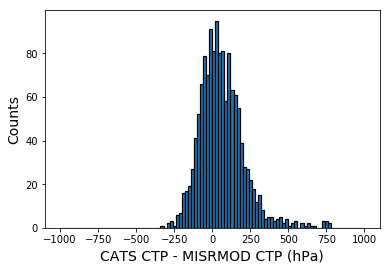

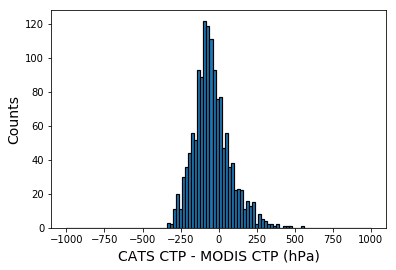

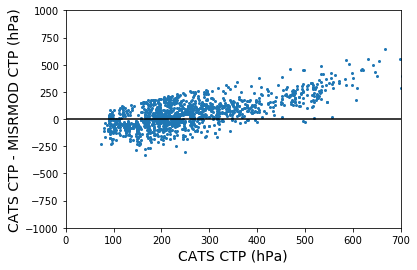

Peak at 100 hPa


(160.36521976570364, 129.58520020333788)

In [16]:
import matplotlib.pyplot as plt

B = np.loadtxt('CATSMISRMOD_multi.txt')
catsp = B[:,0]; modp = B[:,1]; modp2 = B[:,2]; method = B[:,3]

catsp_ = catsp[np.where(method>0.)]
modp2_ = modp2[np.where(method>0.)]
modp_= modp[np.where(method>0.)]
catsp_ = catsp_[np.where(modp_>0.)]
modp2_ = modp2_[np.where(modp_>0.)]
modp_= modp_[np.where(modp_>0.)]
plt.hist(catsp_-modp_, range=(-1000.,1000.), bins=100, edgecolor='k', linewidth=1.2)
plt.xlabel('CATS CTP - MISRMOD CTP (hPa)', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.show()
plt.hist(catsp_-modp2_, range=(-1000.,1000.), bins=100, edgecolor='k', linewidth=1.2)
plt.xlabel('CATS CTP - MODIS CTP (hPa)', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.show()
x = np.linspace(0.,700.)
y = np.zeros(len(x))
plt.scatter(catsp_,catsp_-modp_,s=4)
plt.plot(x,y,'k')
plt.xlim(0.,700.)
plt.ylim(-1000.,1000.)
plt.ylabel('CATS CTP - MISRMOD CTP (hPa)', fontsize=14)
plt.xlabel('CATS CTP (hPa)', fontsize=14)
plt.show()
print("Peak at 100 hPa")
np.sqrt(np.mean((catsp_-modp_)**2)), np.sqrt(np.mean((catsp_-modp2_)**2))
# plt.hist2d(catsp,modp,cmap='jet',bins=10, range=[[150,600.],[150.,600.]])
# plt.show()

(array([67.94055202]), array([118.89596603]))
[20.]
[-100.]


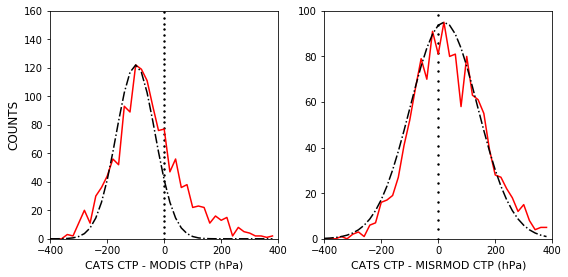

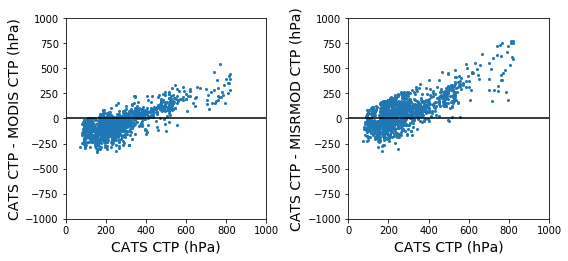

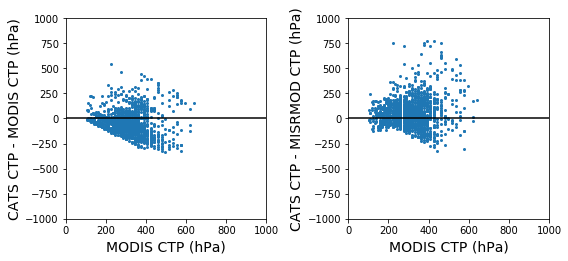

In [19]:
def FWHM(X,Y):
    half_max = max(Y) / 2.
    #find when function crosses line half_max (when sign of diff flips)
    #take the 'derivative' of signum(half_max - Y[])
    d = np.sign(half_max - np.array(Y[0:-1])) - np.sign(half_max - np.array(Y[1:]))
    #plot(X[0:len(d)],d) #if you are interested
    #find the left and right most indexes
    left_idx = np.where(d > 0)[0]
    right_idx = np.where(d < 0)[-1]
    return (X[right_idx] - X[left_idx])/2.355, X[np.where(Y==max(Y))], max(Y) #return the difference (full width)

def gaussian(x,a,mu,sig):
    return a * np.exp(-(x-mu)**2.0/(2*sig**2))

counts, edges = np.histogram(catsp_-modp2_, range=(-400.,400.), bins=40)
counts1, edges1 = np.histogram(catsp_-modp_, range=(-400.,400.), bins=40)
f1, m1, a1 = FWHM(edges[:-1],counts); f2, m2, a2 = FWHM(edges1[:-1],counts1)
print(f1,f2)
y = np.linspace(0.,200.)
x = np.zeros(len(y))
print(edges1[np.where(counts1==np.max(counts1))]); print(edges[np.where(counts==np.max(counts))])
fig=plt.figure(figsize=(8,8))
plt.subplot(121, aspect=5);plt.plot(edges[:-1], counts, color='r');plt.xlim(-400,400);plt.ylim(0,160);plt.scatter(x,y,color='k',s=2)
plt.plot(edges[:-1], gaussian(edges[:-1],a1, m1, f1), color='k', linestyle='-.')
plt.ylabel('COUNTS', fontsize=12);plt.xlabel('CATS CTP - MODIS CTP (hPa)', fontsize=11)
plt.subplot(122, aspect=8);plt.plot(edges1[:-1], counts1, color='r');plt.xlim(-400,400);plt.ylim(0,100);plt.scatter(x,y,color='k',s=2)
plt.plot(edges1[:-1], gaussian(edges1[:-1], a2, m2, f2), color='k', linestyle='-.')
plt.xlabel('CATS CTP - MISRMOD CTP (hPa)', fontsize=11);fig.tight_layout();plt.show()
x = np.linspace(0.,1000.)
y = np.zeros(len(x))
fig=plt.figure(figsize=(8,8))
plt.subplot(121, aspect=0.5);plt.scatter(catsp_,catsp_-modp2_,s=4)
plt.plot(x,y,'k')
plt.xlim(0.,1000.)
plt.ylim(-1000.,1000.)
plt.ylabel('CATS CTP - MODIS CTP (hPa)', fontsize=14)
plt.xlabel('CATS CTP (hPa)', fontsize=14)
plt.subplot(122, aspect=0.5);plt.scatter(catsp_,catsp_-modp_,s=4)
plt.plot(x,y,'k')
plt.xlim(0.,1000.)
plt.ylim(-1000.,1000.)
plt.ylabel('CATS CTP - MISRMOD CTP (hPa)', fontsize=14)
plt.xlabel('CATS CTP (hPa)', fontsize=14)
fig.tight_layout()
plt.show()
fig=plt.figure(figsize=(8,8))
plt.subplot(121, aspect=0.5);plt.scatter(modp2_,catsp_-modp2_,s=4)
plt.plot(x,y,'k')
plt.xlim(0.,1000.)
plt.ylim(-1000.,1000.)
plt.ylabel('CATS CTP - MODIS CTP (hPa)', fontsize=14)
plt.xlabel('MODIS CTP (hPa)', fontsize=14)
plt.subplot(122, aspect=0.5);plt.scatter(modp2_,catsp_-modp_,s=4)
plt.plot(x,y,'k')
plt.xlim(0.,1000.)
plt.ylim(-1000.,1000.)
plt.ylabel('CATS CTP - MISRMOD CTP (hPa)', fontsize=14)
plt.xlabel('MODIS CTP (hPa)', fontsize=14)
fig.tight_layout()
plt.show()

(array([67.94055202]), array([118.89596603]))
[20.]
[-100.]


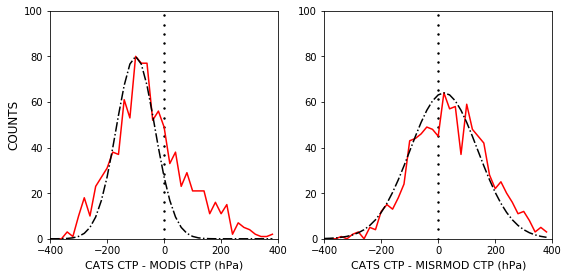

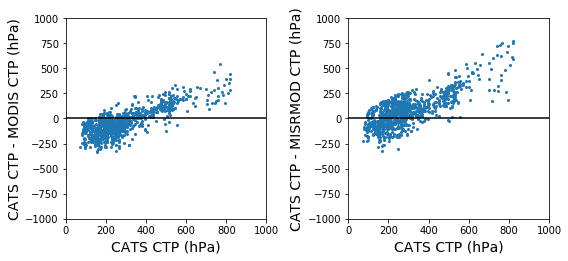

In [97]:
def FWHM(X,Y):
    half_max = max(Y) / 2.
    #find when function crosses line half_max (when sign of diff flips)
    #take the 'derivative' of signum(half_max - Y[])
    d = np.sign(half_max - np.array(Y[0:-1])) - np.sign(half_max - np.array(Y[1:]))
    #plot(X[0:len(d)],d) #if you are interested
    #find the left and right most indexes
    left_idx = np.where(d > 0)[0]
    right_idx = np.where(d < 0)[-1]
    return (X[right_idx] - X[left_idx])/2.355, X[np.where(Y==max(Y))], max(Y) #return the difference (full width)

def gaussian(x,a,mu,sig):
    return a * np.exp(-(x-mu)**2.0/(2*sig**2))

counts, edges = np.histogram(catsp_-modp2_, range=(-400.,400.), bins=40)
counts1, edges1 = np.histogram(catsp_-modp_, range=(-400.,400.), bins=40)
f1, m1, a1 = FWHM(edges[:-1],counts); f2, m2, a2 = FWHM(edges1[:-1],counts1)
print(f1,f2)
y = np.linspace(0.,200.)
x = np.zeros(len(y))
print(edges1[np.where(counts1==np.max(counts1))]); print(edges[np.where(counts==np.max(counts))])
fig=plt.figure(figsize=(8,8))
plt.subplot(121, aspect=8);plt.plot(edges[:-1], counts, color='r');plt.xlim(-400,400);plt.ylim(0,100);plt.scatter(x,y,color='k',s=2)
plt.plot(edges[:-1], gaussian(edges[:-1],a1, m1, f1), color='k', linestyle='-.')
plt.ylabel('COUNTS', fontsize=12);plt.xlabel('CATS CTP - MODIS CTP (hPa)', fontsize=11)
plt.subplot(122, aspect=8);plt.plot(edges1[:-1], counts1, color='r');plt.xlim(-400,400);plt.ylim(0,100);plt.scatter(x,y,color='k',s=2)
plt.plot(edges1[:-1], gaussian(edges1[:-1], a2, m2, f2), color='k', linestyle='-.')
plt.xlabel('CATS CTP - MISRMOD CTP (hPa)', fontsize=11);fig.tight_layout();plt.show()
x = np.linspace(0.,1000.)
y = np.zeros(len(x))
fig=plt.figure(figsize=(8,8))
plt.subplot(121, aspect=0.5);plt.scatter(catsp_,catsp_-modp2_,s=4)
plt.plot(x,y,'k')
plt.xlim(0.,1000.)
plt.ylim(-1000.,1000.)
plt.ylabel('CATS CTP - MODIS CTP (hPa)', fontsize=14)
plt.xlabel('CATS CTP (hPa)', fontsize=14)
plt.subplot(122, aspect=0.5);plt.scatter(catsp_,catsp_-modp_,s=4)
plt.plot(x,y,'k')
plt.xlim(0.,1000.)
plt.ylim(-1000.,1000.)
plt.ylabel('CATS CTP - MISRMOD CTP (hPa)', fontsize=14)
plt.xlabel('CATS CTP (hPa)', fontsize=14)
fig.tight_layout()
plt.show()

2017

(84.92569002123142, 101.91082802547771)
[80.]
[-80. -40.]


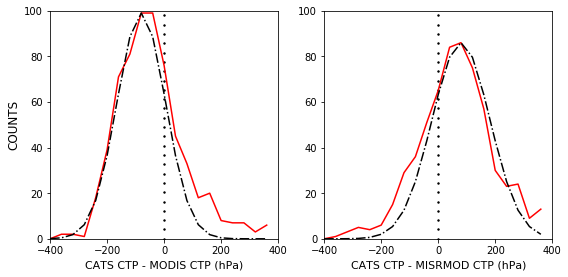

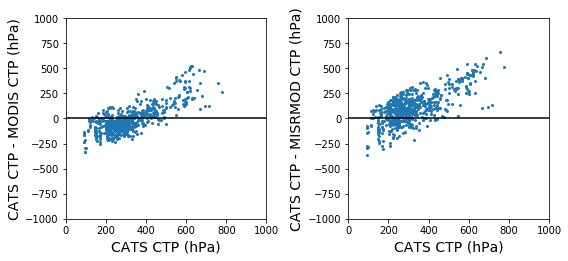

In [13]:
def FWHM(X,Y):
    half_max = max(Y) / 2.
    #find when function crosses line half_max (when sign of diff flips)
    #take the 'derivative' of signum(half_max - Y[])
    d = np.sign(half_max - np.array(Y[0:-1])) - np.sign(half_max - np.array(Y[1:]))
    #plot(X[0:len(d)],d) #if you are interested
    #find the left and right most indexes
    left_idx = np.where(d > 0)[0]
    right_idx = np.where(d < 0)[-1]
    return (X[right_idx][0] - X[left_idx][0])/2.355, X[np.where(Y==max(Y))], max(Y) #return the difference (full width)

def gaussian(x,a,mu,sig):
    return a * np.exp(-(x-mu)**2.0/(2*sig**2))

counts, edges = np.histogram(catsp_-modp2_, range=(-400.,400.), bins=20)
counts1, edges1 = np.histogram(catsp_-modp_, range=(-400.,400.), bins=20)
f1, m1, a1 = FWHM(edges[:-1],counts); f2, m2, a2 = FWHM(edges1[:-1],counts1)
print(f1,f2)
y = np.linspace(0.,200.)
x = np.zeros(len(y))
print(edges1[np.where(counts1==np.max(counts1))]); print(edges[np.where(counts==np.max(counts))])
fig=plt.figure(figsize=(8,8))
plt.subplot(121, aspect=8);plt.plot(edges[:-1], counts, color='r');plt.xlim(-400,400);plt.ylim(0,100);plt.scatter(x,y,color='k',s=2)
plt.plot(edges[:-1], gaussian(edges[:-1],a1, m1[0], f1), color='k', linestyle='-.')
plt.ylabel('COUNTS', fontsize=12);plt.xlabel('CATS CTP - MODIS CTP (hPa)', fontsize=11)
plt.subplot(122, aspect=8);plt.plot(edges1[:-1], counts1, color='r');plt.xlim(-400,400);plt.ylim(0,100);plt.scatter(x,y,color='k',s=2)
plt.plot(edges1[:-1], gaussian(edges1[:-1], a2, m2, f2), color='k', linestyle='-.')
plt.xlabel('CATS CTP - MISRMOD CTP (hPa)', fontsize=11);fig.tight_layout();plt.show()
x = np.linspace(0.,1000.)
y = np.zeros(len(x))
fig=plt.figure(figsize=(8,8))
plt.subplot(121, aspect=0.5);plt.scatter(catsp_,catsp_-modp2_,s=4)
plt.plot(x,y,'k')
plt.xlim(0.,1000.)
plt.ylim(-1000.,1000.)
plt.ylabel('CATS CTP - MODIS CTP (hPa)', fontsize=14)
plt.xlabel('CATS CTP (hPa)', fontsize=14)
plt.subplot(122, aspect=0.5);plt.scatter(catsp_,catsp_-modp_,s=4)
plt.plot(x,y,'k')
plt.xlim(0.,1000.)
plt.ylim(-1000.,1000.)
plt.ylabel('CATS CTP - MISRMOD CTP (hPa)', fontsize=14)
plt.xlabel('CATS CTP (hPa)', fontsize=14)
fig.tight_layout()
plt.show()

(84.92569002123142, 84.92569002123142)
[0.]
[-120.]


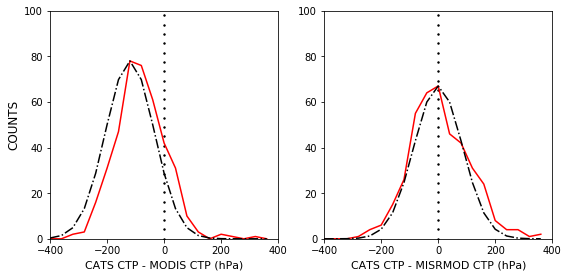

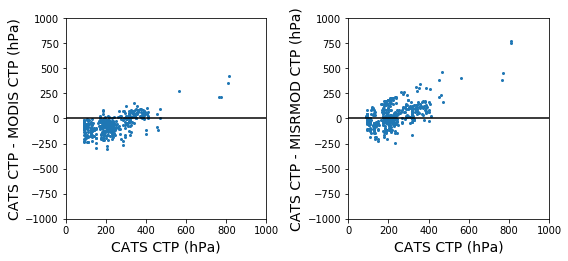

In [18]:
def FWHM(X,Y):
    half_max = max(Y) / 2.
    #find when function crosses line half_max (when sign of diff flips)
    #take the 'derivative' of signum(half_max - Y[])
    d = np.sign(half_max - np.array(Y[0:-1])) - np.sign(half_max - np.array(Y[1:]))
    #plot(X[0:len(d)],d) #if you are interested
    #find the left and right most indexes
    left_idx = np.where(d > 0)[0]
    right_idx = np.where(d < 0)[-1]
    return (X[right_idx][0] - X[left_idx][0])/2.355, X[np.where(Y==max(Y))], max(Y) #return the difference (full width)

def gaussian(x,a,mu,sig):
    return a * np.exp(-(x-mu)**2.0/(2*sig**2))

counts, edges = np.histogram(catsp_-modp2_, range=(-400.,400.), bins=20)
counts1, edges1 = np.histogram(catsp_-modp_, range=(-400.,400.), bins=20)
f1, m1, a1 = FWHM(edges[:-1],counts); f2, m2, a2 = FWHM(edges1[:-1],counts1)
print(f1,f2)
y = np.linspace(0.,200.)
x = np.zeros(len(y))
print(edges1[np.where(counts1==np.max(counts1))]); print(edges[np.where(counts==np.max(counts))])
fig=plt.figure(figsize=(8,8))
plt.subplot(121, aspect=8);plt.plot(edges[:-1], counts, color='r');plt.xlim(-400,400);plt.ylim(0,100);plt.scatter(x,y,color='k',s=2)
plt.plot(edges[:-1], gaussian(edges[:-1],a1, m1[0], f1), color='k', linestyle='-.')
plt.ylabel('COUNTS', fontsize=12);plt.xlabel('CATS CTP - MODIS CTP (hPa)', fontsize=11)
plt.subplot(122, aspect=8);plt.plot(edges1[:-1], counts1, color='r');plt.xlim(-400,400);plt.ylim(0,100);plt.scatter(x,y,color='k',s=2)
plt.plot(edges1[:-1], gaussian(edges1[:-1], a2, m2, f2), color='k', linestyle='-.')
plt.xlabel('CATS CTP - MISRMOD CTP (hPa)', fontsize=11);fig.tight_layout();plt.show()
x = np.linspace(0.,1000.)
y = np.zeros(len(x))
fig=plt.figure(figsize=(8,8))
plt.subplot(121, aspect=0.5);plt.scatter(catsp_,catsp_-modp2_,s=4)
plt.plot(x,y,'k')
plt.xlim(0.,1000.)
plt.ylim(-1000.,1000.)
plt.ylabel('CATS CTP - MODIS CTP (hPa)', fontsize=14)
plt.xlabel('CATS CTP (hPa)', fontsize=14)
plt.subplot(122, aspect=0.5);plt.scatter(catsp_,catsp_-modp_,s=4)
plt.plot(x,y,'k')
plt.xlim(0.,1000.)
plt.ylim(-1000.,1000.)
plt.ylabel('CATS CTP - MISRMOD CTP (hPa)', fontsize=14)
plt.xlabel('CATS CTP (hPa)', fontsize=14)
fig.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import warnings
import glob
warnings.filterwarnings("ignore")
import datetime
import xarray as xr
import MisrToolkit as Mtk
from scipy.interpolate import interp1d

def find_coord_index(lat,lon):
    nlat = (90. - lat-90/180).astype(int)
    nlon = (lon+180.).astype(int)
    return nlat,nlon

def choose_geo(hr, doy):
    geof=np.zeros(len(hr))
#     doy[np.where(np.logical_and(np.asarray(hr)>21,np.asarray(doy)<366))]=doy+1
    geof[np.where(np.logical_and(np.asarray(hr)>21,np.asarray(doy)<366))]=0
#     doy[np.where(np.logical_and(np.asarray(hr)>21,np.asarray(doy)==366))]=366
    geof[np.where(np.logical_and(np.asarray(hr)>21,np.asarray(doy)==366))]=3
    geof[np.where(np.logical_and(np.asarray(hr)>9,np.asarray(hr)<=15))]=2
    geof[np.where(np.logical_and(np.asarray(hr)>15,np.asarray(hr)<=21))]=3
    geof[np.where(np.logical_and(np.asarray(hr)>3,np.asarray(hr)<=9))]=1
    geof[np.where(np.asarray(hr)<=3)]=0

    return doy, geof

def give_delz(geof, day, lati, loni, geode, cats, misr):
    geo = geo_dict[geof].z[day,:,::4,::4]; geo = geo[:,:-1,:]/9.8e3
    z = geo[:,lati,loni]
    P = geo.level.data
    fz = interp1d(z,np.log(P),fill_value='extrapolate')
    delz = float(geode[np.where(np.logical_and(geo.latitude.data[lati]==geode[:,0],
                                         geo.longitude.data[loni]==geode[:,1])),2])/1e3
    catsp = np.exp(fz(cats+delz))
    misrp = np.exp(fz(misr+delz))
    return catsp, misrp
        
def find_amount_from_regression(am,misrp,modisp,emis):
    amount =          misrp*am[0,3] + \
                      modisp*am[1,3] + \
                      emis*am[2,3] + \
                      misrp*emis*am[5,3] + \
                      modisp*emis*am[7,3] + \
                      emis**2*am[8,3]
    
    return amount

cols = ['misrp','modisp','emis','amount','catsp']
df = pd.read_csv('/data/keeling/a/arkam2/b/TopLayer_2017.csv')
df = df.drop(np.where(df['cats'].values<0.)[0][:]); df.reset_index(drop=True, inplace=True)
df = df.drop(np.where(df['misr'].values<0.)[0][:]); df.reset_index(drop=True, inplace=True)
df = df.drop(np.where(df['modis'].values<0.)[0][:]); df.reset_index(drop=True, inplace=True)
df = df.drop(np.where((df['modis'].values-df['misr'].values)<1.)[0][:]); df.reset_index(drop=True, inplace=True)
df = df.drop(np.where((df['method'].values)>5.)[0][:]); df.reset_index(drop=True, inplace=True)
am = np.loadtxt('/data/gdi/c/arkam2/Reanalysis/regression/Amount.txt')
geode = np.loadtxt('/data/gdi/c/arkam2/Reanalysis/standard/OUTPUT.DAT')
geo_files = sorted(glob.glob('/data/keeling/a/arkam2/c/Reanalysis/era5_files/2016/*2017_geo.nc'))
geo_0 = xr.open_dataset(geo_files[0]); geo_12 = xr.open_dataset(geo_files[1])
geo_18 = xr.open_dataset(geo_files[2]); geo_6 = xr.open_dataset(geo_files[3])
geo_dict=[geo_0,geo_6,geo_12,geo_18]
nlat,nlon = find_coord_index(df['lat'],df['lon']); delz=[]
cats = df['cats']; misr=df['misr']; modp=[]
date = [Mtk.orbit_to_time_range(df['orbit'][nobs])[0] for nobs in range(df.shape[0])]
hr = [int(date[nobs][11:13]) for nobs in range(df.shape[0])]
doy = [datetime.datetime.strptime(date[nobs],'%Y-%m-%dT%H:%M:%SZ').timetuple().tm_yday for nobs in range(df.shape[0])]
doy, geof = choose_geo(hr, doy) 
for nobs in range(len(df)):
    print(nobs)
    catsp, misrp = give_delz(int(geof[nobs]), int(doy[nobs]), nlat[nobs], nlon[nobs], geode, cats[nobs], misr[nobs])
    modisp = df['modisp'][nobs]; emiss = df['emiss'][nobs]/100.; amount = find_amount_from_regression(am,misrp,modisp,emiss)
    modp.append([misrp, modisp, emiss, amount, catsp])

df = pd.DataFrame(modp, columns=cols)
df.to_csv('/data/keeling/a/arkam2/b/TopLayer_2017_reduced.csv', index=False)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194


In [5]:
df

misrp  modisp  emis    amount       catsp
0    762.083619   275.0  0.26  0.360678  343.808033
1    430.117027   285.0  0.35  0.301143  282.317643
2    405.552323   300.0  0.32  0.254950  349.773959
3    431.889486   345.0  0.47  0.384527  274.405790
4    422.056948   245.0  0.44  0.402556  266.715706
5    686.369731   515.0  0.73  0.667757  408.663247
6    805.425352   555.0  0.74  0.704333  408.663247
7    584.338614   245.0  0.22  0.270891  270.218470
8    869.570978   375.0  0.51  0.572886  233.933670
9    782.400951   330.0  0.48  0.534132  231.759607
10   822.989966   375.0  0.52  0.564872  223.263844
11   771.826984   285.0  0.41  0.489836  223.263844
12   772.992853   360.0  0.38  0.423296  224.020994
13   767.850236   285.0  0.35  0.435392  219.884249
14   785.697954   315.0  0.30  0.381548  226.118442
15   862.148176   345.0  0.25  0.351015  213.821836
16   441.358552   315.0  0.37  0.307815  221.942967
17   462.468994   285.0  0.74  0.685271  226.118442
18   452.810898   275.0  0.71  0.656342  224.020994
19   450.706772   315.0  0.80  0.730614  219.884249
20   726.507761   260.0  0.72  0.765233  221.942967
21   450.051241   285.0  0.83  0.770116  213.821836
22   442.774102   315.0  0.88  0.809097  224.020994
23   507.887951   300.0  0.83  0.784217  224.020994
24   508.877753   345.0  0.75  0.689451  222.688497
25   529.602018   375.0  0.82  0.757375  268.301422
26   494.407695   405.0  0.80  0.715335  244.433324
27   515.022779   440.0  0.90  0.817279  231.144113
28   489.082922   345.0  0.72  0.652583  231.144113
29   486.969105   360.0  0.78  0.707286  246.721318
..          ...     ...   ...       ...         ...
611  832.018051   275.0  0.19  0.330343  239.546930
612  830.664613   425.0  0.53  0.553865  235.476648
613  872.251936   285.0  0.43  0.546289  229.500483
614  828.542228   235.0  0.35  0.487268  235.476648
615  826.713623   275.0  0.36  0.472982  198.179112
616  831.727843   275.0  0.42  0.527080  198.179112
617  312.919409   260.0  0.75  0.653490  236.931174
618  476.173499   375.0  0.51  0.425952  266.520555
619  276.727523   235.0  0.89  0.789548  205.871784
620  387.057977   225.0  0.80  0.739310  213.049635
621  944.412610   260.0  0.11  0.322564  361.965212
622  481.000139   180.0  0.19  0.242714  338.588709
623  475.408814   170.0  0.33  0.365731  298.679513
624  484.806634   275.0  0.33  0.310170  298.679513
625  450.952467   345.0  0.68  0.599274  283.288050
626  446.310397   300.0  0.57  0.508092  319.525355
627  458.860528   345.0  0.75  0.672570  350.256267
628  500.044860   300.0  0.61  0.566099  283.493983
629  453.762889   390.0  0.82  0.727775  409.873412
630  435.303311   300.0  0.67  0.601549  350.256267
631  405.639724   315.0  0.78  0.695503  374.446648
632  343.998657   275.0  0.92  0.829986  229.681602
633  465.408402   285.0  0.89  0.835015  197.678254
634  613.006322   315.0  0.93  0.913125  202.869261
635  597.854064   275.0  0.70  0.696660  250.513056
636  561.187091   260.0  0.70  0.689709  228.558882
637  555.145199   360.0  0.65  0.599881  224.404518
638  551.481098   390.0  0.85  0.790756  218.314176
639  561.044176   360.0  0.77  0.721864  228.558882
640  598.844651   330.0  0.76  0.734992  241.489001

[641 rows x 5 columns]

In [21]:
geo_files

['/data/keeling/a/arkam2/c/Reanalysis/era5_files/2016/era5_0UTC_2017_geo.nc',
 '/data/keeling/a/arkam2/c/Reanalysis/era5_files/2016/era5_12UTC_2017_geo.nc',
 '/data/keeling/a/arkam2/c/Reanalysis/era5_files/2016/era5_18UTC_2017_geo.nc',
 '/data/keeling/a/arkam2/c/Reanalysis/era5_files/2016/era5_6UTC_2017_geo.nc']